# Binary classification based on Logistic Regression with a quadratic regularization

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [2]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train  = np.genfromtxt(fname_data_train, delimiter=',')
data_test   = np.genfromtxt(fname_data_test, delimiter=',')

num_data_train = data_train.shape[0]
num_data_test = data_test.shape[0]

x1 = np.zeros(num_data_train)
y1 = np.zeros(num_data_train)
label1   = np.zeros(num_data_train)

for i in range(num_data_train):
    x1[i]  = data_train[i,0]
    y1[i]  = data_train[i,1]
    label1[i]    = data_train[i,2]
    
#########################################################################
    
x2 = np.zeros(num_data_test)
y2 = np.zeros(num_data_test)
label2   = np.zeros(num_data_test)

for i in range(num_data_test):
    x2[i]  = data_test[i,0]
    y2[i]  = data_test[i,1]
    label2[i]    = data_test[i,2]


## plot the data

## define feature function

In [3]:
def feature_function(x, y):
    feature = np.array([1, x, y, x*y, x*x, y*y, x*x*y, x*y*y, x*x*x, y*y*y], dtype = object)
    return feature

## define regression function based on the feature function

In [4]:
def regression_function(theta, feature):
    value = np.matmul(np.transpose(theta), feature)
    return value

## define regularization function on the model parameters

In [5]:
def regularization_function(theta):
    value = np.matmul(theta, theta)
    return value

## define sigmoid function

In [6]:
def logistic_function(x):
    z = 1/(1+np.exp(-x))
    return z

## define loss function where $\alpha$ is a weight for the quadratic regularization term (Note that you need to add a small number (np.finfo(float).eps) inside logarithm function in order to avoid $\log( 0 )$)

In [7]:
def compute_loss_feature(theta, feature, label, alpha):
    z = regression_function(theta, feature)
    h = logistic_function(z)
    loss = (-label * np.log(h + np.finfo(float).eps) - (1 - label) * np.log(1 - h + np.finfo(float).eps)).mean() + ( regularization_function(theta) * (alpha // 2) )
    return loss

## define gradient vector for the model parameters with the quadratic regularization term whose weight is $\alpha$

In [8]:
def compute_gradient_feature(theta, feature, label, alpha):
    z = regression_function(theta, feature)
    h = logistic_function(z)
    num_data = feature[1].shape[0]
    one = np.ones(num_data)
    X = np.column_stack([one, feature[1], feature[2], feature[3], feature[4], feature[5], feature[6], feature[7], feature[8], feature[9]])
    gradient = np.dot(X.T, (h - label)) / num_data
    return gradient

## compute the accuracy

In [9]:
def compute_accuracy(theta, feature, label):
    num_data = feature[1].shape[0]
    correctNum = 0
    f = regression_function(theta, feature)
    for i in range(0, num_data)  :
        if f[i]>=0 :
            ans = 1
        else :
            ans = 0
        if ans == label[i] :
            correctNum += 1
    accuracy = correctNum / num_data
    return round(accuracy, 5)

## gradient descent for the model parameters $\theta$

In [10]:
num_iteration   = 30000
learning_rate   = 0.3
alpha           = 0.001

theta           = np.array((0, 0, 0, 0, 0, 0, 0, 0, 0, 0)) 
theta_iteration = np.zeros((num_iteration, theta.size))
loss1_iteration  = np.zeros(num_iteration)
loss2_iteration  = np.zeros(num_iteration)

In [11]:
# theta_iteration             = np.zeros((num_iteration, dim_feature))
# loss_iteration_train        = np.zeros(num_iteration)
# loss_iteration_test         = np.zeros(num_iteration)
accuracy_iteration_train    = np.zeros(num_iteration)
accuracy_iteration_test     = np.zeros(num_iteration)

In [12]:
for i in range(num_iteration):
    theta = theta - learning_rate * compute_gradient_feature(theta, feature_function(x1, y1), label1, alpha)
    loss1 = compute_loss_feature(theta, feature_function(x1, y1), label1, alpha)
    theta_iteration[i] = theta
    loss1_iteration[i] = loss1

    loss2 = compute_loss_feature(theta, feature_function(x2, y2), label2, alpha)
    loss2_iteration[i] = loss2
    
    accuracy1 = compute_accuracy(theta, feature_function(x1, y1), label1)
    accuracy2 = compute_accuracy(theta, feature_function(x2, y2), label2)
    
    accuracy_iteration_train[i] = accuracy1
    accuracy_iteration_test[i] = accuracy2
    
    print("[%4d] loss(train) = %5.5f, loss(test) = %5.5f, acc(train) = %5.5f, acc(test) = %5.5f" % (i, loss1, loss2, accuracy1, accuracy2))
    
theta_optimal = theta


[   0] loss(train) = 0.53268, loss(test) = 0.53291, acc(train) = 0.79400, acc(test) = 0.78000
[   1] loss(train) = 0.45236, loss(test) = 0.45814, acc(train) = 0.80000, acc(test) = 0.80200
[   2] loss(train) = 0.42141, loss(test) = 0.42967, acc(train) = 0.81200, acc(test) = 0.81800
[   3] loss(train) = 0.40499, loss(test) = 0.41458, acc(train) = 0.82200, acc(test) = 0.82600
[   4] loss(train) = 0.39370, loss(test) = 0.40421, acc(train) = 0.83000, acc(test) = 0.82400
[   5] loss(train) = 0.38518, loss(test) = 0.39641, acc(train) = 0.83200, acc(test) = 0.82800
[   6] loss(train) = 0.37843, loss(test) = 0.39030, acc(train) = 0.83200, acc(test) = 0.83400
[   7] loss(train) = 0.37293, loss(test) = 0.38536, acc(train) = 0.83200, acc(test) = 0.83400
[   8] loss(train) = 0.36832, loss(test) = 0.38128, acc(train) = 0.83200, acc(test) = 0.83400
[   9] loss(train) = 0.36439, loss(test) = 0.37783, acc(train) = 0.83000, acc(test) = 0.83800
[  10] loss(train) = 0.36099, loss(test) = 0.37488, acc(trai

[ 122] loss(train) = 0.30138, loss(test) = 0.32574, acc(train) = 0.85400, acc(test) = 0.86600
[ 123] loss(train) = 0.30120, loss(test) = 0.32556, acc(train) = 0.85400, acc(test) = 0.86600
[ 124] loss(train) = 0.30102, loss(test) = 0.32537, acc(train) = 0.85400, acc(test) = 0.86600
[ 125] loss(train) = 0.30084, loss(test) = 0.32519, acc(train) = 0.85400, acc(test) = 0.86600
[ 126] loss(train) = 0.30066, loss(test) = 0.32501, acc(train) = 0.85400, acc(test) = 0.86600
[ 127] loss(train) = 0.30049, loss(test) = 0.32483, acc(train) = 0.85400, acc(test) = 0.86600
[ 128] loss(train) = 0.30031, loss(test) = 0.32464, acc(train) = 0.85400, acc(test) = 0.86600
[ 129] loss(train) = 0.30014, loss(test) = 0.32446, acc(train) = 0.85400, acc(test) = 0.86600
[ 130] loss(train) = 0.29996, loss(test) = 0.32428, acc(train) = 0.85400, acc(test) = 0.86600
[ 131] loss(train) = 0.29979, loss(test) = 0.32410, acc(train) = 0.85400, acc(test) = 0.86600
[ 132] loss(train) = 0.29962, loss(test) = 0.32392, acc(trai

[ 229] loss(train) = 0.28549, loss(test) = 0.30815, acc(train) = 0.86400, acc(test) = 0.87800
[ 230] loss(train) = 0.28537, loss(test) = 0.30800, acc(train) = 0.86400, acc(test) = 0.87800
[ 231] loss(train) = 0.28524, loss(test) = 0.30786, acc(train) = 0.86400, acc(test) = 0.87800
[ 232] loss(train) = 0.28512, loss(test) = 0.30771, acc(train) = 0.86400, acc(test) = 0.87800
[ 233] loss(train) = 0.28499, loss(test) = 0.30757, acc(train) = 0.86400, acc(test) = 0.87800
[ 234] loss(train) = 0.28487, loss(test) = 0.30742, acc(train) = 0.86400, acc(test) = 0.87800
[ 235] loss(train) = 0.28474, loss(test) = 0.30728, acc(train) = 0.86400, acc(test) = 0.87800
[ 236] loss(train) = 0.28462, loss(test) = 0.30713, acc(train) = 0.86400, acc(test) = 0.87800
[ 237] loss(train) = 0.28449, loss(test) = 0.30699, acc(train) = 0.86400, acc(test) = 0.87800
[ 238] loss(train) = 0.28437, loss(test) = 0.30684, acc(train) = 0.86400, acc(test) = 0.87800
[ 239] loss(train) = 0.28425, loss(test) = 0.30670, acc(trai

[ 343] loss(train) = 0.27289, loss(test) = 0.29330, acc(train) = 0.86600, acc(test) = 0.88600
[ 344] loss(train) = 0.27279, loss(test) = 0.29318, acc(train) = 0.86600, acc(test) = 0.88600
[ 345] loss(train) = 0.27269, loss(test) = 0.29307, acc(train) = 0.86600, acc(test) = 0.88600
[ 346] loss(train) = 0.27260, loss(test) = 0.29295, acc(train) = 0.86600, acc(test) = 0.88600
[ 347] loss(train) = 0.27250, loss(test) = 0.29284, acc(train) = 0.86600, acc(test) = 0.88600
[ 348] loss(train) = 0.27240, loss(test) = 0.29272, acc(train) = 0.86800, acc(test) = 0.88600
[ 349] loss(train) = 0.27231, loss(test) = 0.29261, acc(train) = 0.86800, acc(test) = 0.88600
[ 350] loss(train) = 0.27221, loss(test) = 0.29249, acc(train) = 0.86800, acc(test) = 0.88600
[ 351] loss(train) = 0.27211, loss(test) = 0.29238, acc(train) = 0.86800, acc(test) = 0.88600
[ 352] loss(train) = 0.27202, loss(test) = 0.29226, acc(train) = 0.86800, acc(test) = 0.88600
[ 353] loss(train) = 0.27192, loss(test) = 0.29215, acc(trai

[ 489] loss(train) = 0.26045, loss(test) = 0.27854, acc(train) = 0.87800, acc(test) = 0.88800
[ 490] loss(train) = 0.26037, loss(test) = 0.27845, acc(train) = 0.87800, acc(test) = 0.88800
[ 491] loss(train) = 0.26030, loss(test) = 0.27836, acc(train) = 0.87800, acc(test) = 0.88800
[ 492] loss(train) = 0.26022, loss(test) = 0.27827, acc(train) = 0.87800, acc(test) = 0.88800
[ 493] loss(train) = 0.26015, loss(test) = 0.27818, acc(train) = 0.87800, acc(test) = 0.88800
[ 494] loss(train) = 0.26008, loss(test) = 0.27810, acc(train) = 0.87800, acc(test) = 0.88800
[ 495] loss(train) = 0.26000, loss(test) = 0.27801, acc(train) = 0.87800, acc(test) = 0.88800
[ 496] loss(train) = 0.25993, loss(test) = 0.27792, acc(train) = 0.87800, acc(test) = 0.88800
[ 497] loss(train) = 0.25985, loss(test) = 0.27783, acc(train) = 0.87800, acc(test) = 0.88800
[ 498] loss(train) = 0.25978, loss(test) = 0.27775, acc(train) = 0.87800, acc(test) = 0.88800
[ 499] loss(train) = 0.25971, loss(test) = 0.27766, acc(trai

[ 625] loss(train) = 0.25130, loss(test) = 0.26774, acc(train) = 0.88600, acc(test) = 0.89200
[ 626] loss(train) = 0.25124, loss(test) = 0.26767, acc(train) = 0.88600, acc(test) = 0.89200
[ 627] loss(train) = 0.25118, loss(test) = 0.26760, acc(train) = 0.88600, acc(test) = 0.89200
[ 628] loss(train) = 0.25112, loss(test) = 0.26753, acc(train) = 0.88600, acc(test) = 0.89200
[ 629] loss(train) = 0.25106, loss(test) = 0.26746, acc(train) = 0.88600, acc(test) = 0.89200
[ 630] loss(train) = 0.25100, loss(test) = 0.26739, acc(train) = 0.88600, acc(test) = 0.89200
[ 631] loss(train) = 0.25094, loss(test) = 0.26732, acc(train) = 0.88600, acc(test) = 0.89200
[ 632] loss(train) = 0.25088, loss(test) = 0.26724, acc(train) = 0.88600, acc(test) = 0.89200
[ 633] loss(train) = 0.25082, loss(test) = 0.26717, acc(train) = 0.88600, acc(test) = 0.89200
[ 634] loss(train) = 0.25076, loss(test) = 0.26710, acc(train) = 0.88600, acc(test) = 0.89200
[ 635] loss(train) = 0.25070, loss(test) = 0.26703, acc(trai

[ 728] loss(train) = 0.24547, loss(test) = 0.26091, acc(train) = 0.88600, acc(test) = 0.89000
[ 729] loss(train) = 0.24542, loss(test) = 0.26085, acc(train) = 0.88600, acc(test) = 0.89000
[ 730] loss(train) = 0.24536, loss(test) = 0.26079, acc(train) = 0.88600, acc(test) = 0.89000
[ 731] loss(train) = 0.24531, loss(test) = 0.26073, acc(train) = 0.88600, acc(test) = 0.89000
[ 732] loss(train) = 0.24526, loss(test) = 0.26067, acc(train) = 0.88600, acc(test) = 0.89000
[ 733] loss(train) = 0.24521, loss(test) = 0.26060, acc(train) = 0.88600, acc(test) = 0.89000
[ 734] loss(train) = 0.24515, loss(test) = 0.26054, acc(train) = 0.88600, acc(test) = 0.89000
[ 735] loss(train) = 0.24510, loss(test) = 0.26048, acc(train) = 0.88600, acc(test) = 0.89000
[ 736] loss(train) = 0.24505, loss(test) = 0.26042, acc(train) = 0.88600, acc(test) = 0.89000
[ 737] loss(train) = 0.24500, loss(test) = 0.26036, acc(train) = 0.88600, acc(test) = 0.89000
[ 738] loss(train) = 0.24495, loss(test) = 0.26030, acc(trai

[ 856] loss(train) = 0.23922, loss(test) = 0.25364, acc(train) = 0.89000, acc(test) = 0.89600
[ 857] loss(train) = 0.23917, loss(test) = 0.25359, acc(train) = 0.89000, acc(test) = 0.89600
[ 858] loss(train) = 0.23912, loss(test) = 0.25353, acc(train) = 0.89000, acc(test) = 0.89600
[ 859] loss(train) = 0.23908, loss(test) = 0.25348, acc(train) = 0.89000, acc(test) = 0.89600
[ 860] loss(train) = 0.23903, loss(test) = 0.25343, acc(train) = 0.89000, acc(test) = 0.89600
[ 861] loss(train) = 0.23899, loss(test) = 0.25338, acc(train) = 0.89000, acc(test) = 0.89600
[ 862] loss(train) = 0.23894, loss(test) = 0.25332, acc(train) = 0.89000, acc(test) = 0.89600
[ 863] loss(train) = 0.23890, loss(test) = 0.25327, acc(train) = 0.89000, acc(test) = 0.89600
[ 864] loss(train) = 0.23885, loss(test) = 0.25322, acc(train) = 0.89000, acc(test) = 0.89600
[ 865] loss(train) = 0.23881, loss(test) = 0.25317, acc(train) = 0.89000, acc(test) = 0.89600
[ 866] loss(train) = 0.23877, loss(test) = 0.25312, acc(trai

[ 978] loss(train) = 0.23405, loss(test) = 0.24768, acc(train) = 0.89200, acc(test) = 0.90000
[ 979] loss(train) = 0.23401, loss(test) = 0.24764, acc(train) = 0.89200, acc(test) = 0.90000
[ 980] loss(train) = 0.23397, loss(test) = 0.24759, acc(train) = 0.89200, acc(test) = 0.90000
[ 981] loss(train) = 0.23393, loss(test) = 0.24755, acc(train) = 0.89200, acc(test) = 0.90000
[ 982] loss(train) = 0.23389, loss(test) = 0.24750, acc(train) = 0.89200, acc(test) = 0.90000
[ 983] loss(train) = 0.23385, loss(test) = 0.24745, acc(train) = 0.89200, acc(test) = 0.90000
[ 984] loss(train) = 0.23381, loss(test) = 0.24741, acc(train) = 0.89200, acc(test) = 0.90000
[ 985] loss(train) = 0.23378, loss(test) = 0.24736, acc(train) = 0.89200, acc(test) = 0.90000
[ 986] loss(train) = 0.23374, loss(test) = 0.24732, acc(train) = 0.89200, acc(test) = 0.90000
[ 987] loss(train) = 0.23370, loss(test) = 0.24727, acc(train) = 0.89200, acc(test) = 0.90000
[ 988] loss(train) = 0.23366, loss(test) = 0.24723, acc(trai

[1108] loss(train) = 0.22922, loss(test) = 0.24216, acc(train) = 0.90200, acc(test) = 0.90200
[1109] loss(train) = 0.22919, loss(test) = 0.24212, acc(train) = 0.90200, acc(test) = 0.90200
[1110] loss(train) = 0.22915, loss(test) = 0.24208, acc(train) = 0.90200, acc(test) = 0.90200
[1111] loss(train) = 0.22912, loss(test) = 0.24204, acc(train) = 0.90200, acc(test) = 0.90200
[1112] loss(train) = 0.22908, loss(test) = 0.24200, acc(train) = 0.90200, acc(test) = 0.90200
[1113] loss(train) = 0.22905, loss(test) = 0.24196, acc(train) = 0.90200, acc(test) = 0.90200
[1114] loss(train) = 0.22901, loss(test) = 0.24192, acc(train) = 0.90200, acc(test) = 0.90200
[1115] loss(train) = 0.22898, loss(test) = 0.24188, acc(train) = 0.90200, acc(test) = 0.90200
[1116] loss(train) = 0.22895, loss(test) = 0.24184, acc(train) = 0.90200, acc(test) = 0.90200
[1117] loss(train) = 0.22891, loss(test) = 0.24180, acc(train) = 0.90200, acc(test) = 0.90200
[1118] loss(train) = 0.22888, loss(test) = 0.24177, acc(trai

[1265] loss(train) = 0.22413, loss(test) = 0.23639, acc(train) = 0.90600, acc(test) = 0.90200
[1266] loss(train) = 0.22410, loss(test) = 0.23636, acc(train) = 0.90600, acc(test) = 0.90200
[1267] loss(train) = 0.22407, loss(test) = 0.23632, acc(train) = 0.90600, acc(test) = 0.90200
[1268] loss(train) = 0.22404, loss(test) = 0.23629, acc(train) = 0.90600, acc(test) = 0.90200
[1269] loss(train) = 0.22401, loss(test) = 0.23625, acc(train) = 0.90600, acc(test) = 0.90200
[1270] loss(train) = 0.22398, loss(test) = 0.23622, acc(train) = 0.90600, acc(test) = 0.90200
[1271] loss(train) = 0.22395, loss(test) = 0.23619, acc(train) = 0.90600, acc(test) = 0.90200
[1272] loss(train) = 0.22392, loss(test) = 0.23615, acc(train) = 0.90600, acc(test) = 0.90200
[1273] loss(train) = 0.22389, loss(test) = 0.23612, acc(train) = 0.90600, acc(test) = 0.90200
[1274] loss(train) = 0.22386, loss(test) = 0.23608, acc(train) = 0.90600, acc(test) = 0.90200
[1275] loss(train) = 0.22383, loss(test) = 0.23605, acc(trai

[1390] loss(train) = 0.22053, loss(test) = 0.23236, acc(train) = 0.90800, acc(test) = 0.90600
[1391] loss(train) = 0.22051, loss(test) = 0.23233, acc(train) = 0.90800, acc(test) = 0.90600
[1392] loss(train) = 0.22048, loss(test) = 0.23230, acc(train) = 0.90800, acc(test) = 0.90600
[1393] loss(train) = 0.22045, loss(test) = 0.23227, acc(train) = 0.90800, acc(test) = 0.90600
[1394] loss(train) = 0.22042, loss(test) = 0.23224, acc(train) = 0.90800, acc(test) = 0.90600
[1395] loss(train) = 0.22040, loss(test) = 0.23221, acc(train) = 0.90800, acc(test) = 0.90600
[1396] loss(train) = 0.22037, loss(test) = 0.23218, acc(train) = 0.90800, acc(test) = 0.90600
[1397] loss(train) = 0.22034, loss(test) = 0.23215, acc(train) = 0.90800, acc(test) = 0.90600
[1398] loss(train) = 0.22031, loss(test) = 0.23212, acc(train) = 0.90800, acc(test) = 0.90600
[1399] loss(train) = 0.22029, loss(test) = 0.23209, acc(train) = 0.90800, acc(test) = 0.90600
[1400] loss(train) = 0.22026, loss(test) = 0.23206, acc(trai

[1514] loss(train) = 0.21730, loss(test) = 0.22877, acc(train) = 0.91000, acc(test) = 0.90600
[1515] loss(train) = 0.21728, loss(test) = 0.22874, acc(train) = 0.91000, acc(test) = 0.90600
[1516] loss(train) = 0.21725, loss(test) = 0.22872, acc(train) = 0.91000, acc(test) = 0.90600
[1517] loss(train) = 0.21723, loss(test) = 0.22869, acc(train) = 0.91000, acc(test) = 0.90600
[1518] loss(train) = 0.21720, loss(test) = 0.22866, acc(train) = 0.91000, acc(test) = 0.90600
[1519] loss(train) = 0.21718, loss(test) = 0.22863, acc(train) = 0.91000, acc(test) = 0.90600
[1520] loss(train) = 0.21715, loss(test) = 0.22861, acc(train) = 0.91000, acc(test) = 0.90600
[1521] loss(train) = 0.21713, loss(test) = 0.22858, acc(train) = 0.91000, acc(test) = 0.90600
[1522] loss(train) = 0.21710, loss(test) = 0.22855, acc(train) = 0.91000, acc(test) = 0.90600
[1523] loss(train) = 0.21708, loss(test) = 0.22852, acc(train) = 0.91000, acc(test) = 0.90600
[1524] loss(train) = 0.21705, loss(test) = 0.22850, acc(trai

[1640] loss(train) = 0.21431, loss(test) = 0.22547, acc(train) = 0.91400, acc(test) = 0.90800
[1641] loss(train) = 0.21428, loss(test) = 0.22545, acc(train) = 0.91400, acc(test) = 0.90800
[1642] loss(train) = 0.21426, loss(test) = 0.22542, acc(train) = 0.91400, acc(test) = 0.90800
[1643] loss(train) = 0.21424, loss(test) = 0.22540, acc(train) = 0.91400, acc(test) = 0.90800
[1644] loss(train) = 0.21421, loss(test) = 0.22537, acc(train) = 0.91400, acc(test) = 0.90800
[1645] loss(train) = 0.21419, loss(test) = 0.22535, acc(train) = 0.91400, acc(test) = 0.90800
[1646] loss(train) = 0.21417, loss(test) = 0.22532, acc(train) = 0.91400, acc(test) = 0.90800
[1647] loss(train) = 0.21415, loss(test) = 0.22530, acc(train) = 0.91400, acc(test) = 0.90800
[1648] loss(train) = 0.21412, loss(test) = 0.22527, acc(train) = 0.91400, acc(test) = 0.90800
[1649] loss(train) = 0.21410, loss(test) = 0.22525, acc(train) = 0.91400, acc(test) = 0.90800
[1650] loss(train) = 0.21408, loss(test) = 0.22523, acc(trai

[1782] loss(train) = 0.21123, loss(test) = 0.22212, acc(train) = 0.91400, acc(test) = 0.91000
[1783] loss(train) = 0.21121, loss(test) = 0.22209, acc(train) = 0.91400, acc(test) = 0.91000
[1784] loss(train) = 0.21119, loss(test) = 0.22207, acc(train) = 0.91400, acc(test) = 0.91000
[1785] loss(train) = 0.21116, loss(test) = 0.22205, acc(train) = 0.91400, acc(test) = 0.91000
[1786] loss(train) = 0.21114, loss(test) = 0.22203, acc(train) = 0.91400, acc(test) = 0.91000
[1787] loss(train) = 0.21112, loss(test) = 0.22200, acc(train) = 0.91400, acc(test) = 0.91000
[1788] loss(train) = 0.21110, loss(test) = 0.22198, acc(train) = 0.91400, acc(test) = 0.91000
[1789] loss(train) = 0.21108, loss(test) = 0.22196, acc(train) = 0.91400, acc(test) = 0.91000
[1790] loss(train) = 0.21106, loss(test) = 0.22194, acc(train) = 0.91400, acc(test) = 0.91000
[1791] loss(train) = 0.21104, loss(test) = 0.22191, acc(train) = 0.91400, acc(test) = 0.91000
[1792] loss(train) = 0.21102, loss(test) = 0.22189, acc(trai

[1936] loss(train) = 0.20819, loss(test) = 0.21884, acc(train) = 0.91400, acc(test) = 0.91800
[1937] loss(train) = 0.20817, loss(test) = 0.21882, acc(train) = 0.91400, acc(test) = 0.91800
[1938] loss(train) = 0.20815, loss(test) = 0.21880, acc(train) = 0.91400, acc(test) = 0.91800
[1939] loss(train) = 0.20813, loss(test) = 0.21878, acc(train) = 0.91400, acc(test) = 0.91800
[1940] loss(train) = 0.20811, loss(test) = 0.21876, acc(train) = 0.91400, acc(test) = 0.91800
[1941] loss(train) = 0.20810, loss(test) = 0.21874, acc(train) = 0.91400, acc(test) = 0.91800
[1942] loss(train) = 0.20808, loss(test) = 0.21872, acc(train) = 0.91400, acc(test) = 0.91800
[1943] loss(train) = 0.20806, loss(test) = 0.21870, acc(train) = 0.91400, acc(test) = 0.91800
[1944] loss(train) = 0.20804, loss(test) = 0.21868, acc(train) = 0.91400, acc(test) = 0.91800
[1945] loss(train) = 0.20802, loss(test) = 0.21866, acc(train) = 0.91400, acc(test) = 0.91800
[1946] loss(train) = 0.20800, loss(test) = 0.21864, acc(trai

[2073] loss(train) = 0.20571, loss(test) = 0.21619, acc(train) = 0.91200, acc(test) = 0.91800
[2074] loss(train) = 0.20570, loss(test) = 0.21618, acc(train) = 0.91400, acc(test) = 0.91800
[2075] loss(train) = 0.20568, loss(test) = 0.21616, acc(train) = 0.91400, acc(test) = 0.91800
[2076] loss(train) = 0.20566, loss(test) = 0.21614, acc(train) = 0.91400, acc(test) = 0.91800
[2077] loss(train) = 0.20564, loss(test) = 0.21612, acc(train) = 0.91400, acc(test) = 0.91800
[2078] loss(train) = 0.20563, loss(test) = 0.21610, acc(train) = 0.91400, acc(test) = 0.91800
[2079] loss(train) = 0.20561, loss(test) = 0.21608, acc(train) = 0.91400, acc(test) = 0.91800
[2080] loss(train) = 0.20559, loss(test) = 0.21607, acc(train) = 0.91400, acc(test) = 0.91800
[2081] loss(train) = 0.20557, loss(test) = 0.21605, acc(train) = 0.91400, acc(test) = 0.91800
[2082] loss(train) = 0.20556, loss(test) = 0.21603, acc(train) = 0.91400, acc(test) = 0.91800
[2083] loss(train) = 0.20554, loss(test) = 0.21601, acc(trai

[2197] loss(train) = 0.20363, loss(test) = 0.21399, acc(train) = 0.91800, acc(test) = 0.92000
[2198] loss(train) = 0.20361, loss(test) = 0.21398, acc(train) = 0.91800, acc(test) = 0.92000
[2199] loss(train) = 0.20360, loss(test) = 0.21396, acc(train) = 0.91800, acc(test) = 0.92000
[2200] loss(train) = 0.20358, loss(test) = 0.21394, acc(train) = 0.91800, acc(test) = 0.92000
[2201] loss(train) = 0.20357, loss(test) = 0.21392, acc(train) = 0.91800, acc(test) = 0.92000
[2202] loss(train) = 0.20355, loss(test) = 0.21391, acc(train) = 0.91800, acc(test) = 0.92000
[2203] loss(train) = 0.20353, loss(test) = 0.21389, acc(train) = 0.91800, acc(test) = 0.92000
[2204] loss(train) = 0.20352, loss(test) = 0.21387, acc(train) = 0.91800, acc(test) = 0.92000
[2205] loss(train) = 0.20350, loss(test) = 0.21386, acc(train) = 0.91800, acc(test) = 0.92000
[2206] loss(train) = 0.20348, loss(test) = 0.21384, acc(train) = 0.91800, acc(test) = 0.92000
[2207] loss(train) = 0.20347, loss(test) = 0.21382, acc(trai

[2336] loss(train) = 0.20145, loss(test) = 0.21171, acc(train) = 0.91800, acc(test) = 0.92000
[2337] loss(train) = 0.20144, loss(test) = 0.21170, acc(train) = 0.91800, acc(test) = 0.92000
[2338] loss(train) = 0.20142, loss(test) = 0.21168, acc(train) = 0.91800, acc(test) = 0.92000
[2339] loss(train) = 0.20141, loss(test) = 0.21167, acc(train) = 0.91800, acc(test) = 0.92000
[2340] loss(train) = 0.20139, loss(test) = 0.21165, acc(train) = 0.91800, acc(test) = 0.92000
[2341] loss(train) = 0.20138, loss(test) = 0.21164, acc(train) = 0.91800, acc(test) = 0.92000
[2342] loss(train) = 0.20136, loss(test) = 0.21162, acc(train) = 0.91800, acc(test) = 0.92000
[2343] loss(train) = 0.20135, loss(test) = 0.21160, acc(train) = 0.91800, acc(test) = 0.92000
[2344] loss(train) = 0.20133, loss(test) = 0.21159, acc(train) = 0.91800, acc(test) = 0.92000
[2345] loss(train) = 0.20132, loss(test) = 0.21157, acc(train) = 0.91800, acc(test) = 0.92000
[2346] loss(train) = 0.20130, loss(test) = 0.21156, acc(trai

[2475] loss(train) = 0.19943, loss(test) = 0.20961, acc(train) = 0.92000, acc(test) = 0.91800
[2476] loss(train) = 0.19941, loss(test) = 0.20960, acc(train) = 0.92000, acc(test) = 0.91800
[2477] loss(train) = 0.19940, loss(test) = 0.20958, acc(train) = 0.92000, acc(test) = 0.91800
[2478] loss(train) = 0.19939, loss(test) = 0.20957, acc(train) = 0.92000, acc(test) = 0.91800
[2479] loss(train) = 0.19937, loss(test) = 0.20955, acc(train) = 0.92000, acc(test) = 0.91800
[2480] loss(train) = 0.19936, loss(test) = 0.20954, acc(train) = 0.92000, acc(test) = 0.91800
[2481] loss(train) = 0.19934, loss(test) = 0.20953, acc(train) = 0.92000, acc(test) = 0.91800
[2482] loss(train) = 0.19933, loss(test) = 0.20951, acc(train) = 0.92000, acc(test) = 0.91800
[2483] loss(train) = 0.19931, loss(test) = 0.20950, acc(train) = 0.92000, acc(test) = 0.91800
[2484] loss(train) = 0.19930, loss(test) = 0.20948, acc(train) = 0.92000, acc(test) = 0.91800
[2485] loss(train) = 0.19929, loss(test) = 0.20947, acc(trai

[2598] loss(train) = 0.19774, loss(test) = 0.20788, acc(train) = 0.92200, acc(test) = 0.91800
[2599] loss(train) = 0.19773, loss(test) = 0.20787, acc(train) = 0.92200, acc(test) = 0.91800
[2600] loss(train) = 0.19772, loss(test) = 0.20786, acc(train) = 0.92200, acc(test) = 0.91800
[2601] loss(train) = 0.19770, loss(test) = 0.20784, acc(train) = 0.92200, acc(test) = 0.91800
[2602] loss(train) = 0.19769, loss(test) = 0.20783, acc(train) = 0.92200, acc(test) = 0.91800
[2603] loss(train) = 0.19768, loss(test) = 0.20782, acc(train) = 0.92200, acc(test) = 0.91800
[2604] loss(train) = 0.19766, loss(test) = 0.20780, acc(train) = 0.92200, acc(test) = 0.91800
[2605] loss(train) = 0.19765, loss(test) = 0.20779, acc(train) = 0.92200, acc(test) = 0.91800
[2606] loss(train) = 0.19764, loss(test) = 0.20777, acc(train) = 0.92200, acc(test) = 0.91800
[2607] loss(train) = 0.19762, loss(test) = 0.20776, acc(train) = 0.92200, acc(test) = 0.91800
[2608] loss(train) = 0.19761, loss(test) = 0.20775, acc(trai

[2760] loss(train) = 0.19567, loss(test) = 0.20577, acc(train) = 0.92400, acc(test) = 0.91800
[2761] loss(train) = 0.19566, loss(test) = 0.20576, acc(train) = 0.92400, acc(test) = 0.91800
[2762] loss(train) = 0.19564, loss(test) = 0.20575, acc(train) = 0.92400, acc(test) = 0.91800
[2763] loss(train) = 0.19563, loss(test) = 0.20574, acc(train) = 0.92400, acc(test) = 0.91800
[2764] loss(train) = 0.19562, loss(test) = 0.20572, acc(train) = 0.92400, acc(test) = 0.91800
[2765] loss(train) = 0.19561, loss(test) = 0.20571, acc(train) = 0.92400, acc(test) = 0.91800
[2766] loss(train) = 0.19559, loss(test) = 0.20570, acc(train) = 0.92400, acc(test) = 0.91800
[2767] loss(train) = 0.19558, loss(test) = 0.20569, acc(train) = 0.92400, acc(test) = 0.91800
[2768] loss(train) = 0.19557, loss(test) = 0.20567, acc(train) = 0.92400, acc(test) = 0.91800
[2769] loss(train) = 0.19556, loss(test) = 0.20566, acc(train) = 0.92400, acc(test) = 0.91800
[2770] loss(train) = 0.19554, loss(test) = 0.20565, acc(trai

[2864] loss(train) = 0.19441, loss(test) = 0.20451, acc(train) = 0.92400, acc(test) = 0.91800
[2865] loss(train) = 0.19440, loss(test) = 0.20450, acc(train) = 0.92400, acc(test) = 0.91800
[2866] loss(train) = 0.19439, loss(test) = 0.20448, acc(train) = 0.92400, acc(test) = 0.91800
[2867] loss(train) = 0.19438, loss(test) = 0.20447, acc(train) = 0.92400, acc(test) = 0.91800
[2868] loss(train) = 0.19436, loss(test) = 0.20446, acc(train) = 0.92400, acc(test) = 0.91800
[2869] loss(train) = 0.19435, loss(test) = 0.20445, acc(train) = 0.92400, acc(test) = 0.91800
[2870] loss(train) = 0.19434, loss(test) = 0.20444, acc(train) = 0.92400, acc(test) = 0.91800
[2871] loss(train) = 0.19433, loss(test) = 0.20443, acc(train) = 0.92400, acc(test) = 0.92000
[2872] loss(train) = 0.19432, loss(test) = 0.20441, acc(train) = 0.92400, acc(test) = 0.92000
[2873] loss(train) = 0.19430, loss(test) = 0.20440, acc(train) = 0.92400, acc(test) = 0.92000
[2874] loss(train) = 0.19429, loss(test) = 0.20439, acc(trai

[2979] loss(train) = 0.19308, loss(test) = 0.20318, acc(train) = 0.92400, acc(test) = 0.92000
[2980] loss(train) = 0.19307, loss(test) = 0.20317, acc(train) = 0.92400, acc(test) = 0.92000
[2981] loss(train) = 0.19306, loss(test) = 0.20316, acc(train) = 0.92400, acc(test) = 0.92000
[2982] loss(train) = 0.19305, loss(test) = 0.20315, acc(train) = 0.92400, acc(test) = 0.92000
[2983] loss(train) = 0.19304, loss(test) = 0.20314, acc(train) = 0.92400, acc(test) = 0.92000
[2984] loss(train) = 0.19303, loss(test) = 0.20313, acc(train) = 0.92400, acc(test) = 0.92000
[2985] loss(train) = 0.19302, loss(test) = 0.20312, acc(train) = 0.92400, acc(test) = 0.92000
[2986] loss(train) = 0.19301, loss(test) = 0.20311, acc(train) = 0.92400, acc(test) = 0.92000
[2987] loss(train) = 0.19300, loss(test) = 0.20309, acc(train) = 0.92400, acc(test) = 0.92000
[2988] loss(train) = 0.19298, loss(test) = 0.20308, acc(train) = 0.92400, acc(test) = 0.92000
[2989] loss(train) = 0.19297, loss(test) = 0.20307, acc(trai

[3085] loss(train) = 0.19192, loss(test) = 0.20203, acc(train) = 0.92400, acc(test) = 0.92000
[3086] loss(train) = 0.19191, loss(test) = 0.20202, acc(train) = 0.92400, acc(test) = 0.92000
[3087] loss(train) = 0.19190, loss(test) = 0.20201, acc(train) = 0.92400, acc(test) = 0.92000
[3088] loss(train) = 0.19188, loss(test) = 0.20200, acc(train) = 0.92400, acc(test) = 0.92000
[3089] loss(train) = 0.19187, loss(test) = 0.20198, acc(train) = 0.92400, acc(test) = 0.92000
[3090] loss(train) = 0.19186, loss(test) = 0.20197, acc(train) = 0.92400, acc(test) = 0.92000
[3091] loss(train) = 0.19185, loss(test) = 0.20196, acc(train) = 0.92400, acc(test) = 0.92000
[3092] loss(train) = 0.19184, loss(test) = 0.20195, acc(train) = 0.92400, acc(test) = 0.92000
[3093] loss(train) = 0.19183, loss(test) = 0.20194, acc(train) = 0.92400, acc(test) = 0.92000
[3094] loss(train) = 0.19182, loss(test) = 0.20193, acc(train) = 0.92400, acc(test) = 0.92000
[3095] loss(train) = 0.19181, loss(test) = 0.20192, acc(trai

[3229] loss(train) = 0.19041, loss(test) = 0.20055, acc(train) = 0.92400, acc(test) = 0.92000
[3230] loss(train) = 0.19040, loss(test) = 0.20054, acc(train) = 0.92400, acc(test) = 0.92000
[3231] loss(train) = 0.19039, loss(test) = 0.20053, acc(train) = 0.92400, acc(test) = 0.92000
[3232] loss(train) = 0.19038, loss(test) = 0.20052, acc(train) = 0.92400, acc(test) = 0.92000
[3233] loss(train) = 0.19037, loss(test) = 0.20051, acc(train) = 0.92400, acc(test) = 0.92000
[3234] loss(train) = 0.19036, loss(test) = 0.20050, acc(train) = 0.92400, acc(test) = 0.92000
[3235] loss(train) = 0.19035, loss(test) = 0.20049, acc(train) = 0.92600, acc(test) = 0.92000
[3236] loss(train) = 0.19034, loss(test) = 0.20048, acc(train) = 0.92600, acc(test) = 0.92000
[3237] loss(train) = 0.19033, loss(test) = 0.20047, acc(train) = 0.92600, acc(test) = 0.92000
[3238] loss(train) = 0.19032, loss(test) = 0.20046, acc(train) = 0.92600, acc(test) = 0.92000
[3239] loss(train) = 0.19031, loss(test) = 0.20045, acc(trai

[3403] loss(train) = 0.18869, loss(test) = 0.19888, acc(train) = 0.92400, acc(test) = 0.92400
[3404] loss(train) = 0.18868, loss(test) = 0.19887, acc(train) = 0.92400, acc(test) = 0.92400
[3405] loss(train) = 0.18867, loss(test) = 0.19886, acc(train) = 0.92400, acc(test) = 0.92400
[3406] loss(train) = 0.18866, loss(test) = 0.19885, acc(train) = 0.92400, acc(test) = 0.92400
[3407] loss(train) = 0.18866, loss(test) = 0.19884, acc(train) = 0.92400, acc(test) = 0.92400
[3408] loss(train) = 0.18865, loss(test) = 0.19884, acc(train) = 0.92400, acc(test) = 0.92400
[3409] loss(train) = 0.18864, loss(test) = 0.19883, acc(train) = 0.92400, acc(test) = 0.92400
[3410] loss(train) = 0.18863, loss(test) = 0.19882, acc(train) = 0.92400, acc(test) = 0.92400
[3411] loss(train) = 0.18862, loss(test) = 0.19881, acc(train) = 0.92400, acc(test) = 0.92400
[3412] loss(train) = 0.18861, loss(test) = 0.19880, acc(train) = 0.92400, acc(test) = 0.92400
[3413] loss(train) = 0.18860, loss(test) = 0.19879, acc(trai

[3527] loss(train) = 0.18754, loss(test) = 0.19777, acc(train) = 0.92400, acc(test) = 0.92400
[3528] loss(train) = 0.18753, loss(test) = 0.19776, acc(train) = 0.92400, acc(test) = 0.92400
[3529] loss(train) = 0.18752, loss(test) = 0.19775, acc(train) = 0.92400, acc(test) = 0.92400
[3530] loss(train) = 0.18751, loss(test) = 0.19774, acc(train) = 0.92400, acc(test) = 0.92400
[3531] loss(train) = 0.18750, loss(test) = 0.19774, acc(train) = 0.92400, acc(test) = 0.92400
[3532] loss(train) = 0.18749, loss(test) = 0.19773, acc(train) = 0.92400, acc(test) = 0.92400
[3533] loss(train) = 0.18748, loss(test) = 0.19772, acc(train) = 0.92400, acc(test) = 0.92400
[3534] loss(train) = 0.18747, loss(test) = 0.19771, acc(train) = 0.92400, acc(test) = 0.92400
[3535] loss(train) = 0.18746, loss(test) = 0.19770, acc(train) = 0.92400, acc(test) = 0.92400
[3536] loss(train) = 0.18745, loss(test) = 0.19769, acc(train) = 0.92400, acc(test) = 0.92400
[3537] loss(train) = 0.18745, loss(test) = 0.19768, acc(trai

[3668] loss(train) = 0.18628, loss(test) = 0.19658, acc(train) = 0.92400, acc(test) = 0.92400
[3669] loss(train) = 0.18627, loss(test) = 0.19657, acc(train) = 0.92400, acc(test) = 0.92400
[3670] loss(train) = 0.18627, loss(test) = 0.19656, acc(train) = 0.92400, acc(test) = 0.92400
[3671] loss(train) = 0.18626, loss(test) = 0.19655, acc(train) = 0.92400, acc(test) = 0.92600
[3672] loss(train) = 0.18625, loss(test) = 0.19655, acc(train) = 0.92400, acc(test) = 0.92600
[3673] loss(train) = 0.18624, loss(test) = 0.19654, acc(train) = 0.92400, acc(test) = 0.92600
[3674] loss(train) = 0.18623, loss(test) = 0.19653, acc(train) = 0.92400, acc(test) = 0.92600
[3675] loss(train) = 0.18622, loss(test) = 0.19652, acc(train) = 0.92400, acc(test) = 0.92600
[3676] loss(train) = 0.18621, loss(test) = 0.19651, acc(train) = 0.92400, acc(test) = 0.92600
[3677] loss(train) = 0.18620, loss(test) = 0.19650, acc(train) = 0.92400, acc(test) = 0.92600
[3678] loss(train) = 0.18620, loss(test) = 0.19650, acc(trai

[3788] loss(train) = 0.18526, loss(test) = 0.19562, acc(train) = 0.92400, acc(test) = 0.92600
[3789] loss(train) = 0.18525, loss(test) = 0.19561, acc(train) = 0.92400, acc(test) = 0.92600
[3790] loss(train) = 0.18525, loss(test) = 0.19560, acc(train) = 0.92400, acc(test) = 0.92600
[3791] loss(train) = 0.18524, loss(test) = 0.19559, acc(train) = 0.92400, acc(test) = 0.92600
[3792] loss(train) = 0.18523, loss(test) = 0.19559, acc(train) = 0.92400, acc(test) = 0.92600
[3793] loss(train) = 0.18522, loss(test) = 0.19558, acc(train) = 0.92400, acc(test) = 0.92600
[3794] loss(train) = 0.18521, loss(test) = 0.19557, acc(train) = 0.92400, acc(test) = 0.92600
[3795] loss(train) = 0.18520, loss(test) = 0.19556, acc(train) = 0.92400, acc(test) = 0.92600
[3796] loss(train) = 0.18520, loss(test) = 0.19555, acc(train) = 0.92400, acc(test) = 0.92600
[3797] loss(train) = 0.18519, loss(test) = 0.19555, acc(train) = 0.92400, acc(test) = 0.92600
[3798] loss(train) = 0.18518, loss(test) = 0.19554, acc(trai

[3917] loss(train) = 0.18421, loss(test) = 0.19464, acc(train) = 0.92400, acc(test) = 0.92600
[3918] loss(train) = 0.18420, loss(test) = 0.19463, acc(train) = 0.92400, acc(test) = 0.92600
[3919] loss(train) = 0.18420, loss(test) = 0.19462, acc(train) = 0.92400, acc(test) = 0.92600
[3920] loss(train) = 0.18419, loss(test) = 0.19461, acc(train) = 0.92400, acc(test) = 0.92600
[3921] loss(train) = 0.18418, loss(test) = 0.19461, acc(train) = 0.92400, acc(test) = 0.92600
[3922] loss(train) = 0.18417, loss(test) = 0.19460, acc(train) = 0.92400, acc(test) = 0.92600
[3923] loss(train) = 0.18416, loss(test) = 0.19459, acc(train) = 0.92400, acc(test) = 0.92600
[3924] loss(train) = 0.18416, loss(test) = 0.19458, acc(train) = 0.92400, acc(test) = 0.92600
[3925] loss(train) = 0.18415, loss(test) = 0.19458, acc(train) = 0.92400, acc(test) = 0.92600
[3926] loss(train) = 0.18414, loss(test) = 0.19457, acc(train) = 0.92400, acc(test) = 0.92600
[3927] loss(train) = 0.18413, loss(test) = 0.19456, acc(trai

[4038] loss(train) = 0.18327, loss(test) = 0.19376, acc(train) = 0.92600, acc(test) = 0.92600
[4039] loss(train) = 0.18326, loss(test) = 0.19375, acc(train) = 0.92600, acc(test) = 0.92600
[4040] loss(train) = 0.18325, loss(test) = 0.19375, acc(train) = 0.92600, acc(test) = 0.92600
[4041] loss(train) = 0.18324, loss(test) = 0.19374, acc(train) = 0.92600, acc(test) = 0.92600
[4042] loss(train) = 0.18324, loss(test) = 0.19373, acc(train) = 0.92600, acc(test) = 0.92600
[4043] loss(train) = 0.18323, loss(test) = 0.19372, acc(train) = 0.92600, acc(test) = 0.92600
[4044] loss(train) = 0.18322, loss(test) = 0.19372, acc(train) = 0.92600, acc(test) = 0.92600
[4045] loss(train) = 0.18321, loss(test) = 0.19371, acc(train) = 0.92600, acc(test) = 0.92600
[4046] loss(train) = 0.18320, loss(test) = 0.19370, acc(train) = 0.92600, acc(test) = 0.92600
[4047] loss(train) = 0.18320, loss(test) = 0.19370, acc(train) = 0.92600, acc(test) = 0.92600
[4048] loss(train) = 0.18319, loss(test) = 0.19369, acc(trai

[4170] loss(train) = 0.18227, loss(test) = 0.19285, acc(train) = 0.92600, acc(test) = 0.92600
[4171] loss(train) = 0.18227, loss(test) = 0.19284, acc(train) = 0.92600, acc(test) = 0.92600
[4172] loss(train) = 0.18226, loss(test) = 0.19284, acc(train) = 0.92600, acc(test) = 0.92600
[4173] loss(train) = 0.18225, loss(test) = 0.19283, acc(train) = 0.92600, acc(test) = 0.92600
[4174] loss(train) = 0.18225, loss(test) = 0.19282, acc(train) = 0.92600, acc(test) = 0.92600
[4175] loss(train) = 0.18224, loss(test) = 0.19282, acc(train) = 0.92600, acc(test) = 0.92600
[4176] loss(train) = 0.18223, loss(test) = 0.19281, acc(train) = 0.92600, acc(test) = 0.92600
[4177] loss(train) = 0.18222, loss(test) = 0.19280, acc(train) = 0.92600, acc(test) = 0.92600
[4178] loss(train) = 0.18222, loss(test) = 0.19280, acc(train) = 0.92600, acc(test) = 0.92600
[4179] loss(train) = 0.18221, loss(test) = 0.19279, acc(train) = 0.92600, acc(test) = 0.92600
[4180] loss(train) = 0.18220, loss(test) = 0.19278, acc(trai

[4313] loss(train) = 0.18125, loss(test) = 0.19191, acc(train) = 0.92400, acc(test) = 0.92600
[4314] loss(train) = 0.18124, loss(test) = 0.19191, acc(train) = 0.92400, acc(test) = 0.92600
[4315] loss(train) = 0.18123, loss(test) = 0.19190, acc(train) = 0.92400, acc(test) = 0.92600
[4316] loss(train) = 0.18123, loss(test) = 0.19190, acc(train) = 0.92400, acc(test) = 0.92600
[4317] loss(train) = 0.18122, loss(test) = 0.19189, acc(train) = 0.92400, acc(test) = 0.92600
[4318] loss(train) = 0.18121, loss(test) = 0.19188, acc(train) = 0.92400, acc(test) = 0.92600
[4319] loss(train) = 0.18120, loss(test) = 0.19188, acc(train) = 0.92400, acc(test) = 0.92600
[4320] loss(train) = 0.18120, loss(test) = 0.19187, acc(train) = 0.92400, acc(test) = 0.92600
[4321] loss(train) = 0.18119, loss(test) = 0.19186, acc(train) = 0.92400, acc(test) = 0.92600
[4322] loss(train) = 0.18118, loss(test) = 0.19186, acc(train) = 0.92400, acc(test) = 0.92600
[4323] loss(train) = 0.18118, loss(test) = 0.19185, acc(trai

[4459] loss(train) = 0.18024, loss(test) = 0.19101, acc(train) = 0.92600, acc(test) = 0.92600
[4460] loss(train) = 0.18023, loss(test) = 0.19100, acc(train) = 0.92600, acc(test) = 0.92600
[4461] loss(train) = 0.18023, loss(test) = 0.19100, acc(train) = 0.92600, acc(test) = 0.92600
[4462] loss(train) = 0.18022, loss(test) = 0.19099, acc(train) = 0.92600, acc(test) = 0.92600
[4463] loss(train) = 0.18021, loss(test) = 0.19099, acc(train) = 0.92600, acc(test) = 0.92600
[4464] loss(train) = 0.18021, loss(test) = 0.19098, acc(train) = 0.92600, acc(test) = 0.92600
[4465] loss(train) = 0.18020, loss(test) = 0.19097, acc(train) = 0.92600, acc(test) = 0.92600
[4466] loss(train) = 0.18019, loss(test) = 0.19097, acc(train) = 0.92600, acc(test) = 0.92600
[4467] loss(train) = 0.18019, loss(test) = 0.19096, acc(train) = 0.92600, acc(test) = 0.92600
[4468] loss(train) = 0.18018, loss(test) = 0.19096, acc(train) = 0.92600, acc(test) = 0.92600
[4469] loss(train) = 0.18017, loss(test) = 0.19095, acc(trai

[4609] loss(train) = 0.17925, loss(test) = 0.19013, acc(train) = 0.92600, acc(test) = 0.93000
[4610] loss(train) = 0.17925, loss(test) = 0.19012, acc(train) = 0.92600, acc(test) = 0.93000
[4611] loss(train) = 0.17924, loss(test) = 0.19012, acc(train) = 0.92600, acc(test) = 0.93000
[4612] loss(train) = 0.17923, loss(test) = 0.19011, acc(train) = 0.92600, acc(test) = 0.93000
[4613] loss(train) = 0.17923, loss(test) = 0.19011, acc(train) = 0.92600, acc(test) = 0.93000
[4614] loss(train) = 0.17922, loss(test) = 0.19010, acc(train) = 0.92600, acc(test) = 0.93000
[4615] loss(train) = 0.17922, loss(test) = 0.19009, acc(train) = 0.92600, acc(test) = 0.93000
[4616] loss(train) = 0.17921, loss(test) = 0.19009, acc(train) = 0.92600, acc(test) = 0.93000
[4617] loss(train) = 0.17920, loss(test) = 0.19008, acc(train) = 0.92600, acc(test) = 0.93000
[4618] loss(train) = 0.17920, loss(test) = 0.19008, acc(train) = 0.92600, acc(test) = 0.93000
[4619] loss(train) = 0.17919, loss(test) = 0.19007, acc(trai

[4750] loss(train) = 0.17836, loss(test) = 0.18934, acc(train) = 0.92600, acc(test) = 0.93000
[4751] loss(train) = 0.17836, loss(test) = 0.18934, acc(train) = 0.92600, acc(test) = 0.93000
[4752] loss(train) = 0.17835, loss(test) = 0.18933, acc(train) = 0.92600, acc(test) = 0.93000
[4753] loss(train) = 0.17834, loss(test) = 0.18933, acc(train) = 0.92600, acc(test) = 0.93000
[4754] loss(train) = 0.17834, loss(test) = 0.18932, acc(train) = 0.92600, acc(test) = 0.93000
[4755] loss(train) = 0.17833, loss(test) = 0.18932, acc(train) = 0.92600, acc(test) = 0.93000
[4756] loss(train) = 0.17833, loss(test) = 0.18931, acc(train) = 0.92600, acc(test) = 0.93000
[4757] loss(train) = 0.17832, loss(test) = 0.18930, acc(train) = 0.92600, acc(test) = 0.93000
[4758] loss(train) = 0.17831, loss(test) = 0.18930, acc(train) = 0.92600, acc(test) = 0.93000
[4759] loss(train) = 0.17831, loss(test) = 0.18929, acc(train) = 0.92600, acc(test) = 0.93000
[4760] loss(train) = 0.17830, loss(test) = 0.18929, acc(trai

[4889] loss(train) = 0.17752, loss(test) = 0.18860, acc(train) = 0.92600, acc(test) = 0.93200
[4890] loss(train) = 0.17751, loss(test) = 0.18860, acc(train) = 0.92600, acc(test) = 0.93200
[4891] loss(train) = 0.17751, loss(test) = 0.18859, acc(train) = 0.92600, acc(test) = 0.93200
[4892] loss(train) = 0.17750, loss(test) = 0.18859, acc(train) = 0.92600, acc(test) = 0.93200
[4893] loss(train) = 0.17750, loss(test) = 0.18858, acc(train) = 0.92600, acc(test) = 0.93200
[4894] loss(train) = 0.17749, loss(test) = 0.18858, acc(train) = 0.92600, acc(test) = 0.93200
[4895] loss(train) = 0.17748, loss(test) = 0.18857, acc(train) = 0.92600, acc(test) = 0.93200
[4896] loss(train) = 0.17748, loss(test) = 0.18857, acc(train) = 0.92600, acc(test) = 0.93200
[4897] loss(train) = 0.17747, loss(test) = 0.18856, acc(train) = 0.92600, acc(test) = 0.93200
[4898] loss(train) = 0.17747, loss(test) = 0.18856, acc(train) = 0.92600, acc(test) = 0.93200
[4899] loss(train) = 0.17746, loss(test) = 0.18855, acc(trai

[5055] loss(train) = 0.17655, loss(test) = 0.18777, acc(train) = 0.92600, acc(test) = 0.93200
[5056] loss(train) = 0.17655, loss(test) = 0.18776, acc(train) = 0.92600, acc(test) = 0.93200
[5057] loss(train) = 0.17654, loss(test) = 0.18776, acc(train) = 0.92600, acc(test) = 0.93200
[5058] loss(train) = 0.17654, loss(test) = 0.18775, acc(train) = 0.92600, acc(test) = 0.93200
[5059] loss(train) = 0.17653, loss(test) = 0.18775, acc(train) = 0.92600, acc(test) = 0.93200
[5060] loss(train) = 0.17652, loss(test) = 0.18774, acc(train) = 0.92600, acc(test) = 0.93200
[5061] loss(train) = 0.17652, loss(test) = 0.18774, acc(train) = 0.92600, acc(test) = 0.93200
[5062] loss(train) = 0.17651, loss(test) = 0.18773, acc(train) = 0.92600, acc(test) = 0.93200
[5063] loss(train) = 0.17651, loss(test) = 0.18773, acc(train) = 0.92600, acc(test) = 0.93200
[5064] loss(train) = 0.17650, loss(test) = 0.18772, acc(train) = 0.92600, acc(test) = 0.93200
[5065] loss(train) = 0.17650, loss(test) = 0.18772, acc(trai

[5201] loss(train) = 0.17574, loss(test) = 0.18707, acc(train) = 0.92600, acc(test) = 0.93200
[5202] loss(train) = 0.17573, loss(test) = 0.18706, acc(train) = 0.92600, acc(test) = 0.93200
[5203] loss(train) = 0.17573, loss(test) = 0.18706, acc(train) = 0.92600, acc(test) = 0.93200
[5204] loss(train) = 0.17572, loss(test) = 0.18705, acc(train) = 0.92600, acc(test) = 0.93200
[5205] loss(train) = 0.17572, loss(test) = 0.18705, acc(train) = 0.92600, acc(test) = 0.93200
[5206] loss(train) = 0.17571, loss(test) = 0.18705, acc(train) = 0.92600, acc(test) = 0.93200
[5207] loss(train) = 0.17571, loss(test) = 0.18704, acc(train) = 0.92600, acc(test) = 0.93200
[5208] loss(train) = 0.17570, loss(test) = 0.18704, acc(train) = 0.92600, acc(test) = 0.93200
[5209] loss(train) = 0.17569, loss(test) = 0.18703, acc(train) = 0.92600, acc(test) = 0.93200
[5210] loss(train) = 0.17569, loss(test) = 0.18703, acc(train) = 0.92600, acc(test) = 0.93200
[5211] loss(train) = 0.17568, loss(test) = 0.18702, acc(trai

[5332] loss(train) = 0.17503, loss(test) = 0.18647, acc(train) = 0.92600, acc(test) = 0.93200
[5333] loss(train) = 0.17503, loss(test) = 0.18646, acc(train) = 0.92600, acc(test) = 0.93200
[5334] loss(train) = 0.17502, loss(test) = 0.18646, acc(train) = 0.92600, acc(test) = 0.93200
[5335] loss(train) = 0.17502, loss(test) = 0.18646, acc(train) = 0.92600, acc(test) = 0.93200
[5336] loss(train) = 0.17501, loss(test) = 0.18645, acc(train) = 0.92600, acc(test) = 0.93200
[5337] loss(train) = 0.17501, loss(test) = 0.18645, acc(train) = 0.92600, acc(test) = 0.93200
[5338] loss(train) = 0.17500, loss(test) = 0.18644, acc(train) = 0.92600, acc(test) = 0.93200
[5339] loss(train) = 0.17500, loss(test) = 0.18644, acc(train) = 0.92600, acc(test) = 0.93200
[5340] loss(train) = 0.17499, loss(test) = 0.18643, acc(train) = 0.92600, acc(test) = 0.93200
[5341] loss(train) = 0.17499, loss(test) = 0.18643, acc(train) = 0.92600, acc(test) = 0.93200
[5342] loss(train) = 0.17498, loss(test) = 0.18642, acc(trai

[5449] loss(train) = 0.17442, loss(test) = 0.18595, acc(train) = 0.92800, acc(test) = 0.93200
[5450] loss(train) = 0.17442, loss(test) = 0.18595, acc(train) = 0.92800, acc(test) = 0.93200
[5451] loss(train) = 0.17441, loss(test) = 0.18595, acc(train) = 0.92800, acc(test) = 0.93200
[5452] loss(train) = 0.17441, loss(test) = 0.18594, acc(train) = 0.92800, acc(test) = 0.93200
[5453] loss(train) = 0.17440, loss(test) = 0.18594, acc(train) = 0.92800, acc(test) = 0.93200
[5454] loss(train) = 0.17440, loss(test) = 0.18593, acc(train) = 0.92800, acc(test) = 0.93200
[5455] loss(train) = 0.17439, loss(test) = 0.18593, acc(train) = 0.92800, acc(test) = 0.93200
[5456] loss(train) = 0.17439, loss(test) = 0.18592, acc(train) = 0.92800, acc(test) = 0.93200
[5457] loss(train) = 0.17438, loss(test) = 0.18592, acc(train) = 0.92800, acc(test) = 0.93200
[5458] loss(train) = 0.17438, loss(test) = 0.18592, acc(train) = 0.92800, acc(test) = 0.93200
[5459] loss(train) = 0.17437, loss(test) = 0.18591, acc(trai

[5577] loss(train) = 0.17378, loss(test) = 0.18541, acc(train) = 0.93200, acc(test) = 0.93200
[5578] loss(train) = 0.17377, loss(test) = 0.18541, acc(train) = 0.93200, acc(test) = 0.93200
[5579] loss(train) = 0.17377, loss(test) = 0.18540, acc(train) = 0.93200, acc(test) = 0.93200
[5580] loss(train) = 0.17376, loss(test) = 0.18540, acc(train) = 0.93200, acc(test) = 0.93200
[5581] loss(train) = 0.17376, loss(test) = 0.18540, acc(train) = 0.93200, acc(test) = 0.93200
[5582] loss(train) = 0.17375, loss(test) = 0.18539, acc(train) = 0.93200, acc(test) = 0.93200
[5583] loss(train) = 0.17375, loss(test) = 0.18539, acc(train) = 0.93200, acc(test) = 0.93200
[5584] loss(train) = 0.17374, loss(test) = 0.18538, acc(train) = 0.93200, acc(test) = 0.93200
[5585] loss(train) = 0.17374, loss(test) = 0.18538, acc(train) = 0.93200, acc(test) = 0.93200
[5586] loss(train) = 0.17373, loss(test) = 0.18538, acc(train) = 0.93200, acc(test) = 0.93200
[5587] loss(train) = 0.17373, loss(test) = 0.18537, acc(trai

[5707] loss(train) = 0.17314, loss(test) = 0.18488, acc(train) = 0.93200, acc(test) = 0.93200
[5708] loss(train) = 0.17313, loss(test) = 0.18488, acc(train) = 0.93200, acc(test) = 0.93200
[5709] loss(train) = 0.17313, loss(test) = 0.18488, acc(train) = 0.93200, acc(test) = 0.93200
[5710] loss(train) = 0.17313, loss(test) = 0.18487, acc(train) = 0.93200, acc(test) = 0.93200
[5711] loss(train) = 0.17312, loss(test) = 0.18487, acc(train) = 0.93200, acc(test) = 0.93200
[5712] loss(train) = 0.17312, loss(test) = 0.18486, acc(train) = 0.93200, acc(test) = 0.93200
[5713] loss(train) = 0.17311, loss(test) = 0.18486, acc(train) = 0.93200, acc(test) = 0.93200
[5714] loss(train) = 0.17311, loss(test) = 0.18486, acc(train) = 0.93200, acc(test) = 0.93200
[5715] loss(train) = 0.17310, loss(test) = 0.18485, acc(train) = 0.93200, acc(test) = 0.93200
[5716] loss(train) = 0.17310, loss(test) = 0.18485, acc(train) = 0.93200, acc(test) = 0.93200
[5717] loss(train) = 0.17309, loss(test) = 0.18484, acc(trai

[5838] loss(train) = 0.17252, loss(test) = 0.18437, acc(train) = 0.93200, acc(test) = 0.93400
[5839] loss(train) = 0.17251, loss(test) = 0.18437, acc(train) = 0.93200, acc(test) = 0.93400
[5840] loss(train) = 0.17251, loss(test) = 0.18436, acc(train) = 0.93200, acc(test) = 0.93400
[5841] loss(train) = 0.17250, loss(test) = 0.18436, acc(train) = 0.93000, acc(test) = 0.93400
[5842] loss(train) = 0.17250, loss(test) = 0.18436, acc(train) = 0.93000, acc(test) = 0.93400
[5843] loss(train) = 0.17250, loss(test) = 0.18435, acc(train) = 0.93000, acc(test) = 0.93400
[5844] loss(train) = 0.17249, loss(test) = 0.18435, acc(train) = 0.93000, acc(test) = 0.93400
[5845] loss(train) = 0.17249, loss(test) = 0.18435, acc(train) = 0.93000, acc(test) = 0.93400
[5846] loss(train) = 0.17248, loss(test) = 0.18434, acc(train) = 0.93000, acc(test) = 0.93400
[5847] loss(train) = 0.17248, loss(test) = 0.18434, acc(train) = 0.93000, acc(test) = 0.93400
[5848] loss(train) = 0.17247, loss(test) = 0.18433, acc(trai

[5960] loss(train) = 0.17196, loss(test) = 0.18391, acc(train) = 0.93000, acc(test) = 0.93400
[5961] loss(train) = 0.17195, loss(test) = 0.18391, acc(train) = 0.93000, acc(test) = 0.93400
[5962] loss(train) = 0.17195, loss(test) = 0.18391, acc(train) = 0.93000, acc(test) = 0.93400
[5963] loss(train) = 0.17194, loss(test) = 0.18390, acc(train) = 0.93000, acc(test) = 0.93400
[5964] loss(train) = 0.17194, loss(test) = 0.18390, acc(train) = 0.93000, acc(test) = 0.93400
[5965] loss(train) = 0.17193, loss(test) = 0.18389, acc(train) = 0.93000, acc(test) = 0.93400
[5966] loss(train) = 0.17193, loss(test) = 0.18389, acc(train) = 0.93000, acc(test) = 0.93400
[5967] loss(train) = 0.17193, loss(test) = 0.18389, acc(train) = 0.93000, acc(test) = 0.93400
[5968] loss(train) = 0.17192, loss(test) = 0.18388, acc(train) = 0.93000, acc(test) = 0.93400
[5969] loss(train) = 0.17192, loss(test) = 0.18388, acc(train) = 0.93000, acc(test) = 0.93400
[5970] loss(train) = 0.17191, loss(test) = 0.18388, acc(trai

[6125] loss(train) = 0.17122, loss(test) = 0.18332, acc(train) = 0.93000, acc(test) = 0.93600
[6126] loss(train) = 0.17122, loss(test) = 0.18331, acc(train) = 0.93000, acc(test) = 0.93600
[6127] loss(train) = 0.17121, loss(test) = 0.18331, acc(train) = 0.93000, acc(test) = 0.93600
[6128] loss(train) = 0.17121, loss(test) = 0.18331, acc(train) = 0.93000, acc(test) = 0.93600
[6129] loss(train) = 0.17121, loss(test) = 0.18330, acc(train) = 0.93000, acc(test) = 0.93600
[6130] loss(train) = 0.17120, loss(test) = 0.18330, acc(train) = 0.93000, acc(test) = 0.93600
[6131] loss(train) = 0.17120, loss(test) = 0.18330, acc(train) = 0.93000, acc(test) = 0.93600
[6132] loss(train) = 0.17119, loss(test) = 0.18329, acc(train) = 0.93000, acc(test) = 0.93600
[6133] loss(train) = 0.17119, loss(test) = 0.18329, acc(train) = 0.93000, acc(test) = 0.93600
[6134] loss(train) = 0.17118, loss(test) = 0.18329, acc(train) = 0.93000, acc(test) = 0.93600
[6135] loss(train) = 0.17118, loss(test) = 0.18328, acc(trai

[6268] loss(train) = 0.17061, loss(test) = 0.18282, acc(train) = 0.93000, acc(test) = 0.93600
[6269] loss(train) = 0.17060, loss(test) = 0.18282, acc(train) = 0.93000, acc(test) = 0.93600
[6270] loss(train) = 0.17060, loss(test) = 0.18282, acc(train) = 0.93000, acc(test) = 0.93600
[6271] loss(train) = 0.17060, loss(test) = 0.18281, acc(train) = 0.93000, acc(test) = 0.93600
[6272] loss(train) = 0.17059, loss(test) = 0.18281, acc(train) = 0.93000, acc(test) = 0.93600
[6273] loss(train) = 0.17059, loss(test) = 0.18281, acc(train) = 0.93000, acc(test) = 0.93600
[6274] loss(train) = 0.17058, loss(test) = 0.18280, acc(train) = 0.93000, acc(test) = 0.93600
[6275] loss(train) = 0.17058, loss(test) = 0.18280, acc(train) = 0.93000, acc(test) = 0.93600
[6276] loss(train) = 0.17058, loss(test) = 0.18280, acc(train) = 0.93000, acc(test) = 0.93600
[6277] loss(train) = 0.17057, loss(test) = 0.18279, acc(train) = 0.93000, acc(test) = 0.93600
[6278] loss(train) = 0.17057, loss(test) = 0.18279, acc(trai

[6398] loss(train) = 0.17007, loss(test) = 0.18239, acc(train) = 0.93000, acc(test) = 0.93600
[6399] loss(train) = 0.17006, loss(test) = 0.18239, acc(train) = 0.93000, acc(test) = 0.93600
[6400] loss(train) = 0.17006, loss(test) = 0.18239, acc(train) = 0.93000, acc(test) = 0.93600
[6401] loss(train) = 0.17006, loss(test) = 0.18238, acc(train) = 0.93000, acc(test) = 0.93600
[6402] loss(train) = 0.17005, loss(test) = 0.18238, acc(train) = 0.93000, acc(test) = 0.93600
[6403] loss(train) = 0.17005, loss(test) = 0.18238, acc(train) = 0.93000, acc(test) = 0.93600
[6404] loss(train) = 0.17004, loss(test) = 0.18237, acc(train) = 0.93000, acc(test) = 0.93600
[6405] loss(train) = 0.17004, loss(test) = 0.18237, acc(train) = 0.93000, acc(test) = 0.93600
[6406] loss(train) = 0.17004, loss(test) = 0.18237, acc(train) = 0.93000, acc(test) = 0.93600
[6407] loss(train) = 0.17003, loss(test) = 0.18236, acc(train) = 0.93000, acc(test) = 0.93600
[6408] loss(train) = 0.17003, loss(test) = 0.18236, acc(trai

[6530] loss(train) = 0.16953, loss(test) = 0.18197, acc(train) = 0.93000, acc(test) = 0.93600
[6531] loss(train) = 0.16953, loss(test) = 0.18197, acc(train) = 0.93000, acc(test) = 0.93600
[6532] loss(train) = 0.16953, loss(test) = 0.18196, acc(train) = 0.93000, acc(test) = 0.93600
[6533] loss(train) = 0.16952, loss(test) = 0.18196, acc(train) = 0.93000, acc(test) = 0.93600
[6534] loss(train) = 0.16952, loss(test) = 0.18196, acc(train) = 0.93000, acc(test) = 0.93600
[6535] loss(train) = 0.16951, loss(test) = 0.18195, acc(train) = 0.93000, acc(test) = 0.93600
[6536] loss(train) = 0.16951, loss(test) = 0.18195, acc(train) = 0.93000, acc(test) = 0.93600
[6537] loss(train) = 0.16951, loss(test) = 0.18195, acc(train) = 0.93000, acc(test) = 0.93600
[6538] loss(train) = 0.16950, loss(test) = 0.18195, acc(train) = 0.93000, acc(test) = 0.93600
[6539] loss(train) = 0.16950, loss(test) = 0.18194, acc(train) = 0.93000, acc(test) = 0.93600
[6540] loss(train) = 0.16949, loss(test) = 0.18194, acc(trai

[6654] loss(train) = 0.16905, loss(test) = 0.18159, acc(train) = 0.93200, acc(test) = 0.93600
[6655] loss(train) = 0.16904, loss(test) = 0.18158, acc(train) = 0.93200, acc(test) = 0.93600
[6656] loss(train) = 0.16904, loss(test) = 0.18158, acc(train) = 0.93200, acc(test) = 0.93600
[6657] loss(train) = 0.16903, loss(test) = 0.18158, acc(train) = 0.93200, acc(test) = 0.93600
[6658] loss(train) = 0.16903, loss(test) = 0.18158, acc(train) = 0.93200, acc(test) = 0.93600
[6659] loss(train) = 0.16903, loss(test) = 0.18157, acc(train) = 0.93200, acc(test) = 0.93600
[6660] loss(train) = 0.16902, loss(test) = 0.18157, acc(train) = 0.93200, acc(test) = 0.93600
[6661] loss(train) = 0.16902, loss(test) = 0.18157, acc(train) = 0.93200, acc(test) = 0.93600
[6662] loss(train) = 0.16902, loss(test) = 0.18156, acc(train) = 0.93200, acc(test) = 0.93600
[6663] loss(train) = 0.16901, loss(test) = 0.18156, acc(train) = 0.93200, acc(test) = 0.93600
[6664] loss(train) = 0.16901, loss(test) = 0.18156, acc(trai

[6778] loss(train) = 0.16857, loss(test) = 0.18122, acc(train) = 0.93200, acc(test) = 0.93600
[6779] loss(train) = 0.16857, loss(test) = 0.18121, acc(train) = 0.93200, acc(test) = 0.93600
[6780] loss(train) = 0.16856, loss(test) = 0.18121, acc(train) = 0.93200, acc(test) = 0.93600
[6781] loss(train) = 0.16856, loss(test) = 0.18121, acc(train) = 0.93200, acc(test) = 0.93600
[6782] loss(train) = 0.16856, loss(test) = 0.18121, acc(train) = 0.93200, acc(test) = 0.93600
[6783] loss(train) = 0.16855, loss(test) = 0.18120, acc(train) = 0.93200, acc(test) = 0.93600
[6784] loss(train) = 0.16855, loss(test) = 0.18120, acc(train) = 0.93200, acc(test) = 0.93600
[6785] loss(train) = 0.16855, loss(test) = 0.18120, acc(train) = 0.93200, acc(test) = 0.93600
[6786] loss(train) = 0.16854, loss(test) = 0.18119, acc(train) = 0.93200, acc(test) = 0.93600
[6787] loss(train) = 0.16854, loss(test) = 0.18119, acc(train) = 0.93200, acc(test) = 0.93600
[6788] loss(train) = 0.16853, loss(test) = 0.18119, acc(trai

[6907] loss(train) = 0.16809, loss(test) = 0.18084, acc(train) = 0.93200, acc(test) = 0.93600
[6908] loss(train) = 0.16809, loss(test) = 0.18084, acc(train) = 0.93200, acc(test) = 0.93600
[6909] loss(train) = 0.16808, loss(test) = 0.18084, acc(train) = 0.93200, acc(test) = 0.93600
[6910] loss(train) = 0.16808, loss(test) = 0.18084, acc(train) = 0.93200, acc(test) = 0.93600
[6911] loss(train) = 0.16808, loss(test) = 0.18083, acc(train) = 0.93200, acc(test) = 0.93600
[6912] loss(train) = 0.16807, loss(test) = 0.18083, acc(train) = 0.93200, acc(test) = 0.93600
[6913] loss(train) = 0.16807, loss(test) = 0.18083, acc(train) = 0.93200, acc(test) = 0.93600
[6914] loss(train) = 0.16806, loss(test) = 0.18082, acc(train) = 0.93200, acc(test) = 0.93600
[6915] loss(train) = 0.16806, loss(test) = 0.18082, acc(train) = 0.93200, acc(test) = 0.93600
[6916] loss(train) = 0.16806, loss(test) = 0.18082, acc(train) = 0.93200, acc(test) = 0.93600
[6917] loss(train) = 0.16805, loss(test) = 0.18082, acc(trai

[7026] loss(train) = 0.16766, loss(test) = 0.18051, acc(train) = 0.93200, acc(test) = 0.93600
[7027] loss(train) = 0.16765, loss(test) = 0.18051, acc(train) = 0.93200, acc(test) = 0.93600
[7028] loss(train) = 0.16765, loss(test) = 0.18051, acc(train) = 0.93200, acc(test) = 0.93600
[7029] loss(train) = 0.16765, loss(test) = 0.18050, acc(train) = 0.93200, acc(test) = 0.93600
[7030] loss(train) = 0.16764, loss(test) = 0.18050, acc(train) = 0.93200, acc(test) = 0.93600
[7031] loss(train) = 0.16764, loss(test) = 0.18050, acc(train) = 0.93200, acc(test) = 0.93600
[7032] loss(train) = 0.16764, loss(test) = 0.18049, acc(train) = 0.93200, acc(test) = 0.93600
[7033] loss(train) = 0.16763, loss(test) = 0.18049, acc(train) = 0.93200, acc(test) = 0.93600
[7034] loss(train) = 0.16763, loss(test) = 0.18049, acc(train) = 0.93200, acc(test) = 0.93600
[7035] loss(train) = 0.16763, loss(test) = 0.18049, acc(train) = 0.93200, acc(test) = 0.93600
[7036] loss(train) = 0.16762, loss(test) = 0.18048, acc(trai

[7139] loss(train) = 0.16726, loss(test) = 0.18020, acc(train) = 0.93200, acc(test) = 0.93600
[7140] loss(train) = 0.16725, loss(test) = 0.18020, acc(train) = 0.93200, acc(test) = 0.93600
[7141] loss(train) = 0.16725, loss(test) = 0.18020, acc(train) = 0.93200, acc(test) = 0.93600
[7142] loss(train) = 0.16725, loss(test) = 0.18020, acc(train) = 0.93200, acc(test) = 0.93600
[7143] loss(train) = 0.16724, loss(test) = 0.18019, acc(train) = 0.93200, acc(test) = 0.93600
[7144] loss(train) = 0.16724, loss(test) = 0.18019, acc(train) = 0.93200, acc(test) = 0.93600
[7145] loss(train) = 0.16724, loss(test) = 0.18019, acc(train) = 0.93200, acc(test) = 0.93600
[7146] loss(train) = 0.16723, loss(test) = 0.18019, acc(train) = 0.93200, acc(test) = 0.93600
[7147] loss(train) = 0.16723, loss(test) = 0.18018, acc(train) = 0.93200, acc(test) = 0.93600
[7148] loss(train) = 0.16723, loss(test) = 0.18018, acc(train) = 0.93200, acc(test) = 0.93600
[7149] loss(train) = 0.16722, loss(test) = 0.18018, acc(trai

[7275] loss(train) = 0.16679, loss(test) = 0.17985, acc(train) = 0.93400, acc(test) = 0.93600
[7276] loss(train) = 0.16678, loss(test) = 0.17984, acc(train) = 0.93400, acc(test) = 0.93600
[7277] loss(train) = 0.16678, loss(test) = 0.17984, acc(train) = 0.93400, acc(test) = 0.93600
[7278] loss(train) = 0.16678, loss(test) = 0.17984, acc(train) = 0.93400, acc(test) = 0.93600
[7279] loss(train) = 0.16677, loss(test) = 0.17984, acc(train) = 0.93400, acc(test) = 0.93600
[7280] loss(train) = 0.16677, loss(test) = 0.17983, acc(train) = 0.93400, acc(test) = 0.93600
[7281] loss(train) = 0.16677, loss(test) = 0.17983, acc(train) = 0.93400, acc(test) = 0.93600
[7282] loss(train) = 0.16676, loss(test) = 0.17983, acc(train) = 0.93400, acc(test) = 0.93600
[7283] loss(train) = 0.16676, loss(test) = 0.17983, acc(train) = 0.93400, acc(test) = 0.93600
[7284] loss(train) = 0.16676, loss(test) = 0.17982, acc(train) = 0.93400, acc(test) = 0.93600
[7285] loss(train) = 0.16675, loss(test) = 0.17982, acc(trai

[7398] loss(train) = 0.16637, loss(test) = 0.17953, acc(train) = 0.93400, acc(test) = 0.93600
[7399] loss(train) = 0.16637, loss(test) = 0.17953, acc(train) = 0.93400, acc(test) = 0.93600
[7400] loss(train) = 0.16637, loss(test) = 0.17953, acc(train) = 0.93400, acc(test) = 0.93600
[7401] loss(train) = 0.16636, loss(test) = 0.17953, acc(train) = 0.93400, acc(test) = 0.93600
[7402] loss(train) = 0.16636, loss(test) = 0.17952, acc(train) = 0.93400, acc(test) = 0.93600
[7403] loss(train) = 0.16636, loss(test) = 0.17952, acc(train) = 0.93400, acc(test) = 0.93600
[7404] loss(train) = 0.16635, loss(test) = 0.17952, acc(train) = 0.93400, acc(test) = 0.93600
[7405] loss(train) = 0.16635, loss(test) = 0.17952, acc(train) = 0.93400, acc(test) = 0.93600
[7406] loss(train) = 0.16635, loss(test) = 0.17951, acc(train) = 0.93400, acc(test) = 0.93600
[7407] loss(train) = 0.16634, loss(test) = 0.17951, acc(train) = 0.93400, acc(test) = 0.93600
[7408] loss(train) = 0.16634, loss(test) = 0.17951, acc(trai

[7531] loss(train) = 0.16594, loss(test) = 0.17921, acc(train) = 0.93400, acc(test) = 0.93600
[7532] loss(train) = 0.16593, loss(test) = 0.17920, acc(train) = 0.93400, acc(test) = 0.93600
[7533] loss(train) = 0.16593, loss(test) = 0.17920, acc(train) = 0.93400, acc(test) = 0.93600
[7534] loss(train) = 0.16593, loss(test) = 0.17920, acc(train) = 0.93400, acc(test) = 0.93600
[7535] loss(train) = 0.16592, loss(test) = 0.17920, acc(train) = 0.93400, acc(test) = 0.93600
[7536] loss(train) = 0.16592, loss(test) = 0.17919, acc(train) = 0.93400, acc(test) = 0.93600
[7537] loss(train) = 0.16592, loss(test) = 0.17919, acc(train) = 0.93400, acc(test) = 0.93600
[7538] loss(train) = 0.16591, loss(test) = 0.17919, acc(train) = 0.93400, acc(test) = 0.93600
[7539] loss(train) = 0.16591, loss(test) = 0.17919, acc(train) = 0.93400, acc(test) = 0.93600
[7540] loss(train) = 0.16591, loss(test) = 0.17918, acc(train) = 0.93400, acc(test) = 0.93600
[7541] loss(train) = 0.16590, loss(test) = 0.17918, acc(trai

[7658] loss(train) = 0.16553, loss(test) = 0.17890, acc(train) = 0.93400, acc(test) = 0.93600
[7659] loss(train) = 0.16553, loss(test) = 0.17890, acc(train) = 0.93400, acc(test) = 0.93600
[7660] loss(train) = 0.16552, loss(test) = 0.17890, acc(train) = 0.93400, acc(test) = 0.93600
[7661] loss(train) = 0.16552, loss(test) = 0.17890, acc(train) = 0.93400, acc(test) = 0.93600
[7662] loss(train) = 0.16552, loss(test) = 0.17889, acc(train) = 0.93400, acc(test) = 0.93600
[7663] loss(train) = 0.16551, loss(test) = 0.17889, acc(train) = 0.93400, acc(test) = 0.93600
[7664] loss(train) = 0.16551, loss(test) = 0.17889, acc(train) = 0.93400, acc(test) = 0.93600
[7665] loss(train) = 0.16551, loss(test) = 0.17889, acc(train) = 0.93400, acc(test) = 0.93600
[7666] loss(train) = 0.16550, loss(test) = 0.17888, acc(train) = 0.93400, acc(test) = 0.93600
[7667] loss(train) = 0.16550, loss(test) = 0.17888, acc(train) = 0.93400, acc(test) = 0.93600
[7668] loss(train) = 0.16550, loss(test) = 0.17888, acc(trai

[7791] loss(train) = 0.16511, loss(test) = 0.17860, acc(train) = 0.93400, acc(test) = 0.93600
[7792] loss(train) = 0.16511, loss(test) = 0.17859, acc(train) = 0.93400, acc(test) = 0.93600
[7793] loss(train) = 0.16511, loss(test) = 0.17859, acc(train) = 0.93400, acc(test) = 0.93600
[7794] loss(train) = 0.16510, loss(test) = 0.17859, acc(train) = 0.93400, acc(test) = 0.93600
[7795] loss(train) = 0.16510, loss(test) = 0.17859, acc(train) = 0.93400, acc(test) = 0.93600
[7796] loss(train) = 0.16510, loss(test) = 0.17858, acc(train) = 0.93400, acc(test) = 0.93600
[7797] loss(train) = 0.16510, loss(test) = 0.17858, acc(train) = 0.93400, acc(test) = 0.93600
[7798] loss(train) = 0.16509, loss(test) = 0.17858, acc(train) = 0.93400, acc(test) = 0.93600
[7799] loss(train) = 0.16509, loss(test) = 0.17858, acc(train) = 0.93400, acc(test) = 0.93600
[7800] loss(train) = 0.16509, loss(test) = 0.17858, acc(train) = 0.93400, acc(test) = 0.93600
[7801] loss(train) = 0.16508, loss(test) = 0.17857, acc(trai

[7919] loss(train) = 0.16472, loss(test) = 0.17831, acc(train) = 0.93400, acc(test) = 0.93600
[7920] loss(train) = 0.16472, loss(test) = 0.17831, acc(train) = 0.93400, acc(test) = 0.93600
[7921] loss(train) = 0.16472, loss(test) = 0.17830, acc(train) = 0.93400, acc(test) = 0.93600
[7922] loss(train) = 0.16471, loss(test) = 0.17830, acc(train) = 0.93400, acc(test) = 0.93600
[7923] loss(train) = 0.16471, loss(test) = 0.17830, acc(train) = 0.93400, acc(test) = 0.93600
[7924] loss(train) = 0.16471, loss(test) = 0.17830, acc(train) = 0.93400, acc(test) = 0.93600
[7925] loss(train) = 0.16471, loss(test) = 0.17830, acc(train) = 0.93400, acc(test) = 0.93600
[7926] loss(train) = 0.16470, loss(test) = 0.17829, acc(train) = 0.93400, acc(test) = 0.93600
[7927] loss(train) = 0.16470, loss(test) = 0.17829, acc(train) = 0.93400, acc(test) = 0.93600
[7928] loss(train) = 0.16470, loss(test) = 0.17829, acc(train) = 0.93400, acc(test) = 0.93600
[7929] loss(train) = 0.16469, loss(test) = 0.17829, acc(trai

[8084] loss(train) = 0.16423, loss(test) = 0.17795, acc(train) = 0.93400, acc(test) = 0.93600
[8085] loss(train) = 0.16423, loss(test) = 0.17795, acc(train) = 0.93400, acc(test) = 0.93600
[8086] loss(train) = 0.16423, loss(test) = 0.17795, acc(train) = 0.93400, acc(test) = 0.93600
[8087] loss(train) = 0.16423, loss(test) = 0.17794, acc(train) = 0.93400, acc(test) = 0.93600
[8088] loss(train) = 0.16422, loss(test) = 0.17794, acc(train) = 0.93400, acc(test) = 0.93600
[8089] loss(train) = 0.16422, loss(test) = 0.17794, acc(train) = 0.93400, acc(test) = 0.93600
[8090] loss(train) = 0.16422, loss(test) = 0.17794, acc(train) = 0.93400, acc(test) = 0.93600
[8091] loss(train) = 0.16421, loss(test) = 0.17794, acc(train) = 0.93400, acc(test) = 0.93600
[8092] loss(train) = 0.16421, loss(test) = 0.17793, acc(train) = 0.93400, acc(test) = 0.93600
[8093] loss(train) = 0.16421, loss(test) = 0.17793, acc(train) = 0.93400, acc(test) = 0.93600
[8094] loss(train) = 0.16421, loss(test) = 0.17793, acc(trai

[8196] loss(train) = 0.16391, loss(test) = 0.17772, acc(train) = 0.93600, acc(test) = 0.93400
[8197] loss(train) = 0.16391, loss(test) = 0.17771, acc(train) = 0.93600, acc(test) = 0.93400
[8198] loss(train) = 0.16390, loss(test) = 0.17771, acc(train) = 0.93600, acc(test) = 0.93400
[8199] loss(train) = 0.16390, loss(test) = 0.17771, acc(train) = 0.93600, acc(test) = 0.93400
[8200] loss(train) = 0.16390, loss(test) = 0.17771, acc(train) = 0.93600, acc(test) = 0.93400
[8201] loss(train) = 0.16390, loss(test) = 0.17771, acc(train) = 0.93600, acc(test) = 0.93400
[8202] loss(train) = 0.16389, loss(test) = 0.17770, acc(train) = 0.93600, acc(test) = 0.93400
[8203] loss(train) = 0.16389, loss(test) = 0.17770, acc(train) = 0.93600, acc(test) = 0.93400
[8204] loss(train) = 0.16389, loss(test) = 0.17770, acc(train) = 0.93600, acc(test) = 0.93400
[8205] loss(train) = 0.16388, loss(test) = 0.17770, acc(train) = 0.93600, acc(test) = 0.93400
[8206] loss(train) = 0.16388, loss(test) = 0.17770, acc(trai

[8338] loss(train) = 0.16351, loss(test) = 0.17743, acc(train) = 0.93800, acc(test) = 0.93400
[8339] loss(train) = 0.16351, loss(test) = 0.17742, acc(train) = 0.93800, acc(test) = 0.93400
[8340] loss(train) = 0.16350, loss(test) = 0.17742, acc(train) = 0.93800, acc(test) = 0.93400
[8341] loss(train) = 0.16350, loss(test) = 0.17742, acc(train) = 0.93800, acc(test) = 0.93400
[8342] loss(train) = 0.16350, loss(test) = 0.17742, acc(train) = 0.93800, acc(test) = 0.93400
[8343] loss(train) = 0.16350, loss(test) = 0.17742, acc(train) = 0.93800, acc(test) = 0.93400
[8344] loss(train) = 0.16349, loss(test) = 0.17741, acc(train) = 0.93800, acc(test) = 0.93400
[8345] loss(train) = 0.16349, loss(test) = 0.17741, acc(train) = 0.93800, acc(test) = 0.93400
[8346] loss(train) = 0.16349, loss(test) = 0.17741, acc(train) = 0.93800, acc(test) = 0.93400
[8347] loss(train) = 0.16348, loss(test) = 0.17741, acc(train) = 0.93800, acc(test) = 0.93400
[8348] loss(train) = 0.16348, loss(test) = 0.17741, acc(trai

[8486] loss(train) = 0.16310, loss(test) = 0.17713, acc(train) = 0.93800, acc(test) = 0.93400
[8487] loss(train) = 0.16310, loss(test) = 0.17713, acc(train) = 0.93800, acc(test) = 0.93400
[8488] loss(train) = 0.16310, loss(test) = 0.17713, acc(train) = 0.93800, acc(test) = 0.93400
[8489] loss(train) = 0.16309, loss(test) = 0.17713, acc(train) = 0.93800, acc(test) = 0.93400
[8490] loss(train) = 0.16309, loss(test) = 0.17713, acc(train) = 0.93800, acc(test) = 0.93400
[8491] loss(train) = 0.16309, loss(test) = 0.17712, acc(train) = 0.93800, acc(test) = 0.93400
[8492] loss(train) = 0.16309, loss(test) = 0.17712, acc(train) = 0.93800, acc(test) = 0.93400
[8493] loss(train) = 0.16308, loss(test) = 0.17712, acc(train) = 0.93800, acc(test) = 0.93400
[8494] loss(train) = 0.16308, loss(test) = 0.17712, acc(train) = 0.93800, acc(test) = 0.93400
[8495] loss(train) = 0.16308, loss(test) = 0.17712, acc(train) = 0.93800, acc(test) = 0.93400
[8496] loss(train) = 0.16307, loss(test) = 0.17712, acc(trai

[8602] loss(train) = 0.16279, loss(test) = 0.17691, acc(train) = 0.93800, acc(test) = 0.93400
[8603] loss(train) = 0.16279, loss(test) = 0.17691, acc(train) = 0.93800, acc(test) = 0.93400
[8604] loss(train) = 0.16278, loss(test) = 0.17691, acc(train) = 0.93800, acc(test) = 0.93400
[8605] loss(train) = 0.16278, loss(test) = 0.17691, acc(train) = 0.93800, acc(test) = 0.93400
[8606] loss(train) = 0.16278, loss(test) = 0.17690, acc(train) = 0.93800, acc(test) = 0.93400
[8607] loss(train) = 0.16278, loss(test) = 0.17690, acc(train) = 0.93800, acc(test) = 0.93400
[8608] loss(train) = 0.16277, loss(test) = 0.17690, acc(train) = 0.93800, acc(test) = 0.93400
[8609] loss(train) = 0.16277, loss(test) = 0.17690, acc(train) = 0.93800, acc(test) = 0.93400
[8610] loss(train) = 0.16277, loss(test) = 0.17690, acc(train) = 0.93800, acc(test) = 0.93400
[8611] loss(train) = 0.16277, loss(test) = 0.17690, acc(train) = 0.93800, acc(test) = 0.93400
[8612] loss(train) = 0.16276, loss(test) = 0.17689, acc(trai

[8713] loss(train) = 0.16250, loss(test) = 0.17671, acc(train) = 0.93800, acc(test) = 0.93400
[8714] loss(train) = 0.16250, loss(test) = 0.17670, acc(train) = 0.93800, acc(test) = 0.93400
[8715] loss(train) = 0.16249, loss(test) = 0.17670, acc(train) = 0.93800, acc(test) = 0.93400
[8716] loss(train) = 0.16249, loss(test) = 0.17670, acc(train) = 0.93800, acc(test) = 0.93400
[8717] loss(train) = 0.16249, loss(test) = 0.17670, acc(train) = 0.93800, acc(test) = 0.93400
[8718] loss(train) = 0.16248, loss(test) = 0.17670, acc(train) = 0.93800, acc(test) = 0.93400
[8719] loss(train) = 0.16248, loss(test) = 0.17669, acc(train) = 0.93800, acc(test) = 0.93400
[8720] loss(train) = 0.16248, loss(test) = 0.17669, acc(train) = 0.93800, acc(test) = 0.93400
[8721] loss(train) = 0.16248, loss(test) = 0.17669, acc(train) = 0.93800, acc(test) = 0.93400
[8722] loss(train) = 0.16247, loss(test) = 0.17669, acc(train) = 0.93800, acc(test) = 0.93400
[8723] loss(train) = 0.16247, loss(test) = 0.17669, acc(trai

[8844] loss(train) = 0.16216, loss(test) = 0.17647, acc(train) = 0.93800, acc(test) = 0.93400
[8845] loss(train) = 0.16216, loss(test) = 0.17646, acc(train) = 0.93800, acc(test) = 0.93400
[8846] loss(train) = 0.16215, loss(test) = 0.17646, acc(train) = 0.93800, acc(test) = 0.93400
[8847] loss(train) = 0.16215, loss(test) = 0.17646, acc(train) = 0.93800, acc(test) = 0.93400
[8848] loss(train) = 0.16215, loss(test) = 0.17646, acc(train) = 0.93800, acc(test) = 0.93400
[8849] loss(train) = 0.16215, loss(test) = 0.17646, acc(train) = 0.93800, acc(test) = 0.93400
[8850] loss(train) = 0.16214, loss(test) = 0.17646, acc(train) = 0.93800, acc(test) = 0.93400
[8851] loss(train) = 0.16214, loss(test) = 0.17645, acc(train) = 0.93800, acc(test) = 0.93400
[8852] loss(train) = 0.16214, loss(test) = 0.17645, acc(train) = 0.93800, acc(test) = 0.93400
[8853] loss(train) = 0.16214, loss(test) = 0.17645, acc(train) = 0.93800, acc(test) = 0.93400
[8854] loss(train) = 0.16213, loss(test) = 0.17645, acc(trai

[8963] loss(train) = 0.16186, loss(test) = 0.17626, acc(train) = 0.93800, acc(test) = 0.93400
[8964] loss(train) = 0.16186, loss(test) = 0.17625, acc(train) = 0.93800, acc(test) = 0.93400
[8965] loss(train) = 0.16185, loss(test) = 0.17625, acc(train) = 0.93800, acc(test) = 0.93400
[8966] loss(train) = 0.16185, loss(test) = 0.17625, acc(train) = 0.93800, acc(test) = 0.93400
[8967] loss(train) = 0.16185, loss(test) = 0.17625, acc(train) = 0.93800, acc(test) = 0.93400
[8968] loss(train) = 0.16185, loss(test) = 0.17625, acc(train) = 0.93800, acc(test) = 0.93400
[8969] loss(train) = 0.16184, loss(test) = 0.17625, acc(train) = 0.93800, acc(test) = 0.93400
[8970] loss(train) = 0.16184, loss(test) = 0.17624, acc(train) = 0.93800, acc(test) = 0.93400
[8971] loss(train) = 0.16184, loss(test) = 0.17624, acc(train) = 0.93800, acc(test) = 0.93400
[8972] loss(train) = 0.16184, loss(test) = 0.17624, acc(train) = 0.93800, acc(test) = 0.93400
[8973] loss(train) = 0.16183, loss(test) = 0.17624, acc(trai

[9099] loss(train) = 0.16152, loss(test) = 0.17602, acc(train) = 0.93800, acc(test) = 0.93400
[9100] loss(train) = 0.16152, loss(test) = 0.17602, acc(train) = 0.93800, acc(test) = 0.93400
[9101] loss(train) = 0.16152, loss(test) = 0.17602, acc(train) = 0.93800, acc(test) = 0.93400
[9102] loss(train) = 0.16152, loss(test) = 0.17602, acc(train) = 0.93800, acc(test) = 0.93400
[9103] loss(train) = 0.16151, loss(test) = 0.17601, acc(train) = 0.93800, acc(test) = 0.93400
[9104] loss(train) = 0.16151, loss(test) = 0.17601, acc(train) = 0.93800, acc(test) = 0.93400
[9105] loss(train) = 0.16151, loss(test) = 0.17601, acc(train) = 0.93800, acc(test) = 0.93400
[9106] loss(train) = 0.16151, loss(test) = 0.17601, acc(train) = 0.93800, acc(test) = 0.93400
[9107] loss(train) = 0.16150, loss(test) = 0.17601, acc(train) = 0.93800, acc(test) = 0.93400
[9108] loss(train) = 0.16150, loss(test) = 0.17601, acc(train) = 0.93800, acc(test) = 0.93400
[9109] loss(train) = 0.16150, loss(test) = 0.17600, acc(trai

[9233] loss(train) = 0.16120, loss(test) = 0.17580, acc(train) = 0.93800, acc(test) = 0.93400
[9234] loss(train) = 0.16120, loss(test) = 0.17580, acc(train) = 0.93800, acc(test) = 0.93400
[9235] loss(train) = 0.16119, loss(test) = 0.17579, acc(train) = 0.93800, acc(test) = 0.93400
[9236] loss(train) = 0.16119, loss(test) = 0.17579, acc(train) = 0.93800, acc(test) = 0.93400
[9237] loss(train) = 0.16119, loss(test) = 0.17579, acc(train) = 0.93800, acc(test) = 0.93400
[9238] loss(train) = 0.16119, loss(test) = 0.17579, acc(train) = 0.93800, acc(test) = 0.93400
[9239] loss(train) = 0.16118, loss(test) = 0.17579, acc(train) = 0.93800, acc(test) = 0.93400
[9240] loss(train) = 0.16118, loss(test) = 0.17579, acc(train) = 0.93800, acc(test) = 0.93400
[9241] loss(train) = 0.16118, loss(test) = 0.17578, acc(train) = 0.93800, acc(test) = 0.93400
[9242] loss(train) = 0.16118, loss(test) = 0.17578, acc(train) = 0.93800, acc(test) = 0.93400
[9243] loss(train) = 0.16117, loss(test) = 0.17578, acc(trai

[9350] loss(train) = 0.16092, loss(test) = 0.17561, acc(train) = 0.93800, acc(test) = 0.93400
[9351] loss(train) = 0.16092, loss(test) = 0.17560, acc(train) = 0.93800, acc(test) = 0.93400
[9352] loss(train) = 0.16092, loss(test) = 0.17560, acc(train) = 0.93800, acc(test) = 0.93400
[9353] loss(train) = 0.16091, loss(test) = 0.17560, acc(train) = 0.93800, acc(test) = 0.93400
[9354] loss(train) = 0.16091, loss(test) = 0.17560, acc(train) = 0.93800, acc(test) = 0.93400
[9355] loss(train) = 0.16091, loss(test) = 0.17560, acc(train) = 0.93800, acc(test) = 0.93400
[9356] loss(train) = 0.16091, loss(test) = 0.17560, acc(train) = 0.93800, acc(test) = 0.93400
[9357] loss(train) = 0.16091, loss(test) = 0.17559, acc(train) = 0.93800, acc(test) = 0.93400
[9358] loss(train) = 0.16090, loss(test) = 0.17559, acc(train) = 0.93800, acc(test) = 0.93400
[9359] loss(train) = 0.16090, loss(test) = 0.17559, acc(train) = 0.93800, acc(test) = 0.93400
[9360] loss(train) = 0.16090, loss(test) = 0.17559, acc(trai

[9488] loss(train) = 0.16060, loss(test) = 0.17539, acc(train) = 0.93800, acc(test) = 0.93400
[9489] loss(train) = 0.16060, loss(test) = 0.17538, acc(train) = 0.93800, acc(test) = 0.93400
[9490] loss(train) = 0.16060, loss(test) = 0.17538, acc(train) = 0.93800, acc(test) = 0.93400
[9491] loss(train) = 0.16059, loss(test) = 0.17538, acc(train) = 0.93800, acc(test) = 0.93400
[9492] loss(train) = 0.16059, loss(test) = 0.17538, acc(train) = 0.93800, acc(test) = 0.93400
[9493] loss(train) = 0.16059, loss(test) = 0.17538, acc(train) = 0.93800, acc(test) = 0.93400
[9494] loss(train) = 0.16059, loss(test) = 0.17538, acc(train) = 0.93800, acc(test) = 0.93400
[9495] loss(train) = 0.16059, loss(test) = 0.17538, acc(train) = 0.93800, acc(test) = 0.93400
[9496] loss(train) = 0.16058, loss(test) = 0.17537, acc(train) = 0.93800, acc(test) = 0.93400
[9497] loss(train) = 0.16058, loss(test) = 0.17537, acc(train) = 0.93800, acc(test) = 0.93400
[9498] loss(train) = 0.16058, loss(test) = 0.17537, acc(trai

[9618] loss(train) = 0.16031, loss(test) = 0.17519, acc(train) = 0.93800, acc(test) = 0.93400
[9619] loss(train) = 0.16030, loss(test) = 0.17518, acc(train) = 0.93800, acc(test) = 0.93400
[9620] loss(train) = 0.16030, loss(test) = 0.17518, acc(train) = 0.93800, acc(test) = 0.93400
[9621] loss(train) = 0.16030, loss(test) = 0.17518, acc(train) = 0.93800, acc(test) = 0.93400
[9622] loss(train) = 0.16030, loss(test) = 0.17518, acc(train) = 0.93800, acc(test) = 0.93400
[9623] loss(train) = 0.16030, loss(test) = 0.17518, acc(train) = 0.93800, acc(test) = 0.93400
[9624] loss(train) = 0.16029, loss(test) = 0.17518, acc(train) = 0.93800, acc(test) = 0.93400
[9625] loss(train) = 0.16029, loss(test) = 0.17517, acc(train) = 0.93800, acc(test) = 0.93400
[9626] loss(train) = 0.16029, loss(test) = 0.17517, acc(train) = 0.93800, acc(test) = 0.93400
[9627] loss(train) = 0.16029, loss(test) = 0.17517, acc(train) = 0.93800, acc(test) = 0.93400
[9628] loss(train) = 0.16028, loss(test) = 0.17517, acc(trai

[9749] loss(train) = 0.16002, loss(test) = 0.17499, acc(train) = 0.93800, acc(test) = 0.93400
[9750] loss(train) = 0.16001, loss(test) = 0.17499, acc(train) = 0.93800, acc(test) = 0.93400
[9751] loss(train) = 0.16001, loss(test) = 0.17498, acc(train) = 0.93800, acc(test) = 0.93400
[9752] loss(train) = 0.16001, loss(test) = 0.17498, acc(train) = 0.93800, acc(test) = 0.93400
[9753] loss(train) = 0.16001, loss(test) = 0.17498, acc(train) = 0.93800, acc(test) = 0.93400
[9754] loss(train) = 0.16000, loss(test) = 0.17498, acc(train) = 0.93800, acc(test) = 0.93400
[9755] loss(train) = 0.16000, loss(test) = 0.17498, acc(train) = 0.93800, acc(test) = 0.93400
[9756] loss(train) = 0.16000, loss(test) = 0.17498, acc(train) = 0.93800, acc(test) = 0.93400
[9757] loss(train) = 0.16000, loss(test) = 0.17498, acc(train) = 0.93800, acc(test) = 0.93400
[9758] loss(train) = 0.16000, loss(test) = 0.17497, acc(train) = 0.93800, acc(test) = 0.93400
[9759] loss(train) = 0.15999, loss(test) = 0.17497, acc(trai

[9870] loss(train) = 0.15975, loss(test) = 0.17481, acc(train) = 0.94000, acc(test) = 0.93400
[9871] loss(train) = 0.15975, loss(test) = 0.17481, acc(train) = 0.94000, acc(test) = 0.93400
[9872] loss(train) = 0.15975, loss(test) = 0.17481, acc(train) = 0.94000, acc(test) = 0.93400
[9873] loss(train) = 0.15975, loss(test) = 0.17481, acc(train) = 0.94000, acc(test) = 0.93400
[9874] loss(train) = 0.15974, loss(test) = 0.17480, acc(train) = 0.94000, acc(test) = 0.93400
[9875] loss(train) = 0.15974, loss(test) = 0.17480, acc(train) = 0.94000, acc(test) = 0.93400
[9876] loss(train) = 0.15974, loss(test) = 0.17480, acc(train) = 0.94000, acc(test) = 0.93400
[9877] loss(train) = 0.15974, loss(test) = 0.17480, acc(train) = 0.94000, acc(test) = 0.93400
[9878] loss(train) = 0.15973, loss(test) = 0.17480, acc(train) = 0.94000, acc(test) = 0.93400
[9879] loss(train) = 0.15973, loss(test) = 0.17480, acc(train) = 0.94000, acc(test) = 0.93400
[9880] loss(train) = 0.15973, loss(test) = 0.17480, acc(trai

[10011] loss(train) = 0.15945, loss(test) = 0.17461, acc(train) = 0.94000, acc(test) = 0.93400
[10012] loss(train) = 0.15945, loss(test) = 0.17461, acc(train) = 0.94000, acc(test) = 0.93400
[10013] loss(train) = 0.15945, loss(test) = 0.17460, acc(train) = 0.94000, acc(test) = 0.93400
[10014] loss(train) = 0.15944, loss(test) = 0.17460, acc(train) = 0.94000, acc(test) = 0.93400
[10015] loss(train) = 0.15944, loss(test) = 0.17460, acc(train) = 0.94000, acc(test) = 0.93400
[10016] loss(train) = 0.15944, loss(test) = 0.17460, acc(train) = 0.94000, acc(test) = 0.93400
[10017] loss(train) = 0.15944, loss(test) = 0.17460, acc(train) = 0.94000, acc(test) = 0.93400
[10018] loss(train) = 0.15944, loss(test) = 0.17460, acc(train) = 0.94000, acc(test) = 0.93400
[10019] loss(train) = 0.15943, loss(test) = 0.17460, acc(train) = 0.94000, acc(test) = 0.93400
[10020] loss(train) = 0.15943, loss(test) = 0.17459, acc(train) = 0.94000, acc(test) = 0.93400
[10021] loss(train) = 0.15943, loss(test) = 0.1745

[10150] loss(train) = 0.15916, loss(test) = 0.17441, acc(train) = 0.94000, acc(test) = 0.93400
[10151] loss(train) = 0.15916, loss(test) = 0.17441, acc(train) = 0.94000, acc(test) = 0.93400
[10152] loss(train) = 0.15916, loss(test) = 0.17441, acc(train) = 0.94000, acc(test) = 0.93400
[10153] loss(train) = 0.15915, loss(test) = 0.17441, acc(train) = 0.94000, acc(test) = 0.93400
[10154] loss(train) = 0.15915, loss(test) = 0.17441, acc(train) = 0.94000, acc(test) = 0.93400
[10155] loss(train) = 0.15915, loss(test) = 0.17441, acc(train) = 0.94000, acc(test) = 0.93400
[10156] loss(train) = 0.15915, loss(test) = 0.17441, acc(train) = 0.94000, acc(test) = 0.93400
[10157] loss(train) = 0.15915, loss(test) = 0.17440, acc(train) = 0.94000, acc(test) = 0.93400
[10158] loss(train) = 0.15914, loss(test) = 0.17440, acc(train) = 0.94000, acc(test) = 0.93400
[10159] loss(train) = 0.15914, loss(test) = 0.17440, acc(train) = 0.94000, acc(test) = 0.93400
[10160] loss(train) = 0.15914, loss(test) = 0.1744

[10275] loss(train) = 0.15890, loss(test) = 0.17424, acc(train) = 0.94000, acc(test) = 0.93400
[10276] loss(train) = 0.15890, loss(test) = 0.17424, acc(train) = 0.94000, acc(test) = 0.93400
[10277] loss(train) = 0.15890, loss(test) = 0.17424, acc(train) = 0.94000, acc(test) = 0.93400
[10278] loss(train) = 0.15890, loss(test) = 0.17424, acc(train) = 0.94000, acc(test) = 0.93400
[10279] loss(train) = 0.15890, loss(test) = 0.17424, acc(train) = 0.94000, acc(test) = 0.93400
[10280] loss(train) = 0.15889, loss(test) = 0.17424, acc(train) = 0.94000, acc(test) = 0.93400
[10281] loss(train) = 0.15889, loss(test) = 0.17424, acc(train) = 0.94000, acc(test) = 0.93400
[10282] loss(train) = 0.15889, loss(test) = 0.17423, acc(train) = 0.94000, acc(test) = 0.93400
[10283] loss(train) = 0.15889, loss(test) = 0.17423, acc(train) = 0.94000, acc(test) = 0.93400
[10284] loss(train) = 0.15889, loss(test) = 0.17423, acc(train) = 0.94000, acc(test) = 0.93400
[10285] loss(train) = 0.15888, loss(test) = 0.1742

[10413] loss(train) = 0.15863, loss(test) = 0.17406, acc(train) = 0.94000, acc(test) = 0.93400
[10414] loss(train) = 0.15863, loss(test) = 0.17406, acc(train) = 0.94000, acc(test) = 0.93400
[10415] loss(train) = 0.15862, loss(test) = 0.17406, acc(train) = 0.94000, acc(test) = 0.93400
[10416] loss(train) = 0.15862, loss(test) = 0.17406, acc(train) = 0.94000, acc(test) = 0.93400
[10417] loss(train) = 0.15862, loss(test) = 0.17405, acc(train) = 0.94000, acc(test) = 0.93400
[10418] loss(train) = 0.15862, loss(test) = 0.17405, acc(train) = 0.94000, acc(test) = 0.93400
[10419] loss(train) = 0.15862, loss(test) = 0.17405, acc(train) = 0.94000, acc(test) = 0.93400
[10420] loss(train) = 0.15861, loss(test) = 0.17405, acc(train) = 0.94000, acc(test) = 0.93400
[10421] loss(train) = 0.15861, loss(test) = 0.17405, acc(train) = 0.94000, acc(test) = 0.93400
[10422] loss(train) = 0.15861, loss(test) = 0.17405, acc(train) = 0.94000, acc(test) = 0.93400
[10423] loss(train) = 0.15861, loss(test) = 0.1740

[10546] loss(train) = 0.15837, loss(test) = 0.17389, acc(train) = 0.94000, acc(test) = 0.93400
[10547] loss(train) = 0.15836, loss(test) = 0.17389, acc(train) = 0.94000, acc(test) = 0.93400
[10548] loss(train) = 0.15836, loss(test) = 0.17389, acc(train) = 0.94000, acc(test) = 0.93400
[10549] loss(train) = 0.15836, loss(test) = 0.17388, acc(train) = 0.94000, acc(test) = 0.93400
[10550] loss(train) = 0.15836, loss(test) = 0.17388, acc(train) = 0.94000, acc(test) = 0.93400
[10551] loss(train) = 0.15836, loss(test) = 0.17388, acc(train) = 0.94000, acc(test) = 0.93400
[10552] loss(train) = 0.15836, loss(test) = 0.17388, acc(train) = 0.94000, acc(test) = 0.93400
[10553] loss(train) = 0.15835, loss(test) = 0.17388, acc(train) = 0.94000, acc(test) = 0.93400
[10554] loss(train) = 0.15835, loss(test) = 0.17388, acc(train) = 0.94000, acc(test) = 0.93400
[10555] loss(train) = 0.15835, loss(test) = 0.17388, acc(train) = 0.94000, acc(test) = 0.93400
[10556] loss(train) = 0.15835, loss(test) = 0.1738

[10694] loss(train) = 0.15808, loss(test) = 0.17370, acc(train) = 0.94000, acc(test) = 0.93400
[10695] loss(train) = 0.15808, loss(test) = 0.17370, acc(train) = 0.94000, acc(test) = 0.93400
[10696] loss(train) = 0.15808, loss(test) = 0.17370, acc(train) = 0.94000, acc(test) = 0.93400
[10697] loss(train) = 0.15808, loss(test) = 0.17370, acc(train) = 0.94000, acc(test) = 0.93400
[10698] loss(train) = 0.15807, loss(test) = 0.17370, acc(train) = 0.94000, acc(test) = 0.93400
[10699] loss(train) = 0.15807, loss(test) = 0.17370, acc(train) = 0.94000, acc(test) = 0.93400
[10700] loss(train) = 0.15807, loss(test) = 0.17369, acc(train) = 0.94000, acc(test) = 0.93400
[10701] loss(train) = 0.15807, loss(test) = 0.17369, acc(train) = 0.94000, acc(test) = 0.93400
[10702] loss(train) = 0.15807, loss(test) = 0.17369, acc(train) = 0.94000, acc(test) = 0.93400
[10703] loss(train) = 0.15806, loss(test) = 0.17369, acc(train) = 0.94000, acc(test) = 0.93400
[10704] loss(train) = 0.15806, loss(test) = 0.1736

[10830] loss(train) = 0.15783, loss(test) = 0.17353, acc(train) = 0.94000, acc(test) = 0.93400
[10831] loss(train) = 0.15782, loss(test) = 0.17353, acc(train) = 0.94000, acc(test) = 0.93400
[10832] loss(train) = 0.15782, loss(test) = 0.17353, acc(train) = 0.94000, acc(test) = 0.93400
[10833] loss(train) = 0.15782, loss(test) = 0.17353, acc(train) = 0.94000, acc(test) = 0.93400
[10834] loss(train) = 0.15782, loss(test) = 0.17353, acc(train) = 0.94000, acc(test) = 0.93400
[10835] loss(train) = 0.15782, loss(test) = 0.17353, acc(train) = 0.94000, acc(test) = 0.93400
[10836] loss(train) = 0.15781, loss(test) = 0.17353, acc(train) = 0.94000, acc(test) = 0.93400
[10837] loss(train) = 0.15781, loss(test) = 0.17353, acc(train) = 0.94000, acc(test) = 0.93400
[10838] loss(train) = 0.15781, loss(test) = 0.17352, acc(train) = 0.94000, acc(test) = 0.93400
[10839] loss(train) = 0.15781, loss(test) = 0.17352, acc(train) = 0.94000, acc(test) = 0.93400
[10840] loss(train) = 0.15781, loss(test) = 0.1735

[10964] loss(train) = 0.15758, loss(test) = 0.17337, acc(train) = 0.94000, acc(test) = 0.93400
[10965] loss(train) = 0.15758, loss(test) = 0.17337, acc(train) = 0.94000, acc(test) = 0.93400
[10966] loss(train) = 0.15757, loss(test) = 0.17337, acc(train) = 0.94000, acc(test) = 0.93400
[10967] loss(train) = 0.15757, loss(test) = 0.17337, acc(train) = 0.94000, acc(test) = 0.93400
[10968] loss(train) = 0.15757, loss(test) = 0.17337, acc(train) = 0.94000, acc(test) = 0.93400
[10969] loss(train) = 0.15757, loss(test) = 0.17337, acc(train) = 0.94000, acc(test) = 0.93400
[10970] loss(train) = 0.15757, loss(test) = 0.17337, acc(train) = 0.94000, acc(test) = 0.93400
[10971] loss(train) = 0.15757, loss(test) = 0.17337, acc(train) = 0.94000, acc(test) = 0.93400
[10972] loss(train) = 0.15756, loss(test) = 0.17336, acc(train) = 0.94000, acc(test) = 0.93400
[10973] loss(train) = 0.15756, loss(test) = 0.17336, acc(train) = 0.94000, acc(test) = 0.93400
[10974] loss(train) = 0.15756, loss(test) = 0.1733

[11087] loss(train) = 0.15735, loss(test) = 0.17323, acc(train) = 0.94000, acc(test) = 0.93400
[11088] loss(train) = 0.15735, loss(test) = 0.17323, acc(train) = 0.94000, acc(test) = 0.93400
[11089] loss(train) = 0.15735, loss(test) = 0.17323, acc(train) = 0.94000, acc(test) = 0.93400
[11090] loss(train) = 0.15735, loss(test) = 0.17323, acc(train) = 0.94000, acc(test) = 0.93400
[11091] loss(train) = 0.15735, loss(test) = 0.17322, acc(train) = 0.94000, acc(test) = 0.93400
[11092] loss(train) = 0.15735, loss(test) = 0.17322, acc(train) = 0.94000, acc(test) = 0.93400
[11093] loss(train) = 0.15734, loss(test) = 0.17322, acc(train) = 0.94000, acc(test) = 0.93400
[11094] loss(train) = 0.15734, loss(test) = 0.17322, acc(train) = 0.94000, acc(test) = 0.93400
[11095] loss(train) = 0.15734, loss(test) = 0.17322, acc(train) = 0.94000, acc(test) = 0.93400
[11096] loss(train) = 0.15734, loss(test) = 0.17322, acc(train) = 0.94000, acc(test) = 0.93400
[11097] loss(train) = 0.15734, loss(test) = 0.1732

[11208] loss(train) = 0.15714, loss(test) = 0.17309, acc(train) = 0.94000, acc(test) = 0.93400
[11209] loss(train) = 0.15714, loss(test) = 0.17309, acc(train) = 0.94000, acc(test) = 0.93400
[11210] loss(train) = 0.15714, loss(test) = 0.17309, acc(train) = 0.94000, acc(test) = 0.93400
[11211] loss(train) = 0.15713, loss(test) = 0.17309, acc(train) = 0.94000, acc(test) = 0.93400
[11212] loss(train) = 0.15713, loss(test) = 0.17309, acc(train) = 0.94000, acc(test) = 0.93400
[11213] loss(train) = 0.15713, loss(test) = 0.17309, acc(train) = 0.94000, acc(test) = 0.93400
[11214] loss(train) = 0.15713, loss(test) = 0.17308, acc(train) = 0.94000, acc(test) = 0.93400
[11215] loss(train) = 0.15713, loss(test) = 0.17308, acc(train) = 0.94000, acc(test) = 0.93400
[11216] loss(train) = 0.15712, loss(test) = 0.17308, acc(train) = 0.94000, acc(test) = 0.93400
[11217] loss(train) = 0.15712, loss(test) = 0.17308, acc(train) = 0.94000, acc(test) = 0.93400
[11218] loss(train) = 0.15712, loss(test) = 0.1730

[11339] loss(train) = 0.15691, loss(test) = 0.17294, acc(train) = 0.94000, acc(test) = 0.93400
[11340] loss(train) = 0.15691, loss(test) = 0.17294, acc(train) = 0.94000, acc(test) = 0.93400
[11341] loss(train) = 0.15691, loss(test) = 0.17294, acc(train) = 0.94000, acc(test) = 0.93400
[11342] loss(train) = 0.15690, loss(test) = 0.17294, acc(train) = 0.94000, acc(test) = 0.93400
[11343] loss(train) = 0.15690, loss(test) = 0.17294, acc(train) = 0.94000, acc(test) = 0.93400
[11344] loss(train) = 0.15690, loss(test) = 0.17294, acc(train) = 0.94000, acc(test) = 0.93400
[11345] loss(train) = 0.15690, loss(test) = 0.17294, acc(train) = 0.94000, acc(test) = 0.93400
[11346] loss(train) = 0.15690, loss(test) = 0.17294, acc(train) = 0.94000, acc(test) = 0.93400
[11347] loss(train) = 0.15690, loss(test) = 0.17294, acc(train) = 0.94000, acc(test) = 0.93400
[11348] loss(train) = 0.15689, loss(test) = 0.17293, acc(train) = 0.94000, acc(test) = 0.93400
[11349] loss(train) = 0.15689, loss(test) = 0.1729

[11473] loss(train) = 0.15668, loss(test) = 0.17280, acc(train) = 0.94000, acc(test) = 0.93400
[11474] loss(train) = 0.15668, loss(test) = 0.17280, acc(train) = 0.94000, acc(test) = 0.93400
[11475] loss(train) = 0.15668, loss(test) = 0.17279, acc(train) = 0.94000, acc(test) = 0.93400
[11476] loss(train) = 0.15667, loss(test) = 0.17279, acc(train) = 0.94000, acc(test) = 0.93400
[11477] loss(train) = 0.15667, loss(test) = 0.17279, acc(train) = 0.94000, acc(test) = 0.93400
[11478] loss(train) = 0.15667, loss(test) = 0.17279, acc(train) = 0.94000, acc(test) = 0.93400
[11479] loss(train) = 0.15667, loss(test) = 0.17279, acc(train) = 0.94000, acc(test) = 0.93400
[11480] loss(train) = 0.15667, loss(test) = 0.17279, acc(train) = 0.94000, acc(test) = 0.93400
[11481] loss(train) = 0.15667, loss(test) = 0.17279, acc(train) = 0.94000, acc(test) = 0.93400
[11482] loss(train) = 0.15666, loss(test) = 0.17279, acc(train) = 0.94000, acc(test) = 0.93400
[11483] loss(train) = 0.15666, loss(test) = 0.1727

[11607] loss(train) = 0.15645, loss(test) = 0.17265, acc(train) = 0.94000, acc(test) = 0.93400
[11608] loss(train) = 0.15645, loss(test) = 0.17265, acc(train) = 0.94000, acc(test) = 0.93400
[11609] loss(train) = 0.15645, loss(test) = 0.17265, acc(train) = 0.94000, acc(test) = 0.93400
[11610] loss(train) = 0.15645, loss(test) = 0.17265, acc(train) = 0.94000, acc(test) = 0.93400
[11611] loss(train) = 0.15645, loss(test) = 0.17265, acc(train) = 0.94000, acc(test) = 0.93400
[11612] loss(train) = 0.15644, loss(test) = 0.17265, acc(train) = 0.94000, acc(test) = 0.93400
[11613] loss(train) = 0.15644, loss(test) = 0.17265, acc(train) = 0.94000, acc(test) = 0.93400
[11614] loss(train) = 0.15644, loss(test) = 0.17265, acc(train) = 0.94000, acc(test) = 0.93400
[11615] loss(train) = 0.15644, loss(test) = 0.17264, acc(train) = 0.94000, acc(test) = 0.93400
[11616] loss(train) = 0.15644, loss(test) = 0.17264, acc(train) = 0.94000, acc(test) = 0.93400
[11617] loss(train) = 0.15644, loss(test) = 0.1726

[11744] loss(train) = 0.15623, loss(test) = 0.17251, acc(train) = 0.94000, acc(test) = 0.93600
[11745] loss(train) = 0.15622, loss(test) = 0.17251, acc(train) = 0.94000, acc(test) = 0.93600
[11746] loss(train) = 0.15622, loss(test) = 0.17251, acc(train) = 0.94000, acc(test) = 0.93600
[11747] loss(train) = 0.15622, loss(test) = 0.17251, acc(train) = 0.94000, acc(test) = 0.93600
[11748] loss(train) = 0.15622, loss(test) = 0.17251, acc(train) = 0.94000, acc(test) = 0.93600
[11749] loss(train) = 0.15622, loss(test) = 0.17250, acc(train) = 0.94000, acc(test) = 0.93600
[11750] loss(train) = 0.15622, loss(test) = 0.17250, acc(train) = 0.94000, acc(test) = 0.93600
[11751] loss(train) = 0.15622, loss(test) = 0.17250, acc(train) = 0.94000, acc(test) = 0.93600
[11752] loss(train) = 0.15621, loss(test) = 0.17250, acc(train) = 0.94000, acc(test) = 0.93600
[11753] loss(train) = 0.15621, loss(test) = 0.17250, acc(train) = 0.94000, acc(test) = 0.93600
[11754] loss(train) = 0.15621, loss(test) = 0.1725

[11885] loss(train) = 0.15600, loss(test) = 0.17237, acc(train) = 0.94000, acc(test) = 0.93600
[11886] loss(train) = 0.15600, loss(test) = 0.17236, acc(train) = 0.94000, acc(test) = 0.93600
[11887] loss(train) = 0.15599, loss(test) = 0.17236, acc(train) = 0.94000, acc(test) = 0.93600
[11888] loss(train) = 0.15599, loss(test) = 0.17236, acc(train) = 0.94000, acc(test) = 0.93600
[11889] loss(train) = 0.15599, loss(test) = 0.17236, acc(train) = 0.94000, acc(test) = 0.93600
[11890] loss(train) = 0.15599, loss(test) = 0.17236, acc(train) = 0.94000, acc(test) = 0.93600
[11891] loss(train) = 0.15599, loss(test) = 0.17236, acc(train) = 0.94000, acc(test) = 0.93600
[11892] loss(train) = 0.15599, loss(test) = 0.17236, acc(train) = 0.94000, acc(test) = 0.93600
[11893] loss(train) = 0.15598, loss(test) = 0.17236, acc(train) = 0.94000, acc(test) = 0.93600
[11894] loss(train) = 0.15598, loss(test) = 0.17236, acc(train) = 0.94000, acc(test) = 0.93600
[11895] loss(train) = 0.15598, loss(test) = 0.1723

[12044] loss(train) = 0.15574, loss(test) = 0.17221, acc(train) = 0.94000, acc(test) = 0.93600
[12045] loss(train) = 0.15574, loss(test) = 0.17221, acc(train) = 0.94000, acc(test) = 0.93600
[12046] loss(train) = 0.15574, loss(test) = 0.17221, acc(train) = 0.94000, acc(test) = 0.93600
[12047] loss(train) = 0.15574, loss(test) = 0.17220, acc(train) = 0.94000, acc(test) = 0.93600
[12048] loss(train) = 0.15574, loss(test) = 0.17220, acc(train) = 0.94000, acc(test) = 0.93600
[12049] loss(train) = 0.15574, loss(test) = 0.17220, acc(train) = 0.94000, acc(test) = 0.93600
[12050] loss(train) = 0.15573, loss(test) = 0.17220, acc(train) = 0.94000, acc(test) = 0.93600
[12051] loss(train) = 0.15573, loss(test) = 0.17220, acc(train) = 0.94000, acc(test) = 0.93600
[12052] loss(train) = 0.15573, loss(test) = 0.17220, acc(train) = 0.94000, acc(test) = 0.93600
[12053] loss(train) = 0.15573, loss(test) = 0.17220, acc(train) = 0.94000, acc(test) = 0.93600
[12054] loss(train) = 0.15573, loss(test) = 0.1722

[12181] loss(train) = 0.15553, loss(test) = 0.17207, acc(train) = 0.94000, acc(test) = 0.93600
[12182] loss(train) = 0.15553, loss(test) = 0.17207, acc(train) = 0.94000, acc(test) = 0.93600
[12183] loss(train) = 0.15553, loss(test) = 0.17207, acc(train) = 0.94000, acc(test) = 0.93600
[12184] loss(train) = 0.15553, loss(test) = 0.17207, acc(train) = 0.94000, acc(test) = 0.93600
[12185] loss(train) = 0.15552, loss(test) = 0.17207, acc(train) = 0.94000, acc(test) = 0.93600
[12186] loss(train) = 0.15552, loss(test) = 0.17207, acc(train) = 0.94000, acc(test) = 0.93600
[12187] loss(train) = 0.15552, loss(test) = 0.17207, acc(train) = 0.94000, acc(test) = 0.93600
[12188] loss(train) = 0.15552, loss(test) = 0.17207, acc(train) = 0.94000, acc(test) = 0.93600
[12189] loss(train) = 0.15552, loss(test) = 0.17207, acc(train) = 0.94000, acc(test) = 0.93600
[12190] loss(train) = 0.15552, loss(test) = 0.17207, acc(train) = 0.94000, acc(test) = 0.93600
[12191] loss(train) = 0.15552, loss(test) = 0.1720

[12307] loss(train) = 0.15534, loss(test) = 0.17195, acc(train) = 0.94000, acc(test) = 0.93600
[12308] loss(train) = 0.15534, loss(test) = 0.17195, acc(train) = 0.94000, acc(test) = 0.93600
[12309] loss(train) = 0.15533, loss(test) = 0.17195, acc(train) = 0.94000, acc(test) = 0.93600
[12310] loss(train) = 0.15533, loss(test) = 0.17195, acc(train) = 0.94000, acc(test) = 0.93600
[12311] loss(train) = 0.15533, loss(test) = 0.17195, acc(train) = 0.94000, acc(test) = 0.93600
[12312] loss(train) = 0.15533, loss(test) = 0.17195, acc(train) = 0.94000, acc(test) = 0.93600
[12313] loss(train) = 0.15533, loss(test) = 0.17195, acc(train) = 0.94000, acc(test) = 0.93600
[12314] loss(train) = 0.15533, loss(test) = 0.17195, acc(train) = 0.94000, acc(test) = 0.93600
[12315] loss(train) = 0.15533, loss(test) = 0.17195, acc(train) = 0.94000, acc(test) = 0.93600
[12316] loss(train) = 0.15532, loss(test) = 0.17195, acc(train) = 0.94000, acc(test) = 0.93600
[12317] loss(train) = 0.15532, loss(test) = 0.1719

[12448] loss(train) = 0.15513, loss(test) = 0.17182, acc(train) = 0.94000, acc(test) = 0.93600
[12449] loss(train) = 0.15512, loss(test) = 0.17182, acc(train) = 0.94000, acc(test) = 0.93600
[12450] loss(train) = 0.15512, loss(test) = 0.17182, acc(train) = 0.94000, acc(test) = 0.93600
[12451] loss(train) = 0.15512, loss(test) = 0.17182, acc(train) = 0.94000, acc(test) = 0.93600
[12452] loss(train) = 0.15512, loss(test) = 0.17182, acc(train) = 0.94000, acc(test) = 0.93600
[12453] loss(train) = 0.15512, loss(test) = 0.17182, acc(train) = 0.94000, acc(test) = 0.93600
[12454] loss(train) = 0.15512, loss(test) = 0.17182, acc(train) = 0.94000, acc(test) = 0.93600
[12455] loss(train) = 0.15511, loss(test) = 0.17182, acc(train) = 0.94000, acc(test) = 0.93600
[12456] loss(train) = 0.15511, loss(test) = 0.17181, acc(train) = 0.94000, acc(test) = 0.93600
[12457] loss(train) = 0.15511, loss(test) = 0.17181, acc(train) = 0.94000, acc(test) = 0.93600
[12458] loss(train) = 0.15511, loss(test) = 0.1718

[12584] loss(train) = 0.15492, loss(test) = 0.17170, acc(train) = 0.94000, acc(test) = 0.93600
[12585] loss(train) = 0.15492, loss(test) = 0.17170, acc(train) = 0.94000, acc(test) = 0.93600
[12586] loss(train) = 0.15492, loss(test) = 0.17170, acc(train) = 0.94000, acc(test) = 0.93600
[12587] loss(train) = 0.15492, loss(test) = 0.17170, acc(train) = 0.94000, acc(test) = 0.93600
[12588] loss(train) = 0.15492, loss(test) = 0.17169, acc(train) = 0.94000, acc(test) = 0.93600
[12589] loss(train) = 0.15492, loss(test) = 0.17169, acc(train) = 0.94000, acc(test) = 0.93600
[12590] loss(train) = 0.15492, loss(test) = 0.17169, acc(train) = 0.94000, acc(test) = 0.93600
[12591] loss(train) = 0.15491, loss(test) = 0.17169, acc(train) = 0.94000, acc(test) = 0.93600
[12592] loss(train) = 0.15491, loss(test) = 0.17169, acc(train) = 0.94000, acc(test) = 0.93600
[12593] loss(train) = 0.15491, loss(test) = 0.17169, acc(train) = 0.94000, acc(test) = 0.93600
[12594] loss(train) = 0.15491, loss(test) = 0.1716

[12699] loss(train) = 0.15476, loss(test) = 0.17160, acc(train) = 0.94000, acc(test) = 0.93600
[12700] loss(train) = 0.15476, loss(test) = 0.17159, acc(train) = 0.94000, acc(test) = 0.93600
[12701] loss(train) = 0.15475, loss(test) = 0.17159, acc(train) = 0.94000, acc(test) = 0.93600
[12702] loss(train) = 0.15475, loss(test) = 0.17159, acc(train) = 0.94000, acc(test) = 0.93600
[12703] loss(train) = 0.15475, loss(test) = 0.17159, acc(train) = 0.94000, acc(test) = 0.93600
[12704] loss(train) = 0.15475, loss(test) = 0.17159, acc(train) = 0.94000, acc(test) = 0.93600
[12705] loss(train) = 0.15475, loss(test) = 0.17159, acc(train) = 0.94000, acc(test) = 0.93600
[12706] loss(train) = 0.15475, loss(test) = 0.17159, acc(train) = 0.94000, acc(test) = 0.93600
[12707] loss(train) = 0.15475, loss(test) = 0.17159, acc(train) = 0.94000, acc(test) = 0.93600
[12708] loss(train) = 0.15474, loss(test) = 0.17159, acc(train) = 0.94000, acc(test) = 0.93600
[12709] loss(train) = 0.15474, loss(test) = 0.1715

[12835] loss(train) = 0.15456, loss(test) = 0.17148, acc(train) = 0.94000, acc(test) = 0.93600
[12836] loss(train) = 0.15456, loss(test) = 0.17148, acc(train) = 0.94000, acc(test) = 0.93600
[12837] loss(train) = 0.15456, loss(test) = 0.17147, acc(train) = 0.94000, acc(test) = 0.93600
[12838] loss(train) = 0.15456, loss(test) = 0.17147, acc(train) = 0.94000, acc(test) = 0.93600
[12839] loss(train) = 0.15456, loss(test) = 0.17147, acc(train) = 0.94000, acc(test) = 0.93600
[12840] loss(train) = 0.15455, loss(test) = 0.17147, acc(train) = 0.94000, acc(test) = 0.93600
[12841] loss(train) = 0.15455, loss(test) = 0.17147, acc(train) = 0.94000, acc(test) = 0.93600
[12842] loss(train) = 0.15455, loss(test) = 0.17147, acc(train) = 0.94000, acc(test) = 0.93600
[12843] loss(train) = 0.15455, loss(test) = 0.17147, acc(train) = 0.94000, acc(test) = 0.93600
[12844] loss(train) = 0.15455, loss(test) = 0.17147, acc(train) = 0.94000, acc(test) = 0.93600
[12845] loss(train) = 0.15455, loss(test) = 0.1714

[12940] loss(train) = 0.15441, loss(test) = 0.17139, acc(train) = 0.94000, acc(test) = 0.93600
[12941] loss(train) = 0.15441, loss(test) = 0.17138, acc(train) = 0.94000, acc(test) = 0.93600
[12942] loss(train) = 0.15441, loss(test) = 0.17138, acc(train) = 0.94000, acc(test) = 0.93600
[12943] loss(train) = 0.15441, loss(test) = 0.17138, acc(train) = 0.94000, acc(test) = 0.93600
[12944] loss(train) = 0.15441, loss(test) = 0.17138, acc(train) = 0.94000, acc(test) = 0.93600
[12945] loss(train) = 0.15441, loss(test) = 0.17138, acc(train) = 0.94000, acc(test) = 0.93600
[12946] loss(train) = 0.15441, loss(test) = 0.17138, acc(train) = 0.94000, acc(test) = 0.93600
[12947] loss(train) = 0.15440, loss(test) = 0.17138, acc(train) = 0.94000, acc(test) = 0.93600
[12948] loss(train) = 0.15440, loss(test) = 0.17138, acc(train) = 0.94000, acc(test) = 0.93600
[12949] loss(train) = 0.15440, loss(test) = 0.17138, acc(train) = 0.94000, acc(test) = 0.93600
[12950] loss(train) = 0.15440, loss(test) = 0.1713

[13072] loss(train) = 0.15423, loss(test) = 0.17127, acc(train) = 0.94000, acc(test) = 0.93600
[13073] loss(train) = 0.15423, loss(test) = 0.17127, acc(train) = 0.94000, acc(test) = 0.93600
[13074] loss(train) = 0.15423, loss(test) = 0.17127, acc(train) = 0.94000, acc(test) = 0.93600
[13075] loss(train) = 0.15423, loss(test) = 0.17127, acc(train) = 0.94000, acc(test) = 0.93600
[13076] loss(train) = 0.15423, loss(test) = 0.17127, acc(train) = 0.94000, acc(test) = 0.93600
[13077] loss(train) = 0.15422, loss(test) = 0.17127, acc(train) = 0.94000, acc(test) = 0.93600
[13078] loss(train) = 0.15422, loss(test) = 0.17127, acc(train) = 0.94000, acc(test) = 0.93600
[13079] loss(train) = 0.15422, loss(test) = 0.17127, acc(train) = 0.94000, acc(test) = 0.93600
[13080] loss(train) = 0.15422, loss(test) = 0.17127, acc(train) = 0.94000, acc(test) = 0.93600
[13081] loss(train) = 0.15422, loss(test) = 0.17127, acc(train) = 0.94000, acc(test) = 0.93600
[13082] loss(train) = 0.15422, loss(test) = 0.1712

[13197] loss(train) = 0.15406, loss(test) = 0.17117, acc(train) = 0.94200, acc(test) = 0.93600
[13198] loss(train) = 0.15406, loss(test) = 0.17117, acc(train) = 0.94200, acc(test) = 0.93600
[13199] loss(train) = 0.15406, loss(test) = 0.17117, acc(train) = 0.94200, acc(test) = 0.93600
[13200] loss(train) = 0.15406, loss(test) = 0.17117, acc(train) = 0.94200, acc(test) = 0.93600
[13201] loss(train) = 0.15405, loss(test) = 0.17117, acc(train) = 0.94200, acc(test) = 0.93600
[13202] loss(train) = 0.15405, loss(test) = 0.17117, acc(train) = 0.94200, acc(test) = 0.93600
[13203] loss(train) = 0.15405, loss(test) = 0.17117, acc(train) = 0.94200, acc(test) = 0.93600
[13204] loss(train) = 0.15405, loss(test) = 0.17117, acc(train) = 0.94200, acc(test) = 0.93600
[13205] loss(train) = 0.15405, loss(test) = 0.17116, acc(train) = 0.94200, acc(test) = 0.93600
[13206] loss(train) = 0.15405, loss(test) = 0.17116, acc(train) = 0.94200, acc(test) = 0.93600
[13207] loss(train) = 0.15405, loss(test) = 0.1711

[13356] loss(train) = 0.15385, loss(test) = 0.17104, acc(train) = 0.94200, acc(test) = 0.93600
[13357] loss(train) = 0.15385, loss(test) = 0.17104, acc(train) = 0.94200, acc(test) = 0.93600
[13358] loss(train) = 0.15384, loss(test) = 0.17104, acc(train) = 0.94200, acc(test) = 0.93600
[13359] loss(train) = 0.15384, loss(test) = 0.17104, acc(train) = 0.94200, acc(test) = 0.93600
[13360] loss(train) = 0.15384, loss(test) = 0.17104, acc(train) = 0.94200, acc(test) = 0.93600
[13361] loss(train) = 0.15384, loss(test) = 0.17104, acc(train) = 0.94200, acc(test) = 0.93600
[13362] loss(train) = 0.15384, loss(test) = 0.17104, acc(train) = 0.94200, acc(test) = 0.93600
[13363] loss(train) = 0.15384, loss(test) = 0.17104, acc(train) = 0.94200, acc(test) = 0.93600
[13364] loss(train) = 0.15384, loss(test) = 0.17104, acc(train) = 0.94200, acc(test) = 0.93600
[13365] loss(train) = 0.15383, loss(test) = 0.17103, acc(train) = 0.94200, acc(test) = 0.93600
[13366] loss(train) = 0.15383, loss(test) = 0.1710

[13489] loss(train) = 0.15367, loss(test) = 0.17094, acc(train) = 0.94200, acc(test) = 0.93600
[13490] loss(train) = 0.15367, loss(test) = 0.17094, acc(train) = 0.94200, acc(test) = 0.93600
[13491] loss(train) = 0.15367, loss(test) = 0.17093, acc(train) = 0.94200, acc(test) = 0.93600
[13492] loss(train) = 0.15367, loss(test) = 0.17093, acc(train) = 0.94200, acc(test) = 0.93600
[13493] loss(train) = 0.15367, loss(test) = 0.17093, acc(train) = 0.94200, acc(test) = 0.93600
[13494] loss(train) = 0.15366, loss(test) = 0.17093, acc(train) = 0.94200, acc(test) = 0.93600
[13495] loss(train) = 0.15366, loss(test) = 0.17093, acc(train) = 0.94200, acc(test) = 0.93600
[13496] loss(train) = 0.15366, loss(test) = 0.17093, acc(train) = 0.94200, acc(test) = 0.93600
[13497] loss(train) = 0.15366, loss(test) = 0.17093, acc(train) = 0.94200, acc(test) = 0.93600
[13498] loss(train) = 0.15366, loss(test) = 0.17093, acc(train) = 0.94200, acc(test) = 0.93600
[13499] loss(train) = 0.15366, loss(test) = 0.1709

[13630] loss(train) = 0.15349, loss(test) = 0.17083, acc(train) = 0.94200, acc(test) = 0.93600
[13631] loss(train) = 0.15349, loss(test) = 0.17083, acc(train) = 0.94200, acc(test) = 0.93600
[13632] loss(train) = 0.15349, loss(test) = 0.17083, acc(train) = 0.94200, acc(test) = 0.93600
[13633] loss(train) = 0.15348, loss(test) = 0.17082, acc(train) = 0.94200, acc(test) = 0.93600
[13634] loss(train) = 0.15348, loss(test) = 0.17082, acc(train) = 0.94200, acc(test) = 0.93600
[13635] loss(train) = 0.15348, loss(test) = 0.17082, acc(train) = 0.94200, acc(test) = 0.93600
[13636] loss(train) = 0.15348, loss(test) = 0.17082, acc(train) = 0.94200, acc(test) = 0.93600
[13637] loss(train) = 0.15348, loss(test) = 0.17082, acc(train) = 0.94200, acc(test) = 0.93600
[13638] loss(train) = 0.15348, loss(test) = 0.17082, acc(train) = 0.94200, acc(test) = 0.93600
[13639] loss(train) = 0.15348, loss(test) = 0.17082, acc(train) = 0.94200, acc(test) = 0.93600
[13640] loss(train) = 0.15348, loss(test) = 0.1708

[13748] loss(train) = 0.15334, loss(test) = 0.17074, acc(train) = 0.94200, acc(test) = 0.93600
[13749] loss(train) = 0.15334, loss(test) = 0.17074, acc(train) = 0.94200, acc(test) = 0.93600
[13750] loss(train) = 0.15334, loss(test) = 0.17074, acc(train) = 0.94200, acc(test) = 0.93600
[13751] loss(train) = 0.15333, loss(test) = 0.17073, acc(train) = 0.94200, acc(test) = 0.93600
[13752] loss(train) = 0.15333, loss(test) = 0.17073, acc(train) = 0.94200, acc(test) = 0.93600
[13753] loss(train) = 0.15333, loss(test) = 0.17073, acc(train) = 0.94200, acc(test) = 0.93600
[13754] loss(train) = 0.15333, loss(test) = 0.17073, acc(train) = 0.94200, acc(test) = 0.93600
[13755] loss(train) = 0.15333, loss(test) = 0.17073, acc(train) = 0.94200, acc(test) = 0.93600
[13756] loss(train) = 0.15333, loss(test) = 0.17073, acc(train) = 0.94200, acc(test) = 0.93600
[13757] loss(train) = 0.15333, loss(test) = 0.17073, acc(train) = 0.94200, acc(test) = 0.93600
[13758] loss(train) = 0.15333, loss(test) = 0.1707

[13889] loss(train) = 0.15316, loss(test) = 0.17063, acc(train) = 0.94200, acc(test) = 0.93600
[13890] loss(train) = 0.15316, loss(test) = 0.17063, acc(train) = 0.94200, acc(test) = 0.93600
[13891] loss(train) = 0.15316, loss(test) = 0.17063, acc(train) = 0.94200, acc(test) = 0.93600
[13892] loss(train) = 0.15316, loss(test) = 0.17063, acc(train) = 0.94200, acc(test) = 0.93600
[13893] loss(train) = 0.15316, loss(test) = 0.17063, acc(train) = 0.94200, acc(test) = 0.93600
[13894] loss(train) = 0.15316, loss(test) = 0.17063, acc(train) = 0.94200, acc(test) = 0.93600
[13895] loss(train) = 0.15315, loss(test) = 0.17063, acc(train) = 0.94200, acc(test) = 0.93600
[13896] loss(train) = 0.15315, loss(test) = 0.17063, acc(train) = 0.94200, acc(test) = 0.93600
[13897] loss(train) = 0.15315, loss(test) = 0.17063, acc(train) = 0.94200, acc(test) = 0.93600
[13898] loss(train) = 0.15315, loss(test) = 0.17062, acc(train) = 0.94200, acc(test) = 0.93600
[13899] loss(train) = 0.15315, loss(test) = 0.1706

[14028] loss(train) = 0.15299, loss(test) = 0.17053, acc(train) = 0.94200, acc(test) = 0.93600
[14029] loss(train) = 0.15299, loss(test) = 0.17053, acc(train) = 0.94200, acc(test) = 0.93600
[14030] loss(train) = 0.15299, loss(test) = 0.17053, acc(train) = 0.94200, acc(test) = 0.93600
[14031] loss(train) = 0.15299, loss(test) = 0.17053, acc(train) = 0.94200, acc(test) = 0.93600
[14032] loss(train) = 0.15299, loss(test) = 0.17053, acc(train) = 0.94200, acc(test) = 0.93600
[14033] loss(train) = 0.15298, loss(test) = 0.17053, acc(train) = 0.94200, acc(test) = 0.93600
[14034] loss(train) = 0.15298, loss(test) = 0.17053, acc(train) = 0.94200, acc(test) = 0.93600
[14035] loss(train) = 0.15298, loss(test) = 0.17052, acc(train) = 0.94200, acc(test) = 0.93600
[14036] loss(train) = 0.15298, loss(test) = 0.17052, acc(train) = 0.94200, acc(test) = 0.93600
[14037] loss(train) = 0.15298, loss(test) = 0.17052, acc(train) = 0.94200, acc(test) = 0.93600
[14038] loss(train) = 0.15298, loss(test) = 0.1705

[14172] loss(train) = 0.15282, loss(test) = 0.17043, acc(train) = 0.94200, acc(test) = 0.93600
[14173] loss(train) = 0.15281, loss(test) = 0.17043, acc(train) = 0.94200, acc(test) = 0.93600
[14174] loss(train) = 0.15281, loss(test) = 0.17042, acc(train) = 0.94200, acc(test) = 0.93600
[14175] loss(train) = 0.15281, loss(test) = 0.17042, acc(train) = 0.94200, acc(test) = 0.93600
[14176] loss(train) = 0.15281, loss(test) = 0.17042, acc(train) = 0.94200, acc(test) = 0.93600
[14177] loss(train) = 0.15281, loss(test) = 0.17042, acc(train) = 0.94200, acc(test) = 0.93600
[14178] loss(train) = 0.15281, loss(test) = 0.17042, acc(train) = 0.94200, acc(test) = 0.93600
[14179] loss(train) = 0.15281, loss(test) = 0.17042, acc(train) = 0.94200, acc(test) = 0.93600
[14180] loss(train) = 0.15281, loss(test) = 0.17042, acc(train) = 0.94200, acc(test) = 0.93600
[14181] loss(train) = 0.15280, loss(test) = 0.17042, acc(train) = 0.94200, acc(test) = 0.93600
[14182] loss(train) = 0.15280, loss(test) = 0.1704

[14296] loss(train) = 0.15267, loss(test) = 0.17034, acc(train) = 0.94200, acc(test) = 0.93400
[14297] loss(train) = 0.15267, loss(test) = 0.17034, acc(train) = 0.94200, acc(test) = 0.93400
[14298] loss(train) = 0.15266, loss(test) = 0.17034, acc(train) = 0.94200, acc(test) = 0.93400
[14299] loss(train) = 0.15266, loss(test) = 0.17034, acc(train) = 0.94200, acc(test) = 0.93400
[14300] loss(train) = 0.15266, loss(test) = 0.17034, acc(train) = 0.94200, acc(test) = 0.93400
[14301] loss(train) = 0.15266, loss(test) = 0.17034, acc(train) = 0.94200, acc(test) = 0.93400
[14302] loss(train) = 0.15266, loss(test) = 0.17033, acc(train) = 0.94200, acc(test) = 0.93400
[14303] loss(train) = 0.15266, loss(test) = 0.17033, acc(train) = 0.94200, acc(test) = 0.93400
[14304] loss(train) = 0.15266, loss(test) = 0.17033, acc(train) = 0.94200, acc(test) = 0.93400
[14305] loss(train) = 0.15266, loss(test) = 0.17033, acc(train) = 0.94200, acc(test) = 0.93400
[14306] loss(train) = 0.15266, loss(test) = 0.1703

[14453] loss(train) = 0.15248, loss(test) = 0.17023, acc(train) = 0.94200, acc(test) = 0.93400
[14454] loss(train) = 0.15248, loss(test) = 0.17023, acc(train) = 0.94200, acc(test) = 0.93400
[14455] loss(train) = 0.15248, loss(test) = 0.17023, acc(train) = 0.94200, acc(test) = 0.93400
[14456] loss(train) = 0.15248, loss(test) = 0.17023, acc(train) = 0.94200, acc(test) = 0.93400
[14457] loss(train) = 0.15248, loss(test) = 0.17023, acc(train) = 0.94200, acc(test) = 0.93400
[14458] loss(train) = 0.15248, loss(test) = 0.17023, acc(train) = 0.94200, acc(test) = 0.93400
[14459] loss(train) = 0.15248, loss(test) = 0.17023, acc(train) = 0.94200, acc(test) = 0.93400
[14460] loss(train) = 0.15247, loss(test) = 0.17023, acc(train) = 0.94200, acc(test) = 0.93400
[14461] loss(train) = 0.15247, loss(test) = 0.17022, acc(train) = 0.94200, acc(test) = 0.93400
[14462] loss(train) = 0.15247, loss(test) = 0.17022, acc(train) = 0.94200, acc(test) = 0.93400
[14463] loss(train) = 0.15247, loss(test) = 0.1702

[14571] loss(train) = 0.15235, loss(test) = 0.17015, acc(train) = 0.94200, acc(test) = 0.93400
[14572] loss(train) = 0.15235, loss(test) = 0.17015, acc(train) = 0.94200, acc(test) = 0.93400
[14573] loss(train) = 0.15234, loss(test) = 0.17015, acc(train) = 0.94200, acc(test) = 0.93400
[14574] loss(train) = 0.15234, loss(test) = 0.17015, acc(train) = 0.94200, acc(test) = 0.93400
[14575] loss(train) = 0.15234, loss(test) = 0.17015, acc(train) = 0.94200, acc(test) = 0.93400
[14576] loss(train) = 0.15234, loss(test) = 0.17015, acc(train) = 0.94200, acc(test) = 0.93400
[14577] loss(train) = 0.15234, loss(test) = 0.17015, acc(train) = 0.94200, acc(test) = 0.93400
[14578] loss(train) = 0.15234, loss(test) = 0.17015, acc(train) = 0.94200, acc(test) = 0.93400
[14579] loss(train) = 0.15234, loss(test) = 0.17014, acc(train) = 0.94200, acc(test) = 0.93400
[14580] loss(train) = 0.15234, loss(test) = 0.17014, acc(train) = 0.94200, acc(test) = 0.93400
[14581] loss(train) = 0.15234, loss(test) = 0.1701

[14792] loss(train) = 0.15210, loss(test) = 0.17000, acc(train) = 0.94200, acc(test) = 0.93400
[14793] loss(train) = 0.15210, loss(test) = 0.17000, acc(train) = 0.94200, acc(test) = 0.93400
[14794] loss(train) = 0.15209, loss(test) = 0.17000, acc(train) = 0.94200, acc(test) = 0.93400
[14795] loss(train) = 0.15209, loss(test) = 0.17000, acc(train) = 0.94200, acc(test) = 0.93400
[14796] loss(train) = 0.15209, loss(test) = 0.17000, acc(train) = 0.94200, acc(test) = 0.93400
[14797] loss(train) = 0.15209, loss(test) = 0.17000, acc(train) = 0.94200, acc(test) = 0.93400
[14798] loss(train) = 0.15209, loss(test) = 0.17000, acc(train) = 0.94200, acc(test) = 0.93400
[14799] loss(train) = 0.15209, loss(test) = 0.17000, acc(train) = 0.94200, acc(test) = 0.93400
[14800] loss(train) = 0.15209, loss(test) = 0.17000, acc(train) = 0.94200, acc(test) = 0.93400
[14801] loss(train) = 0.15209, loss(test) = 0.17000, acc(train) = 0.94200, acc(test) = 0.93400
[14802] loss(train) = 0.15209, loss(test) = 0.1700

[14907] loss(train) = 0.15197, loss(test) = 0.16993, acc(train) = 0.94200, acc(test) = 0.93200
[14908] loss(train) = 0.15197, loss(test) = 0.16993, acc(train) = 0.94200, acc(test) = 0.93200
[14909] loss(train) = 0.15197, loss(test) = 0.16993, acc(train) = 0.94200, acc(test) = 0.93200
[14910] loss(train) = 0.15197, loss(test) = 0.16993, acc(train) = 0.94200, acc(test) = 0.93200
[14911] loss(train) = 0.15196, loss(test) = 0.16993, acc(train) = 0.94200, acc(test) = 0.93200
[14912] loss(train) = 0.15196, loss(test) = 0.16993, acc(train) = 0.94200, acc(test) = 0.93200
[14913] loss(train) = 0.15196, loss(test) = 0.16993, acc(train) = 0.94200, acc(test) = 0.93200
[14914] loss(train) = 0.15196, loss(test) = 0.16993, acc(train) = 0.94200, acc(test) = 0.93200
[14915] loss(train) = 0.15196, loss(test) = 0.16992, acc(train) = 0.94200, acc(test) = 0.93200
[14916] loss(train) = 0.15196, loss(test) = 0.16992, acc(train) = 0.94200, acc(test) = 0.93200
[14917] loss(train) = 0.15196, loss(test) = 0.1699

[15057] loss(train) = 0.15180, loss(test) = 0.16983, acc(train) = 0.94200, acc(test) = 0.93200
[15058] loss(train) = 0.15180, loss(test) = 0.16983, acc(train) = 0.94200, acc(test) = 0.93200
[15059] loss(train) = 0.15180, loss(test) = 0.16983, acc(train) = 0.94200, acc(test) = 0.93200
[15060] loss(train) = 0.15180, loss(test) = 0.16983, acc(train) = 0.94200, acc(test) = 0.93200
[15061] loss(train) = 0.15180, loss(test) = 0.16983, acc(train) = 0.94200, acc(test) = 0.93200
[15062] loss(train) = 0.15180, loss(test) = 0.16983, acc(train) = 0.94200, acc(test) = 0.93200
[15063] loss(train) = 0.15180, loss(test) = 0.16983, acc(train) = 0.94200, acc(test) = 0.93200
[15064] loss(train) = 0.15180, loss(test) = 0.16983, acc(train) = 0.94200, acc(test) = 0.93200
[15065] loss(train) = 0.15180, loss(test) = 0.16983, acc(train) = 0.94200, acc(test) = 0.93200
[15066] loss(train) = 0.15180, loss(test) = 0.16983, acc(train) = 0.94200, acc(test) = 0.93200
[15067] loss(train) = 0.15179, loss(test) = 0.1698

[15178] loss(train) = 0.15167, loss(test) = 0.16976, acc(train) = 0.94200, acc(test) = 0.93200
[15179] loss(train) = 0.15167, loss(test) = 0.16976, acc(train) = 0.94200, acc(test) = 0.93200
[15180] loss(train) = 0.15167, loss(test) = 0.16976, acc(train) = 0.94200, acc(test) = 0.93200
[15181] loss(train) = 0.15167, loss(test) = 0.16976, acc(train) = 0.94200, acc(test) = 0.93200
[15182] loss(train) = 0.15167, loss(test) = 0.16976, acc(train) = 0.94200, acc(test) = 0.93200
[15183] loss(train) = 0.15167, loss(test) = 0.16976, acc(train) = 0.94200, acc(test) = 0.93200
[15184] loss(train) = 0.15167, loss(test) = 0.16976, acc(train) = 0.94200, acc(test) = 0.93200
[15185] loss(train) = 0.15167, loss(test) = 0.16975, acc(train) = 0.94200, acc(test) = 0.93200
[15186] loss(train) = 0.15167, loss(test) = 0.16975, acc(train) = 0.94200, acc(test) = 0.93200
[15187] loss(train) = 0.15167, loss(test) = 0.16975, acc(train) = 0.94200, acc(test) = 0.93200
[15188] loss(train) = 0.15166, loss(test) = 0.1697

[15307] loss(train) = 0.15154, loss(test) = 0.16968, acc(train) = 0.94200, acc(test) = 0.93200
[15308] loss(train) = 0.15154, loss(test) = 0.16968, acc(train) = 0.94200, acc(test) = 0.93200
[15309] loss(train) = 0.15154, loss(test) = 0.16968, acc(train) = 0.94200, acc(test) = 0.93200
[15310] loss(train) = 0.15153, loss(test) = 0.16968, acc(train) = 0.94200, acc(test) = 0.93200
[15311] loss(train) = 0.15153, loss(test) = 0.16968, acc(train) = 0.94200, acc(test) = 0.93200
[15312] loss(train) = 0.15153, loss(test) = 0.16968, acc(train) = 0.94200, acc(test) = 0.93200
[15313] loss(train) = 0.15153, loss(test) = 0.16968, acc(train) = 0.94200, acc(test) = 0.93200
[15314] loss(train) = 0.15153, loss(test) = 0.16968, acc(train) = 0.94200, acc(test) = 0.93200
[15315] loss(train) = 0.15153, loss(test) = 0.16968, acc(train) = 0.94200, acc(test) = 0.93200
[15316] loss(train) = 0.15153, loss(test) = 0.16967, acc(train) = 0.94200, acc(test) = 0.93200
[15317] loss(train) = 0.15153, loss(test) = 0.1696

[15435] loss(train) = 0.15140, loss(test) = 0.16960, acc(train) = 0.94200, acc(test) = 0.93200
[15436] loss(train) = 0.15140, loss(test) = 0.16960, acc(train) = 0.94200, acc(test) = 0.93200
[15437] loss(train) = 0.15140, loss(test) = 0.16960, acc(train) = 0.94200, acc(test) = 0.93200
[15438] loss(train) = 0.15140, loss(test) = 0.16960, acc(train) = 0.94200, acc(test) = 0.93200
[15439] loss(train) = 0.15140, loss(test) = 0.16960, acc(train) = 0.94200, acc(test) = 0.93200
[15440] loss(train) = 0.15140, loss(test) = 0.16960, acc(train) = 0.94200, acc(test) = 0.93200
[15441] loss(train) = 0.15140, loss(test) = 0.16960, acc(train) = 0.94200, acc(test) = 0.93200
[15442] loss(train) = 0.15140, loss(test) = 0.16960, acc(train) = 0.94200, acc(test) = 0.93200
[15443] loss(train) = 0.15140, loss(test) = 0.16960, acc(train) = 0.94200, acc(test) = 0.93200
[15444] loss(train) = 0.15139, loss(test) = 0.16960, acc(train) = 0.94200, acc(test) = 0.93200
[15445] loss(train) = 0.15139, loss(test) = 0.1696

[15558] loss(train) = 0.15128, loss(test) = 0.16953, acc(train) = 0.94200, acc(test) = 0.93400
[15559] loss(train) = 0.15128, loss(test) = 0.16953, acc(train) = 0.94200, acc(test) = 0.93400
[15560] loss(train) = 0.15128, loss(test) = 0.16953, acc(train) = 0.94200, acc(test) = 0.93400
[15561] loss(train) = 0.15127, loss(test) = 0.16953, acc(train) = 0.94200, acc(test) = 0.93400
[15562] loss(train) = 0.15127, loss(test) = 0.16953, acc(train) = 0.94200, acc(test) = 0.93400
[15563] loss(train) = 0.15127, loss(test) = 0.16953, acc(train) = 0.94200, acc(test) = 0.93400
[15564] loss(train) = 0.15127, loss(test) = 0.16953, acc(train) = 0.94200, acc(test) = 0.93400
[15565] loss(train) = 0.15127, loss(test) = 0.16953, acc(train) = 0.94200, acc(test) = 0.93400
[15566] loss(train) = 0.15127, loss(test) = 0.16953, acc(train) = 0.94200, acc(test) = 0.93400
[15567] loss(train) = 0.15127, loss(test) = 0.16952, acc(train) = 0.94200, acc(test) = 0.93400
[15568] loss(train) = 0.15127, loss(test) = 0.1695

[15697] loss(train) = 0.15114, loss(test) = 0.16945, acc(train) = 0.94200, acc(test) = 0.93400
[15698] loss(train) = 0.15113, loss(test) = 0.16945, acc(train) = 0.94200, acc(test) = 0.93400
[15699] loss(train) = 0.15113, loss(test) = 0.16945, acc(train) = 0.94200, acc(test) = 0.93400
[15700] loss(train) = 0.15113, loss(test) = 0.16945, acc(train) = 0.94200, acc(test) = 0.93400
[15701] loss(train) = 0.15113, loss(test) = 0.16945, acc(train) = 0.94200, acc(test) = 0.93400
[15702] loss(train) = 0.15113, loss(test) = 0.16945, acc(train) = 0.94200, acc(test) = 0.93400
[15703] loss(train) = 0.15113, loss(test) = 0.16945, acc(train) = 0.94200, acc(test) = 0.93400
[15704] loss(train) = 0.15113, loss(test) = 0.16944, acc(train) = 0.94200, acc(test) = 0.93400
[15705] loss(train) = 0.15113, loss(test) = 0.16944, acc(train) = 0.94200, acc(test) = 0.93400
[15706] loss(train) = 0.15113, loss(test) = 0.16944, acc(train) = 0.94200, acc(test) = 0.93400
[15707] loss(train) = 0.15113, loss(test) = 0.1694

[15824] loss(train) = 0.15101, loss(test) = 0.16938, acc(train) = 0.94200, acc(test) = 0.93400
[15825] loss(train) = 0.15101, loss(test) = 0.16938, acc(train) = 0.94200, acc(test) = 0.93400
[15826] loss(train) = 0.15101, loss(test) = 0.16937, acc(train) = 0.94200, acc(test) = 0.93400
[15827] loss(train) = 0.15101, loss(test) = 0.16937, acc(train) = 0.94200, acc(test) = 0.93400
[15828] loss(train) = 0.15100, loss(test) = 0.16937, acc(train) = 0.94200, acc(test) = 0.93400
[15829] loss(train) = 0.15100, loss(test) = 0.16937, acc(train) = 0.94200, acc(test) = 0.93400
[15830] loss(train) = 0.15100, loss(test) = 0.16937, acc(train) = 0.94200, acc(test) = 0.93400
[15831] loss(train) = 0.15100, loss(test) = 0.16937, acc(train) = 0.94200, acc(test) = 0.93400
[15832] loss(train) = 0.15100, loss(test) = 0.16937, acc(train) = 0.94200, acc(test) = 0.93400
[15833] loss(train) = 0.15100, loss(test) = 0.16937, acc(train) = 0.94200, acc(test) = 0.93400
[15834] loss(train) = 0.15100, loss(test) = 0.1693

[15948] loss(train) = 0.15089, loss(test) = 0.16931, acc(train) = 0.94200, acc(test) = 0.93400
[15949] loss(train) = 0.15089, loss(test) = 0.16931, acc(train) = 0.94200, acc(test) = 0.93400
[15950] loss(train) = 0.15088, loss(test) = 0.16931, acc(train) = 0.94200, acc(test) = 0.93400
[15951] loss(train) = 0.15088, loss(test) = 0.16930, acc(train) = 0.94200, acc(test) = 0.93400
[15952] loss(train) = 0.15088, loss(test) = 0.16930, acc(train) = 0.94200, acc(test) = 0.93400
[15953] loss(train) = 0.15088, loss(test) = 0.16930, acc(train) = 0.94200, acc(test) = 0.93400
[15954] loss(train) = 0.15088, loss(test) = 0.16930, acc(train) = 0.94200, acc(test) = 0.93400
[15955] loss(train) = 0.15088, loss(test) = 0.16930, acc(train) = 0.94200, acc(test) = 0.93400
[15956] loss(train) = 0.15088, loss(test) = 0.16930, acc(train) = 0.94200, acc(test) = 0.93400
[15957] loss(train) = 0.15088, loss(test) = 0.16930, acc(train) = 0.94200, acc(test) = 0.93400
[15958] loss(train) = 0.15088, loss(test) = 0.1693

[16069] loss(train) = 0.15077, loss(test) = 0.16924, acc(train) = 0.94200, acc(test) = 0.93400
[16070] loss(train) = 0.15077, loss(test) = 0.16924, acc(train) = 0.94200, acc(test) = 0.93400
[16071] loss(train) = 0.15077, loss(test) = 0.16924, acc(train) = 0.94200, acc(test) = 0.93400
[16072] loss(train) = 0.15077, loss(test) = 0.16924, acc(train) = 0.94200, acc(test) = 0.93400
[16073] loss(train) = 0.15076, loss(test) = 0.16924, acc(train) = 0.94200, acc(test) = 0.93400
[16074] loss(train) = 0.15076, loss(test) = 0.16924, acc(train) = 0.94200, acc(test) = 0.93400
[16075] loss(train) = 0.15076, loss(test) = 0.16924, acc(train) = 0.94200, acc(test) = 0.93400
[16076] loss(train) = 0.15076, loss(test) = 0.16924, acc(train) = 0.94200, acc(test) = 0.93400
[16077] loss(train) = 0.15076, loss(test) = 0.16923, acc(train) = 0.94200, acc(test) = 0.93400
[16078] loss(train) = 0.15076, loss(test) = 0.16923, acc(train) = 0.94200, acc(test) = 0.93400
[16079] loss(train) = 0.15076, loss(test) = 0.1692

[16184] loss(train) = 0.15066, loss(test) = 0.16918, acc(train) = 0.94200, acc(test) = 0.93400
[16185] loss(train) = 0.15066, loss(test) = 0.16918, acc(train) = 0.94200, acc(test) = 0.93400
[16186] loss(train) = 0.15066, loss(test) = 0.16918, acc(train) = 0.94200, acc(test) = 0.93400
[16187] loss(train) = 0.15066, loss(test) = 0.16917, acc(train) = 0.94200, acc(test) = 0.93400
[16188] loss(train) = 0.15065, loss(test) = 0.16917, acc(train) = 0.94200, acc(test) = 0.93400
[16189] loss(train) = 0.15065, loss(test) = 0.16917, acc(train) = 0.94200, acc(test) = 0.93400
[16190] loss(train) = 0.15065, loss(test) = 0.16917, acc(train) = 0.94200, acc(test) = 0.93400
[16191] loss(train) = 0.15065, loss(test) = 0.16917, acc(train) = 0.94200, acc(test) = 0.93400
[16192] loss(train) = 0.15065, loss(test) = 0.16917, acc(train) = 0.94200, acc(test) = 0.93400
[16193] loss(train) = 0.15065, loss(test) = 0.16917, acc(train) = 0.94200, acc(test) = 0.93400
[16194] loss(train) = 0.15065, loss(test) = 0.1691

[16312] loss(train) = 0.15054, loss(test) = 0.16911, acc(train) = 0.94200, acc(test) = 0.93400
[16313] loss(train) = 0.15054, loss(test) = 0.16911, acc(train) = 0.94200, acc(test) = 0.93400
[16314] loss(train) = 0.15053, loss(test) = 0.16911, acc(train) = 0.94200, acc(test) = 0.93400
[16315] loss(train) = 0.15053, loss(test) = 0.16911, acc(train) = 0.94200, acc(test) = 0.93400
[16316] loss(train) = 0.15053, loss(test) = 0.16911, acc(train) = 0.94200, acc(test) = 0.93400
[16317] loss(train) = 0.15053, loss(test) = 0.16910, acc(train) = 0.94200, acc(test) = 0.93400
[16318] loss(train) = 0.15053, loss(test) = 0.16910, acc(train) = 0.94200, acc(test) = 0.93400
[16319] loss(train) = 0.15053, loss(test) = 0.16910, acc(train) = 0.94200, acc(test) = 0.93400
[16320] loss(train) = 0.15053, loss(test) = 0.16910, acc(train) = 0.94200, acc(test) = 0.93400
[16321] loss(train) = 0.15053, loss(test) = 0.16910, acc(train) = 0.94200, acc(test) = 0.93400
[16322] loss(train) = 0.15053, loss(test) = 0.1691

[16461] loss(train) = 0.15040, loss(test) = 0.16903, acc(train) = 0.94200, acc(test) = 0.93400
[16462] loss(train) = 0.15040, loss(test) = 0.16903, acc(train) = 0.94200, acc(test) = 0.93400
[16463] loss(train) = 0.15040, loss(test) = 0.16903, acc(train) = 0.94200, acc(test) = 0.93400
[16464] loss(train) = 0.15039, loss(test) = 0.16903, acc(train) = 0.94200, acc(test) = 0.93400
[16465] loss(train) = 0.15039, loss(test) = 0.16903, acc(train) = 0.94200, acc(test) = 0.93400
[16466] loss(train) = 0.15039, loss(test) = 0.16903, acc(train) = 0.94200, acc(test) = 0.93400
[16467] loss(train) = 0.15039, loss(test) = 0.16903, acc(train) = 0.94200, acc(test) = 0.93400
[16468] loss(train) = 0.15039, loss(test) = 0.16903, acc(train) = 0.94200, acc(test) = 0.93400
[16469] loss(train) = 0.15039, loss(test) = 0.16902, acc(train) = 0.94200, acc(test) = 0.93400
[16470] loss(train) = 0.15039, loss(test) = 0.16902, acc(train) = 0.94200, acc(test) = 0.93400
[16471] loss(train) = 0.15039, loss(test) = 0.1690

[16605] loss(train) = 0.15026, loss(test) = 0.16895, acc(train) = 0.94200, acc(test) = 0.93400
[16606] loss(train) = 0.15026, loss(test) = 0.16895, acc(train) = 0.94200, acc(test) = 0.93400
[16607] loss(train) = 0.15026, loss(test) = 0.16895, acc(train) = 0.94200, acc(test) = 0.93400
[16608] loss(train) = 0.15026, loss(test) = 0.16895, acc(train) = 0.94200, acc(test) = 0.93400
[16609] loss(train) = 0.15026, loss(test) = 0.16895, acc(train) = 0.94200, acc(test) = 0.93400
[16610] loss(train) = 0.15026, loss(test) = 0.16895, acc(train) = 0.94200, acc(test) = 0.93400
[16611] loss(train) = 0.15026, loss(test) = 0.16895, acc(train) = 0.94200, acc(test) = 0.93400
[16612] loss(train) = 0.15026, loss(test) = 0.16895, acc(train) = 0.94200, acc(test) = 0.93400
[16613] loss(train) = 0.15026, loss(test) = 0.16895, acc(train) = 0.94200, acc(test) = 0.93400
[16614] loss(train) = 0.15026, loss(test) = 0.16895, acc(train) = 0.94200, acc(test) = 0.93400
[16615] loss(train) = 0.15026, loss(test) = 0.1689

[16715] loss(train) = 0.15016, loss(test) = 0.16890, acc(train) = 0.94200, acc(test) = 0.93400
[16716] loss(train) = 0.15016, loss(test) = 0.16890, acc(train) = 0.94200, acc(test) = 0.93400
[16717] loss(train) = 0.15016, loss(test) = 0.16890, acc(train) = 0.94200, acc(test) = 0.93400
[16718] loss(train) = 0.15016, loss(test) = 0.16890, acc(train) = 0.94200, acc(test) = 0.93400
[16719] loss(train) = 0.15016, loss(test) = 0.16890, acc(train) = 0.94200, acc(test) = 0.93400
[16720] loss(train) = 0.15016, loss(test) = 0.16890, acc(train) = 0.94200, acc(test) = 0.93400
[16721] loss(train) = 0.15016, loss(test) = 0.16889, acc(train) = 0.94200, acc(test) = 0.93400
[16722] loss(train) = 0.15016, loss(test) = 0.16889, acc(train) = 0.94200, acc(test) = 0.93400
[16723] loss(train) = 0.15016, loss(test) = 0.16889, acc(train) = 0.94200, acc(test) = 0.93400
[16724] loss(train) = 0.15016, loss(test) = 0.16889, acc(train) = 0.94200, acc(test) = 0.93400
[16725] loss(train) = 0.15016, loss(test) = 0.1688

[16887] loss(train) = 0.15001, loss(test) = 0.16881, acc(train) = 0.94200, acc(test) = 0.93400
[16888] loss(train) = 0.15001, loss(test) = 0.16881, acc(train) = 0.94200, acc(test) = 0.93400
[16889] loss(train) = 0.15001, loss(test) = 0.16881, acc(train) = 0.94200, acc(test) = 0.93400
[16890] loss(train) = 0.15001, loss(test) = 0.16881, acc(train) = 0.94200, acc(test) = 0.93400
[16891] loss(train) = 0.15001, loss(test) = 0.16881, acc(train) = 0.94200, acc(test) = 0.93400
[16892] loss(train) = 0.15001, loss(test) = 0.16881, acc(train) = 0.94200, acc(test) = 0.93400
[16893] loss(train) = 0.15001, loss(test) = 0.16881, acc(train) = 0.94200, acc(test) = 0.93400
[16894] loss(train) = 0.15000, loss(test) = 0.16881, acc(train) = 0.94200, acc(test) = 0.93400
[16895] loss(train) = 0.15000, loss(test) = 0.16881, acc(train) = 0.94200, acc(test) = 0.93400
[16896] loss(train) = 0.15000, loss(test) = 0.16881, acc(train) = 0.94200, acc(test) = 0.93400
[16897] loss(train) = 0.15000, loss(test) = 0.1688

[17041] loss(train) = 0.14988, loss(test) = 0.16874, acc(train) = 0.94200, acc(test) = 0.93400
[17042] loss(train) = 0.14987, loss(test) = 0.16874, acc(train) = 0.94200, acc(test) = 0.93400
[17043] loss(train) = 0.14987, loss(test) = 0.16873, acc(train) = 0.94200, acc(test) = 0.93400
[17044] loss(train) = 0.14987, loss(test) = 0.16873, acc(train) = 0.94200, acc(test) = 0.93400
[17045] loss(train) = 0.14987, loss(test) = 0.16873, acc(train) = 0.94200, acc(test) = 0.93400
[17046] loss(train) = 0.14987, loss(test) = 0.16873, acc(train) = 0.94200, acc(test) = 0.93400
[17047] loss(train) = 0.14987, loss(test) = 0.16873, acc(train) = 0.94200, acc(test) = 0.93400
[17048] loss(train) = 0.14987, loss(test) = 0.16873, acc(train) = 0.94200, acc(test) = 0.93400
[17049] loss(train) = 0.14987, loss(test) = 0.16873, acc(train) = 0.94200, acc(test) = 0.93400
[17050] loss(train) = 0.14987, loss(test) = 0.16873, acc(train) = 0.94200, acc(test) = 0.93400
[17051] loss(train) = 0.14987, loss(test) = 0.1687

[17183] loss(train) = 0.14975, loss(test) = 0.16867, acc(train) = 0.94200, acc(test) = 0.93400
[17184] loss(train) = 0.14975, loss(test) = 0.16867, acc(train) = 0.94200, acc(test) = 0.93400
[17185] loss(train) = 0.14975, loss(test) = 0.16867, acc(train) = 0.94200, acc(test) = 0.93400
[17186] loss(train) = 0.14975, loss(test) = 0.16867, acc(train) = 0.94200, acc(test) = 0.93400
[17187] loss(train) = 0.14975, loss(test) = 0.16867, acc(train) = 0.94200, acc(test) = 0.93400
[17188] loss(train) = 0.14975, loss(test) = 0.16866, acc(train) = 0.94200, acc(test) = 0.93400
[17189] loss(train) = 0.14975, loss(test) = 0.16866, acc(train) = 0.94200, acc(test) = 0.93400
[17190] loss(train) = 0.14975, loss(test) = 0.16866, acc(train) = 0.94200, acc(test) = 0.93400
[17191] loss(train) = 0.14975, loss(test) = 0.16866, acc(train) = 0.94200, acc(test) = 0.93400
[17192] loss(train) = 0.14975, loss(test) = 0.16866, acc(train) = 0.94200, acc(test) = 0.93400
[17193] loss(train) = 0.14974, loss(test) = 0.1686

[17325] loss(train) = 0.14963, loss(test) = 0.16860, acc(train) = 0.94200, acc(test) = 0.93400
[17326] loss(train) = 0.14963, loss(test) = 0.16860, acc(train) = 0.94200, acc(test) = 0.93400
[17327] loss(train) = 0.14963, loss(test) = 0.16860, acc(train) = 0.94200, acc(test) = 0.93400
[17328] loss(train) = 0.14963, loss(test) = 0.16860, acc(train) = 0.94200, acc(test) = 0.93400
[17329] loss(train) = 0.14963, loss(test) = 0.16860, acc(train) = 0.94200, acc(test) = 0.93400
[17330] loss(train) = 0.14963, loss(test) = 0.16860, acc(train) = 0.94200, acc(test) = 0.93400
[17331] loss(train) = 0.14963, loss(test) = 0.16860, acc(train) = 0.94200, acc(test) = 0.93400
[17332] loss(train) = 0.14963, loss(test) = 0.16860, acc(train) = 0.94200, acc(test) = 0.93400
[17333] loss(train) = 0.14963, loss(test) = 0.16860, acc(train) = 0.94200, acc(test) = 0.93400
[17334] loss(train) = 0.14962, loss(test) = 0.16860, acc(train) = 0.94200, acc(test) = 0.93400
[17335] loss(train) = 0.14962, loss(test) = 0.1686

[17445] loss(train) = 0.14953, loss(test) = 0.16854, acc(train) = 0.94200, acc(test) = 0.93400
[17446] loss(train) = 0.14953, loss(test) = 0.16854, acc(train) = 0.94200, acc(test) = 0.93400
[17447] loss(train) = 0.14953, loss(test) = 0.16854, acc(train) = 0.94200, acc(test) = 0.93400
[17448] loss(train) = 0.14953, loss(test) = 0.16854, acc(train) = 0.94200, acc(test) = 0.93400
[17449] loss(train) = 0.14953, loss(test) = 0.16854, acc(train) = 0.94200, acc(test) = 0.93400
[17450] loss(train) = 0.14953, loss(test) = 0.16854, acc(train) = 0.94200, acc(test) = 0.93400
[17451] loss(train) = 0.14953, loss(test) = 0.16854, acc(train) = 0.94200, acc(test) = 0.93400
[17452] loss(train) = 0.14953, loss(test) = 0.16854, acc(train) = 0.94200, acc(test) = 0.93400
[17453] loss(train) = 0.14952, loss(test) = 0.16854, acc(train) = 0.94200, acc(test) = 0.93400
[17454] loss(train) = 0.14952, loss(test) = 0.16854, acc(train) = 0.94200, acc(test) = 0.93400
[17455] loss(train) = 0.14952, loss(test) = 0.1685

[17603] loss(train) = 0.14940, loss(test) = 0.16847, acc(train) = 0.94200, acc(test) = 0.93400
[17604] loss(train) = 0.14940, loss(test) = 0.16847, acc(train) = 0.94200, acc(test) = 0.93400
[17605] loss(train) = 0.14940, loss(test) = 0.16847, acc(train) = 0.94200, acc(test) = 0.93400
[17606] loss(train) = 0.14940, loss(test) = 0.16847, acc(train) = 0.94200, acc(test) = 0.93400
[17607] loss(train) = 0.14940, loss(test) = 0.16847, acc(train) = 0.94200, acc(test) = 0.93400
[17608] loss(train) = 0.14940, loss(test) = 0.16847, acc(train) = 0.94200, acc(test) = 0.93400
[17609] loss(train) = 0.14940, loss(test) = 0.16847, acc(train) = 0.94200, acc(test) = 0.93400
[17610] loss(train) = 0.14939, loss(test) = 0.16847, acc(train) = 0.94200, acc(test) = 0.93400
[17611] loss(train) = 0.14939, loss(test) = 0.16847, acc(train) = 0.94200, acc(test) = 0.93400
[17612] loss(train) = 0.14939, loss(test) = 0.16847, acc(train) = 0.94200, acc(test) = 0.93400
[17613] loss(train) = 0.14939, loss(test) = 0.1684

[17728] loss(train) = 0.14930, loss(test) = 0.16841, acc(train) = 0.94200, acc(test) = 0.93400
[17729] loss(train) = 0.14930, loss(test) = 0.16841, acc(train) = 0.94200, acc(test) = 0.93400
[17730] loss(train) = 0.14930, loss(test) = 0.16841, acc(train) = 0.94200, acc(test) = 0.93400
[17731] loss(train) = 0.14930, loss(test) = 0.16841, acc(train) = 0.94200, acc(test) = 0.93400
[17732] loss(train) = 0.14930, loss(test) = 0.16841, acc(train) = 0.94200, acc(test) = 0.93400
[17733] loss(train) = 0.14929, loss(test) = 0.16841, acc(train) = 0.94200, acc(test) = 0.93400
[17734] loss(train) = 0.14929, loss(test) = 0.16841, acc(train) = 0.94200, acc(test) = 0.93400
[17735] loss(train) = 0.14929, loss(test) = 0.16841, acc(train) = 0.94200, acc(test) = 0.93400
[17736] loss(train) = 0.14929, loss(test) = 0.16841, acc(train) = 0.94200, acc(test) = 0.93400
[17737] loss(train) = 0.14929, loss(test) = 0.16841, acc(train) = 0.94200, acc(test) = 0.93400
[17738] loss(train) = 0.14929, loss(test) = 0.1684

[17860] loss(train) = 0.14919, loss(test) = 0.16836, acc(train) = 0.94200, acc(test) = 0.93400
[17861] loss(train) = 0.14919, loss(test) = 0.16836, acc(train) = 0.94200, acc(test) = 0.93400
[17862] loss(train) = 0.14919, loss(test) = 0.16835, acc(train) = 0.94200, acc(test) = 0.93400
[17863] loss(train) = 0.14919, loss(test) = 0.16835, acc(train) = 0.94200, acc(test) = 0.93400
[17864] loss(train) = 0.14919, loss(test) = 0.16835, acc(train) = 0.94200, acc(test) = 0.93400
[17865] loss(train) = 0.14919, loss(test) = 0.16835, acc(train) = 0.94200, acc(test) = 0.93400
[17866] loss(train) = 0.14919, loss(test) = 0.16835, acc(train) = 0.94200, acc(test) = 0.93400
[17867] loss(train) = 0.14919, loss(test) = 0.16835, acc(train) = 0.94200, acc(test) = 0.93400
[17868] loss(train) = 0.14919, loss(test) = 0.16835, acc(train) = 0.94200, acc(test) = 0.93400
[17869] loss(train) = 0.14918, loss(test) = 0.16835, acc(train) = 0.94200, acc(test) = 0.93400
[17870] loss(train) = 0.14918, loss(test) = 0.1683

[18024] loss(train) = 0.14906, loss(test) = 0.16828, acc(train) = 0.94200, acc(test) = 0.93400
[18025] loss(train) = 0.14906, loss(test) = 0.16828, acc(train) = 0.94200, acc(test) = 0.93400
[18026] loss(train) = 0.14906, loss(test) = 0.16828, acc(train) = 0.94200, acc(test) = 0.93400
[18027] loss(train) = 0.14906, loss(test) = 0.16828, acc(train) = 0.94200, acc(test) = 0.93400
[18028] loss(train) = 0.14906, loss(test) = 0.16828, acc(train) = 0.94200, acc(test) = 0.93400
[18029] loss(train) = 0.14906, loss(test) = 0.16828, acc(train) = 0.94200, acc(test) = 0.93400
[18030] loss(train) = 0.14906, loss(test) = 0.16828, acc(train) = 0.94200, acc(test) = 0.93400
[18031] loss(train) = 0.14906, loss(test) = 0.16828, acc(train) = 0.94200, acc(test) = 0.93400
[18032] loss(train) = 0.14906, loss(test) = 0.16828, acc(train) = 0.94200, acc(test) = 0.93400
[18033] loss(train) = 0.14905, loss(test) = 0.16828, acc(train) = 0.94200, acc(test) = 0.93400
[18034] loss(train) = 0.14905, loss(test) = 0.1682

[18151] loss(train) = 0.14896, loss(test) = 0.16823, acc(train) = 0.94200, acc(test) = 0.93400
[18152] loss(train) = 0.14896, loss(test) = 0.16823, acc(train) = 0.94200, acc(test) = 0.93400
[18153] loss(train) = 0.14896, loss(test) = 0.16823, acc(train) = 0.94200, acc(test) = 0.93400
[18154] loss(train) = 0.14896, loss(test) = 0.16823, acc(train) = 0.94200, acc(test) = 0.93400
[18155] loss(train) = 0.14896, loss(test) = 0.16823, acc(train) = 0.94200, acc(test) = 0.93400
[18156] loss(train) = 0.14896, loss(test) = 0.16823, acc(train) = 0.94200, acc(test) = 0.93400
[18157] loss(train) = 0.14896, loss(test) = 0.16823, acc(train) = 0.94200, acc(test) = 0.93400
[18158] loss(train) = 0.14896, loss(test) = 0.16823, acc(train) = 0.94200, acc(test) = 0.93400
[18159] loss(train) = 0.14896, loss(test) = 0.16823, acc(train) = 0.94200, acc(test) = 0.93400
[18160] loss(train) = 0.14896, loss(test) = 0.16823, acc(train) = 0.94200, acc(test) = 0.93400
[18161] loss(train) = 0.14895, loss(test) = 0.1682

[18298] loss(train) = 0.14885, loss(test) = 0.16817, acc(train) = 0.94400, acc(test) = 0.93400
[18299] loss(train) = 0.14885, loss(test) = 0.16817, acc(train) = 0.94400, acc(test) = 0.93400
[18300] loss(train) = 0.14885, loss(test) = 0.16817, acc(train) = 0.94400, acc(test) = 0.93400
[18301] loss(train) = 0.14885, loss(test) = 0.16817, acc(train) = 0.94400, acc(test) = 0.93400
[18302] loss(train) = 0.14885, loss(test) = 0.16817, acc(train) = 0.94400, acc(test) = 0.93400
[18303] loss(train) = 0.14885, loss(test) = 0.16816, acc(train) = 0.94400, acc(test) = 0.93400
[18304] loss(train) = 0.14884, loss(test) = 0.16816, acc(train) = 0.94400, acc(test) = 0.93400
[18305] loss(train) = 0.14884, loss(test) = 0.16816, acc(train) = 0.94400, acc(test) = 0.93400
[18306] loss(train) = 0.14884, loss(test) = 0.16816, acc(train) = 0.94400, acc(test) = 0.93400
[18307] loss(train) = 0.14884, loss(test) = 0.16816, acc(train) = 0.94400, acc(test) = 0.93400
[18308] loss(train) = 0.14884, loss(test) = 0.1681

[18430] loss(train) = 0.14875, loss(test) = 0.16811, acc(train) = 0.94400, acc(test) = 0.93400
[18431] loss(train) = 0.14875, loss(test) = 0.16811, acc(train) = 0.94400, acc(test) = 0.93400
[18432] loss(train) = 0.14875, loss(test) = 0.16811, acc(train) = 0.94400, acc(test) = 0.93400
[18433] loss(train) = 0.14875, loss(test) = 0.16811, acc(train) = 0.94400, acc(test) = 0.93400
[18434] loss(train) = 0.14875, loss(test) = 0.16811, acc(train) = 0.94400, acc(test) = 0.93400
[18435] loss(train) = 0.14874, loss(test) = 0.16811, acc(train) = 0.94400, acc(test) = 0.93400
[18436] loss(train) = 0.14874, loss(test) = 0.16811, acc(train) = 0.94400, acc(test) = 0.93400
[18437] loss(train) = 0.14874, loss(test) = 0.16811, acc(train) = 0.94400, acc(test) = 0.93400
[18438] loss(train) = 0.14874, loss(test) = 0.16811, acc(train) = 0.94400, acc(test) = 0.93400
[18439] loss(train) = 0.14874, loss(test) = 0.16811, acc(train) = 0.94400, acc(test) = 0.93400
[18440] loss(train) = 0.14874, loss(test) = 0.1681

[18545] loss(train) = 0.14866, loss(test) = 0.16806, acc(train) = 0.94400, acc(test) = 0.93400
[18546] loss(train) = 0.14866, loss(test) = 0.16806, acc(train) = 0.94400, acc(test) = 0.93400
[18547] loss(train) = 0.14866, loss(test) = 0.16806, acc(train) = 0.94400, acc(test) = 0.93400
[18548] loss(train) = 0.14866, loss(test) = 0.16806, acc(train) = 0.94400, acc(test) = 0.93400
[18549] loss(train) = 0.14866, loss(test) = 0.16806, acc(train) = 0.94400, acc(test) = 0.93400
[18550] loss(train) = 0.14866, loss(test) = 0.16806, acc(train) = 0.94400, acc(test) = 0.93400
[18551] loss(train) = 0.14866, loss(test) = 0.16806, acc(train) = 0.94400, acc(test) = 0.93400
[18552] loss(train) = 0.14866, loss(test) = 0.16806, acc(train) = 0.94400, acc(test) = 0.93400
[18553] loss(train) = 0.14866, loss(test) = 0.16806, acc(train) = 0.94400, acc(test) = 0.93400
[18554] loss(train) = 0.14866, loss(test) = 0.16806, acc(train) = 0.94400, acc(test) = 0.93400
[18555] loss(train) = 0.14865, loss(test) = 0.1680

[18675] loss(train) = 0.14857, loss(test) = 0.16801, acc(train) = 0.94400, acc(test) = 0.93400
[18676] loss(train) = 0.14857, loss(test) = 0.16801, acc(train) = 0.94400, acc(test) = 0.93400
[18677] loss(train) = 0.14856, loss(test) = 0.16801, acc(train) = 0.94400, acc(test) = 0.93400
[18678] loss(train) = 0.14856, loss(test) = 0.16801, acc(train) = 0.94400, acc(test) = 0.93400
[18679] loss(train) = 0.14856, loss(test) = 0.16801, acc(train) = 0.94400, acc(test) = 0.93400
[18680] loss(train) = 0.14856, loss(test) = 0.16801, acc(train) = 0.94400, acc(test) = 0.93400
[18681] loss(train) = 0.14856, loss(test) = 0.16801, acc(train) = 0.94400, acc(test) = 0.93400
[18682] loss(train) = 0.14856, loss(test) = 0.16801, acc(train) = 0.94400, acc(test) = 0.93400
[18683] loss(train) = 0.14856, loss(test) = 0.16801, acc(train) = 0.94400, acc(test) = 0.93400
[18684] loss(train) = 0.14856, loss(test) = 0.16801, acc(train) = 0.94400, acc(test) = 0.93400
[18685] loss(train) = 0.14856, loss(test) = 0.1680

[18818] loss(train) = 0.14846, loss(test) = 0.16796, acc(train) = 0.94400, acc(test) = 0.93400
[18819] loss(train) = 0.14846, loss(test) = 0.16795, acc(train) = 0.94400, acc(test) = 0.93400
[18820] loss(train) = 0.14846, loss(test) = 0.16795, acc(train) = 0.94400, acc(test) = 0.93400
[18821] loss(train) = 0.14846, loss(test) = 0.16795, acc(train) = 0.94400, acc(test) = 0.93400
[18822] loss(train) = 0.14846, loss(test) = 0.16795, acc(train) = 0.94400, acc(test) = 0.93400
[18823] loss(train) = 0.14846, loss(test) = 0.16795, acc(train) = 0.94400, acc(test) = 0.93400
[18824] loss(train) = 0.14846, loss(test) = 0.16795, acc(train) = 0.94400, acc(test) = 0.93400
[18825] loss(train) = 0.14846, loss(test) = 0.16795, acc(train) = 0.94400, acc(test) = 0.93400
[18826] loss(train) = 0.14846, loss(test) = 0.16795, acc(train) = 0.94400, acc(test) = 0.93400
[18827] loss(train) = 0.14845, loss(test) = 0.16795, acc(train) = 0.94400, acc(test) = 0.93400
[18828] loss(train) = 0.14845, loss(test) = 0.1679

[18956] loss(train) = 0.14836, loss(test) = 0.16790, acc(train) = 0.94400, acc(test) = 0.93400
[18957] loss(train) = 0.14836, loss(test) = 0.16790, acc(train) = 0.94400, acc(test) = 0.93400
[18958] loss(train) = 0.14836, loss(test) = 0.16790, acc(train) = 0.94400, acc(test) = 0.93400
[18959] loss(train) = 0.14836, loss(test) = 0.16790, acc(train) = 0.94400, acc(test) = 0.93400
[18960] loss(train) = 0.14836, loss(test) = 0.16790, acc(train) = 0.94400, acc(test) = 0.93400
[18961] loss(train) = 0.14836, loss(test) = 0.16790, acc(train) = 0.94400, acc(test) = 0.93400
[18962] loss(train) = 0.14836, loss(test) = 0.16790, acc(train) = 0.94400, acc(test) = 0.93400
[18963] loss(train) = 0.14836, loss(test) = 0.16790, acc(train) = 0.94400, acc(test) = 0.93400
[18964] loss(train) = 0.14836, loss(test) = 0.16790, acc(train) = 0.94400, acc(test) = 0.93400
[18965] loss(train) = 0.14836, loss(test) = 0.16790, acc(train) = 0.94400, acc(test) = 0.93400
[18966] loss(train) = 0.14835, loss(test) = 0.1679

[19112] loss(train) = 0.14825, loss(test) = 0.16784, acc(train) = 0.94400, acc(test) = 0.93400
[19113] loss(train) = 0.14825, loss(test) = 0.16784, acc(train) = 0.94400, acc(test) = 0.93400
[19114] loss(train) = 0.14825, loss(test) = 0.16784, acc(train) = 0.94400, acc(test) = 0.93400
[19115] loss(train) = 0.14825, loss(test) = 0.16784, acc(train) = 0.94400, acc(test) = 0.93400
[19116] loss(train) = 0.14825, loss(test) = 0.16784, acc(train) = 0.94400, acc(test) = 0.93400
[19117] loss(train) = 0.14825, loss(test) = 0.16784, acc(train) = 0.94400, acc(test) = 0.93400
[19118] loss(train) = 0.14825, loss(test) = 0.16784, acc(train) = 0.94400, acc(test) = 0.93400
[19119] loss(train) = 0.14825, loss(test) = 0.16784, acc(train) = 0.94400, acc(test) = 0.93400
[19120] loss(train) = 0.14825, loss(test) = 0.16784, acc(train) = 0.94400, acc(test) = 0.93400
[19121] loss(train) = 0.14824, loss(test) = 0.16784, acc(train) = 0.94400, acc(test) = 0.93400
[19122] loss(train) = 0.14824, loss(test) = 0.1678

[19237] loss(train) = 0.14816, loss(test) = 0.16779, acc(train) = 0.94400, acc(test) = 0.93400
[19238] loss(train) = 0.14816, loss(test) = 0.16779, acc(train) = 0.94400, acc(test) = 0.93400
[19239] loss(train) = 0.14816, loss(test) = 0.16779, acc(train) = 0.94400, acc(test) = 0.93400
[19240] loss(train) = 0.14816, loss(test) = 0.16779, acc(train) = 0.94400, acc(test) = 0.93400
[19241] loss(train) = 0.14816, loss(test) = 0.16779, acc(train) = 0.94400, acc(test) = 0.93400
[19242] loss(train) = 0.14816, loss(test) = 0.16779, acc(train) = 0.94400, acc(test) = 0.93400
[19243] loss(train) = 0.14816, loss(test) = 0.16779, acc(train) = 0.94400, acc(test) = 0.93400
[19244] loss(train) = 0.14816, loss(test) = 0.16779, acc(train) = 0.94400, acc(test) = 0.93400
[19245] loss(train) = 0.14816, loss(test) = 0.16779, acc(train) = 0.94400, acc(test) = 0.93400
[19246] loss(train) = 0.14816, loss(test) = 0.16779, acc(train) = 0.94400, acc(test) = 0.93400
[19247] loss(train) = 0.14816, loss(test) = 0.1677

[19382] loss(train) = 0.14806, loss(test) = 0.16774, acc(train) = 0.94400, acc(test) = 0.93400
[19383] loss(train) = 0.14806, loss(test) = 0.16774, acc(train) = 0.94400, acc(test) = 0.93400
[19384] loss(train) = 0.14806, loss(test) = 0.16774, acc(train) = 0.94400, acc(test) = 0.93400
[19385] loss(train) = 0.14806, loss(test) = 0.16774, acc(train) = 0.94400, acc(test) = 0.93400
[19386] loss(train) = 0.14806, loss(test) = 0.16774, acc(train) = 0.94400, acc(test) = 0.93400
[19387] loss(train) = 0.14806, loss(test) = 0.16774, acc(train) = 0.94400, acc(test) = 0.93400
[19388] loss(train) = 0.14806, loss(test) = 0.16774, acc(train) = 0.94400, acc(test) = 0.93400
[19389] loss(train) = 0.14806, loss(test) = 0.16774, acc(train) = 0.94400, acc(test) = 0.93400
[19390] loss(train) = 0.14806, loss(test) = 0.16774, acc(train) = 0.94400, acc(test) = 0.93400
[19391] loss(train) = 0.14806, loss(test) = 0.16774, acc(train) = 0.94400, acc(test) = 0.93400
[19392] loss(train) = 0.14806, loss(test) = 0.1677

[19516] loss(train) = 0.14797, loss(test) = 0.16769, acc(train) = 0.94400, acc(test) = 0.93400
[19517] loss(train) = 0.14797, loss(test) = 0.16769, acc(train) = 0.94400, acc(test) = 0.93400
[19518] loss(train) = 0.14797, loss(test) = 0.16769, acc(train) = 0.94400, acc(test) = 0.93400
[19519] loss(train) = 0.14797, loss(test) = 0.16769, acc(train) = 0.94400, acc(test) = 0.93400
[19520] loss(train) = 0.14797, loss(test) = 0.16769, acc(train) = 0.94400, acc(test) = 0.93400
[19521] loss(train) = 0.14797, loss(test) = 0.16769, acc(train) = 0.94400, acc(test) = 0.93400
[19522] loss(train) = 0.14797, loss(test) = 0.16769, acc(train) = 0.94400, acc(test) = 0.93400
[19523] loss(train) = 0.14797, loss(test) = 0.16769, acc(train) = 0.94400, acc(test) = 0.93400
[19524] loss(train) = 0.14797, loss(test) = 0.16769, acc(train) = 0.94400, acc(test) = 0.93400
[19525] loss(train) = 0.14796, loss(test) = 0.16769, acc(train) = 0.94400, acc(test) = 0.93400
[19526] loss(train) = 0.14796, loss(test) = 0.1676

[19637] loss(train) = 0.14789, loss(test) = 0.16765, acc(train) = 0.94400, acc(test) = 0.93400
[19638] loss(train) = 0.14789, loss(test) = 0.16764, acc(train) = 0.94400, acc(test) = 0.93400
[19639] loss(train) = 0.14789, loss(test) = 0.16764, acc(train) = 0.94400, acc(test) = 0.93400
[19640] loss(train) = 0.14789, loss(test) = 0.16764, acc(train) = 0.94400, acc(test) = 0.93400
[19641] loss(train) = 0.14789, loss(test) = 0.16764, acc(train) = 0.94400, acc(test) = 0.93400
[19642] loss(train) = 0.14789, loss(test) = 0.16764, acc(train) = 0.94400, acc(test) = 0.93400
[19643] loss(train) = 0.14789, loss(test) = 0.16764, acc(train) = 0.94400, acc(test) = 0.93400
[19644] loss(train) = 0.14788, loss(test) = 0.16764, acc(train) = 0.94400, acc(test) = 0.93400
[19645] loss(train) = 0.14788, loss(test) = 0.16764, acc(train) = 0.94400, acc(test) = 0.93400
[19646] loss(train) = 0.14788, loss(test) = 0.16764, acc(train) = 0.94400, acc(test) = 0.93400
[19647] loss(train) = 0.14788, loss(test) = 0.1676

[19793] loss(train) = 0.14779, loss(test) = 0.16759, acc(train) = 0.94400, acc(test) = 0.93400
[19794] loss(train) = 0.14778, loss(test) = 0.16759, acc(train) = 0.94400, acc(test) = 0.93400
[19795] loss(train) = 0.14778, loss(test) = 0.16759, acc(train) = 0.94400, acc(test) = 0.93400
[19796] loss(train) = 0.14778, loss(test) = 0.16759, acc(train) = 0.94400, acc(test) = 0.93400
[19797] loss(train) = 0.14778, loss(test) = 0.16759, acc(train) = 0.94400, acc(test) = 0.93400
[19798] loss(train) = 0.14778, loss(test) = 0.16759, acc(train) = 0.94400, acc(test) = 0.93400
[19799] loss(train) = 0.14778, loss(test) = 0.16759, acc(train) = 0.94400, acc(test) = 0.93400
[19800] loss(train) = 0.14778, loss(test) = 0.16759, acc(train) = 0.94400, acc(test) = 0.93400
[19801] loss(train) = 0.14778, loss(test) = 0.16759, acc(train) = 0.94400, acc(test) = 0.93400
[19802] loss(train) = 0.14778, loss(test) = 0.16759, acc(train) = 0.94400, acc(test) = 0.93400
[19803] loss(train) = 0.14778, loss(test) = 0.1675

[19909] loss(train) = 0.14771, loss(test) = 0.16755, acc(train) = 0.94400, acc(test) = 0.93400
[19910] loss(train) = 0.14771, loss(test) = 0.16755, acc(train) = 0.94400, acc(test) = 0.93400
[19911] loss(train) = 0.14771, loss(test) = 0.16755, acc(train) = 0.94400, acc(test) = 0.93400
[19912] loss(train) = 0.14771, loss(test) = 0.16755, acc(train) = 0.94400, acc(test) = 0.93400
[19913] loss(train) = 0.14771, loss(test) = 0.16755, acc(train) = 0.94400, acc(test) = 0.93400
[19914] loss(train) = 0.14771, loss(test) = 0.16755, acc(train) = 0.94400, acc(test) = 0.93400
[19915] loss(train) = 0.14771, loss(test) = 0.16755, acc(train) = 0.94400, acc(test) = 0.93400
[19916] loss(train) = 0.14770, loss(test) = 0.16755, acc(train) = 0.94400, acc(test) = 0.93400
[19917] loss(train) = 0.14770, loss(test) = 0.16755, acc(train) = 0.94400, acc(test) = 0.93400
[19918] loss(train) = 0.14770, loss(test) = 0.16755, acc(train) = 0.94400, acc(test) = 0.93400
[19919] loss(train) = 0.14770, loss(test) = 0.1675

[20026] loss(train) = 0.14763, loss(test) = 0.16751, acc(train) = 0.94400, acc(test) = 0.93400
[20027] loss(train) = 0.14763, loss(test) = 0.16751, acc(train) = 0.94400, acc(test) = 0.93400
[20028] loss(train) = 0.14763, loss(test) = 0.16751, acc(train) = 0.94400, acc(test) = 0.93400
[20029] loss(train) = 0.14763, loss(test) = 0.16751, acc(train) = 0.94400, acc(test) = 0.93400
[20030] loss(train) = 0.14763, loss(test) = 0.16751, acc(train) = 0.94400, acc(test) = 0.93400
[20031] loss(train) = 0.14763, loss(test) = 0.16751, acc(train) = 0.94400, acc(test) = 0.93400
[20032] loss(train) = 0.14763, loss(test) = 0.16751, acc(train) = 0.94400, acc(test) = 0.93400
[20033] loss(train) = 0.14763, loss(test) = 0.16751, acc(train) = 0.94400, acc(test) = 0.93400
[20034] loss(train) = 0.14763, loss(test) = 0.16750, acc(train) = 0.94400, acc(test) = 0.93400
[20035] loss(train) = 0.14763, loss(test) = 0.16750, acc(train) = 0.94400, acc(test) = 0.93400
[20036] loss(train) = 0.14763, loss(test) = 0.1675

[20154] loss(train) = 0.14755, loss(test) = 0.16746, acc(train) = 0.94400, acc(test) = 0.93400
[20155] loss(train) = 0.14755, loss(test) = 0.16746, acc(train) = 0.94400, acc(test) = 0.93400
[20156] loss(train) = 0.14755, loss(test) = 0.16746, acc(train) = 0.94400, acc(test) = 0.93400
[20157] loss(train) = 0.14755, loss(test) = 0.16746, acc(train) = 0.94400, acc(test) = 0.93400
[20158] loss(train) = 0.14755, loss(test) = 0.16746, acc(train) = 0.94400, acc(test) = 0.93400
[20159] loss(train) = 0.14755, loss(test) = 0.16746, acc(train) = 0.94400, acc(test) = 0.93400
[20160] loss(train) = 0.14755, loss(test) = 0.16746, acc(train) = 0.94400, acc(test) = 0.93400
[20161] loss(train) = 0.14755, loss(test) = 0.16746, acc(train) = 0.94400, acc(test) = 0.93400
[20162] loss(train) = 0.14755, loss(test) = 0.16746, acc(train) = 0.94400, acc(test) = 0.93400
[20163] loss(train) = 0.14755, loss(test) = 0.16746, acc(train) = 0.94400, acc(test) = 0.93400
[20164] loss(train) = 0.14754, loss(test) = 0.1674

[20297] loss(train) = 0.14746, loss(test) = 0.16742, acc(train) = 0.94400, acc(test) = 0.93400
[20298] loss(train) = 0.14746, loss(test) = 0.16741, acc(train) = 0.94400, acc(test) = 0.93400
[20299] loss(train) = 0.14746, loss(test) = 0.16741, acc(train) = 0.94400, acc(test) = 0.93400
[20300] loss(train) = 0.14746, loss(test) = 0.16741, acc(train) = 0.94400, acc(test) = 0.93400
[20301] loss(train) = 0.14746, loss(test) = 0.16741, acc(train) = 0.94400, acc(test) = 0.93400
[20302] loss(train) = 0.14746, loss(test) = 0.16741, acc(train) = 0.94400, acc(test) = 0.93400
[20303] loss(train) = 0.14746, loss(test) = 0.16741, acc(train) = 0.94400, acc(test) = 0.93400
[20304] loss(train) = 0.14746, loss(test) = 0.16741, acc(train) = 0.94400, acc(test) = 0.93400
[20305] loss(train) = 0.14746, loss(test) = 0.16741, acc(train) = 0.94400, acc(test) = 0.93400
[20306] loss(train) = 0.14745, loss(test) = 0.16741, acc(train) = 0.94400, acc(test) = 0.93400
[20307] loss(train) = 0.14745, loss(test) = 0.1674

[20419] loss(train) = 0.14738, loss(test) = 0.16737, acc(train) = 0.94400, acc(test) = 0.93400
[20420] loss(train) = 0.14738, loss(test) = 0.16737, acc(train) = 0.94400, acc(test) = 0.93400
[20421] loss(train) = 0.14738, loss(test) = 0.16737, acc(train) = 0.94400, acc(test) = 0.93400
[20422] loss(train) = 0.14738, loss(test) = 0.16737, acc(train) = 0.94400, acc(test) = 0.93400
[20423] loss(train) = 0.14738, loss(test) = 0.16737, acc(train) = 0.94400, acc(test) = 0.93400
[20424] loss(train) = 0.14738, loss(test) = 0.16737, acc(train) = 0.94400, acc(test) = 0.93400
[20425] loss(train) = 0.14738, loss(test) = 0.16737, acc(train) = 0.94400, acc(test) = 0.93400
[20426] loss(train) = 0.14738, loss(test) = 0.16737, acc(train) = 0.94400, acc(test) = 0.93400
[20427] loss(train) = 0.14738, loss(test) = 0.16737, acc(train) = 0.94400, acc(test) = 0.93400
[20428] loss(train) = 0.14738, loss(test) = 0.16737, acc(train) = 0.94400, acc(test) = 0.93400
[20429] loss(train) = 0.14738, loss(test) = 0.1673

[20557] loss(train) = 0.14730, loss(test) = 0.16733, acc(train) = 0.94400, acc(test) = 0.93400
[20558] loss(train) = 0.14730, loss(test) = 0.16733, acc(train) = 0.94400, acc(test) = 0.93400
[20559] loss(train) = 0.14730, loss(test) = 0.16733, acc(train) = 0.94400, acc(test) = 0.93400
[20560] loss(train) = 0.14730, loss(test) = 0.16733, acc(train) = 0.94400, acc(test) = 0.93400
[20561] loss(train) = 0.14730, loss(test) = 0.16733, acc(train) = 0.94400, acc(test) = 0.93400
[20562] loss(train) = 0.14730, loss(test) = 0.16733, acc(train) = 0.94400, acc(test) = 0.93400
[20563] loss(train) = 0.14729, loss(test) = 0.16733, acc(train) = 0.94400, acc(test) = 0.93400
[20564] loss(train) = 0.14729, loss(test) = 0.16733, acc(train) = 0.94400, acc(test) = 0.93400
[20565] loss(train) = 0.14729, loss(test) = 0.16733, acc(train) = 0.94400, acc(test) = 0.93400
[20566] loss(train) = 0.14729, loss(test) = 0.16733, acc(train) = 0.94400, acc(test) = 0.93400
[20567] loss(train) = 0.14729, loss(test) = 0.1673

[20664] loss(train) = 0.14723, loss(test) = 0.16729, acc(train) = 0.94400, acc(test) = 0.93400
[20665] loss(train) = 0.14723, loss(test) = 0.16729, acc(train) = 0.94400, acc(test) = 0.93400
[20666] loss(train) = 0.14723, loss(test) = 0.16729, acc(train) = 0.94400, acc(test) = 0.93400
[20667] loss(train) = 0.14723, loss(test) = 0.16729, acc(train) = 0.94400, acc(test) = 0.93400
[20668] loss(train) = 0.14723, loss(test) = 0.16729, acc(train) = 0.94400, acc(test) = 0.93400
[20669] loss(train) = 0.14723, loss(test) = 0.16729, acc(train) = 0.94400, acc(test) = 0.93400
[20670] loss(train) = 0.14723, loss(test) = 0.16729, acc(train) = 0.94400, acc(test) = 0.93400
[20671] loss(train) = 0.14723, loss(test) = 0.16729, acc(train) = 0.94400, acc(test) = 0.93400
[20672] loss(train) = 0.14723, loss(test) = 0.16729, acc(train) = 0.94400, acc(test) = 0.93400
[20673] loss(train) = 0.14723, loss(test) = 0.16729, acc(train) = 0.94400, acc(test) = 0.93400
[20674] loss(train) = 0.14723, loss(test) = 0.1672

[20811] loss(train) = 0.14714, loss(test) = 0.16725, acc(train) = 0.94200, acc(test) = 0.93400
[20812] loss(train) = 0.14714, loss(test) = 0.16725, acc(train) = 0.94200, acc(test) = 0.93400
[20813] loss(train) = 0.14714, loss(test) = 0.16725, acc(train) = 0.94200, acc(test) = 0.93400
[20814] loss(train) = 0.14714, loss(test) = 0.16725, acc(train) = 0.94200, acc(test) = 0.93400
[20815] loss(train) = 0.14714, loss(test) = 0.16725, acc(train) = 0.94200, acc(test) = 0.93400
[20816] loss(train) = 0.14714, loss(test) = 0.16725, acc(train) = 0.94200, acc(test) = 0.93400
[20817] loss(train) = 0.14714, loss(test) = 0.16724, acc(train) = 0.94200, acc(test) = 0.93400
[20818] loss(train) = 0.14714, loss(test) = 0.16724, acc(train) = 0.94200, acc(test) = 0.93400
[20819] loss(train) = 0.14714, loss(test) = 0.16724, acc(train) = 0.94200, acc(test) = 0.93400
[20820] loss(train) = 0.14714, loss(test) = 0.16724, acc(train) = 0.94200, acc(test) = 0.93400
[20821] loss(train) = 0.14714, loss(test) = 0.1672

[20923] loss(train) = 0.14708, loss(test) = 0.16721, acc(train) = 0.94200, acc(test) = 0.93400
[20924] loss(train) = 0.14708, loss(test) = 0.16721, acc(train) = 0.94200, acc(test) = 0.93400
[20925] loss(train) = 0.14708, loss(test) = 0.16721, acc(train) = 0.94200, acc(test) = 0.93400
[20926] loss(train) = 0.14708, loss(test) = 0.16721, acc(train) = 0.94200, acc(test) = 0.93400
[20927] loss(train) = 0.14708, loss(test) = 0.16721, acc(train) = 0.94200, acc(test) = 0.93400
[20928] loss(train) = 0.14707, loss(test) = 0.16721, acc(train) = 0.94200, acc(test) = 0.93400
[20929] loss(train) = 0.14707, loss(test) = 0.16721, acc(train) = 0.94200, acc(test) = 0.93400
[20930] loss(train) = 0.14707, loss(test) = 0.16721, acc(train) = 0.94200, acc(test) = 0.93400
[20931] loss(train) = 0.14707, loss(test) = 0.16721, acc(train) = 0.94200, acc(test) = 0.93400
[20932] loss(train) = 0.14707, loss(test) = 0.16721, acc(train) = 0.94200, acc(test) = 0.93400
[20933] loss(train) = 0.14707, loss(test) = 0.1672

[21055] loss(train) = 0.14700, loss(test) = 0.16717, acc(train) = 0.94200, acc(test) = 0.93400
[21056] loss(train) = 0.14700, loss(test) = 0.16717, acc(train) = 0.94200, acc(test) = 0.93400
[21057] loss(train) = 0.14700, loss(test) = 0.16717, acc(train) = 0.94200, acc(test) = 0.93400
[21058] loss(train) = 0.14700, loss(test) = 0.16717, acc(train) = 0.94200, acc(test) = 0.93400
[21059] loss(train) = 0.14700, loss(test) = 0.16717, acc(train) = 0.94200, acc(test) = 0.93400
[21060] loss(train) = 0.14700, loss(test) = 0.16717, acc(train) = 0.94200, acc(test) = 0.93400
[21061] loss(train) = 0.14700, loss(test) = 0.16717, acc(train) = 0.94200, acc(test) = 0.93400
[21062] loss(train) = 0.14700, loss(test) = 0.16717, acc(train) = 0.94200, acc(test) = 0.93400
[21063] loss(train) = 0.14699, loss(test) = 0.16717, acc(train) = 0.94200, acc(test) = 0.93400
[21064] loss(train) = 0.14699, loss(test) = 0.16717, acc(train) = 0.94200, acc(test) = 0.93400
[21065] loss(train) = 0.14699, loss(test) = 0.1671

[21164] loss(train) = 0.14694, loss(test) = 0.16714, acc(train) = 0.94200, acc(test) = 0.93400
[21165] loss(train) = 0.14694, loss(test) = 0.16714, acc(train) = 0.94200, acc(test) = 0.93400
[21166] loss(train) = 0.14693, loss(test) = 0.16714, acc(train) = 0.94200, acc(test) = 0.93400
[21167] loss(train) = 0.14693, loss(test) = 0.16714, acc(train) = 0.94200, acc(test) = 0.93400
[21168] loss(train) = 0.14693, loss(test) = 0.16713, acc(train) = 0.94200, acc(test) = 0.93400
[21169] loss(train) = 0.14693, loss(test) = 0.16713, acc(train) = 0.94200, acc(test) = 0.93400
[21170] loss(train) = 0.14693, loss(test) = 0.16713, acc(train) = 0.94200, acc(test) = 0.93400
[21171] loss(train) = 0.14693, loss(test) = 0.16713, acc(train) = 0.94200, acc(test) = 0.93400
[21172] loss(train) = 0.14693, loss(test) = 0.16713, acc(train) = 0.94200, acc(test) = 0.93400
[21173] loss(train) = 0.14693, loss(test) = 0.16713, acc(train) = 0.94200, acc(test) = 0.93400
[21174] loss(train) = 0.14693, loss(test) = 0.1671

[21279] loss(train) = 0.14687, loss(test) = 0.16710, acc(train) = 0.94200, acc(test) = 0.93400
[21280] loss(train) = 0.14687, loss(test) = 0.16710, acc(train) = 0.94200, acc(test) = 0.93400
[21281] loss(train) = 0.14687, loss(test) = 0.16710, acc(train) = 0.94200, acc(test) = 0.93400
[21282] loss(train) = 0.14687, loss(test) = 0.16710, acc(train) = 0.94200, acc(test) = 0.93400
[21283] loss(train) = 0.14687, loss(test) = 0.16710, acc(train) = 0.94200, acc(test) = 0.93400
[21284] loss(train) = 0.14687, loss(test) = 0.16710, acc(train) = 0.94200, acc(test) = 0.93400
[21285] loss(train) = 0.14687, loss(test) = 0.16710, acc(train) = 0.94200, acc(test) = 0.93400
[21286] loss(train) = 0.14687, loss(test) = 0.16710, acc(train) = 0.94200, acc(test) = 0.93400
[21287] loss(train) = 0.14686, loss(test) = 0.16710, acc(train) = 0.94200, acc(test) = 0.93400
[21288] loss(train) = 0.14686, loss(test) = 0.16710, acc(train) = 0.94200, acc(test) = 0.93400
[21289] loss(train) = 0.14686, loss(test) = 0.1671

[21396] loss(train) = 0.14680, loss(test) = 0.16707, acc(train) = 0.94200, acc(test) = 0.93400
[21397] loss(train) = 0.14680, loss(test) = 0.16707, acc(train) = 0.94200, acc(test) = 0.93400
[21398] loss(train) = 0.14680, loss(test) = 0.16706, acc(train) = 0.94200, acc(test) = 0.93400
[21399] loss(train) = 0.14680, loss(test) = 0.16706, acc(train) = 0.94200, acc(test) = 0.93400
[21400] loss(train) = 0.14680, loss(test) = 0.16706, acc(train) = 0.94200, acc(test) = 0.93400
[21401] loss(train) = 0.14680, loss(test) = 0.16706, acc(train) = 0.94200, acc(test) = 0.93400
[21402] loss(train) = 0.14680, loss(test) = 0.16706, acc(train) = 0.94200, acc(test) = 0.93400
[21403] loss(train) = 0.14680, loss(test) = 0.16706, acc(train) = 0.94200, acc(test) = 0.93400
[21404] loss(train) = 0.14680, loss(test) = 0.16706, acc(train) = 0.94200, acc(test) = 0.93400
[21405] loss(train) = 0.14680, loss(test) = 0.16706, acc(train) = 0.94200, acc(test) = 0.93400
[21406] loss(train) = 0.14680, loss(test) = 0.1670

[21512] loss(train) = 0.14674, loss(test) = 0.16703, acc(train) = 0.94200, acc(test) = 0.93400
[21513] loss(train) = 0.14674, loss(test) = 0.16703, acc(train) = 0.94200, acc(test) = 0.93400
[21514] loss(train) = 0.14674, loss(test) = 0.16703, acc(train) = 0.94200, acc(test) = 0.93400
[21515] loss(train) = 0.14674, loss(test) = 0.16703, acc(train) = 0.94200, acc(test) = 0.93400
[21516] loss(train) = 0.14673, loss(test) = 0.16703, acc(train) = 0.94200, acc(test) = 0.93400
[21517] loss(train) = 0.14673, loss(test) = 0.16703, acc(train) = 0.94200, acc(test) = 0.93400
[21518] loss(train) = 0.14673, loss(test) = 0.16703, acc(train) = 0.94200, acc(test) = 0.93400
[21519] loss(train) = 0.14673, loss(test) = 0.16703, acc(train) = 0.94200, acc(test) = 0.93400
[21520] loss(train) = 0.14673, loss(test) = 0.16703, acc(train) = 0.94200, acc(test) = 0.93400
[21521] loss(train) = 0.14673, loss(test) = 0.16703, acc(train) = 0.94200, acc(test) = 0.93400
[21522] loss(train) = 0.14673, loss(test) = 0.1670

[21638] loss(train) = 0.14667, loss(test) = 0.16699, acc(train) = 0.94200, acc(test) = 0.93400
[21639] loss(train) = 0.14667, loss(test) = 0.16699, acc(train) = 0.94200, acc(test) = 0.93400
[21640] loss(train) = 0.14667, loss(test) = 0.16699, acc(train) = 0.94200, acc(test) = 0.93400
[21641] loss(train) = 0.14666, loss(test) = 0.16699, acc(train) = 0.94200, acc(test) = 0.93400
[21642] loss(train) = 0.14666, loss(test) = 0.16699, acc(train) = 0.94200, acc(test) = 0.93400
[21643] loss(train) = 0.14666, loss(test) = 0.16699, acc(train) = 0.94200, acc(test) = 0.93400
[21644] loss(train) = 0.14666, loss(test) = 0.16699, acc(train) = 0.94200, acc(test) = 0.93400
[21645] loss(train) = 0.14666, loss(test) = 0.16699, acc(train) = 0.94200, acc(test) = 0.93400
[21646] loss(train) = 0.14666, loss(test) = 0.16699, acc(train) = 0.94200, acc(test) = 0.93400
[21647] loss(train) = 0.14666, loss(test) = 0.16699, acc(train) = 0.94200, acc(test) = 0.93400
[21648] loss(train) = 0.14666, loss(test) = 0.1669

[21753] loss(train) = 0.14660, loss(test) = 0.16696, acc(train) = 0.94200, acc(test) = 0.93400
[21754] loss(train) = 0.14660, loss(test) = 0.16696, acc(train) = 0.94200, acc(test) = 0.93400
[21755] loss(train) = 0.14660, loss(test) = 0.16696, acc(train) = 0.94200, acc(test) = 0.93400
[21756] loss(train) = 0.14660, loss(test) = 0.16696, acc(train) = 0.94200, acc(test) = 0.93400
[21757] loss(train) = 0.14660, loss(test) = 0.16696, acc(train) = 0.94200, acc(test) = 0.93400
[21758] loss(train) = 0.14660, loss(test) = 0.16696, acc(train) = 0.94200, acc(test) = 0.93400
[21759] loss(train) = 0.14660, loss(test) = 0.16696, acc(train) = 0.94200, acc(test) = 0.93400
[21760] loss(train) = 0.14660, loss(test) = 0.16696, acc(train) = 0.94200, acc(test) = 0.93400
[21761] loss(train) = 0.14660, loss(test) = 0.16696, acc(train) = 0.94200, acc(test) = 0.93400
[21762] loss(train) = 0.14660, loss(test) = 0.16696, acc(train) = 0.94200, acc(test) = 0.93400
[21763] loss(train) = 0.14660, loss(test) = 0.1669

[21862] loss(train) = 0.14654, loss(test) = 0.16693, acc(train) = 0.94200, acc(test) = 0.93400
[21863] loss(train) = 0.14654, loss(test) = 0.16693, acc(train) = 0.94200, acc(test) = 0.93400
[21864] loss(train) = 0.14654, loss(test) = 0.16693, acc(train) = 0.94200, acc(test) = 0.93400
[21865] loss(train) = 0.14654, loss(test) = 0.16693, acc(train) = 0.94200, acc(test) = 0.93400
[21866] loss(train) = 0.14654, loss(test) = 0.16693, acc(train) = 0.94200, acc(test) = 0.93400
[21867] loss(train) = 0.14654, loss(test) = 0.16693, acc(train) = 0.94200, acc(test) = 0.93400
[21868] loss(train) = 0.14654, loss(test) = 0.16693, acc(train) = 0.94200, acc(test) = 0.93400
[21869] loss(train) = 0.14654, loss(test) = 0.16693, acc(train) = 0.94200, acc(test) = 0.93400
[21870] loss(train) = 0.14654, loss(test) = 0.16693, acc(train) = 0.94200, acc(test) = 0.93400
[21871] loss(train) = 0.14654, loss(test) = 0.16693, acc(train) = 0.94200, acc(test) = 0.93400
[21872] loss(train) = 0.14654, loss(test) = 0.1669

[21990] loss(train) = 0.14647, loss(test) = 0.16689, acc(train) = 0.94200, acc(test) = 0.93400
[21991] loss(train) = 0.14647, loss(test) = 0.16689, acc(train) = 0.94200, acc(test) = 0.93400
[21992] loss(train) = 0.14647, loss(test) = 0.16689, acc(train) = 0.94200, acc(test) = 0.93400
[21993] loss(train) = 0.14647, loss(test) = 0.16689, acc(train) = 0.94200, acc(test) = 0.93400
[21994] loss(train) = 0.14647, loss(test) = 0.16689, acc(train) = 0.94200, acc(test) = 0.93400
[21995] loss(train) = 0.14647, loss(test) = 0.16689, acc(train) = 0.94200, acc(test) = 0.93400
[21996] loss(train) = 0.14647, loss(test) = 0.16689, acc(train) = 0.94200, acc(test) = 0.93400
[21997] loss(train) = 0.14647, loss(test) = 0.16689, acc(train) = 0.94200, acc(test) = 0.93400
[21998] loss(train) = 0.14647, loss(test) = 0.16689, acc(train) = 0.94200, acc(test) = 0.93400
[21999] loss(train) = 0.14647, loss(test) = 0.16689, acc(train) = 0.94200, acc(test) = 0.93400
[22000] loss(train) = 0.14647, loss(test) = 0.1668

[22094] loss(train) = 0.14642, loss(test) = 0.16686, acc(train) = 0.94200, acc(test) = 0.93400
[22095] loss(train) = 0.14642, loss(test) = 0.16686, acc(train) = 0.94200, acc(test) = 0.93400
[22096] loss(train) = 0.14642, loss(test) = 0.16686, acc(train) = 0.94200, acc(test) = 0.93400
[22097] loss(train) = 0.14642, loss(test) = 0.16686, acc(train) = 0.94200, acc(test) = 0.93400
[22098] loss(train) = 0.14642, loss(test) = 0.16686, acc(train) = 0.94200, acc(test) = 0.93400
[22099] loss(train) = 0.14641, loss(test) = 0.16686, acc(train) = 0.94200, acc(test) = 0.93400
[22100] loss(train) = 0.14641, loss(test) = 0.16686, acc(train) = 0.94200, acc(test) = 0.93400
[22101] loss(train) = 0.14641, loss(test) = 0.16686, acc(train) = 0.94200, acc(test) = 0.93400
[22102] loss(train) = 0.14641, loss(test) = 0.16686, acc(train) = 0.94200, acc(test) = 0.93400
[22103] loss(train) = 0.14641, loss(test) = 0.16686, acc(train) = 0.94200, acc(test) = 0.93400
[22104] loss(train) = 0.14641, loss(test) = 0.1668

[22203] loss(train) = 0.14636, loss(test) = 0.16683, acc(train) = 0.94400, acc(test) = 0.93400
[22204] loss(train) = 0.14636, loss(test) = 0.16683, acc(train) = 0.94400, acc(test) = 0.93400
[22205] loss(train) = 0.14636, loss(test) = 0.16683, acc(train) = 0.94400, acc(test) = 0.93400
[22206] loss(train) = 0.14636, loss(test) = 0.16683, acc(train) = 0.94400, acc(test) = 0.93400
[22207] loss(train) = 0.14636, loss(test) = 0.16683, acc(train) = 0.94400, acc(test) = 0.93400
[22208] loss(train) = 0.14636, loss(test) = 0.16683, acc(train) = 0.94400, acc(test) = 0.93400
[22209] loss(train) = 0.14636, loss(test) = 0.16683, acc(train) = 0.94400, acc(test) = 0.93400
[22210] loss(train) = 0.14636, loss(test) = 0.16683, acc(train) = 0.94400, acc(test) = 0.93400
[22211] loss(train) = 0.14636, loss(test) = 0.16683, acc(train) = 0.94400, acc(test) = 0.93400
[22212] loss(train) = 0.14635, loss(test) = 0.16683, acc(train) = 0.94400, acc(test) = 0.93400
[22213] loss(train) = 0.14635, loss(test) = 0.1668

[22325] loss(train) = 0.14630, loss(test) = 0.16680, acc(train) = 0.94400, acc(test) = 0.93400
[22326] loss(train) = 0.14629, loss(test) = 0.16680, acc(train) = 0.94400, acc(test) = 0.93400
[22327] loss(train) = 0.14629, loss(test) = 0.16680, acc(train) = 0.94400, acc(test) = 0.93400
[22328] loss(train) = 0.14629, loss(test) = 0.16680, acc(train) = 0.94400, acc(test) = 0.93400
[22329] loss(train) = 0.14629, loss(test) = 0.16680, acc(train) = 0.94400, acc(test) = 0.93400
[22330] loss(train) = 0.14629, loss(test) = 0.16680, acc(train) = 0.94400, acc(test) = 0.93400
[22331] loss(train) = 0.14629, loss(test) = 0.16680, acc(train) = 0.94400, acc(test) = 0.93400
[22332] loss(train) = 0.14629, loss(test) = 0.16680, acc(train) = 0.94400, acc(test) = 0.93400
[22333] loss(train) = 0.14629, loss(test) = 0.16680, acc(train) = 0.94400, acc(test) = 0.93400
[22334] loss(train) = 0.14629, loss(test) = 0.16680, acc(train) = 0.94400, acc(test) = 0.93400
[22335] loss(train) = 0.14629, loss(test) = 0.1668

[22440] loss(train) = 0.14624, loss(test) = 0.16677, acc(train) = 0.94400, acc(test) = 0.93400
[22441] loss(train) = 0.14624, loss(test) = 0.16677, acc(train) = 0.94400, acc(test) = 0.93400
[22442] loss(train) = 0.14623, loss(test) = 0.16677, acc(train) = 0.94400, acc(test) = 0.93400
[22443] loss(train) = 0.14623, loss(test) = 0.16677, acc(train) = 0.94400, acc(test) = 0.93400
[22444] loss(train) = 0.14623, loss(test) = 0.16677, acc(train) = 0.94400, acc(test) = 0.93400
[22445] loss(train) = 0.14623, loss(test) = 0.16677, acc(train) = 0.94400, acc(test) = 0.93400
[22446] loss(train) = 0.14623, loss(test) = 0.16677, acc(train) = 0.94400, acc(test) = 0.93400
[22447] loss(train) = 0.14623, loss(test) = 0.16677, acc(train) = 0.94400, acc(test) = 0.93400
[22448] loss(train) = 0.14623, loss(test) = 0.16677, acc(train) = 0.94400, acc(test) = 0.93400
[22449] loss(train) = 0.14623, loss(test) = 0.16677, acc(train) = 0.94400, acc(test) = 0.93400
[22450] loss(train) = 0.14623, loss(test) = 0.1667

[22564] loss(train) = 0.14617, loss(test) = 0.16673, acc(train) = 0.94400, acc(test) = 0.93400
[22565] loss(train) = 0.14617, loss(test) = 0.16673, acc(train) = 0.94400, acc(test) = 0.93400
[22566] loss(train) = 0.14617, loss(test) = 0.16673, acc(train) = 0.94400, acc(test) = 0.93400
[22567] loss(train) = 0.14617, loss(test) = 0.16673, acc(train) = 0.94400, acc(test) = 0.93400
[22568] loss(train) = 0.14617, loss(test) = 0.16673, acc(train) = 0.94400, acc(test) = 0.93400
[22569] loss(train) = 0.14617, loss(test) = 0.16673, acc(train) = 0.94400, acc(test) = 0.93400
[22570] loss(train) = 0.14617, loss(test) = 0.16673, acc(train) = 0.94400, acc(test) = 0.93400
[22571] loss(train) = 0.14617, loss(test) = 0.16673, acc(train) = 0.94400, acc(test) = 0.93400
[22572] loss(train) = 0.14617, loss(test) = 0.16673, acc(train) = 0.94400, acc(test) = 0.93400
[22573] loss(train) = 0.14617, loss(test) = 0.16673, acc(train) = 0.94400, acc(test) = 0.93400
[22574] loss(train) = 0.14617, loss(test) = 0.1667

[22676] loss(train) = 0.14611, loss(test) = 0.16670, acc(train) = 0.94400, acc(test) = 0.93400
[22677] loss(train) = 0.14611, loss(test) = 0.16670, acc(train) = 0.94400, acc(test) = 0.93400
[22678] loss(train) = 0.14611, loss(test) = 0.16670, acc(train) = 0.94400, acc(test) = 0.93400
[22679] loss(train) = 0.14611, loss(test) = 0.16670, acc(train) = 0.94400, acc(test) = 0.93400
[22680] loss(train) = 0.14611, loss(test) = 0.16670, acc(train) = 0.94400, acc(test) = 0.93400
[22681] loss(train) = 0.14611, loss(test) = 0.16670, acc(train) = 0.94400, acc(test) = 0.93400
[22682] loss(train) = 0.14611, loss(test) = 0.16670, acc(train) = 0.94400, acc(test) = 0.93400
[22683] loss(train) = 0.14611, loss(test) = 0.16670, acc(train) = 0.94400, acc(test) = 0.93400
[22684] loss(train) = 0.14611, loss(test) = 0.16670, acc(train) = 0.94400, acc(test) = 0.93400
[22685] loss(train) = 0.14611, loss(test) = 0.16670, acc(train) = 0.94400, acc(test) = 0.93400
[22686] loss(train) = 0.14611, loss(test) = 0.1667

[22786] loss(train) = 0.14606, loss(test) = 0.16668, acc(train) = 0.94400, acc(test) = 0.93400
[22787] loss(train) = 0.14606, loss(test) = 0.16668, acc(train) = 0.94400, acc(test) = 0.93400
[22788] loss(train) = 0.14606, loss(test) = 0.16668, acc(train) = 0.94400, acc(test) = 0.93400
[22789] loss(train) = 0.14606, loss(test) = 0.16668, acc(train) = 0.94400, acc(test) = 0.93400
[22790] loss(train) = 0.14606, loss(test) = 0.16668, acc(train) = 0.94400, acc(test) = 0.93400
[22791] loss(train) = 0.14606, loss(test) = 0.16667, acc(train) = 0.94400, acc(test) = 0.93400
[22792] loss(train) = 0.14606, loss(test) = 0.16667, acc(train) = 0.94400, acc(test) = 0.93400
[22793] loss(train) = 0.14606, loss(test) = 0.16667, acc(train) = 0.94400, acc(test) = 0.93400
[22794] loss(train) = 0.14606, loss(test) = 0.16667, acc(train) = 0.94400, acc(test) = 0.93400
[22795] loss(train) = 0.14605, loss(test) = 0.16667, acc(train) = 0.94400, acc(test) = 0.93400
[22796] loss(train) = 0.14605, loss(test) = 0.1666

[22892] loss(train) = 0.14601, loss(test) = 0.16665, acc(train) = 0.94400, acc(test) = 0.93400
[22893] loss(train) = 0.14601, loss(test) = 0.16665, acc(train) = 0.94400, acc(test) = 0.93400
[22894] loss(train) = 0.14601, loss(test) = 0.16665, acc(train) = 0.94400, acc(test) = 0.93400
[22895] loss(train) = 0.14600, loss(test) = 0.16665, acc(train) = 0.94400, acc(test) = 0.93400
[22896] loss(train) = 0.14600, loss(test) = 0.16665, acc(train) = 0.94400, acc(test) = 0.93400
[22897] loss(train) = 0.14600, loss(test) = 0.16665, acc(train) = 0.94400, acc(test) = 0.93400
[22898] loss(train) = 0.14600, loss(test) = 0.16665, acc(train) = 0.94400, acc(test) = 0.93400
[22899] loss(train) = 0.14600, loss(test) = 0.16665, acc(train) = 0.94400, acc(test) = 0.93400
[22900] loss(train) = 0.14600, loss(test) = 0.16665, acc(train) = 0.94400, acc(test) = 0.93400
[22901] loss(train) = 0.14600, loss(test) = 0.16665, acc(train) = 0.94400, acc(test) = 0.93400
[22902] loss(train) = 0.14600, loss(test) = 0.1666

[23017] loss(train) = 0.14594, loss(test) = 0.16662, acc(train) = 0.94400, acc(test) = 0.93400
[23018] loss(train) = 0.14594, loss(test) = 0.16662, acc(train) = 0.94400, acc(test) = 0.93400
[23019] loss(train) = 0.14594, loss(test) = 0.16662, acc(train) = 0.94400, acc(test) = 0.93400
[23020] loss(train) = 0.14594, loss(test) = 0.16662, acc(train) = 0.94400, acc(test) = 0.93400
[23021] loss(train) = 0.14594, loss(test) = 0.16662, acc(train) = 0.94400, acc(test) = 0.93400
[23022] loss(train) = 0.14594, loss(test) = 0.16662, acc(train) = 0.94400, acc(test) = 0.93400
[23023] loss(train) = 0.14594, loss(test) = 0.16661, acc(train) = 0.94400, acc(test) = 0.93400
[23024] loss(train) = 0.14594, loss(test) = 0.16661, acc(train) = 0.94400, acc(test) = 0.93400
[23025] loss(train) = 0.14594, loss(test) = 0.16661, acc(train) = 0.94400, acc(test) = 0.93400
[23026] loss(train) = 0.14594, loss(test) = 0.16661, acc(train) = 0.94400, acc(test) = 0.93400
[23027] loss(train) = 0.14594, loss(test) = 0.1666

[23132] loss(train) = 0.14589, loss(test) = 0.16659, acc(train) = 0.94400, acc(test) = 0.93400
[23133] loss(train) = 0.14589, loss(test) = 0.16659, acc(train) = 0.94400, acc(test) = 0.93400
[23134] loss(train) = 0.14589, loss(test) = 0.16659, acc(train) = 0.94400, acc(test) = 0.93400
[23135] loss(train) = 0.14589, loss(test) = 0.16659, acc(train) = 0.94400, acc(test) = 0.93400
[23136] loss(train) = 0.14589, loss(test) = 0.16659, acc(train) = 0.94400, acc(test) = 0.93400
[23137] loss(train) = 0.14589, loss(test) = 0.16659, acc(train) = 0.94400, acc(test) = 0.93400
[23138] loss(train) = 0.14588, loss(test) = 0.16659, acc(train) = 0.94400, acc(test) = 0.93400
[23139] loss(train) = 0.14588, loss(test) = 0.16659, acc(train) = 0.94400, acc(test) = 0.93400
[23140] loss(train) = 0.14588, loss(test) = 0.16659, acc(train) = 0.94400, acc(test) = 0.93400
[23141] loss(train) = 0.14588, loss(test) = 0.16658, acc(train) = 0.94400, acc(test) = 0.93400
[23142] loss(train) = 0.14588, loss(test) = 0.1665

[23322] loss(train) = 0.14580, loss(test) = 0.16654, acc(train) = 0.94200, acc(test) = 0.93400
[23323] loss(train) = 0.14580, loss(test) = 0.16654, acc(train) = 0.94200, acc(test) = 0.93400
[23324] loss(train) = 0.14579, loss(test) = 0.16654, acc(train) = 0.94200, acc(test) = 0.93400
[23325] loss(train) = 0.14579, loss(test) = 0.16654, acc(train) = 0.94200, acc(test) = 0.93400
[23326] loss(train) = 0.14579, loss(test) = 0.16654, acc(train) = 0.94200, acc(test) = 0.93400
[23327] loss(train) = 0.14579, loss(test) = 0.16654, acc(train) = 0.94200, acc(test) = 0.93400
[23328] loss(train) = 0.14579, loss(test) = 0.16654, acc(train) = 0.94200, acc(test) = 0.93400
[23329] loss(train) = 0.14579, loss(test) = 0.16654, acc(train) = 0.94200, acc(test) = 0.93400
[23330] loss(train) = 0.14579, loss(test) = 0.16654, acc(train) = 0.94200, acc(test) = 0.93400
[23331] loss(train) = 0.14579, loss(test) = 0.16654, acc(train) = 0.94200, acc(test) = 0.93400
[23332] loss(train) = 0.14579, loss(test) = 0.1665

[23438] loss(train) = 0.14574, loss(test) = 0.16651, acc(train) = 0.94200, acc(test) = 0.93400
[23439] loss(train) = 0.14574, loss(test) = 0.16651, acc(train) = 0.94200, acc(test) = 0.93400
[23440] loss(train) = 0.14574, loss(test) = 0.16651, acc(train) = 0.94200, acc(test) = 0.93400
[23441] loss(train) = 0.14574, loss(test) = 0.16651, acc(train) = 0.94200, acc(test) = 0.93400
[23442] loss(train) = 0.14574, loss(test) = 0.16651, acc(train) = 0.94200, acc(test) = 0.93400
[23443] loss(train) = 0.14574, loss(test) = 0.16651, acc(train) = 0.94200, acc(test) = 0.93400
[23444] loss(train) = 0.14574, loss(test) = 0.16651, acc(train) = 0.94200, acc(test) = 0.93400
[23445] loss(train) = 0.14574, loss(test) = 0.16651, acc(train) = 0.94200, acc(test) = 0.93400
[23446] loss(train) = 0.14574, loss(test) = 0.16651, acc(train) = 0.94200, acc(test) = 0.93400
[23447] loss(train) = 0.14574, loss(test) = 0.16651, acc(train) = 0.94200, acc(test) = 0.93400
[23448] loss(train) = 0.14574, loss(test) = 0.1665

[23556] loss(train) = 0.14568, loss(test) = 0.16648, acc(train) = 0.94200, acc(test) = 0.93400
[23557] loss(train) = 0.14568, loss(test) = 0.16648, acc(train) = 0.94200, acc(test) = 0.93400
[23558] loss(train) = 0.14568, loss(test) = 0.16648, acc(train) = 0.94200, acc(test) = 0.93400
[23559] loss(train) = 0.14568, loss(test) = 0.16648, acc(train) = 0.94200, acc(test) = 0.93400
[23560] loss(train) = 0.14568, loss(test) = 0.16648, acc(train) = 0.94200, acc(test) = 0.93400
[23561] loss(train) = 0.14568, loss(test) = 0.16648, acc(train) = 0.94200, acc(test) = 0.93400
[23562] loss(train) = 0.14568, loss(test) = 0.16648, acc(train) = 0.94200, acc(test) = 0.93400
[23563] loss(train) = 0.14568, loss(test) = 0.16648, acc(train) = 0.94200, acc(test) = 0.93400
[23564] loss(train) = 0.14568, loss(test) = 0.16648, acc(train) = 0.94200, acc(test) = 0.93400
[23565] loss(train) = 0.14568, loss(test) = 0.16648, acc(train) = 0.94200, acc(test) = 0.93400
[23566] loss(train) = 0.14568, loss(test) = 0.1664

[23649] loss(train) = 0.14564, loss(test) = 0.16646, acc(train) = 0.94200, acc(test) = 0.93400
[23650] loss(train) = 0.14564, loss(test) = 0.16646, acc(train) = 0.94200, acc(test) = 0.93400
[23651] loss(train) = 0.14564, loss(test) = 0.16646, acc(train) = 0.94200, acc(test) = 0.93400
[23652] loss(train) = 0.14564, loss(test) = 0.16646, acc(train) = 0.94200, acc(test) = 0.93400
[23653] loss(train) = 0.14564, loss(test) = 0.16646, acc(train) = 0.94200, acc(test) = 0.93400
[23654] loss(train) = 0.14564, loss(test) = 0.16646, acc(train) = 0.94200, acc(test) = 0.93400
[23655] loss(train) = 0.14564, loss(test) = 0.16646, acc(train) = 0.94200, acc(test) = 0.93400
[23656] loss(train) = 0.14564, loss(test) = 0.16646, acc(train) = 0.94200, acc(test) = 0.93400
[23657] loss(train) = 0.14564, loss(test) = 0.16646, acc(train) = 0.94200, acc(test) = 0.93400
[23658] loss(train) = 0.14564, loss(test) = 0.16646, acc(train) = 0.94200, acc(test) = 0.93400
[23659] loss(train) = 0.14564, loss(test) = 0.1664

[23772] loss(train) = 0.14558, loss(test) = 0.16643, acc(train) = 0.94200, acc(test) = 0.93400
[23773] loss(train) = 0.14558, loss(test) = 0.16643, acc(train) = 0.94200, acc(test) = 0.93400
[23774] loss(train) = 0.14558, loss(test) = 0.16643, acc(train) = 0.94200, acc(test) = 0.93400
[23775] loss(train) = 0.14558, loss(test) = 0.16643, acc(train) = 0.94200, acc(test) = 0.93400
[23776] loss(train) = 0.14558, loss(test) = 0.16643, acc(train) = 0.94200, acc(test) = 0.93400
[23777] loss(train) = 0.14558, loss(test) = 0.16643, acc(train) = 0.94200, acc(test) = 0.93400
[23778] loss(train) = 0.14558, loss(test) = 0.16643, acc(train) = 0.94200, acc(test) = 0.93400
[23779] loss(train) = 0.14558, loss(test) = 0.16643, acc(train) = 0.94200, acc(test) = 0.93400
[23780] loss(train) = 0.14558, loss(test) = 0.16643, acc(train) = 0.94200, acc(test) = 0.93400
[23781] loss(train) = 0.14558, loss(test) = 0.16643, acc(train) = 0.94200, acc(test) = 0.93400
[23782] loss(train) = 0.14558, loss(test) = 0.1664

[23901] loss(train) = 0.14552, loss(test) = 0.16640, acc(train) = 0.94200, acc(test) = 0.93400
[23902] loss(train) = 0.14552, loss(test) = 0.16640, acc(train) = 0.94200, acc(test) = 0.93400
[23903] loss(train) = 0.14552, loss(test) = 0.16640, acc(train) = 0.94200, acc(test) = 0.93400
[23904] loss(train) = 0.14552, loss(test) = 0.16640, acc(train) = 0.94200, acc(test) = 0.93400
[23905] loss(train) = 0.14552, loss(test) = 0.16640, acc(train) = 0.94200, acc(test) = 0.93400
[23906] loss(train) = 0.14552, loss(test) = 0.16640, acc(train) = 0.94200, acc(test) = 0.93400
[23907] loss(train) = 0.14552, loss(test) = 0.16640, acc(train) = 0.94200, acc(test) = 0.93400
[23908] loss(train) = 0.14552, loss(test) = 0.16640, acc(train) = 0.94200, acc(test) = 0.93400
[23909] loss(train) = 0.14552, loss(test) = 0.16640, acc(train) = 0.94200, acc(test) = 0.93400
[23910] loss(train) = 0.14552, loss(test) = 0.16640, acc(train) = 0.94200, acc(test) = 0.93400
[23911] loss(train) = 0.14552, loss(test) = 0.1664

[24017] loss(train) = 0.14547, loss(test) = 0.16637, acc(train) = 0.94200, acc(test) = 0.93400
[24018] loss(train) = 0.14547, loss(test) = 0.16637, acc(train) = 0.94200, acc(test) = 0.93400
[24019] loss(train) = 0.14547, loss(test) = 0.16637, acc(train) = 0.94200, acc(test) = 0.93400
[24020] loss(train) = 0.14547, loss(test) = 0.16637, acc(train) = 0.94200, acc(test) = 0.93400
[24021] loss(train) = 0.14547, loss(test) = 0.16637, acc(train) = 0.94200, acc(test) = 0.93400
[24022] loss(train) = 0.14547, loss(test) = 0.16637, acc(train) = 0.94200, acc(test) = 0.93400
[24023] loss(train) = 0.14547, loss(test) = 0.16637, acc(train) = 0.94200, acc(test) = 0.93400
[24024] loss(train) = 0.14547, loss(test) = 0.16637, acc(train) = 0.94200, acc(test) = 0.93400
[24025] loss(train) = 0.14547, loss(test) = 0.16637, acc(train) = 0.94200, acc(test) = 0.93400
[24026] loss(train) = 0.14547, loss(test) = 0.16637, acc(train) = 0.94200, acc(test) = 0.93400
[24027] loss(train) = 0.14547, loss(test) = 0.1663

[24145] loss(train) = 0.14541, loss(test) = 0.16634, acc(train) = 0.94200, acc(test) = 0.93400
[24146] loss(train) = 0.14541, loss(test) = 0.16634, acc(train) = 0.94200, acc(test) = 0.93400
[24147] loss(train) = 0.14541, loss(test) = 0.16634, acc(train) = 0.94200, acc(test) = 0.93400
[24148] loss(train) = 0.14541, loss(test) = 0.16634, acc(train) = 0.94200, acc(test) = 0.93400
[24149] loss(train) = 0.14541, loss(test) = 0.16634, acc(train) = 0.94200, acc(test) = 0.93400
[24150] loss(train) = 0.14541, loss(test) = 0.16634, acc(train) = 0.94200, acc(test) = 0.93400
[24151] loss(train) = 0.14541, loss(test) = 0.16634, acc(train) = 0.94200, acc(test) = 0.93400
[24152] loss(train) = 0.14541, loss(test) = 0.16634, acc(train) = 0.94200, acc(test) = 0.93400
[24153] loss(train) = 0.14541, loss(test) = 0.16634, acc(train) = 0.94200, acc(test) = 0.93400
[24154] loss(train) = 0.14541, loss(test) = 0.16634, acc(train) = 0.94200, acc(test) = 0.93400
[24155] loss(train) = 0.14541, loss(test) = 0.1663

[24280] loss(train) = 0.14535, loss(test) = 0.16631, acc(train) = 0.94200, acc(test) = 0.93400
[24281] loss(train) = 0.14535, loss(test) = 0.16631, acc(train) = 0.94200, acc(test) = 0.93400
[24282] loss(train) = 0.14535, loss(test) = 0.16631, acc(train) = 0.94200, acc(test) = 0.93400
[24283] loss(train) = 0.14535, loss(test) = 0.16631, acc(train) = 0.94200, acc(test) = 0.93400
[24284] loss(train) = 0.14535, loss(test) = 0.16631, acc(train) = 0.94200, acc(test) = 0.93400
[24285] loss(train) = 0.14535, loss(test) = 0.16631, acc(train) = 0.94200, acc(test) = 0.93400
[24286] loss(train) = 0.14535, loss(test) = 0.16631, acc(train) = 0.94200, acc(test) = 0.93400
[24287] loss(train) = 0.14535, loss(test) = 0.16631, acc(train) = 0.94200, acc(test) = 0.93400
[24288] loss(train) = 0.14535, loss(test) = 0.16631, acc(train) = 0.94200, acc(test) = 0.93400
[24289] loss(train) = 0.14535, loss(test) = 0.16631, acc(train) = 0.94200, acc(test) = 0.93400
[24290] loss(train) = 0.14535, loss(test) = 0.1663

[24391] loss(train) = 0.14531, loss(test) = 0.16629, acc(train) = 0.94400, acc(test) = 0.93400
[24392] loss(train) = 0.14531, loss(test) = 0.16629, acc(train) = 0.94400, acc(test) = 0.93400
[24393] loss(train) = 0.14530, loss(test) = 0.16629, acc(train) = 0.94400, acc(test) = 0.93400
[24394] loss(train) = 0.14530, loss(test) = 0.16629, acc(train) = 0.94400, acc(test) = 0.93400
[24395] loss(train) = 0.14530, loss(test) = 0.16629, acc(train) = 0.94400, acc(test) = 0.93400
[24396] loss(train) = 0.14530, loss(test) = 0.16629, acc(train) = 0.94400, acc(test) = 0.93400
[24397] loss(train) = 0.14530, loss(test) = 0.16629, acc(train) = 0.94400, acc(test) = 0.93400
[24398] loss(train) = 0.14530, loss(test) = 0.16629, acc(train) = 0.94400, acc(test) = 0.93400
[24399] loss(train) = 0.14530, loss(test) = 0.16629, acc(train) = 0.94400, acc(test) = 0.93400
[24400] loss(train) = 0.14530, loss(test) = 0.16629, acc(train) = 0.94400, acc(test) = 0.93400
[24401] loss(train) = 0.14530, loss(test) = 0.1662

[24500] loss(train) = 0.14526, loss(test) = 0.16626, acc(train) = 0.94400, acc(test) = 0.93400
[24501] loss(train) = 0.14526, loss(test) = 0.16626, acc(train) = 0.94400, acc(test) = 0.93400
[24502] loss(train) = 0.14526, loss(test) = 0.16626, acc(train) = 0.94400, acc(test) = 0.93400
[24503] loss(train) = 0.14526, loss(test) = 0.16626, acc(train) = 0.94400, acc(test) = 0.93400
[24504] loss(train) = 0.14526, loss(test) = 0.16626, acc(train) = 0.94400, acc(test) = 0.93400
[24505] loss(train) = 0.14526, loss(test) = 0.16626, acc(train) = 0.94400, acc(test) = 0.93400
[24506] loss(train) = 0.14526, loss(test) = 0.16626, acc(train) = 0.94400, acc(test) = 0.93400
[24507] loss(train) = 0.14526, loss(test) = 0.16626, acc(train) = 0.94400, acc(test) = 0.93400
[24508] loss(train) = 0.14525, loss(test) = 0.16626, acc(train) = 0.94400, acc(test) = 0.93400
[24509] loss(train) = 0.14525, loss(test) = 0.16626, acc(train) = 0.94400, acc(test) = 0.93400
[24510] loss(train) = 0.14525, loss(test) = 0.1662

[24617] loss(train) = 0.14521, loss(test) = 0.16624, acc(train) = 0.94400, acc(test) = 0.93400
[24618] loss(train) = 0.14521, loss(test) = 0.16624, acc(train) = 0.94400, acc(test) = 0.93400
[24619] loss(train) = 0.14521, loss(test) = 0.16624, acc(train) = 0.94400, acc(test) = 0.93400
[24620] loss(train) = 0.14521, loss(test) = 0.16624, acc(train) = 0.94400, acc(test) = 0.93400
[24621] loss(train) = 0.14521, loss(test) = 0.16624, acc(train) = 0.94400, acc(test) = 0.93400
[24622] loss(train) = 0.14521, loss(test) = 0.16624, acc(train) = 0.94400, acc(test) = 0.93400
[24623] loss(train) = 0.14521, loss(test) = 0.16624, acc(train) = 0.94400, acc(test) = 0.93400
[24624] loss(train) = 0.14520, loss(test) = 0.16624, acc(train) = 0.94400, acc(test) = 0.93400
[24625] loss(train) = 0.14520, loss(test) = 0.16624, acc(train) = 0.94400, acc(test) = 0.93400
[24626] loss(train) = 0.14520, loss(test) = 0.16624, acc(train) = 0.94400, acc(test) = 0.93400
[24627] loss(train) = 0.14520, loss(test) = 0.1662

[24736] loss(train) = 0.14516, loss(test) = 0.16621, acc(train) = 0.94400, acc(test) = 0.93400
[24737] loss(train) = 0.14516, loss(test) = 0.16621, acc(train) = 0.94400, acc(test) = 0.93400
[24738] loss(train) = 0.14516, loss(test) = 0.16621, acc(train) = 0.94400, acc(test) = 0.93400
[24739] loss(train) = 0.14516, loss(test) = 0.16621, acc(train) = 0.94400, acc(test) = 0.93400
[24740] loss(train) = 0.14516, loss(test) = 0.16621, acc(train) = 0.94400, acc(test) = 0.93400
[24741] loss(train) = 0.14515, loss(test) = 0.16621, acc(train) = 0.94400, acc(test) = 0.93400
[24742] loss(train) = 0.14515, loss(test) = 0.16621, acc(train) = 0.94400, acc(test) = 0.93400
[24743] loss(train) = 0.14515, loss(test) = 0.16621, acc(train) = 0.94400, acc(test) = 0.93400
[24744] loss(train) = 0.14515, loss(test) = 0.16621, acc(train) = 0.94400, acc(test) = 0.93400
[24745] loss(train) = 0.14515, loss(test) = 0.16621, acc(train) = 0.94400, acc(test) = 0.93400
[24746] loss(train) = 0.14515, loss(test) = 0.1662

[24837] loss(train) = 0.14511, loss(test) = 0.16619, acc(train) = 0.94400, acc(test) = 0.93400
[24838] loss(train) = 0.14511, loss(test) = 0.16619, acc(train) = 0.94400, acc(test) = 0.93400
[24839] loss(train) = 0.14511, loss(test) = 0.16619, acc(train) = 0.94400, acc(test) = 0.93400
[24840] loss(train) = 0.14511, loss(test) = 0.16619, acc(train) = 0.94400, acc(test) = 0.93400
[24841] loss(train) = 0.14511, loss(test) = 0.16619, acc(train) = 0.94400, acc(test) = 0.93400
[24842] loss(train) = 0.14511, loss(test) = 0.16619, acc(train) = 0.94400, acc(test) = 0.93400
[24843] loss(train) = 0.14511, loss(test) = 0.16619, acc(train) = 0.94400, acc(test) = 0.93400
[24844] loss(train) = 0.14511, loss(test) = 0.16619, acc(train) = 0.94400, acc(test) = 0.93400
[24845] loss(train) = 0.14511, loss(test) = 0.16619, acc(train) = 0.94400, acc(test) = 0.93400
[24846] loss(train) = 0.14511, loss(test) = 0.16619, acc(train) = 0.94400, acc(test) = 0.93400
[24847] loss(train) = 0.14511, loss(test) = 0.1661

[24955] loss(train) = 0.14506, loss(test) = 0.16616, acc(train) = 0.94400, acc(test) = 0.93400
[24956] loss(train) = 0.14506, loss(test) = 0.16616, acc(train) = 0.94400, acc(test) = 0.93400
[24957] loss(train) = 0.14506, loss(test) = 0.16616, acc(train) = 0.94400, acc(test) = 0.93400
[24958] loss(train) = 0.14506, loss(test) = 0.16616, acc(train) = 0.94400, acc(test) = 0.93400
[24959] loss(train) = 0.14506, loss(test) = 0.16616, acc(train) = 0.94400, acc(test) = 0.93400
[24960] loss(train) = 0.14506, loss(test) = 0.16616, acc(train) = 0.94400, acc(test) = 0.93400
[24961] loss(train) = 0.14506, loss(test) = 0.16616, acc(train) = 0.94400, acc(test) = 0.93400
[24962] loss(train) = 0.14506, loss(test) = 0.16616, acc(train) = 0.94400, acc(test) = 0.93400
[24963] loss(train) = 0.14506, loss(test) = 0.16616, acc(train) = 0.94400, acc(test) = 0.93400
[24964] loss(train) = 0.14506, loss(test) = 0.16616, acc(train) = 0.94400, acc(test) = 0.93400
[24965] loss(train) = 0.14506, loss(test) = 0.1661

[25085] loss(train) = 0.14501, loss(test) = 0.16614, acc(train) = 0.94400, acc(test) = 0.93400
[25086] loss(train) = 0.14501, loss(test) = 0.16614, acc(train) = 0.94400, acc(test) = 0.93400
[25087] loss(train) = 0.14501, loss(test) = 0.16614, acc(train) = 0.94400, acc(test) = 0.93400
[25088] loss(train) = 0.14501, loss(test) = 0.16614, acc(train) = 0.94400, acc(test) = 0.93400
[25089] loss(train) = 0.14501, loss(test) = 0.16614, acc(train) = 0.94400, acc(test) = 0.93400
[25090] loss(train) = 0.14501, loss(test) = 0.16614, acc(train) = 0.94400, acc(test) = 0.93400
[25091] loss(train) = 0.14501, loss(test) = 0.16614, acc(train) = 0.94400, acc(test) = 0.93400
[25092] loss(train) = 0.14501, loss(test) = 0.16614, acc(train) = 0.94400, acc(test) = 0.93400
[25093] loss(train) = 0.14501, loss(test) = 0.16613, acc(train) = 0.94400, acc(test) = 0.93400
[25094] loss(train) = 0.14501, loss(test) = 0.16613, acc(train) = 0.94400, acc(test) = 0.93400
[25095] loss(train) = 0.14501, loss(test) = 0.1661

[25233] loss(train) = 0.14495, loss(test) = 0.16611, acc(train) = 0.94400, acc(test) = 0.93400
[25234] loss(train) = 0.14495, loss(test) = 0.16611, acc(train) = 0.94400, acc(test) = 0.93400
[25235] loss(train) = 0.14495, loss(test) = 0.16611, acc(train) = 0.94400, acc(test) = 0.93400
[25236] loss(train) = 0.14495, loss(test) = 0.16611, acc(train) = 0.94400, acc(test) = 0.93400
[25237] loss(train) = 0.14495, loss(test) = 0.16610, acc(train) = 0.94400, acc(test) = 0.93400
[25238] loss(train) = 0.14495, loss(test) = 0.16610, acc(train) = 0.94400, acc(test) = 0.93400
[25239] loss(train) = 0.14495, loss(test) = 0.16610, acc(train) = 0.94400, acc(test) = 0.93400
[25240] loss(train) = 0.14495, loss(test) = 0.16610, acc(train) = 0.94400, acc(test) = 0.93400
[25241] loss(train) = 0.14495, loss(test) = 0.16610, acc(train) = 0.94400, acc(test) = 0.93400
[25242] loss(train) = 0.14495, loss(test) = 0.16610, acc(train) = 0.94400, acc(test) = 0.93400
[25243] loss(train) = 0.14495, loss(test) = 0.1661

[25351] loss(train) = 0.14490, loss(test) = 0.16608, acc(train) = 0.94400, acc(test) = 0.93400
[25352] loss(train) = 0.14490, loss(test) = 0.16608, acc(train) = 0.94400, acc(test) = 0.93400
[25353] loss(train) = 0.14490, loss(test) = 0.16608, acc(train) = 0.94400, acc(test) = 0.93400
[25354] loss(train) = 0.14490, loss(test) = 0.16608, acc(train) = 0.94400, acc(test) = 0.93400
[25355] loss(train) = 0.14490, loss(test) = 0.16608, acc(train) = 0.94400, acc(test) = 0.93400
[25356] loss(train) = 0.14490, loss(test) = 0.16608, acc(train) = 0.94400, acc(test) = 0.93400
[25357] loss(train) = 0.14490, loss(test) = 0.16608, acc(train) = 0.94400, acc(test) = 0.93400
[25358] loss(train) = 0.14490, loss(test) = 0.16608, acc(train) = 0.94400, acc(test) = 0.93400
[25359] loss(train) = 0.14490, loss(test) = 0.16608, acc(train) = 0.94400, acc(test) = 0.93400
[25360] loss(train) = 0.14490, loss(test) = 0.16608, acc(train) = 0.94400, acc(test) = 0.93400
[25361] loss(train) = 0.14490, loss(test) = 0.1660

[25456] loss(train) = 0.14486, loss(test) = 0.16606, acc(train) = 0.94400, acc(test) = 0.93400
[25457] loss(train) = 0.14486, loss(test) = 0.16606, acc(train) = 0.94400, acc(test) = 0.93400
[25458] loss(train) = 0.14486, loss(test) = 0.16606, acc(train) = 0.94400, acc(test) = 0.93400
[25459] loss(train) = 0.14486, loss(test) = 0.16606, acc(train) = 0.94400, acc(test) = 0.93400
[25460] loss(train) = 0.14486, loss(test) = 0.16606, acc(train) = 0.94400, acc(test) = 0.93400
[25461] loss(train) = 0.14486, loss(test) = 0.16606, acc(train) = 0.94400, acc(test) = 0.93400
[25462] loss(train) = 0.14486, loss(test) = 0.16606, acc(train) = 0.94400, acc(test) = 0.93400
[25463] loss(train) = 0.14486, loss(test) = 0.16606, acc(train) = 0.94400, acc(test) = 0.93400
[25464] loss(train) = 0.14486, loss(test) = 0.16606, acc(train) = 0.94400, acc(test) = 0.93400
[25465] loss(train) = 0.14486, loss(test) = 0.16606, acc(train) = 0.94400, acc(test) = 0.93400
[25466] loss(train) = 0.14486, loss(test) = 0.1660

[25572] loss(train) = 0.14481, loss(test) = 0.16604, acc(train) = 0.94400, acc(test) = 0.93400
[25573] loss(train) = 0.14481, loss(test) = 0.16604, acc(train) = 0.94400, acc(test) = 0.93400
[25574] loss(train) = 0.14481, loss(test) = 0.16604, acc(train) = 0.94400, acc(test) = 0.93400
[25575] loss(train) = 0.14481, loss(test) = 0.16604, acc(train) = 0.94400, acc(test) = 0.93400
[25576] loss(train) = 0.14481, loss(test) = 0.16604, acc(train) = 0.94400, acc(test) = 0.93400
[25577] loss(train) = 0.14481, loss(test) = 0.16604, acc(train) = 0.94400, acc(test) = 0.93400
[25578] loss(train) = 0.14481, loss(test) = 0.16604, acc(train) = 0.94400, acc(test) = 0.93400
[25579] loss(train) = 0.14481, loss(test) = 0.16604, acc(train) = 0.94400, acc(test) = 0.93400
[25580] loss(train) = 0.14481, loss(test) = 0.16603, acc(train) = 0.94400, acc(test) = 0.93400
[25581] loss(train) = 0.14481, loss(test) = 0.16603, acc(train) = 0.94400, acc(test) = 0.93400
[25582] loss(train) = 0.14481, loss(test) = 0.1660

[25683] loss(train) = 0.14477, loss(test) = 0.16601, acc(train) = 0.94400, acc(test) = 0.93400
[25684] loss(train) = 0.14477, loss(test) = 0.16601, acc(train) = 0.94400, acc(test) = 0.93400
[25685] loss(train) = 0.14477, loss(test) = 0.16601, acc(train) = 0.94400, acc(test) = 0.93400
[25686] loss(train) = 0.14477, loss(test) = 0.16601, acc(train) = 0.94400, acc(test) = 0.93400
[25687] loss(train) = 0.14477, loss(test) = 0.16601, acc(train) = 0.94400, acc(test) = 0.93400
[25688] loss(train) = 0.14477, loss(test) = 0.16601, acc(train) = 0.94400, acc(test) = 0.93400
[25689] loss(train) = 0.14477, loss(test) = 0.16601, acc(train) = 0.94400, acc(test) = 0.93400
[25690] loss(train) = 0.14477, loss(test) = 0.16601, acc(train) = 0.94400, acc(test) = 0.93400
[25691] loss(train) = 0.14477, loss(test) = 0.16601, acc(train) = 0.94400, acc(test) = 0.93400
[25692] loss(train) = 0.14477, loss(test) = 0.16601, acc(train) = 0.94400, acc(test) = 0.93400
[25693] loss(train) = 0.14477, loss(test) = 0.1660

[25777] loss(train) = 0.14473, loss(test) = 0.16600, acc(train) = 0.94400, acc(test) = 0.93400
[25778] loss(train) = 0.14473, loss(test) = 0.16600, acc(train) = 0.94400, acc(test) = 0.93400
[25779] loss(train) = 0.14473, loss(test) = 0.16600, acc(train) = 0.94400, acc(test) = 0.93400
[25780] loss(train) = 0.14473, loss(test) = 0.16599, acc(train) = 0.94400, acc(test) = 0.93400
[25781] loss(train) = 0.14473, loss(test) = 0.16599, acc(train) = 0.94400, acc(test) = 0.93400
[25782] loss(train) = 0.14473, loss(test) = 0.16599, acc(train) = 0.94400, acc(test) = 0.93400
[25783] loss(train) = 0.14473, loss(test) = 0.16599, acc(train) = 0.94400, acc(test) = 0.93400
[25784] loss(train) = 0.14473, loss(test) = 0.16599, acc(train) = 0.94400, acc(test) = 0.93400
[25785] loss(train) = 0.14473, loss(test) = 0.16599, acc(train) = 0.94400, acc(test) = 0.93400
[25786] loss(train) = 0.14473, loss(test) = 0.16599, acc(train) = 0.94400, acc(test) = 0.93400
[25787] loss(train) = 0.14473, loss(test) = 0.1659

[25888] loss(train) = 0.14469, loss(test) = 0.16597, acc(train) = 0.94400, acc(test) = 0.93400
[25889] loss(train) = 0.14469, loss(test) = 0.16597, acc(train) = 0.94400, acc(test) = 0.93400
[25890] loss(train) = 0.14469, loss(test) = 0.16597, acc(train) = 0.94400, acc(test) = 0.93400
[25891] loss(train) = 0.14469, loss(test) = 0.16597, acc(train) = 0.94400, acc(test) = 0.93400
[25892] loss(train) = 0.14469, loss(test) = 0.16597, acc(train) = 0.94400, acc(test) = 0.93400
[25893] loss(train) = 0.14469, loss(test) = 0.16597, acc(train) = 0.94400, acc(test) = 0.93400
[25894] loss(train) = 0.14469, loss(test) = 0.16597, acc(train) = 0.94400, acc(test) = 0.93400
[25895] loss(train) = 0.14469, loss(test) = 0.16597, acc(train) = 0.94400, acc(test) = 0.93400
[25896] loss(train) = 0.14469, loss(test) = 0.16597, acc(train) = 0.94400, acc(test) = 0.93400
[25897] loss(train) = 0.14469, loss(test) = 0.16597, acc(train) = 0.94400, acc(test) = 0.93400
[25898] loss(train) = 0.14469, loss(test) = 0.1659

[26006] loss(train) = 0.14464, loss(test) = 0.16595, acc(train) = 0.94400, acc(test) = 0.93400
[26007] loss(train) = 0.14464, loss(test) = 0.16595, acc(train) = 0.94400, acc(test) = 0.93400
[26008] loss(train) = 0.14464, loss(test) = 0.16595, acc(train) = 0.94400, acc(test) = 0.93400
[26009] loss(train) = 0.14464, loss(test) = 0.16595, acc(train) = 0.94400, acc(test) = 0.93400
[26010] loss(train) = 0.14464, loss(test) = 0.16595, acc(train) = 0.94400, acc(test) = 0.93400
[26011] loss(train) = 0.14464, loss(test) = 0.16595, acc(train) = 0.94400, acc(test) = 0.93400
[26012] loss(train) = 0.14464, loss(test) = 0.16595, acc(train) = 0.94400, acc(test) = 0.93400
[26013] loss(train) = 0.14464, loss(test) = 0.16595, acc(train) = 0.94400, acc(test) = 0.93400
[26014] loss(train) = 0.14464, loss(test) = 0.16595, acc(train) = 0.94400, acc(test) = 0.93400
[26015] loss(train) = 0.14464, loss(test) = 0.16595, acc(train) = 0.94400, acc(test) = 0.93400
[26016] loss(train) = 0.14464, loss(test) = 0.1659

[26138] loss(train) = 0.14459, loss(test) = 0.16593, acc(train) = 0.94400, acc(test) = 0.93400
[26139] loss(train) = 0.14459, loss(test) = 0.16593, acc(train) = 0.94400, acc(test) = 0.93400
[26140] loss(train) = 0.14459, loss(test) = 0.16592, acc(train) = 0.94400, acc(test) = 0.93400
[26141] loss(train) = 0.14459, loss(test) = 0.16592, acc(train) = 0.94400, acc(test) = 0.93400
[26142] loss(train) = 0.14459, loss(test) = 0.16592, acc(train) = 0.94400, acc(test) = 0.93400
[26143] loss(train) = 0.14459, loss(test) = 0.16592, acc(train) = 0.94400, acc(test) = 0.93400
[26144] loss(train) = 0.14459, loss(test) = 0.16592, acc(train) = 0.94400, acc(test) = 0.93400
[26145] loss(train) = 0.14459, loss(test) = 0.16592, acc(train) = 0.94400, acc(test) = 0.93400
[26146] loss(train) = 0.14459, loss(test) = 0.16592, acc(train) = 0.94400, acc(test) = 0.93400
[26147] loss(train) = 0.14459, loss(test) = 0.16592, acc(train) = 0.94400, acc(test) = 0.93400
[26148] loss(train) = 0.14459, loss(test) = 0.1659

[26256] loss(train) = 0.14455, loss(test) = 0.16590, acc(train) = 0.94400, acc(test) = 0.93400
[26257] loss(train) = 0.14455, loss(test) = 0.16590, acc(train) = 0.94400, acc(test) = 0.93400
[26258] loss(train) = 0.14455, loss(test) = 0.16590, acc(train) = 0.94400, acc(test) = 0.93400
[26259] loss(train) = 0.14455, loss(test) = 0.16590, acc(train) = 0.94400, acc(test) = 0.93400
[26260] loss(train) = 0.14455, loss(test) = 0.16590, acc(train) = 0.94400, acc(test) = 0.93400
[26261] loss(train) = 0.14455, loss(test) = 0.16590, acc(train) = 0.94400, acc(test) = 0.93400
[26262] loss(train) = 0.14455, loss(test) = 0.16590, acc(train) = 0.94400, acc(test) = 0.93400
[26263] loss(train) = 0.14455, loss(test) = 0.16590, acc(train) = 0.94400, acc(test) = 0.93400
[26264] loss(train) = 0.14455, loss(test) = 0.16590, acc(train) = 0.94400, acc(test) = 0.93400
[26265] loss(train) = 0.14455, loss(test) = 0.16590, acc(train) = 0.94400, acc(test) = 0.93400
[26266] loss(train) = 0.14454, loss(test) = 0.1659

[26367] loss(train) = 0.14451, loss(test) = 0.16588, acc(train) = 0.94400, acc(test) = 0.93400
[26368] loss(train) = 0.14451, loss(test) = 0.16588, acc(train) = 0.94400, acc(test) = 0.93400
[26369] loss(train) = 0.14451, loss(test) = 0.16588, acc(train) = 0.94400, acc(test) = 0.93400
[26370] loss(train) = 0.14451, loss(test) = 0.16588, acc(train) = 0.94400, acc(test) = 0.93400
[26371] loss(train) = 0.14451, loss(test) = 0.16588, acc(train) = 0.94400, acc(test) = 0.93400
[26372] loss(train) = 0.14451, loss(test) = 0.16588, acc(train) = 0.94400, acc(test) = 0.93400
[26373] loss(train) = 0.14450, loss(test) = 0.16588, acc(train) = 0.94400, acc(test) = 0.93400
[26374] loss(train) = 0.14450, loss(test) = 0.16588, acc(train) = 0.94400, acc(test) = 0.93400
[26375] loss(train) = 0.14450, loss(test) = 0.16588, acc(train) = 0.94400, acc(test) = 0.93400
[26376] loss(train) = 0.14450, loss(test) = 0.16588, acc(train) = 0.94400, acc(test) = 0.93400
[26377] loss(train) = 0.14450, loss(test) = 0.1658

[26476] loss(train) = 0.14447, loss(test) = 0.16586, acc(train) = 0.94400, acc(test) = 0.93400
[26477] loss(train) = 0.14447, loss(test) = 0.16586, acc(train) = 0.94400, acc(test) = 0.93400
[26478] loss(train) = 0.14447, loss(test) = 0.16586, acc(train) = 0.94400, acc(test) = 0.93400
[26479] loss(train) = 0.14447, loss(test) = 0.16586, acc(train) = 0.94400, acc(test) = 0.93400
[26480] loss(train) = 0.14447, loss(test) = 0.16586, acc(train) = 0.94400, acc(test) = 0.93400
[26481] loss(train) = 0.14446, loss(test) = 0.16586, acc(train) = 0.94400, acc(test) = 0.93400
[26482] loss(train) = 0.14446, loss(test) = 0.16586, acc(train) = 0.94400, acc(test) = 0.93400
[26483] loss(train) = 0.14446, loss(test) = 0.16586, acc(train) = 0.94400, acc(test) = 0.93400
[26484] loss(train) = 0.14446, loss(test) = 0.16586, acc(train) = 0.94400, acc(test) = 0.93400
[26485] loss(train) = 0.14446, loss(test) = 0.16586, acc(train) = 0.94400, acc(test) = 0.93400
[26486] loss(train) = 0.14446, loss(test) = 0.1658

[26645] loss(train) = 0.14440, loss(test) = 0.16583, acc(train) = 0.94400, acc(test) = 0.93400
[26646] loss(train) = 0.14440, loss(test) = 0.16583, acc(train) = 0.94400, acc(test) = 0.93400
[26647] loss(train) = 0.14440, loss(test) = 0.16583, acc(train) = 0.94400, acc(test) = 0.93400
[26648] loss(train) = 0.14440, loss(test) = 0.16583, acc(train) = 0.94400, acc(test) = 0.93400
[26649] loss(train) = 0.14440, loss(test) = 0.16583, acc(train) = 0.94400, acc(test) = 0.93400
[26650] loss(train) = 0.14440, loss(test) = 0.16583, acc(train) = 0.94400, acc(test) = 0.93400
[26651] loss(train) = 0.14440, loss(test) = 0.16583, acc(train) = 0.94400, acc(test) = 0.93400
[26652] loss(train) = 0.14440, loss(test) = 0.16583, acc(train) = 0.94400, acc(test) = 0.93400
[26653] loss(train) = 0.14440, loss(test) = 0.16583, acc(train) = 0.94400, acc(test) = 0.93400
[26654] loss(train) = 0.14440, loss(test) = 0.16583, acc(train) = 0.94400, acc(test) = 0.93400
[26655] loss(train) = 0.14440, loss(test) = 0.1658

[26751] loss(train) = 0.14437, loss(test) = 0.16581, acc(train) = 0.94400, acc(test) = 0.93400
[26752] loss(train) = 0.14437, loss(test) = 0.16581, acc(train) = 0.94400, acc(test) = 0.93400
[26753] loss(train) = 0.14437, loss(test) = 0.16581, acc(train) = 0.94400, acc(test) = 0.93400
[26754] loss(train) = 0.14436, loss(test) = 0.16581, acc(train) = 0.94400, acc(test) = 0.93400
[26755] loss(train) = 0.14436, loss(test) = 0.16581, acc(train) = 0.94400, acc(test) = 0.93400
[26756] loss(train) = 0.14436, loss(test) = 0.16581, acc(train) = 0.94400, acc(test) = 0.93400
[26757] loss(train) = 0.14436, loss(test) = 0.16581, acc(train) = 0.94400, acc(test) = 0.93400
[26758] loss(train) = 0.14436, loss(test) = 0.16581, acc(train) = 0.94400, acc(test) = 0.93400
[26759] loss(train) = 0.14436, loss(test) = 0.16581, acc(train) = 0.94400, acc(test) = 0.93400
[26760] loss(train) = 0.14436, loss(test) = 0.16581, acc(train) = 0.94400, acc(test) = 0.93400
[26761] loss(train) = 0.14436, loss(test) = 0.1658

[26856] loss(train) = 0.14433, loss(test) = 0.16579, acc(train) = 0.94400, acc(test) = 0.93400
[26857] loss(train) = 0.14433, loss(test) = 0.16579, acc(train) = 0.94400, acc(test) = 0.93400
[26858] loss(train) = 0.14433, loss(test) = 0.16579, acc(train) = 0.94400, acc(test) = 0.93400
[26859] loss(train) = 0.14433, loss(test) = 0.16579, acc(train) = 0.94400, acc(test) = 0.93400
[26860] loss(train) = 0.14433, loss(test) = 0.16579, acc(train) = 0.94400, acc(test) = 0.93400
[26861] loss(train) = 0.14433, loss(test) = 0.16579, acc(train) = 0.94400, acc(test) = 0.93400
[26862] loss(train) = 0.14433, loss(test) = 0.16579, acc(train) = 0.94400, acc(test) = 0.93400
[26863] loss(train) = 0.14433, loss(test) = 0.16579, acc(train) = 0.94400, acc(test) = 0.93400
[26864] loss(train) = 0.14433, loss(test) = 0.16579, acc(train) = 0.94400, acc(test) = 0.93400
[26865] loss(train) = 0.14432, loss(test) = 0.16579, acc(train) = 0.94400, acc(test) = 0.93400
[26866] loss(train) = 0.14432, loss(test) = 0.1657

[26949] loss(train) = 0.14429, loss(test) = 0.16578, acc(train) = 0.94400, acc(test) = 0.93400
[26950] loss(train) = 0.14429, loss(test) = 0.16578, acc(train) = 0.94400, acc(test) = 0.93400
[26951] loss(train) = 0.14429, loss(test) = 0.16578, acc(train) = 0.94400, acc(test) = 0.93400
[26952] loss(train) = 0.14429, loss(test) = 0.16578, acc(train) = 0.94400, acc(test) = 0.93400
[26953] loss(train) = 0.14429, loss(test) = 0.16577, acc(train) = 0.94400, acc(test) = 0.93400
[26954] loss(train) = 0.14429, loss(test) = 0.16577, acc(train) = 0.94400, acc(test) = 0.93400
[26955] loss(train) = 0.14429, loss(test) = 0.16577, acc(train) = 0.94400, acc(test) = 0.93400
[26956] loss(train) = 0.14429, loss(test) = 0.16577, acc(train) = 0.94400, acc(test) = 0.93400
[26957] loss(train) = 0.14429, loss(test) = 0.16577, acc(train) = 0.94400, acc(test) = 0.93400
[26958] loss(train) = 0.14429, loss(test) = 0.16577, acc(train) = 0.94400, acc(test) = 0.93400
[26959] loss(train) = 0.14429, loss(test) = 0.1657

[27067] loss(train) = 0.14425, loss(test) = 0.16575, acc(train) = 0.94400, acc(test) = 0.93400
[27068] loss(train) = 0.14425, loss(test) = 0.16575, acc(train) = 0.94400, acc(test) = 0.93400
[27069] loss(train) = 0.14425, loss(test) = 0.16575, acc(train) = 0.94400, acc(test) = 0.93400
[27070] loss(train) = 0.14425, loss(test) = 0.16575, acc(train) = 0.94400, acc(test) = 0.93400
[27071] loss(train) = 0.14425, loss(test) = 0.16575, acc(train) = 0.94400, acc(test) = 0.93400
[27072] loss(train) = 0.14425, loss(test) = 0.16575, acc(train) = 0.94400, acc(test) = 0.93400
[27073] loss(train) = 0.14425, loss(test) = 0.16575, acc(train) = 0.94400, acc(test) = 0.93400
[27074] loss(train) = 0.14425, loss(test) = 0.16575, acc(train) = 0.94400, acc(test) = 0.93400
[27075] loss(train) = 0.14425, loss(test) = 0.16575, acc(train) = 0.94400, acc(test) = 0.93400
[27076] loss(train) = 0.14425, loss(test) = 0.16575, acc(train) = 0.94400, acc(test) = 0.93400
[27077] loss(train) = 0.14425, loss(test) = 0.1657

[27178] loss(train) = 0.14421, loss(test) = 0.16574, acc(train) = 0.94400, acc(test) = 0.93400
[27179] loss(train) = 0.14421, loss(test) = 0.16574, acc(train) = 0.94400, acc(test) = 0.93400
[27180] loss(train) = 0.14421, loss(test) = 0.16573, acc(train) = 0.94400, acc(test) = 0.93400
[27181] loss(train) = 0.14421, loss(test) = 0.16573, acc(train) = 0.94400, acc(test) = 0.93400
[27182] loss(train) = 0.14421, loss(test) = 0.16573, acc(train) = 0.94400, acc(test) = 0.93400
[27183] loss(train) = 0.14421, loss(test) = 0.16573, acc(train) = 0.94400, acc(test) = 0.93400
[27184] loss(train) = 0.14421, loss(test) = 0.16573, acc(train) = 0.94400, acc(test) = 0.93400
[27185] loss(train) = 0.14421, loss(test) = 0.16573, acc(train) = 0.94400, acc(test) = 0.93400
[27186] loss(train) = 0.14421, loss(test) = 0.16573, acc(train) = 0.94400, acc(test) = 0.93400
[27187] loss(train) = 0.14421, loss(test) = 0.16573, acc(train) = 0.94400, acc(test) = 0.93400
[27188] loss(train) = 0.14421, loss(test) = 0.1657

[27286] loss(train) = 0.14418, loss(test) = 0.16572, acc(train) = 0.94400, acc(test) = 0.93400
[27287] loss(train) = 0.14418, loss(test) = 0.16572, acc(train) = 0.94400, acc(test) = 0.93400
[27288] loss(train) = 0.14418, loss(test) = 0.16572, acc(train) = 0.94400, acc(test) = 0.93400
[27289] loss(train) = 0.14418, loss(test) = 0.16572, acc(train) = 0.94400, acc(test) = 0.93400
[27290] loss(train) = 0.14418, loss(test) = 0.16572, acc(train) = 0.94400, acc(test) = 0.93400
[27291] loss(train) = 0.14417, loss(test) = 0.16572, acc(train) = 0.94400, acc(test) = 0.93400
[27292] loss(train) = 0.14417, loss(test) = 0.16572, acc(train) = 0.94400, acc(test) = 0.93400
[27293] loss(train) = 0.14417, loss(test) = 0.16572, acc(train) = 0.94400, acc(test) = 0.93400
[27294] loss(train) = 0.14417, loss(test) = 0.16572, acc(train) = 0.94400, acc(test) = 0.93400
[27295] loss(train) = 0.14417, loss(test) = 0.16571, acc(train) = 0.94400, acc(test) = 0.93400
[27296] loss(train) = 0.14417, loss(test) = 0.1657

[27427] loss(train) = 0.14413, loss(test) = 0.16569, acc(train) = 0.94400, acc(test) = 0.93400
[27428] loss(train) = 0.14413, loss(test) = 0.16569, acc(train) = 0.94400, acc(test) = 0.93400
[27429] loss(train) = 0.14413, loss(test) = 0.16569, acc(train) = 0.94400, acc(test) = 0.93400
[27430] loss(train) = 0.14413, loss(test) = 0.16569, acc(train) = 0.94400, acc(test) = 0.93400
[27431] loss(train) = 0.14413, loss(test) = 0.16569, acc(train) = 0.94400, acc(test) = 0.93400
[27432] loss(train) = 0.14413, loss(test) = 0.16569, acc(train) = 0.94400, acc(test) = 0.93400
[27433] loss(train) = 0.14413, loss(test) = 0.16569, acc(train) = 0.94400, acc(test) = 0.93400
[27434] loss(train) = 0.14413, loss(test) = 0.16569, acc(train) = 0.94400, acc(test) = 0.93400
[27435] loss(train) = 0.14413, loss(test) = 0.16569, acc(train) = 0.94400, acc(test) = 0.93400
[27436] loss(train) = 0.14412, loss(test) = 0.16569, acc(train) = 0.94400, acc(test) = 0.93400
[27437] loss(train) = 0.14412, loss(test) = 0.1656

[27533] loss(train) = 0.14409, loss(test) = 0.16567, acc(train) = 0.94400, acc(test) = 0.93400
[27534] loss(train) = 0.14409, loss(test) = 0.16567, acc(train) = 0.94400, acc(test) = 0.93400
[27535] loss(train) = 0.14409, loss(test) = 0.16567, acc(train) = 0.94400, acc(test) = 0.93400
[27536] loss(train) = 0.14409, loss(test) = 0.16567, acc(train) = 0.94400, acc(test) = 0.93400
[27537] loss(train) = 0.14409, loss(test) = 0.16567, acc(train) = 0.94400, acc(test) = 0.93400
[27538] loss(train) = 0.14409, loss(test) = 0.16567, acc(train) = 0.94400, acc(test) = 0.93400
[27539] loss(train) = 0.14409, loss(test) = 0.16567, acc(train) = 0.94400, acc(test) = 0.93400
[27540] loss(train) = 0.14409, loss(test) = 0.16567, acc(train) = 0.94400, acc(test) = 0.93400
[27541] loss(train) = 0.14409, loss(test) = 0.16567, acc(train) = 0.94400, acc(test) = 0.93400
[27542] loss(train) = 0.14409, loss(test) = 0.16567, acc(train) = 0.94400, acc(test) = 0.93400
[27543] loss(train) = 0.14409, loss(test) = 0.1656

[27651] loss(train) = 0.14405, loss(test) = 0.16565, acc(train) = 0.94400, acc(test) = 0.93400
[27652] loss(train) = 0.14405, loss(test) = 0.16565, acc(train) = 0.94400, acc(test) = 0.93400
[27653] loss(train) = 0.14405, loss(test) = 0.16565, acc(train) = 0.94400, acc(test) = 0.93400
[27654] loss(train) = 0.14405, loss(test) = 0.16565, acc(train) = 0.94400, acc(test) = 0.93400
[27655] loss(train) = 0.14405, loss(test) = 0.16565, acc(train) = 0.94400, acc(test) = 0.93400
[27656] loss(train) = 0.14405, loss(test) = 0.16565, acc(train) = 0.94400, acc(test) = 0.93400
[27657] loss(train) = 0.14405, loss(test) = 0.16565, acc(train) = 0.94400, acc(test) = 0.93400
[27658] loss(train) = 0.14405, loss(test) = 0.16565, acc(train) = 0.94400, acc(test) = 0.93400
[27659] loss(train) = 0.14405, loss(test) = 0.16565, acc(train) = 0.94400, acc(test) = 0.93400
[27660] loss(train) = 0.14405, loss(test) = 0.16565, acc(train) = 0.94400, acc(test) = 0.93400
[27661] loss(train) = 0.14405, loss(test) = 0.1656

[27759] loss(train) = 0.14402, loss(test) = 0.16564, acc(train) = 0.94400, acc(test) = 0.93400
[27760] loss(train) = 0.14402, loss(test) = 0.16564, acc(train) = 0.94400, acc(test) = 0.93400
[27761] loss(train) = 0.14401, loss(test) = 0.16564, acc(train) = 0.94400, acc(test) = 0.93400
[27762] loss(train) = 0.14401, loss(test) = 0.16564, acc(train) = 0.94400, acc(test) = 0.93400
[27763] loss(train) = 0.14401, loss(test) = 0.16564, acc(train) = 0.94400, acc(test) = 0.93400
[27764] loss(train) = 0.14401, loss(test) = 0.16564, acc(train) = 0.94400, acc(test) = 0.93400
[27765] loss(train) = 0.14401, loss(test) = 0.16564, acc(train) = 0.94400, acc(test) = 0.93400
[27766] loss(train) = 0.14401, loss(test) = 0.16564, acc(train) = 0.94400, acc(test) = 0.93400
[27767] loss(train) = 0.14401, loss(test) = 0.16563, acc(train) = 0.94400, acc(test) = 0.93400
[27768] loss(train) = 0.14401, loss(test) = 0.16563, acc(train) = 0.94400, acc(test) = 0.93400
[27769] loss(train) = 0.14401, loss(test) = 0.1656

[27867] loss(train) = 0.14398, loss(test) = 0.16562, acc(train) = 0.94400, acc(test) = 0.93400
[27868] loss(train) = 0.14398, loss(test) = 0.16562, acc(train) = 0.94400, acc(test) = 0.93400
[27869] loss(train) = 0.14398, loss(test) = 0.16562, acc(train) = 0.94400, acc(test) = 0.93400
[27870] loss(train) = 0.14398, loss(test) = 0.16562, acc(train) = 0.94400, acc(test) = 0.93400
[27871] loss(train) = 0.14398, loss(test) = 0.16562, acc(train) = 0.94400, acc(test) = 0.93400
[27872] loss(train) = 0.14398, loss(test) = 0.16562, acc(train) = 0.94400, acc(test) = 0.93400
[27873] loss(train) = 0.14398, loss(test) = 0.16562, acc(train) = 0.94400, acc(test) = 0.93400
[27874] loss(train) = 0.14398, loss(test) = 0.16562, acc(train) = 0.94400, acc(test) = 0.93400
[27875] loss(train) = 0.14398, loss(test) = 0.16562, acc(train) = 0.94400, acc(test) = 0.93400
[27876] loss(train) = 0.14398, loss(test) = 0.16562, acc(train) = 0.94400, acc(test) = 0.93400
[27877] loss(train) = 0.14398, loss(test) = 0.1656

[28011] loss(train) = 0.14393, loss(test) = 0.16559, acc(train) = 0.94400, acc(test) = 0.93400
[28012] loss(train) = 0.14393, loss(test) = 0.16559, acc(train) = 0.94400, acc(test) = 0.93400
[28013] loss(train) = 0.14393, loss(test) = 0.16559, acc(train) = 0.94400, acc(test) = 0.93400
[28014] loss(train) = 0.14393, loss(test) = 0.16559, acc(train) = 0.94400, acc(test) = 0.93400
[28015] loss(train) = 0.14393, loss(test) = 0.16559, acc(train) = 0.94400, acc(test) = 0.93400
[28016] loss(train) = 0.14393, loss(test) = 0.16559, acc(train) = 0.94400, acc(test) = 0.93400
[28017] loss(train) = 0.14393, loss(test) = 0.16559, acc(train) = 0.94400, acc(test) = 0.93400
[28018] loss(train) = 0.14393, loss(test) = 0.16559, acc(train) = 0.94400, acc(test) = 0.93400
[28019] loss(train) = 0.14393, loss(test) = 0.16559, acc(train) = 0.94400, acc(test) = 0.93400
[28020] loss(train) = 0.14393, loss(test) = 0.16559, acc(train) = 0.94400, acc(test) = 0.93400
[28021] loss(train) = 0.14393, loss(test) = 0.1655

[28123] loss(train) = 0.14390, loss(test) = 0.16558, acc(train) = 0.94400, acc(test) = 0.93400
[28124] loss(train) = 0.14390, loss(test) = 0.16558, acc(train) = 0.94400, acc(test) = 0.93400
[28125] loss(train) = 0.14389, loss(test) = 0.16558, acc(train) = 0.94400, acc(test) = 0.93400
[28126] loss(train) = 0.14389, loss(test) = 0.16558, acc(train) = 0.94400, acc(test) = 0.93400
[28127] loss(train) = 0.14389, loss(test) = 0.16558, acc(train) = 0.94400, acc(test) = 0.93400
[28128] loss(train) = 0.14389, loss(test) = 0.16558, acc(train) = 0.94400, acc(test) = 0.93400
[28129] loss(train) = 0.14389, loss(test) = 0.16558, acc(train) = 0.94400, acc(test) = 0.93400
[28130] loss(train) = 0.14389, loss(test) = 0.16558, acc(train) = 0.94400, acc(test) = 0.93400
[28131] loss(train) = 0.14389, loss(test) = 0.16558, acc(train) = 0.94400, acc(test) = 0.93400
[28132] loss(train) = 0.14389, loss(test) = 0.16558, acc(train) = 0.94400, acc(test) = 0.93400
[28133] loss(train) = 0.14389, loss(test) = 0.1655

[28234] loss(train) = 0.14386, loss(test) = 0.16556, acc(train) = 0.94400, acc(test) = 0.93400
[28235] loss(train) = 0.14386, loss(test) = 0.16556, acc(train) = 0.94400, acc(test) = 0.93400
[28236] loss(train) = 0.14386, loss(test) = 0.16556, acc(train) = 0.94400, acc(test) = 0.93400
[28237] loss(train) = 0.14386, loss(test) = 0.16556, acc(train) = 0.94400, acc(test) = 0.93400
[28238] loss(train) = 0.14386, loss(test) = 0.16556, acc(train) = 0.94400, acc(test) = 0.93400
[28239] loss(train) = 0.14386, loss(test) = 0.16556, acc(train) = 0.94400, acc(test) = 0.93400
[28240] loss(train) = 0.14386, loss(test) = 0.16556, acc(train) = 0.94400, acc(test) = 0.93400
[28241] loss(train) = 0.14386, loss(test) = 0.16556, acc(train) = 0.94400, acc(test) = 0.93400
[28242] loss(train) = 0.14386, loss(test) = 0.16556, acc(train) = 0.94400, acc(test) = 0.93400
[28243] loss(train) = 0.14386, loss(test) = 0.16556, acc(train) = 0.94400, acc(test) = 0.93400
[28244] loss(train) = 0.14386, loss(test) = 0.1655

[28335] loss(train) = 0.14383, loss(test) = 0.16554, acc(train) = 0.94400, acc(test) = 0.93400
[28336] loss(train) = 0.14383, loss(test) = 0.16554, acc(train) = 0.94400, acc(test) = 0.93400
[28337] loss(train) = 0.14383, loss(test) = 0.16554, acc(train) = 0.94400, acc(test) = 0.93400
[28338] loss(train) = 0.14383, loss(test) = 0.16554, acc(train) = 0.94400, acc(test) = 0.93400
[28339] loss(train) = 0.14383, loss(test) = 0.16554, acc(train) = 0.94400, acc(test) = 0.93400
[28340] loss(train) = 0.14383, loss(test) = 0.16554, acc(train) = 0.94400, acc(test) = 0.93400
[28341] loss(train) = 0.14383, loss(test) = 0.16554, acc(train) = 0.94400, acc(test) = 0.93400
[28342] loss(train) = 0.14382, loss(test) = 0.16554, acc(train) = 0.94400, acc(test) = 0.93400
[28343] loss(train) = 0.14382, loss(test) = 0.16554, acc(train) = 0.94400, acc(test) = 0.93400
[28344] loss(train) = 0.14382, loss(test) = 0.16554, acc(train) = 0.94400, acc(test) = 0.93400
[28345] loss(train) = 0.14382, loss(test) = 0.1655

[28437] loss(train) = 0.14379, loss(test) = 0.16553, acc(train) = 0.94400, acc(test) = 0.93400
[28438] loss(train) = 0.14379, loss(test) = 0.16553, acc(train) = 0.94400, acc(test) = 0.93400
[28439] loss(train) = 0.14379, loss(test) = 0.16553, acc(train) = 0.94400, acc(test) = 0.93400
[28440] loss(train) = 0.14379, loss(test) = 0.16553, acc(train) = 0.94400, acc(test) = 0.93400
[28441] loss(train) = 0.14379, loss(test) = 0.16553, acc(train) = 0.94400, acc(test) = 0.93400
[28442] loss(train) = 0.14379, loss(test) = 0.16553, acc(train) = 0.94400, acc(test) = 0.93400
[28443] loss(train) = 0.14379, loss(test) = 0.16553, acc(train) = 0.94400, acc(test) = 0.93400
[28444] loss(train) = 0.14379, loss(test) = 0.16553, acc(train) = 0.94400, acc(test) = 0.93400
[28445] loss(train) = 0.14379, loss(test) = 0.16553, acc(train) = 0.94400, acc(test) = 0.93400
[28446] loss(train) = 0.14379, loss(test) = 0.16553, acc(train) = 0.94400, acc(test) = 0.93400
[28447] loss(train) = 0.14379, loss(test) = 0.1655

[28566] loss(train) = 0.14375, loss(test) = 0.16551, acc(train) = 0.94400, acc(test) = 0.93400
[28567] loss(train) = 0.14375, loss(test) = 0.16551, acc(train) = 0.94400, acc(test) = 0.93400
[28568] loss(train) = 0.14375, loss(test) = 0.16551, acc(train) = 0.94400, acc(test) = 0.93400
[28569] loss(train) = 0.14375, loss(test) = 0.16551, acc(train) = 0.94400, acc(test) = 0.93400
[28570] loss(train) = 0.14375, loss(test) = 0.16551, acc(train) = 0.94400, acc(test) = 0.93400
[28571] loss(train) = 0.14375, loss(test) = 0.16551, acc(train) = 0.94400, acc(test) = 0.93400
[28572] loss(train) = 0.14375, loss(test) = 0.16551, acc(train) = 0.94400, acc(test) = 0.93400
[28573] loss(train) = 0.14375, loss(test) = 0.16551, acc(train) = 0.94400, acc(test) = 0.93400
[28574] loss(train) = 0.14375, loss(test) = 0.16551, acc(train) = 0.94400, acc(test) = 0.93400
[28575] loss(train) = 0.14375, loss(test) = 0.16551, acc(train) = 0.94400, acc(test) = 0.93400
[28576] loss(train) = 0.14375, loss(test) = 0.1655

[28676] loss(train) = 0.14372, loss(test) = 0.16549, acc(train) = 0.94400, acc(test) = 0.93400
[28677] loss(train) = 0.14372, loss(test) = 0.16549, acc(train) = 0.94400, acc(test) = 0.93400
[28678] loss(train) = 0.14372, loss(test) = 0.16549, acc(train) = 0.94400, acc(test) = 0.93400
[28679] loss(train) = 0.14372, loss(test) = 0.16549, acc(train) = 0.94400, acc(test) = 0.93400
[28680] loss(train) = 0.14372, loss(test) = 0.16549, acc(train) = 0.94400, acc(test) = 0.93400
[28681] loss(train) = 0.14372, loss(test) = 0.16549, acc(train) = 0.94400, acc(test) = 0.93400
[28682] loss(train) = 0.14372, loss(test) = 0.16549, acc(train) = 0.94400, acc(test) = 0.93400
[28683] loss(train) = 0.14372, loss(test) = 0.16549, acc(train) = 0.94400, acc(test) = 0.93400
[28684] loss(train) = 0.14372, loss(test) = 0.16549, acc(train) = 0.94400, acc(test) = 0.93400
[28685] loss(train) = 0.14372, loss(test) = 0.16549, acc(train) = 0.94400, acc(test) = 0.93400
[28686] loss(train) = 0.14372, loss(test) = 0.1654

[28808] loss(train) = 0.14368, loss(test) = 0.16547, acc(train) = 0.94400, acc(test) = 0.93400
[28809] loss(train) = 0.14368, loss(test) = 0.16547, acc(train) = 0.94400, acc(test) = 0.93400
[28810] loss(train) = 0.14368, loss(test) = 0.16547, acc(train) = 0.94400, acc(test) = 0.93400
[28811] loss(train) = 0.14368, loss(test) = 0.16547, acc(train) = 0.94400, acc(test) = 0.93400
[28812] loss(train) = 0.14368, loss(test) = 0.16547, acc(train) = 0.94400, acc(test) = 0.93400
[28813] loss(train) = 0.14368, loss(test) = 0.16547, acc(train) = 0.94400, acc(test) = 0.93400
[28814] loss(train) = 0.14368, loss(test) = 0.16547, acc(train) = 0.94400, acc(test) = 0.93400
[28815] loss(train) = 0.14368, loss(test) = 0.16547, acc(train) = 0.94400, acc(test) = 0.93400
[28816] loss(train) = 0.14368, loss(test) = 0.16547, acc(train) = 0.94400, acc(test) = 0.93400
[28817] loss(train) = 0.14368, loss(test) = 0.16547, acc(train) = 0.94400, acc(test) = 0.93400
[28818] loss(train) = 0.14368, loss(test) = 0.1654

[28922] loss(train) = 0.14364, loss(test) = 0.16545, acc(train) = 0.94400, acc(test) = 0.93400
[28923] loss(train) = 0.14364, loss(test) = 0.16545, acc(train) = 0.94400, acc(test) = 0.93400
[28924] loss(train) = 0.14364, loss(test) = 0.16545, acc(train) = 0.94400, acc(test) = 0.93400
[28925] loss(train) = 0.14364, loss(test) = 0.16545, acc(train) = 0.94400, acc(test) = 0.93400
[28926] loss(train) = 0.14364, loss(test) = 0.16545, acc(train) = 0.94400, acc(test) = 0.93400
[28927] loss(train) = 0.14364, loss(test) = 0.16545, acc(train) = 0.94400, acc(test) = 0.93400
[28928] loss(train) = 0.14364, loss(test) = 0.16545, acc(train) = 0.94400, acc(test) = 0.93400
[28929] loss(train) = 0.14364, loss(test) = 0.16545, acc(train) = 0.94400, acc(test) = 0.93400
[28930] loss(train) = 0.14364, loss(test) = 0.16545, acc(train) = 0.94400, acc(test) = 0.93400
[28931] loss(train) = 0.14364, loss(test) = 0.16545, acc(train) = 0.94400, acc(test) = 0.93400
[28932] loss(train) = 0.14364, loss(test) = 0.1654

[29022] loss(train) = 0.14361, loss(test) = 0.16544, acc(train) = 0.94400, acc(test) = 0.93400
[29023] loss(train) = 0.14361, loss(test) = 0.16544, acc(train) = 0.94400, acc(test) = 0.93400
[29024] loss(train) = 0.14361, loss(test) = 0.16544, acc(train) = 0.94400, acc(test) = 0.93400
[29025] loss(train) = 0.14361, loss(test) = 0.16544, acc(train) = 0.94400, acc(test) = 0.93400
[29026] loss(train) = 0.14361, loss(test) = 0.16544, acc(train) = 0.94400, acc(test) = 0.93400
[29027] loss(train) = 0.14361, loss(test) = 0.16544, acc(train) = 0.94400, acc(test) = 0.93400
[29028] loss(train) = 0.14361, loss(test) = 0.16544, acc(train) = 0.94400, acc(test) = 0.93400
[29029] loss(train) = 0.14361, loss(test) = 0.16544, acc(train) = 0.94400, acc(test) = 0.93400
[29030] loss(train) = 0.14361, loss(test) = 0.16544, acc(train) = 0.94400, acc(test) = 0.93400
[29031] loss(train) = 0.14361, loss(test) = 0.16544, acc(train) = 0.94400, acc(test) = 0.93400
[29032] loss(train) = 0.14361, loss(test) = 0.1654

[29137] loss(train) = 0.14358, loss(test) = 0.16542, acc(train) = 0.94400, acc(test) = 0.93400
[29138] loss(train) = 0.14358, loss(test) = 0.16542, acc(train) = 0.94400, acc(test) = 0.93400
[29139] loss(train) = 0.14358, loss(test) = 0.16542, acc(train) = 0.94400, acc(test) = 0.93400
[29140] loss(train) = 0.14358, loss(test) = 0.16542, acc(train) = 0.94400, acc(test) = 0.93400
[29141] loss(train) = 0.14358, loss(test) = 0.16542, acc(train) = 0.94400, acc(test) = 0.93400
[29142] loss(train) = 0.14358, loss(test) = 0.16542, acc(train) = 0.94400, acc(test) = 0.93400
[29143] loss(train) = 0.14358, loss(test) = 0.16542, acc(train) = 0.94400, acc(test) = 0.93400
[29144] loss(train) = 0.14358, loss(test) = 0.16542, acc(train) = 0.94400, acc(test) = 0.93400
[29145] loss(train) = 0.14358, loss(test) = 0.16542, acc(train) = 0.94400, acc(test) = 0.93400
[29146] loss(train) = 0.14358, loss(test) = 0.16542, acc(train) = 0.94400, acc(test) = 0.93400
[29147] loss(train) = 0.14357, loss(test) = 0.1654

[29300] loss(train) = 0.14353, loss(test) = 0.16540, acc(train) = 0.94400, acc(test) = 0.93400
[29301] loss(train) = 0.14353, loss(test) = 0.16540, acc(train) = 0.94400, acc(test) = 0.93400
[29302] loss(train) = 0.14353, loss(test) = 0.16540, acc(train) = 0.94400, acc(test) = 0.93400
[29303] loss(train) = 0.14353, loss(test) = 0.16540, acc(train) = 0.94400, acc(test) = 0.93400
[29304] loss(train) = 0.14353, loss(test) = 0.16540, acc(train) = 0.94400, acc(test) = 0.93400
[29305] loss(train) = 0.14353, loss(test) = 0.16540, acc(train) = 0.94400, acc(test) = 0.93400
[29306] loss(train) = 0.14353, loss(test) = 0.16540, acc(train) = 0.94400, acc(test) = 0.93400
[29307] loss(train) = 0.14353, loss(test) = 0.16540, acc(train) = 0.94400, acc(test) = 0.93400
[29308] loss(train) = 0.14353, loss(test) = 0.16540, acc(train) = 0.94400, acc(test) = 0.93400
[29309] loss(train) = 0.14353, loss(test) = 0.16539, acc(train) = 0.94400, acc(test) = 0.93400
[29310] loss(train) = 0.14353, loss(test) = 0.1653

[29412] loss(train) = 0.14350, loss(test) = 0.16538, acc(train) = 0.94400, acc(test) = 0.93400
[29413] loss(train) = 0.14350, loss(test) = 0.16538, acc(train) = 0.94400, acc(test) = 0.93400
[29414] loss(train) = 0.14350, loss(test) = 0.16538, acc(train) = 0.94400, acc(test) = 0.93400
[29415] loss(train) = 0.14350, loss(test) = 0.16538, acc(train) = 0.94400, acc(test) = 0.93400
[29416] loss(train) = 0.14349, loss(test) = 0.16538, acc(train) = 0.94400, acc(test) = 0.93400
[29417] loss(train) = 0.14349, loss(test) = 0.16538, acc(train) = 0.94400, acc(test) = 0.93400
[29418] loss(train) = 0.14349, loss(test) = 0.16538, acc(train) = 0.94400, acc(test) = 0.93400
[29419] loss(train) = 0.14349, loss(test) = 0.16538, acc(train) = 0.94400, acc(test) = 0.93400
[29420] loss(train) = 0.14349, loss(test) = 0.16538, acc(train) = 0.94400, acc(test) = 0.93400
[29421] loss(train) = 0.14349, loss(test) = 0.16538, acc(train) = 0.94400, acc(test) = 0.93400
[29422] loss(train) = 0.14349, loss(test) = 0.1653

[29523] loss(train) = 0.14346, loss(test) = 0.16536, acc(train) = 0.94400, acc(test) = 0.93400
[29524] loss(train) = 0.14346, loss(test) = 0.16536, acc(train) = 0.94400, acc(test) = 0.93400
[29525] loss(train) = 0.14346, loss(test) = 0.16536, acc(train) = 0.94400, acc(test) = 0.93400
[29526] loss(train) = 0.14346, loss(test) = 0.16536, acc(train) = 0.94400, acc(test) = 0.93400
[29527] loss(train) = 0.14346, loss(test) = 0.16536, acc(train) = 0.94400, acc(test) = 0.93400
[29528] loss(train) = 0.14346, loss(test) = 0.16536, acc(train) = 0.94400, acc(test) = 0.93400
[29529] loss(train) = 0.14346, loss(test) = 0.16536, acc(train) = 0.94400, acc(test) = 0.93400
[29530] loss(train) = 0.14346, loss(test) = 0.16536, acc(train) = 0.94400, acc(test) = 0.93400
[29531] loss(train) = 0.14346, loss(test) = 0.16536, acc(train) = 0.94400, acc(test) = 0.93400
[29532] loss(train) = 0.14346, loss(test) = 0.16536, acc(train) = 0.94400, acc(test) = 0.93400
[29533] loss(train) = 0.14346, loss(test) = 0.1653

[29638] loss(train) = 0.14343, loss(test) = 0.16535, acc(train) = 0.94400, acc(test) = 0.93400
[29639] loss(train) = 0.14343, loss(test) = 0.16535, acc(train) = 0.94400, acc(test) = 0.93400
[29640] loss(train) = 0.14343, loss(test) = 0.16535, acc(train) = 0.94400, acc(test) = 0.93400
[29641] loss(train) = 0.14343, loss(test) = 0.16535, acc(train) = 0.94400, acc(test) = 0.93400
[29642] loss(train) = 0.14343, loss(test) = 0.16535, acc(train) = 0.94400, acc(test) = 0.93400
[29643] loss(train) = 0.14343, loss(test) = 0.16535, acc(train) = 0.94400, acc(test) = 0.93400
[29644] loss(train) = 0.14343, loss(test) = 0.16535, acc(train) = 0.94400, acc(test) = 0.93400
[29645] loss(train) = 0.14343, loss(test) = 0.16535, acc(train) = 0.94400, acc(test) = 0.93400
[29646] loss(train) = 0.14343, loss(test) = 0.16535, acc(train) = 0.94400, acc(test) = 0.93400
[29647] loss(train) = 0.14343, loss(test) = 0.16535, acc(train) = 0.94400, acc(test) = 0.93400
[29648] loss(train) = 0.14343, loss(test) = 0.1653

[29769] loss(train) = 0.14339, loss(test) = 0.16533, acc(train) = 0.94400, acc(test) = 0.93400
[29770] loss(train) = 0.14339, loss(test) = 0.16533, acc(train) = 0.94400, acc(test) = 0.93400
[29771] loss(train) = 0.14339, loss(test) = 0.16533, acc(train) = 0.94400, acc(test) = 0.93400
[29772] loss(train) = 0.14339, loss(test) = 0.16533, acc(train) = 0.94400, acc(test) = 0.93400
[29773] loss(train) = 0.14339, loss(test) = 0.16533, acc(train) = 0.94400, acc(test) = 0.93400
[29774] loss(train) = 0.14339, loss(test) = 0.16533, acc(train) = 0.94400, acc(test) = 0.93400
[29775] loss(train) = 0.14339, loss(test) = 0.16533, acc(train) = 0.94400, acc(test) = 0.93400
[29776] loss(train) = 0.14339, loss(test) = 0.16533, acc(train) = 0.94400, acc(test) = 0.93400
[29777] loss(train) = 0.14339, loss(test) = 0.16533, acc(train) = 0.94400, acc(test) = 0.93400
[29778] loss(train) = 0.14339, loss(test) = 0.16533, acc(train) = 0.94400, acc(test) = 0.93400
[29779] loss(train) = 0.14339, loss(test) = 0.1653

[29890] loss(train) = 0.14336, loss(test) = 0.16531, acc(train) = 0.94400, acc(test) = 0.93400
[29891] loss(train) = 0.14336, loss(test) = 0.16531, acc(train) = 0.94400, acc(test) = 0.93400
[29892] loss(train) = 0.14336, loss(test) = 0.16531, acc(train) = 0.94400, acc(test) = 0.93400
[29893] loss(train) = 0.14336, loss(test) = 0.16531, acc(train) = 0.94400, acc(test) = 0.93400
[29894] loss(train) = 0.14336, loss(test) = 0.16531, acc(train) = 0.94400, acc(test) = 0.93400
[29895] loss(train) = 0.14336, loss(test) = 0.16531, acc(train) = 0.94400, acc(test) = 0.93400
[29896] loss(train) = 0.14336, loss(test) = 0.16531, acc(train) = 0.94400, acc(test) = 0.93400
[29897] loss(train) = 0.14336, loss(test) = 0.16531, acc(train) = 0.94400, acc(test) = 0.93400
[29898] loss(train) = 0.14335, loss(test) = 0.16531, acc(train) = 0.94400, acc(test) = 0.93400
[29899] loss(train) = 0.14335, loss(test) = 0.16531, acc(train) = 0.94400, acc(test) = 0.93400
[29900] loss(train) = 0.14335, loss(test) = 0.1653

[30000] loss(train) = 0.14333, loss(test) = 0.16530, acc(train) = 0.94400, acc(test) = 0.93400
[30001] loss(train) = 0.14333, loss(test) = 0.16530, acc(train) = 0.94400, acc(test) = 0.93400
[30002] loss(train) = 0.14333, loss(test) = 0.16530, acc(train) = 0.94400, acc(test) = 0.93400
[30003] loss(train) = 0.14333, loss(test) = 0.16530, acc(train) = 0.94400, acc(test) = 0.93400
[30004] loss(train) = 0.14332, loss(test) = 0.16530, acc(train) = 0.94400, acc(test) = 0.93400
[30005] loss(train) = 0.14332, loss(test) = 0.16530, acc(train) = 0.94400, acc(test) = 0.93400
[30006] loss(train) = 0.14332, loss(test) = 0.16530, acc(train) = 0.94400, acc(test) = 0.93400
[30007] loss(train) = 0.14332, loss(test) = 0.16530, acc(train) = 0.94400, acc(test) = 0.93400
[30008] loss(train) = 0.14332, loss(test) = 0.16530, acc(train) = 0.94400, acc(test) = 0.93400
[30009] loss(train) = 0.14332, loss(test) = 0.16530, acc(train) = 0.94400, acc(test) = 0.93400
[30010] loss(train) = 0.14332, loss(test) = 0.1653

[30112] loss(train) = 0.14329, loss(test) = 0.16528, acc(train) = 0.94400, acc(test) = 0.93400
[30113] loss(train) = 0.14329, loss(test) = 0.16528, acc(train) = 0.94400, acc(test) = 0.93400
[30114] loss(train) = 0.14329, loss(test) = 0.16528, acc(train) = 0.94400, acc(test) = 0.93400
[30115] loss(train) = 0.14329, loss(test) = 0.16528, acc(train) = 0.94400, acc(test) = 0.93400
[30116] loss(train) = 0.14329, loss(test) = 0.16528, acc(train) = 0.94400, acc(test) = 0.93400
[30117] loss(train) = 0.14329, loss(test) = 0.16528, acc(train) = 0.94400, acc(test) = 0.93400
[30118] loss(train) = 0.14329, loss(test) = 0.16528, acc(train) = 0.94400, acc(test) = 0.93400
[30119] loss(train) = 0.14329, loss(test) = 0.16528, acc(train) = 0.94400, acc(test) = 0.93400
[30120] loss(train) = 0.14329, loss(test) = 0.16528, acc(train) = 0.94400, acc(test) = 0.93400
[30121] loss(train) = 0.14329, loss(test) = 0.16528, acc(train) = 0.94400, acc(test) = 0.93400
[30122] loss(train) = 0.14329, loss(test) = 0.1652

[30213] loss(train) = 0.14327, loss(test) = 0.16527, acc(train) = 0.94400, acc(test) = 0.93400
[30214] loss(train) = 0.14327, loss(test) = 0.16527, acc(train) = 0.94400, acc(test) = 0.93400
[30215] loss(train) = 0.14327, loss(test) = 0.16527, acc(train) = 0.94400, acc(test) = 0.93400
[30216] loss(train) = 0.14327, loss(test) = 0.16527, acc(train) = 0.94400, acc(test) = 0.93400
[30217] loss(train) = 0.14327, loss(test) = 0.16527, acc(train) = 0.94400, acc(test) = 0.93400
[30218] loss(train) = 0.14326, loss(test) = 0.16527, acc(train) = 0.94400, acc(test) = 0.93400
[30219] loss(train) = 0.14326, loss(test) = 0.16527, acc(train) = 0.94400, acc(test) = 0.93400
[30220] loss(train) = 0.14326, loss(test) = 0.16527, acc(train) = 0.94400, acc(test) = 0.93400
[30221] loss(train) = 0.14326, loss(test) = 0.16527, acc(train) = 0.94400, acc(test) = 0.93400
[30222] loss(train) = 0.14326, loss(test) = 0.16527, acc(train) = 0.94400, acc(test) = 0.93400
[30223] loss(train) = 0.14326, loss(test) = 0.1652

[30332] loss(train) = 0.14323, loss(test) = 0.16525, acc(train) = 0.94400, acc(test) = 0.93400
[30333] loss(train) = 0.14323, loss(test) = 0.16525, acc(train) = 0.94400, acc(test) = 0.93400
[30334] loss(train) = 0.14323, loss(test) = 0.16525, acc(train) = 0.94400, acc(test) = 0.93400
[30335] loss(train) = 0.14323, loss(test) = 0.16525, acc(train) = 0.94400, acc(test) = 0.93400
[30336] loss(train) = 0.14323, loss(test) = 0.16525, acc(train) = 0.94400, acc(test) = 0.93400
[30337] loss(train) = 0.14323, loss(test) = 0.16525, acc(train) = 0.94400, acc(test) = 0.93400
[30338] loss(train) = 0.14323, loss(test) = 0.16525, acc(train) = 0.94400, acc(test) = 0.93400
[30339] loss(train) = 0.14323, loss(test) = 0.16525, acc(train) = 0.94400, acc(test) = 0.93400
[30340] loss(train) = 0.14323, loss(test) = 0.16525, acc(train) = 0.94400, acc(test) = 0.93400
[30341] loss(train) = 0.14323, loss(test) = 0.16525, acc(train) = 0.94400, acc(test) = 0.93400
[30342] loss(train) = 0.14323, loss(test) = 0.1652

[30455] loss(train) = 0.14320, loss(test) = 0.16524, acc(train) = 0.94400, acc(test) = 0.93400
[30456] loss(train) = 0.14320, loss(test) = 0.16524, acc(train) = 0.94400, acc(test) = 0.93400
[30457] loss(train) = 0.14320, loss(test) = 0.16524, acc(train) = 0.94400, acc(test) = 0.93400
[30458] loss(train) = 0.14320, loss(test) = 0.16523, acc(train) = 0.94400, acc(test) = 0.93400
[30459] loss(train) = 0.14320, loss(test) = 0.16523, acc(train) = 0.94400, acc(test) = 0.93400
[30460] loss(train) = 0.14320, loss(test) = 0.16523, acc(train) = 0.94400, acc(test) = 0.93400
[30461] loss(train) = 0.14320, loss(test) = 0.16523, acc(train) = 0.94400, acc(test) = 0.93400
[30462] loss(train) = 0.14320, loss(test) = 0.16523, acc(train) = 0.94400, acc(test) = 0.93400
[30463] loss(train) = 0.14320, loss(test) = 0.16523, acc(train) = 0.94400, acc(test) = 0.93400
[30464] loss(train) = 0.14320, loss(test) = 0.16523, acc(train) = 0.94400, acc(test) = 0.93400
[30465] loss(train) = 0.14320, loss(test) = 0.1652

[30579] loss(train) = 0.14317, loss(test) = 0.16522, acc(train) = 0.94400, acc(test) = 0.93400
[30580] loss(train) = 0.14317, loss(test) = 0.16522, acc(train) = 0.94400, acc(test) = 0.93400
[30581] loss(train) = 0.14317, loss(test) = 0.16522, acc(train) = 0.94400, acc(test) = 0.93400
[30582] loss(train) = 0.14316, loss(test) = 0.16522, acc(train) = 0.94400, acc(test) = 0.93400
[30583] loss(train) = 0.14316, loss(test) = 0.16522, acc(train) = 0.94400, acc(test) = 0.93400
[30584] loss(train) = 0.14316, loss(test) = 0.16522, acc(train) = 0.94400, acc(test) = 0.93400
[30585] loss(train) = 0.14316, loss(test) = 0.16522, acc(train) = 0.94400, acc(test) = 0.93400
[30586] loss(train) = 0.14316, loss(test) = 0.16522, acc(train) = 0.94400, acc(test) = 0.93400
[30587] loss(train) = 0.14316, loss(test) = 0.16522, acc(train) = 0.94400, acc(test) = 0.93400
[30588] loss(train) = 0.14316, loss(test) = 0.16522, acc(train) = 0.94400, acc(test) = 0.93400
[30589] loss(train) = 0.14316, loss(test) = 0.1652

[30712] loss(train) = 0.14313, loss(test) = 0.16520, acc(train) = 0.94400, acc(test) = 0.93400
[30713] loss(train) = 0.14313, loss(test) = 0.16520, acc(train) = 0.94400, acc(test) = 0.93400
[30714] loss(train) = 0.14313, loss(test) = 0.16520, acc(train) = 0.94400, acc(test) = 0.93400
[30715] loss(train) = 0.14313, loss(test) = 0.16520, acc(train) = 0.94400, acc(test) = 0.93400
[30716] loss(train) = 0.14313, loss(test) = 0.16520, acc(train) = 0.94400, acc(test) = 0.93400
[30717] loss(train) = 0.14313, loss(test) = 0.16520, acc(train) = 0.94400, acc(test) = 0.93400
[30718] loss(train) = 0.14313, loss(test) = 0.16520, acc(train) = 0.94400, acc(test) = 0.93400
[30719] loss(train) = 0.14313, loss(test) = 0.16520, acc(train) = 0.94400, acc(test) = 0.93400
[30720] loss(train) = 0.14313, loss(test) = 0.16520, acc(train) = 0.94400, acc(test) = 0.93400
[30721] loss(train) = 0.14313, loss(test) = 0.16520, acc(train) = 0.94400, acc(test) = 0.93400
[30722] loss(train) = 0.14313, loss(test) = 0.1652

[30814] loss(train) = 0.14310, loss(test) = 0.16519, acc(train) = 0.94400, acc(test) = 0.93400
[30815] loss(train) = 0.14310, loss(test) = 0.16519, acc(train) = 0.94400, acc(test) = 0.93400
[30816] loss(train) = 0.14310, loss(test) = 0.16519, acc(train) = 0.94400, acc(test) = 0.93400
[30817] loss(train) = 0.14310, loss(test) = 0.16519, acc(train) = 0.94400, acc(test) = 0.93400
[30818] loss(train) = 0.14310, loss(test) = 0.16519, acc(train) = 0.94400, acc(test) = 0.93400
[30819] loss(train) = 0.14310, loss(test) = 0.16519, acc(train) = 0.94400, acc(test) = 0.93400
[30820] loss(train) = 0.14310, loss(test) = 0.16519, acc(train) = 0.94400, acc(test) = 0.93400
[30821] loss(train) = 0.14310, loss(test) = 0.16519, acc(train) = 0.94400, acc(test) = 0.93400
[30822] loss(train) = 0.14310, loss(test) = 0.16519, acc(train) = 0.94400, acc(test) = 0.93400
[30823] loss(train) = 0.14310, loss(test) = 0.16519, acc(train) = 0.94400, acc(test) = 0.93400
[30824] loss(train) = 0.14310, loss(test) = 0.1651

[30922] loss(train) = 0.14307, loss(test) = 0.16517, acc(train) = 0.94400, acc(test) = 0.93400
[30923] loss(train) = 0.14307, loss(test) = 0.16517, acc(train) = 0.94400, acc(test) = 0.93400
[30924] loss(train) = 0.14307, loss(test) = 0.16517, acc(train) = 0.94400, acc(test) = 0.93400
[30925] loss(train) = 0.14307, loss(test) = 0.16517, acc(train) = 0.94400, acc(test) = 0.93400
[30926] loss(train) = 0.14307, loss(test) = 0.16517, acc(train) = 0.94400, acc(test) = 0.93400
[30927] loss(train) = 0.14307, loss(test) = 0.16517, acc(train) = 0.94400, acc(test) = 0.93400
[30928] loss(train) = 0.14307, loss(test) = 0.16517, acc(train) = 0.94400, acc(test) = 0.93400
[30929] loss(train) = 0.14307, loss(test) = 0.16517, acc(train) = 0.94400, acc(test) = 0.93400
[30930] loss(train) = 0.14307, loss(test) = 0.16517, acc(train) = 0.94400, acc(test) = 0.93400
[30931] loss(train) = 0.14307, loss(test) = 0.16517, acc(train) = 0.94400, acc(test) = 0.93400
[30932] loss(train) = 0.14307, loss(test) = 0.1651

[31064] loss(train) = 0.14304, loss(test) = 0.16516, acc(train) = 0.94400, acc(test) = 0.93400
[31065] loss(train) = 0.14304, loss(test) = 0.16516, acc(train) = 0.94400, acc(test) = 0.93400
[31066] loss(train) = 0.14304, loss(test) = 0.16516, acc(train) = 0.94400, acc(test) = 0.93400
[31067] loss(train) = 0.14304, loss(test) = 0.16516, acc(train) = 0.94400, acc(test) = 0.93400
[31068] loss(train) = 0.14304, loss(test) = 0.16516, acc(train) = 0.94400, acc(test) = 0.93400
[31069] loss(train) = 0.14304, loss(test) = 0.16516, acc(train) = 0.94400, acc(test) = 0.93400
[31070] loss(train) = 0.14303, loss(test) = 0.16516, acc(train) = 0.94400, acc(test) = 0.93400
[31071] loss(train) = 0.14303, loss(test) = 0.16516, acc(train) = 0.94400, acc(test) = 0.93400
[31072] loss(train) = 0.14303, loss(test) = 0.16516, acc(train) = 0.94400, acc(test) = 0.93400
[31073] loss(train) = 0.14303, loss(test) = 0.16516, acc(train) = 0.94400, acc(test) = 0.93400
[31074] loss(train) = 0.14303, loss(test) = 0.1651

[31200] loss(train) = 0.14300, loss(test) = 0.16514, acc(train) = 0.94400, acc(test) = 0.93400
[31201] loss(train) = 0.14300, loss(test) = 0.16514, acc(train) = 0.94400, acc(test) = 0.93400
[31202] loss(train) = 0.14300, loss(test) = 0.16514, acc(train) = 0.94400, acc(test) = 0.93400
[31203] loss(train) = 0.14300, loss(test) = 0.16514, acc(train) = 0.94400, acc(test) = 0.93400
[31204] loss(train) = 0.14300, loss(test) = 0.16514, acc(train) = 0.94400, acc(test) = 0.93400
[31205] loss(train) = 0.14300, loss(test) = 0.16514, acc(train) = 0.94400, acc(test) = 0.93400
[31206] loss(train) = 0.14300, loss(test) = 0.16514, acc(train) = 0.94400, acc(test) = 0.93400
[31207] loss(train) = 0.14300, loss(test) = 0.16514, acc(train) = 0.94400, acc(test) = 0.93400
[31208] loss(train) = 0.14300, loss(test) = 0.16514, acc(train) = 0.94400, acc(test) = 0.93400
[31209] loss(train) = 0.14300, loss(test) = 0.16514, acc(train) = 0.94400, acc(test) = 0.93400
[31210] loss(train) = 0.14300, loss(test) = 0.1651

[31320] loss(train) = 0.14297, loss(test) = 0.16512, acc(train) = 0.94400, acc(test) = 0.93400
[31321] loss(train) = 0.14297, loss(test) = 0.16512, acc(train) = 0.94400, acc(test) = 0.93400
[31322] loss(train) = 0.14297, loss(test) = 0.16512, acc(train) = 0.94400, acc(test) = 0.93400
[31323] loss(train) = 0.14297, loss(test) = 0.16512, acc(train) = 0.94400, acc(test) = 0.93400
[31324] loss(train) = 0.14297, loss(test) = 0.16512, acc(train) = 0.94400, acc(test) = 0.93400
[31325] loss(train) = 0.14297, loss(test) = 0.16512, acc(train) = 0.94400, acc(test) = 0.93400
[31326] loss(train) = 0.14297, loss(test) = 0.16512, acc(train) = 0.94400, acc(test) = 0.93400
[31327] loss(train) = 0.14297, loss(test) = 0.16512, acc(train) = 0.94400, acc(test) = 0.93400
[31328] loss(train) = 0.14297, loss(test) = 0.16512, acc(train) = 0.94400, acc(test) = 0.93400
[31329] loss(train) = 0.14297, loss(test) = 0.16512, acc(train) = 0.94400, acc(test) = 0.93400
[31330] loss(train) = 0.14297, loss(test) = 0.1651

[31442] loss(train) = 0.14294, loss(test) = 0.16511, acc(train) = 0.94400, acc(test) = 0.93400
[31443] loss(train) = 0.14294, loss(test) = 0.16511, acc(train) = 0.94400, acc(test) = 0.93400
[31444] loss(train) = 0.14294, loss(test) = 0.16511, acc(train) = 0.94400, acc(test) = 0.93400
[31445] loss(train) = 0.14294, loss(test) = 0.16511, acc(train) = 0.94400, acc(test) = 0.93400
[31446] loss(train) = 0.14294, loss(test) = 0.16511, acc(train) = 0.94400, acc(test) = 0.93400
[31447] loss(train) = 0.14294, loss(test) = 0.16511, acc(train) = 0.94400, acc(test) = 0.93400
[31448] loss(train) = 0.14294, loss(test) = 0.16511, acc(train) = 0.94400, acc(test) = 0.93400
[31449] loss(train) = 0.14294, loss(test) = 0.16511, acc(train) = 0.94400, acc(test) = 0.93400
[31450] loss(train) = 0.14294, loss(test) = 0.16511, acc(train) = 0.94400, acc(test) = 0.93400
[31451] loss(train) = 0.14294, loss(test) = 0.16511, acc(train) = 0.94400, acc(test) = 0.93400
[31452] loss(train) = 0.14294, loss(test) = 0.1651

[31549] loss(train) = 0.14291, loss(test) = 0.16510, acc(train) = 0.94400, acc(test) = 0.93400
[31550] loss(train) = 0.14291, loss(test) = 0.16510, acc(train) = 0.94400, acc(test) = 0.93400
[31551] loss(train) = 0.14291, loss(test) = 0.16510, acc(train) = 0.94400, acc(test) = 0.93400
[31552] loss(train) = 0.14291, loss(test) = 0.16510, acc(train) = 0.94400, acc(test) = 0.93400
[31553] loss(train) = 0.14291, loss(test) = 0.16510, acc(train) = 0.94400, acc(test) = 0.93400
[31554] loss(train) = 0.14291, loss(test) = 0.16510, acc(train) = 0.94400, acc(test) = 0.93400
[31555] loss(train) = 0.14291, loss(test) = 0.16510, acc(train) = 0.94400, acc(test) = 0.93400
[31556] loss(train) = 0.14291, loss(test) = 0.16510, acc(train) = 0.94400, acc(test) = 0.93400
[31557] loss(train) = 0.14291, loss(test) = 0.16510, acc(train) = 0.94400, acc(test) = 0.93400
[31558] loss(train) = 0.14291, loss(test) = 0.16510, acc(train) = 0.94400, acc(test) = 0.93400
[31559] loss(train) = 0.14291, loss(test) = 0.1650

[31658] loss(train) = 0.14288, loss(test) = 0.16508, acc(train) = 0.94400, acc(test) = 0.93400
[31659] loss(train) = 0.14288, loss(test) = 0.16508, acc(train) = 0.94400, acc(test) = 0.93400
[31660] loss(train) = 0.14288, loss(test) = 0.16508, acc(train) = 0.94400, acc(test) = 0.93400
[31661] loss(train) = 0.14288, loss(test) = 0.16508, acc(train) = 0.94400, acc(test) = 0.93400
[31662] loss(train) = 0.14288, loss(test) = 0.16508, acc(train) = 0.94400, acc(test) = 0.93400
[31663] loss(train) = 0.14288, loss(test) = 0.16508, acc(train) = 0.94400, acc(test) = 0.93400
[31664] loss(train) = 0.14288, loss(test) = 0.16508, acc(train) = 0.94400, acc(test) = 0.93400
[31665] loss(train) = 0.14288, loss(test) = 0.16508, acc(train) = 0.94400, acc(test) = 0.93400
[31666] loss(train) = 0.14288, loss(test) = 0.16508, acc(train) = 0.94400, acc(test) = 0.93400
[31667] loss(train) = 0.14288, loss(test) = 0.16508, acc(train) = 0.94400, acc(test) = 0.93400
[31668] loss(train) = 0.14288, loss(test) = 0.1650

[31783] loss(train) = 0.14285, loss(test) = 0.16507, acc(train) = 0.94400, acc(test) = 0.93400
[31784] loss(train) = 0.14285, loss(test) = 0.16507, acc(train) = 0.94400, acc(test) = 0.93400
[31785] loss(train) = 0.14285, loss(test) = 0.16507, acc(train) = 0.94400, acc(test) = 0.93400
[31786] loss(train) = 0.14285, loss(test) = 0.16507, acc(train) = 0.94400, acc(test) = 0.93400
[31787] loss(train) = 0.14285, loss(test) = 0.16507, acc(train) = 0.94400, acc(test) = 0.93400
[31788] loss(train) = 0.14285, loss(test) = 0.16507, acc(train) = 0.94400, acc(test) = 0.93400
[31789] loss(train) = 0.14285, loss(test) = 0.16507, acc(train) = 0.94400, acc(test) = 0.93400
[31790] loss(train) = 0.14285, loss(test) = 0.16507, acc(train) = 0.94400, acc(test) = 0.93400
[31791] loss(train) = 0.14285, loss(test) = 0.16507, acc(train) = 0.94400, acc(test) = 0.93400
[31792] loss(train) = 0.14285, loss(test) = 0.16507, acc(train) = 0.94400, acc(test) = 0.93400
[31793] loss(train) = 0.14285, loss(test) = 0.1650

[31910] loss(train) = 0.14282, loss(test) = 0.16505, acc(train) = 0.94400, acc(test) = 0.93400
[31911] loss(train) = 0.14282, loss(test) = 0.16505, acc(train) = 0.94400, acc(test) = 0.93400
[31912] loss(train) = 0.14282, loss(test) = 0.16505, acc(train) = 0.94400, acc(test) = 0.93400
[31913] loss(train) = 0.14282, loss(test) = 0.16505, acc(train) = 0.94400, acc(test) = 0.93400
[31914] loss(train) = 0.14282, loss(test) = 0.16505, acc(train) = 0.94400, acc(test) = 0.93400
[31915] loss(train) = 0.14282, loss(test) = 0.16505, acc(train) = 0.94400, acc(test) = 0.93400
[31916] loss(train) = 0.14282, loss(test) = 0.16505, acc(train) = 0.94400, acc(test) = 0.93400
[31917] loss(train) = 0.14282, loss(test) = 0.16505, acc(train) = 0.94400, acc(test) = 0.93400
[31918] loss(train) = 0.14282, loss(test) = 0.16505, acc(train) = 0.94400, acc(test) = 0.93400
[31919] loss(train) = 0.14282, loss(test) = 0.16505, acc(train) = 0.94400, acc(test) = 0.93400
[31920] loss(train) = 0.14282, loss(test) = 0.1650

[32025] loss(train) = 0.14279, loss(test) = 0.16504, acc(train) = 0.94400, acc(test) = 0.93400
[32026] loss(train) = 0.14279, loss(test) = 0.16504, acc(train) = 0.94400, acc(test) = 0.93400
[32027] loss(train) = 0.14279, loss(test) = 0.16504, acc(train) = 0.94400, acc(test) = 0.93400
[32028] loss(train) = 0.14279, loss(test) = 0.16504, acc(train) = 0.94400, acc(test) = 0.93400
[32029] loss(train) = 0.14279, loss(test) = 0.16504, acc(train) = 0.94400, acc(test) = 0.93400
[32030] loss(train) = 0.14279, loss(test) = 0.16504, acc(train) = 0.94400, acc(test) = 0.93400
[32031] loss(train) = 0.14279, loss(test) = 0.16504, acc(train) = 0.94400, acc(test) = 0.93400
[32032] loss(train) = 0.14279, loss(test) = 0.16504, acc(train) = 0.94400, acc(test) = 0.93400
[32033] loss(train) = 0.14279, loss(test) = 0.16504, acc(train) = 0.94400, acc(test) = 0.93400
[32034] loss(train) = 0.14279, loss(test) = 0.16504, acc(train) = 0.94400, acc(test) = 0.93400
[32035] loss(train) = 0.14279, loss(test) = 0.1650

[32134] loss(train) = 0.14277, loss(test) = 0.16503, acc(train) = 0.94400, acc(test) = 0.93400
[32135] loss(train) = 0.14277, loss(test) = 0.16503, acc(train) = 0.94400, acc(test) = 0.93400
[32136] loss(train) = 0.14277, loss(test) = 0.16503, acc(train) = 0.94400, acc(test) = 0.93400
[32137] loss(train) = 0.14277, loss(test) = 0.16503, acc(train) = 0.94400, acc(test) = 0.93400
[32138] loss(train) = 0.14277, loss(test) = 0.16503, acc(train) = 0.94400, acc(test) = 0.93400
[32139] loss(train) = 0.14277, loss(test) = 0.16503, acc(train) = 0.94400, acc(test) = 0.93400
[32140] loss(train) = 0.14277, loss(test) = 0.16503, acc(train) = 0.94400, acc(test) = 0.93400
[32141] loss(train) = 0.14276, loss(test) = 0.16503, acc(train) = 0.94400, acc(test) = 0.93400
[32142] loss(train) = 0.14276, loss(test) = 0.16503, acc(train) = 0.94400, acc(test) = 0.93400
[32143] loss(train) = 0.14276, loss(test) = 0.16503, acc(train) = 0.94400, acc(test) = 0.93400
[32144] loss(train) = 0.14276, loss(test) = 0.1650

[32246] loss(train) = 0.14274, loss(test) = 0.16501, acc(train) = 0.94400, acc(test) = 0.93400
[32247] loss(train) = 0.14274, loss(test) = 0.16501, acc(train) = 0.94400, acc(test) = 0.93400
[32248] loss(train) = 0.14274, loss(test) = 0.16501, acc(train) = 0.94400, acc(test) = 0.93400
[32249] loss(train) = 0.14274, loss(test) = 0.16501, acc(train) = 0.94400, acc(test) = 0.93400
[32250] loss(train) = 0.14274, loss(test) = 0.16501, acc(train) = 0.94400, acc(test) = 0.93400
[32251] loss(train) = 0.14274, loss(test) = 0.16501, acc(train) = 0.94400, acc(test) = 0.93400
[32252] loss(train) = 0.14274, loss(test) = 0.16501, acc(train) = 0.94400, acc(test) = 0.93400
[32253] loss(train) = 0.14274, loss(test) = 0.16501, acc(train) = 0.94400, acc(test) = 0.93400
[32254] loss(train) = 0.14274, loss(test) = 0.16501, acc(train) = 0.94400, acc(test) = 0.93400
[32255] loss(train) = 0.14274, loss(test) = 0.16501, acc(train) = 0.94400, acc(test) = 0.93400
[32256] loss(train) = 0.14274, loss(test) = 0.1650

[32360] loss(train) = 0.14271, loss(test) = 0.16500, acc(train) = 0.94400, acc(test) = 0.93400
[32361] loss(train) = 0.14271, loss(test) = 0.16500, acc(train) = 0.94400, acc(test) = 0.93400
[32362] loss(train) = 0.14271, loss(test) = 0.16500, acc(train) = 0.94400, acc(test) = 0.93400
[32363] loss(train) = 0.14271, loss(test) = 0.16500, acc(train) = 0.94400, acc(test) = 0.93400
[32364] loss(train) = 0.14271, loss(test) = 0.16500, acc(train) = 0.94400, acc(test) = 0.93400
[32365] loss(train) = 0.14271, loss(test) = 0.16500, acc(train) = 0.94400, acc(test) = 0.93400
[32366] loss(train) = 0.14271, loss(test) = 0.16500, acc(train) = 0.94400, acc(test) = 0.93400
[32367] loss(train) = 0.14271, loss(test) = 0.16500, acc(train) = 0.94400, acc(test) = 0.93400
[32368] loss(train) = 0.14271, loss(test) = 0.16500, acc(train) = 0.94400, acc(test) = 0.93400
[32369] loss(train) = 0.14271, loss(test) = 0.16500, acc(train) = 0.94400, acc(test) = 0.93400
[32370] loss(train) = 0.14271, loss(test) = 0.1650

[32478] loss(train) = 0.14268, loss(test) = 0.16499, acc(train) = 0.94400, acc(test) = 0.93400
[32479] loss(train) = 0.14268, loss(test) = 0.16499, acc(train) = 0.94400, acc(test) = 0.93400
[32480] loss(train) = 0.14268, loss(test) = 0.16499, acc(train) = 0.94400, acc(test) = 0.93400
[32481] loss(train) = 0.14268, loss(test) = 0.16499, acc(train) = 0.94400, acc(test) = 0.93400
[32482] loss(train) = 0.14268, loss(test) = 0.16499, acc(train) = 0.94400, acc(test) = 0.93400
[32483] loss(train) = 0.14268, loss(test) = 0.16499, acc(train) = 0.94400, acc(test) = 0.93400
[32484] loss(train) = 0.14268, loss(test) = 0.16499, acc(train) = 0.94400, acc(test) = 0.93400
[32485] loss(train) = 0.14268, loss(test) = 0.16499, acc(train) = 0.94400, acc(test) = 0.93400
[32486] loss(train) = 0.14268, loss(test) = 0.16499, acc(train) = 0.94400, acc(test) = 0.93400
[32487] loss(train) = 0.14268, loss(test) = 0.16499, acc(train) = 0.94400, acc(test) = 0.93400
[32488] loss(train) = 0.14268, loss(test) = 0.1649

[32592] loss(train) = 0.14266, loss(test) = 0.16497, acc(train) = 0.94400, acc(test) = 0.93400
[32593] loss(train) = 0.14266, loss(test) = 0.16497, acc(train) = 0.94400, acc(test) = 0.93400
[32594] loss(train) = 0.14266, loss(test) = 0.16497, acc(train) = 0.94400, acc(test) = 0.93400
[32595] loss(train) = 0.14266, loss(test) = 0.16497, acc(train) = 0.94400, acc(test) = 0.93400
[32596] loss(train) = 0.14266, loss(test) = 0.16497, acc(train) = 0.94400, acc(test) = 0.93400
[32597] loss(train) = 0.14266, loss(test) = 0.16497, acc(train) = 0.94400, acc(test) = 0.93400
[32598] loss(train) = 0.14266, loss(test) = 0.16497, acc(train) = 0.94400, acc(test) = 0.93400
[32599] loss(train) = 0.14266, loss(test) = 0.16497, acc(train) = 0.94400, acc(test) = 0.93400
[32600] loss(train) = 0.14266, loss(test) = 0.16497, acc(train) = 0.94400, acc(test) = 0.93400
[32601] loss(train) = 0.14266, loss(test) = 0.16497, acc(train) = 0.94400, acc(test) = 0.93400
[32602] loss(train) = 0.14265, loss(test) = 0.1649

[32696] loss(train) = 0.14263, loss(test) = 0.16496, acc(train) = 0.94400, acc(test) = 0.93400
[32697] loss(train) = 0.14263, loss(test) = 0.16496, acc(train) = 0.94400, acc(test) = 0.93400
[32698] loss(train) = 0.14263, loss(test) = 0.16496, acc(train) = 0.94400, acc(test) = 0.93400
[32699] loss(train) = 0.14263, loss(test) = 0.16496, acc(train) = 0.94400, acc(test) = 0.93400
[32700] loss(train) = 0.14263, loss(test) = 0.16496, acc(train) = 0.94400, acc(test) = 0.93400
[32701] loss(train) = 0.14263, loss(test) = 0.16496, acc(train) = 0.94400, acc(test) = 0.93400
[32702] loss(train) = 0.14263, loss(test) = 0.16496, acc(train) = 0.94400, acc(test) = 0.93400
[32703] loss(train) = 0.14263, loss(test) = 0.16496, acc(train) = 0.94400, acc(test) = 0.93400
[32704] loss(train) = 0.14263, loss(test) = 0.16496, acc(train) = 0.94400, acc(test) = 0.93400
[32705] loss(train) = 0.14263, loss(test) = 0.16496, acc(train) = 0.94400, acc(test) = 0.93400
[32706] loss(train) = 0.14263, loss(test) = 0.1649

[32822] loss(train) = 0.14260, loss(test) = 0.16495, acc(train) = 0.94400, acc(test) = 0.93400
[32823] loss(train) = 0.14260, loss(test) = 0.16495, acc(train) = 0.94400, acc(test) = 0.93400
[32824] loss(train) = 0.14260, loss(test) = 0.16495, acc(train) = 0.94400, acc(test) = 0.93400
[32825] loss(train) = 0.14260, loss(test) = 0.16495, acc(train) = 0.94400, acc(test) = 0.93400
[32826] loss(train) = 0.14260, loss(test) = 0.16495, acc(train) = 0.94400, acc(test) = 0.93400
[32827] loss(train) = 0.14260, loss(test) = 0.16495, acc(train) = 0.94400, acc(test) = 0.93400
[32828] loss(train) = 0.14260, loss(test) = 0.16495, acc(train) = 0.94400, acc(test) = 0.93400
[32829] loss(train) = 0.14260, loss(test) = 0.16495, acc(train) = 0.94400, acc(test) = 0.93400
[32830] loss(train) = 0.14260, loss(test) = 0.16495, acc(train) = 0.94400, acc(test) = 0.93400
[32831] loss(train) = 0.14260, loss(test) = 0.16495, acc(train) = 0.94400, acc(test) = 0.93400
[32832] loss(train) = 0.14260, loss(test) = 0.1649

[32950] loss(train) = 0.14257, loss(test) = 0.16493, acc(train) = 0.94400, acc(test) = 0.93400
[32951] loss(train) = 0.14257, loss(test) = 0.16493, acc(train) = 0.94400, acc(test) = 0.93400
[32952] loss(train) = 0.14257, loss(test) = 0.16493, acc(train) = 0.94400, acc(test) = 0.93400
[32953] loss(train) = 0.14257, loss(test) = 0.16493, acc(train) = 0.94400, acc(test) = 0.93400
[32954] loss(train) = 0.14257, loss(test) = 0.16493, acc(train) = 0.94400, acc(test) = 0.93400
[32955] loss(train) = 0.14257, loss(test) = 0.16493, acc(train) = 0.94400, acc(test) = 0.93400
[32956] loss(train) = 0.14257, loss(test) = 0.16493, acc(train) = 0.94400, acc(test) = 0.93400
[32957] loss(train) = 0.14257, loss(test) = 0.16493, acc(train) = 0.94400, acc(test) = 0.93400
[32958] loss(train) = 0.14257, loss(test) = 0.16493, acc(train) = 0.94400, acc(test) = 0.93400
[32959] loss(train) = 0.14257, loss(test) = 0.16493, acc(train) = 0.94400, acc(test) = 0.93400
[32960] loss(train) = 0.14257, loss(test) = 0.1649

[33076] loss(train) = 0.14255, loss(test) = 0.16492, acc(train) = 0.94400, acc(test) = 0.93200
[33077] loss(train) = 0.14254, loss(test) = 0.16492, acc(train) = 0.94400, acc(test) = 0.93200
[33078] loss(train) = 0.14254, loss(test) = 0.16492, acc(train) = 0.94400, acc(test) = 0.93200
[33079] loss(train) = 0.14254, loss(test) = 0.16492, acc(train) = 0.94400, acc(test) = 0.93200
[33080] loss(train) = 0.14254, loss(test) = 0.16492, acc(train) = 0.94400, acc(test) = 0.93200
[33081] loss(train) = 0.14254, loss(test) = 0.16492, acc(train) = 0.94400, acc(test) = 0.93200
[33082] loss(train) = 0.14254, loss(test) = 0.16492, acc(train) = 0.94400, acc(test) = 0.93200
[33083] loss(train) = 0.14254, loss(test) = 0.16492, acc(train) = 0.94400, acc(test) = 0.93200
[33084] loss(train) = 0.14254, loss(test) = 0.16492, acc(train) = 0.94400, acc(test) = 0.93200
[33085] loss(train) = 0.14254, loss(test) = 0.16492, acc(train) = 0.94400, acc(test) = 0.93200
[33086] loss(train) = 0.14254, loss(test) = 0.1649

[33210] loss(train) = 0.14251, loss(test) = 0.16491, acc(train) = 0.94400, acc(test) = 0.93200
[33211] loss(train) = 0.14251, loss(test) = 0.16491, acc(train) = 0.94400, acc(test) = 0.93200
[33212] loss(train) = 0.14251, loss(test) = 0.16491, acc(train) = 0.94400, acc(test) = 0.93200
[33213] loss(train) = 0.14251, loss(test) = 0.16491, acc(train) = 0.94400, acc(test) = 0.93200
[33214] loss(train) = 0.14251, loss(test) = 0.16491, acc(train) = 0.94400, acc(test) = 0.93200
[33215] loss(train) = 0.14251, loss(test) = 0.16491, acc(train) = 0.94400, acc(test) = 0.93200
[33216] loss(train) = 0.14251, loss(test) = 0.16491, acc(train) = 0.94400, acc(test) = 0.93200
[33217] loss(train) = 0.14251, loss(test) = 0.16491, acc(train) = 0.94400, acc(test) = 0.93200
[33218] loss(train) = 0.14251, loss(test) = 0.16491, acc(train) = 0.94400, acc(test) = 0.93200
[33219] loss(train) = 0.14251, loss(test) = 0.16491, acc(train) = 0.94400, acc(test) = 0.93200
[33220] loss(train) = 0.14251, loss(test) = 0.1649

[33323] loss(train) = 0.14249, loss(test) = 0.16489, acc(train) = 0.94400, acc(test) = 0.93200
[33324] loss(train) = 0.14249, loss(test) = 0.16489, acc(train) = 0.94400, acc(test) = 0.93200
[33325] loss(train) = 0.14249, loss(test) = 0.16489, acc(train) = 0.94400, acc(test) = 0.93200
[33326] loss(train) = 0.14249, loss(test) = 0.16489, acc(train) = 0.94400, acc(test) = 0.93200
[33327] loss(train) = 0.14249, loss(test) = 0.16489, acc(train) = 0.94400, acc(test) = 0.93200
[33328] loss(train) = 0.14249, loss(test) = 0.16489, acc(train) = 0.94400, acc(test) = 0.93200
[33329] loss(train) = 0.14249, loss(test) = 0.16489, acc(train) = 0.94400, acc(test) = 0.93200
[33330] loss(train) = 0.14249, loss(test) = 0.16489, acc(train) = 0.94400, acc(test) = 0.93200
[33331] loss(train) = 0.14249, loss(test) = 0.16489, acc(train) = 0.94400, acc(test) = 0.93200
[33332] loss(train) = 0.14249, loss(test) = 0.16489, acc(train) = 0.94400, acc(test) = 0.93200
[33333] loss(train) = 0.14249, loss(test) = 0.1648

[33452] loss(train) = 0.14246, loss(test) = 0.16488, acc(train) = 0.94400, acc(test) = 0.93200
[33453] loss(train) = 0.14246, loss(test) = 0.16488, acc(train) = 0.94400, acc(test) = 0.93200
[33454] loss(train) = 0.14246, loss(test) = 0.16488, acc(train) = 0.94400, acc(test) = 0.93200
[33455] loss(train) = 0.14246, loss(test) = 0.16488, acc(train) = 0.94400, acc(test) = 0.93200
[33456] loss(train) = 0.14246, loss(test) = 0.16488, acc(train) = 0.94400, acc(test) = 0.93200
[33457] loss(train) = 0.14246, loss(test) = 0.16488, acc(train) = 0.94400, acc(test) = 0.93200
[33458] loss(train) = 0.14246, loss(test) = 0.16488, acc(train) = 0.94400, acc(test) = 0.93200
[33459] loss(train) = 0.14246, loss(test) = 0.16488, acc(train) = 0.94400, acc(test) = 0.93200
[33460] loss(train) = 0.14246, loss(test) = 0.16488, acc(train) = 0.94400, acc(test) = 0.93200
[33461] loss(train) = 0.14246, loss(test) = 0.16488, acc(train) = 0.94400, acc(test) = 0.93200
[33462] loss(train) = 0.14246, loss(test) = 0.1648

[33562] loss(train) = 0.14244, loss(test) = 0.16487, acc(train) = 0.94400, acc(test) = 0.93200
[33563] loss(train) = 0.14244, loss(test) = 0.16487, acc(train) = 0.94400, acc(test) = 0.93200
[33564] loss(train) = 0.14244, loss(test) = 0.16487, acc(train) = 0.94400, acc(test) = 0.93200
[33565] loss(train) = 0.14244, loss(test) = 0.16487, acc(train) = 0.94400, acc(test) = 0.93200
[33566] loss(train) = 0.14244, loss(test) = 0.16487, acc(train) = 0.94400, acc(test) = 0.93200
[33567] loss(train) = 0.14244, loss(test) = 0.16487, acc(train) = 0.94400, acc(test) = 0.93200
[33568] loss(train) = 0.14244, loss(test) = 0.16487, acc(train) = 0.94400, acc(test) = 0.93200
[33569] loss(train) = 0.14243, loss(test) = 0.16487, acc(train) = 0.94400, acc(test) = 0.93200
[33570] loss(train) = 0.14243, loss(test) = 0.16487, acc(train) = 0.94400, acc(test) = 0.93200
[33571] loss(train) = 0.14243, loss(test) = 0.16487, acc(train) = 0.94400, acc(test) = 0.93200
[33572] loss(train) = 0.14243, loss(test) = 0.1648

[33688] loss(train) = 0.14241, loss(test) = 0.16486, acc(train) = 0.94400, acc(test) = 0.93200
[33689] loss(train) = 0.14241, loss(test) = 0.16486, acc(train) = 0.94400, acc(test) = 0.93200
[33690] loss(train) = 0.14241, loss(test) = 0.16486, acc(train) = 0.94400, acc(test) = 0.93200
[33691] loss(train) = 0.14241, loss(test) = 0.16486, acc(train) = 0.94400, acc(test) = 0.93200
[33692] loss(train) = 0.14241, loss(test) = 0.16486, acc(train) = 0.94400, acc(test) = 0.93200
[33693] loss(train) = 0.14241, loss(test) = 0.16486, acc(train) = 0.94400, acc(test) = 0.93200
[33694] loss(train) = 0.14241, loss(test) = 0.16486, acc(train) = 0.94400, acc(test) = 0.93200
[33695] loss(train) = 0.14241, loss(test) = 0.16486, acc(train) = 0.94400, acc(test) = 0.93200
[33696] loss(train) = 0.14241, loss(test) = 0.16486, acc(train) = 0.94400, acc(test) = 0.93200
[33697] loss(train) = 0.14241, loss(test) = 0.16486, acc(train) = 0.94400, acc(test) = 0.93200
[33698] loss(train) = 0.14241, loss(test) = 0.1648

[33805] loss(train) = 0.14238, loss(test) = 0.16484, acc(train) = 0.94400, acc(test) = 0.93200
[33806] loss(train) = 0.14238, loss(test) = 0.16484, acc(train) = 0.94400, acc(test) = 0.93200
[33807] loss(train) = 0.14238, loss(test) = 0.16484, acc(train) = 0.94400, acc(test) = 0.93200
[33808] loss(train) = 0.14238, loss(test) = 0.16484, acc(train) = 0.94400, acc(test) = 0.93200
[33809] loss(train) = 0.14238, loss(test) = 0.16484, acc(train) = 0.94400, acc(test) = 0.93200
[33810] loss(train) = 0.14238, loss(test) = 0.16484, acc(train) = 0.94400, acc(test) = 0.93200
[33811] loss(train) = 0.14238, loss(test) = 0.16484, acc(train) = 0.94400, acc(test) = 0.93200
[33812] loss(train) = 0.14238, loss(test) = 0.16484, acc(train) = 0.94400, acc(test) = 0.93200
[33813] loss(train) = 0.14238, loss(test) = 0.16484, acc(train) = 0.94400, acc(test) = 0.93200
[33814] loss(train) = 0.14238, loss(test) = 0.16484, acc(train) = 0.94400, acc(test) = 0.93200
[33815] loss(train) = 0.14238, loss(test) = 0.1648

[33913] loss(train) = 0.14236, loss(test) = 0.16483, acc(train) = 0.94400, acc(test) = 0.93200
[33914] loss(train) = 0.14236, loss(test) = 0.16483, acc(train) = 0.94400, acc(test) = 0.93200
[33915] loss(train) = 0.14236, loss(test) = 0.16483, acc(train) = 0.94400, acc(test) = 0.93200
[33916] loss(train) = 0.14236, loss(test) = 0.16483, acc(train) = 0.94400, acc(test) = 0.93200
[33917] loss(train) = 0.14236, loss(test) = 0.16483, acc(train) = 0.94400, acc(test) = 0.93200
[33918] loss(train) = 0.14236, loss(test) = 0.16483, acc(train) = 0.94400, acc(test) = 0.93200
[33919] loss(train) = 0.14236, loss(test) = 0.16483, acc(train) = 0.94400, acc(test) = 0.93200
[33920] loss(train) = 0.14236, loss(test) = 0.16483, acc(train) = 0.94400, acc(test) = 0.93200
[33921] loss(train) = 0.14236, loss(test) = 0.16483, acc(train) = 0.94400, acc(test) = 0.93200
[33922] loss(train) = 0.14236, loss(test) = 0.16483, acc(train) = 0.94400, acc(test) = 0.93200
[33923] loss(train) = 0.14236, loss(test) = 0.1648

[34023] loss(train) = 0.14234, loss(test) = 0.16482, acc(train) = 0.94400, acc(test) = 0.93200
[34024] loss(train) = 0.14234, loss(test) = 0.16482, acc(train) = 0.94400, acc(test) = 0.93200
[34025] loss(train) = 0.14234, loss(test) = 0.16482, acc(train) = 0.94400, acc(test) = 0.93200
[34026] loss(train) = 0.14234, loss(test) = 0.16482, acc(train) = 0.94400, acc(test) = 0.93200
[34027] loss(train) = 0.14234, loss(test) = 0.16482, acc(train) = 0.94400, acc(test) = 0.93200
[34028] loss(train) = 0.14234, loss(test) = 0.16482, acc(train) = 0.94400, acc(test) = 0.93200
[34029] loss(train) = 0.14234, loss(test) = 0.16482, acc(train) = 0.94400, acc(test) = 0.93200
[34030] loss(train) = 0.14233, loss(test) = 0.16482, acc(train) = 0.94400, acc(test) = 0.93200
[34031] loss(train) = 0.14233, loss(test) = 0.16482, acc(train) = 0.94400, acc(test) = 0.93200
[34032] loss(train) = 0.14233, loss(test) = 0.16482, acc(train) = 0.94400, acc(test) = 0.93200
[34033] loss(train) = 0.14233, loss(test) = 0.1648

[34134] loss(train) = 0.14231, loss(test) = 0.16481, acc(train) = 0.94400, acc(test) = 0.93200
[34135] loss(train) = 0.14231, loss(test) = 0.16481, acc(train) = 0.94400, acc(test) = 0.93200
[34136] loss(train) = 0.14231, loss(test) = 0.16481, acc(train) = 0.94400, acc(test) = 0.93200
[34137] loss(train) = 0.14231, loss(test) = 0.16481, acc(train) = 0.94400, acc(test) = 0.93200
[34138] loss(train) = 0.14231, loss(test) = 0.16481, acc(train) = 0.94400, acc(test) = 0.93200
[34139] loss(train) = 0.14231, loss(test) = 0.16481, acc(train) = 0.94400, acc(test) = 0.93200
[34140] loss(train) = 0.14231, loss(test) = 0.16481, acc(train) = 0.94400, acc(test) = 0.93200
[34141] loss(train) = 0.14231, loss(test) = 0.16481, acc(train) = 0.94400, acc(test) = 0.93200
[34142] loss(train) = 0.14231, loss(test) = 0.16481, acc(train) = 0.94400, acc(test) = 0.93200
[34143] loss(train) = 0.14231, loss(test) = 0.16481, acc(train) = 0.94400, acc(test) = 0.93200
[34144] loss(train) = 0.14231, loss(test) = 0.1648

[34258] loss(train) = 0.14229, loss(test) = 0.16480, acc(train) = 0.94400, acc(test) = 0.93200
[34259] loss(train) = 0.14229, loss(test) = 0.16480, acc(train) = 0.94400, acc(test) = 0.93200
[34260] loss(train) = 0.14229, loss(test) = 0.16480, acc(train) = 0.94400, acc(test) = 0.93200
[34261] loss(train) = 0.14229, loss(test) = 0.16480, acc(train) = 0.94400, acc(test) = 0.93200
[34262] loss(train) = 0.14229, loss(test) = 0.16480, acc(train) = 0.94400, acc(test) = 0.93200
[34263] loss(train) = 0.14229, loss(test) = 0.16480, acc(train) = 0.94400, acc(test) = 0.93200
[34264] loss(train) = 0.14229, loss(test) = 0.16480, acc(train) = 0.94400, acc(test) = 0.93200
[34265] loss(train) = 0.14229, loss(test) = 0.16480, acc(train) = 0.94400, acc(test) = 0.93200
[34266] loss(train) = 0.14228, loss(test) = 0.16480, acc(train) = 0.94400, acc(test) = 0.93200
[34267] loss(train) = 0.14228, loss(test) = 0.16480, acc(train) = 0.94400, acc(test) = 0.93200
[34268] loss(train) = 0.14228, loss(test) = 0.1648

[34368] loss(train) = 0.14226, loss(test) = 0.16479, acc(train) = 0.94400, acc(test) = 0.93200
[34369] loss(train) = 0.14226, loss(test) = 0.16479, acc(train) = 0.94400, acc(test) = 0.93200
[34370] loss(train) = 0.14226, loss(test) = 0.16479, acc(train) = 0.94400, acc(test) = 0.93200
[34371] loss(train) = 0.14226, loss(test) = 0.16479, acc(train) = 0.94400, acc(test) = 0.93200
[34372] loss(train) = 0.14226, loss(test) = 0.16479, acc(train) = 0.94400, acc(test) = 0.93200
[34373] loss(train) = 0.14226, loss(test) = 0.16479, acc(train) = 0.94400, acc(test) = 0.93200
[34374] loss(train) = 0.14226, loss(test) = 0.16479, acc(train) = 0.94400, acc(test) = 0.93200
[34375] loss(train) = 0.14226, loss(test) = 0.16479, acc(train) = 0.94400, acc(test) = 0.93200
[34376] loss(train) = 0.14226, loss(test) = 0.16479, acc(train) = 0.94400, acc(test) = 0.93200
[34377] loss(train) = 0.14226, loss(test) = 0.16479, acc(train) = 0.94400, acc(test) = 0.93200
[34378] loss(train) = 0.14226, loss(test) = 0.1647

[34480] loss(train) = 0.14224, loss(test) = 0.16478, acc(train) = 0.94400, acc(test) = 0.93200
[34481] loss(train) = 0.14224, loss(test) = 0.16478, acc(train) = 0.94400, acc(test) = 0.93200
[34482] loss(train) = 0.14224, loss(test) = 0.16478, acc(train) = 0.94400, acc(test) = 0.93200
[34483] loss(train) = 0.14224, loss(test) = 0.16478, acc(train) = 0.94400, acc(test) = 0.93200
[34484] loss(train) = 0.14224, loss(test) = 0.16478, acc(train) = 0.94400, acc(test) = 0.93200
[34485] loss(train) = 0.14224, loss(test) = 0.16478, acc(train) = 0.94400, acc(test) = 0.93200
[34486] loss(train) = 0.14224, loss(test) = 0.16478, acc(train) = 0.94400, acc(test) = 0.93200
[34487] loss(train) = 0.14224, loss(test) = 0.16478, acc(train) = 0.94400, acc(test) = 0.93200
[34488] loss(train) = 0.14224, loss(test) = 0.16478, acc(train) = 0.94400, acc(test) = 0.93200
[34489] loss(train) = 0.14224, loss(test) = 0.16478, acc(train) = 0.94400, acc(test) = 0.93200
[34490] loss(train) = 0.14224, loss(test) = 0.1647

[34613] loss(train) = 0.14221, loss(test) = 0.16476, acc(train) = 0.94400, acc(test) = 0.93200
[34614] loss(train) = 0.14221, loss(test) = 0.16476, acc(train) = 0.94400, acc(test) = 0.93200
[34615] loss(train) = 0.14221, loss(test) = 0.16476, acc(train) = 0.94400, acc(test) = 0.93200
[34616] loss(train) = 0.14221, loss(test) = 0.16476, acc(train) = 0.94400, acc(test) = 0.93200
[34617] loss(train) = 0.14221, loss(test) = 0.16476, acc(train) = 0.94400, acc(test) = 0.93200
[34618] loss(train) = 0.14221, loss(test) = 0.16476, acc(train) = 0.94400, acc(test) = 0.93200
[34619] loss(train) = 0.14221, loss(test) = 0.16476, acc(train) = 0.94400, acc(test) = 0.93200
[34620] loss(train) = 0.14221, loss(test) = 0.16476, acc(train) = 0.94400, acc(test) = 0.93200
[34621] loss(train) = 0.14221, loss(test) = 0.16476, acc(train) = 0.94400, acc(test) = 0.93200
[34622] loss(train) = 0.14221, loss(test) = 0.16476, acc(train) = 0.94400, acc(test) = 0.93200
[34623] loss(train) = 0.14221, loss(test) = 0.1647

[34711] loss(train) = 0.14219, loss(test) = 0.16475, acc(train) = 0.94400, acc(test) = 0.93200
[34712] loss(train) = 0.14219, loss(test) = 0.16475, acc(train) = 0.94400, acc(test) = 0.93200
[34713] loss(train) = 0.14219, loss(test) = 0.16475, acc(train) = 0.94400, acc(test) = 0.93200
[34714] loss(train) = 0.14219, loss(test) = 0.16475, acc(train) = 0.94400, acc(test) = 0.93200
[34715] loss(train) = 0.14219, loss(test) = 0.16475, acc(train) = 0.94400, acc(test) = 0.93200
[34716] loss(train) = 0.14219, loss(test) = 0.16475, acc(train) = 0.94400, acc(test) = 0.93200
[34717] loss(train) = 0.14219, loss(test) = 0.16475, acc(train) = 0.94400, acc(test) = 0.93200
[34718] loss(train) = 0.14219, loss(test) = 0.16475, acc(train) = 0.94400, acc(test) = 0.93200
[34719] loss(train) = 0.14219, loss(test) = 0.16475, acc(train) = 0.94400, acc(test) = 0.93200
[34720] loss(train) = 0.14219, loss(test) = 0.16475, acc(train) = 0.94400, acc(test) = 0.93200
[34721] loss(train) = 0.14219, loss(test) = 0.1647

[34816] loss(train) = 0.14217, loss(test) = 0.16474, acc(train) = 0.94400, acc(test) = 0.93200
[34817] loss(train) = 0.14217, loss(test) = 0.16474, acc(train) = 0.94400, acc(test) = 0.93200
[34818] loss(train) = 0.14217, loss(test) = 0.16474, acc(train) = 0.94400, acc(test) = 0.93200
[34819] loss(train) = 0.14217, loss(test) = 0.16474, acc(train) = 0.94400, acc(test) = 0.93200
[34820] loss(train) = 0.14217, loss(test) = 0.16474, acc(train) = 0.94400, acc(test) = 0.93200
[34821] loss(train) = 0.14217, loss(test) = 0.16474, acc(train) = 0.94400, acc(test) = 0.93200
[34822] loss(train) = 0.14217, loss(test) = 0.16474, acc(train) = 0.94400, acc(test) = 0.93200
[34823] loss(train) = 0.14217, loss(test) = 0.16474, acc(train) = 0.94400, acc(test) = 0.93200
[34824] loss(train) = 0.14217, loss(test) = 0.16474, acc(train) = 0.94400, acc(test) = 0.93200
[34825] loss(train) = 0.14217, loss(test) = 0.16474, acc(train) = 0.94400, acc(test) = 0.93200
[34826] loss(train) = 0.14217, loss(test) = 0.1647

[34948] loss(train) = 0.14214, loss(test) = 0.16473, acc(train) = 0.94400, acc(test) = 0.93200
[34949] loss(train) = 0.14214, loss(test) = 0.16473, acc(train) = 0.94400, acc(test) = 0.93200
[34950] loss(train) = 0.14214, loss(test) = 0.16473, acc(train) = 0.94400, acc(test) = 0.93200
[34951] loss(train) = 0.14214, loss(test) = 0.16473, acc(train) = 0.94400, acc(test) = 0.93200
[34952] loss(train) = 0.14214, loss(test) = 0.16473, acc(train) = 0.94400, acc(test) = 0.93200
[34953] loss(train) = 0.14214, loss(test) = 0.16473, acc(train) = 0.94400, acc(test) = 0.93200
[34954] loss(train) = 0.14214, loss(test) = 0.16473, acc(train) = 0.94400, acc(test) = 0.93200
[34955] loss(train) = 0.14214, loss(test) = 0.16473, acc(train) = 0.94400, acc(test) = 0.93200
[34956] loss(train) = 0.14214, loss(test) = 0.16473, acc(train) = 0.94400, acc(test) = 0.93200
[34957] loss(train) = 0.14214, loss(test) = 0.16473, acc(train) = 0.94400, acc(test) = 0.93200
[34958] loss(train) = 0.14214, loss(test) = 0.1647

[35057] loss(train) = 0.14212, loss(test) = 0.16472, acc(train) = 0.94200, acc(test) = 0.93200
[35058] loss(train) = 0.14212, loss(test) = 0.16472, acc(train) = 0.94200, acc(test) = 0.93200
[35059] loss(train) = 0.14212, loss(test) = 0.16472, acc(train) = 0.94200, acc(test) = 0.93200
[35060] loss(train) = 0.14212, loss(test) = 0.16472, acc(train) = 0.94200, acc(test) = 0.93200
[35061] loss(train) = 0.14212, loss(test) = 0.16472, acc(train) = 0.94200, acc(test) = 0.93200
[35062] loss(train) = 0.14212, loss(test) = 0.16472, acc(train) = 0.94200, acc(test) = 0.93200
[35063] loss(train) = 0.14212, loss(test) = 0.16472, acc(train) = 0.94200, acc(test) = 0.93200
[35064] loss(train) = 0.14212, loss(test) = 0.16472, acc(train) = 0.94200, acc(test) = 0.93200
[35065] loss(train) = 0.14212, loss(test) = 0.16472, acc(train) = 0.94200, acc(test) = 0.93200
[35066] loss(train) = 0.14212, loss(test) = 0.16472, acc(train) = 0.94200, acc(test) = 0.93200
[35067] loss(train) = 0.14212, loss(test) = 0.1647

[35180] loss(train) = 0.14210, loss(test) = 0.16471, acc(train) = 0.94200, acc(test) = 0.93200
[35181] loss(train) = 0.14210, loss(test) = 0.16471, acc(train) = 0.94200, acc(test) = 0.93200
[35182] loss(train) = 0.14210, loss(test) = 0.16471, acc(train) = 0.94200, acc(test) = 0.93200
[35183] loss(train) = 0.14210, loss(test) = 0.16471, acc(train) = 0.94200, acc(test) = 0.93200
[35184] loss(train) = 0.14210, loss(test) = 0.16471, acc(train) = 0.94200, acc(test) = 0.93200
[35185] loss(train) = 0.14210, loss(test) = 0.16471, acc(train) = 0.94200, acc(test) = 0.93200
[35186] loss(train) = 0.14210, loss(test) = 0.16471, acc(train) = 0.94200, acc(test) = 0.93200
[35187] loss(train) = 0.14210, loss(test) = 0.16471, acc(train) = 0.94200, acc(test) = 0.93200
[35188] loss(train) = 0.14210, loss(test) = 0.16471, acc(train) = 0.94200, acc(test) = 0.93200
[35189] loss(train) = 0.14210, loss(test) = 0.16471, acc(train) = 0.94200, acc(test) = 0.93200
[35190] loss(train) = 0.14210, loss(test) = 0.1647

[35279] loss(train) = 0.14208, loss(test) = 0.16470, acc(train) = 0.94200, acc(test) = 0.93200
[35280] loss(train) = 0.14208, loss(test) = 0.16470, acc(train) = 0.94200, acc(test) = 0.93200
[35281] loss(train) = 0.14208, loss(test) = 0.16470, acc(train) = 0.94200, acc(test) = 0.93200
[35282] loss(train) = 0.14208, loss(test) = 0.16470, acc(train) = 0.94200, acc(test) = 0.93200
[35283] loss(train) = 0.14208, loss(test) = 0.16470, acc(train) = 0.94200, acc(test) = 0.93200
[35284] loss(train) = 0.14208, loss(test) = 0.16470, acc(train) = 0.94200, acc(test) = 0.93200
[35285] loss(train) = 0.14208, loss(test) = 0.16470, acc(train) = 0.94200, acc(test) = 0.93200
[35286] loss(train) = 0.14208, loss(test) = 0.16470, acc(train) = 0.94200, acc(test) = 0.93200
[35287] loss(train) = 0.14208, loss(test) = 0.16470, acc(train) = 0.94200, acc(test) = 0.93200
[35288] loss(train) = 0.14208, loss(test) = 0.16470, acc(train) = 0.94200, acc(test) = 0.93200
[35289] loss(train) = 0.14208, loss(test) = 0.1647

[35382] loss(train) = 0.14206, loss(test) = 0.16469, acc(train) = 0.94200, acc(test) = 0.93200
[35383] loss(train) = 0.14206, loss(test) = 0.16469, acc(train) = 0.94200, acc(test) = 0.93200
[35384] loss(train) = 0.14206, loss(test) = 0.16469, acc(train) = 0.94200, acc(test) = 0.93200
[35385] loss(train) = 0.14206, loss(test) = 0.16469, acc(train) = 0.94200, acc(test) = 0.93200
[35386] loss(train) = 0.14206, loss(test) = 0.16469, acc(train) = 0.94200, acc(test) = 0.93200
[35387] loss(train) = 0.14206, loss(test) = 0.16469, acc(train) = 0.94200, acc(test) = 0.93200
[35388] loss(train) = 0.14206, loss(test) = 0.16469, acc(train) = 0.94200, acc(test) = 0.93200
[35389] loss(train) = 0.14206, loss(test) = 0.16469, acc(train) = 0.94200, acc(test) = 0.93200
[35390] loss(train) = 0.14206, loss(test) = 0.16469, acc(train) = 0.94200, acc(test) = 0.93200
[35391] loss(train) = 0.14206, loss(test) = 0.16469, acc(train) = 0.94200, acc(test) = 0.93200
[35392] loss(train) = 0.14206, loss(test) = 0.1646

[35523] loss(train) = 0.14203, loss(test) = 0.16468, acc(train) = 0.94200, acc(test) = 0.93200
[35524] loss(train) = 0.14203, loss(test) = 0.16468, acc(train) = 0.94200, acc(test) = 0.93200
[35525] loss(train) = 0.14203, loss(test) = 0.16468, acc(train) = 0.94200, acc(test) = 0.93200
[35526] loss(train) = 0.14203, loss(test) = 0.16468, acc(train) = 0.94200, acc(test) = 0.93200
[35527] loss(train) = 0.14203, loss(test) = 0.16468, acc(train) = 0.94200, acc(test) = 0.93200
[35528] loss(train) = 0.14203, loss(test) = 0.16468, acc(train) = 0.94200, acc(test) = 0.93200
[35529] loss(train) = 0.14203, loss(test) = 0.16468, acc(train) = 0.94200, acc(test) = 0.93200
[35530] loss(train) = 0.14203, loss(test) = 0.16468, acc(train) = 0.94200, acc(test) = 0.93200
[35531] loss(train) = 0.14203, loss(test) = 0.16468, acc(train) = 0.94200, acc(test) = 0.93200
[35532] loss(train) = 0.14203, loss(test) = 0.16468, acc(train) = 0.94200, acc(test) = 0.93200
[35533] loss(train) = 0.14203, loss(test) = 0.1646

[35661] loss(train) = 0.14201, loss(test) = 0.16467, acc(train) = 0.94200, acc(test) = 0.93200
[35662] loss(train) = 0.14200, loss(test) = 0.16467, acc(train) = 0.94200, acc(test) = 0.93200
[35663] loss(train) = 0.14200, loss(test) = 0.16467, acc(train) = 0.94200, acc(test) = 0.93200
[35664] loss(train) = 0.14200, loss(test) = 0.16467, acc(train) = 0.94200, acc(test) = 0.93200
[35665] loss(train) = 0.14200, loss(test) = 0.16467, acc(train) = 0.94200, acc(test) = 0.93200
[35666] loss(train) = 0.14200, loss(test) = 0.16467, acc(train) = 0.94200, acc(test) = 0.93200
[35667] loss(train) = 0.14200, loss(test) = 0.16467, acc(train) = 0.94200, acc(test) = 0.93200
[35668] loss(train) = 0.14200, loss(test) = 0.16467, acc(train) = 0.94200, acc(test) = 0.93200
[35669] loss(train) = 0.14200, loss(test) = 0.16467, acc(train) = 0.94200, acc(test) = 0.93200
[35670] loss(train) = 0.14200, loss(test) = 0.16467, acc(train) = 0.94200, acc(test) = 0.93200
[35671] loss(train) = 0.14200, loss(test) = 0.1646

[35778] loss(train) = 0.14198, loss(test) = 0.16466, acc(train) = 0.94200, acc(test) = 0.93200
[35779] loss(train) = 0.14198, loss(test) = 0.16466, acc(train) = 0.94200, acc(test) = 0.93200
[35780] loss(train) = 0.14198, loss(test) = 0.16466, acc(train) = 0.94200, acc(test) = 0.93200
[35781] loss(train) = 0.14198, loss(test) = 0.16466, acc(train) = 0.94200, acc(test) = 0.93200
[35782] loss(train) = 0.14198, loss(test) = 0.16466, acc(train) = 0.94200, acc(test) = 0.93200
[35783] loss(train) = 0.14198, loss(test) = 0.16466, acc(train) = 0.94200, acc(test) = 0.93200
[35784] loss(train) = 0.14198, loss(test) = 0.16466, acc(train) = 0.94200, acc(test) = 0.93200
[35785] loss(train) = 0.14198, loss(test) = 0.16466, acc(train) = 0.94200, acc(test) = 0.93200
[35786] loss(train) = 0.14198, loss(test) = 0.16466, acc(train) = 0.94200, acc(test) = 0.93200
[35787] loss(train) = 0.14198, loss(test) = 0.16466, acc(train) = 0.94200, acc(test) = 0.93200
[35788] loss(train) = 0.14198, loss(test) = 0.1646

[35879] loss(train) = 0.14196, loss(test) = 0.16465, acc(train) = 0.94200, acc(test) = 0.93200
[35880] loss(train) = 0.14196, loss(test) = 0.16465, acc(train) = 0.94200, acc(test) = 0.93200
[35881] loss(train) = 0.14196, loss(test) = 0.16465, acc(train) = 0.94200, acc(test) = 0.93200
[35882] loss(train) = 0.14196, loss(test) = 0.16465, acc(train) = 0.94200, acc(test) = 0.93200
[35883] loss(train) = 0.14196, loss(test) = 0.16465, acc(train) = 0.94200, acc(test) = 0.93200
[35884] loss(train) = 0.14196, loss(test) = 0.16465, acc(train) = 0.94200, acc(test) = 0.93200
[35885] loss(train) = 0.14196, loss(test) = 0.16465, acc(train) = 0.94200, acc(test) = 0.93200
[35886] loss(train) = 0.14196, loss(test) = 0.16465, acc(train) = 0.94200, acc(test) = 0.93200
[35887] loss(train) = 0.14196, loss(test) = 0.16465, acc(train) = 0.94200, acc(test) = 0.93200
[35888] loss(train) = 0.14196, loss(test) = 0.16465, acc(train) = 0.94200, acc(test) = 0.93200
[35889] loss(train) = 0.14196, loss(test) = 0.1646

[35996] loss(train) = 0.14194, loss(test) = 0.16464, acc(train) = 0.94200, acc(test) = 0.93200
[35997] loss(train) = 0.14194, loss(test) = 0.16464, acc(train) = 0.94200, acc(test) = 0.93200
[35998] loss(train) = 0.14194, loss(test) = 0.16464, acc(train) = 0.94200, acc(test) = 0.93200
[35999] loss(train) = 0.14194, loss(test) = 0.16464, acc(train) = 0.94200, acc(test) = 0.93200
[36000] loss(train) = 0.14194, loss(test) = 0.16464, acc(train) = 0.94200, acc(test) = 0.93200
[36001] loss(train) = 0.14194, loss(test) = 0.16464, acc(train) = 0.94200, acc(test) = 0.93200
[36002] loss(train) = 0.14194, loss(test) = 0.16464, acc(train) = 0.94200, acc(test) = 0.93200
[36003] loss(train) = 0.14194, loss(test) = 0.16464, acc(train) = 0.94200, acc(test) = 0.93200
[36004] loss(train) = 0.14194, loss(test) = 0.16464, acc(train) = 0.94200, acc(test) = 0.93200
[36005] loss(train) = 0.14194, loss(test) = 0.16464, acc(train) = 0.94200, acc(test) = 0.93200
[36006] loss(train) = 0.14194, loss(test) = 0.1646

[36098] loss(train) = 0.14192, loss(test) = 0.16463, acc(train) = 0.94200, acc(test) = 0.93200
[36099] loss(train) = 0.14192, loss(test) = 0.16463, acc(train) = 0.94200, acc(test) = 0.93200
[36100] loss(train) = 0.14192, loss(test) = 0.16463, acc(train) = 0.94200, acc(test) = 0.93200
[36101] loss(train) = 0.14192, loss(test) = 0.16463, acc(train) = 0.94200, acc(test) = 0.93200
[36102] loss(train) = 0.14192, loss(test) = 0.16463, acc(train) = 0.94200, acc(test) = 0.93200
[36103] loss(train) = 0.14192, loss(test) = 0.16463, acc(train) = 0.94200, acc(test) = 0.93200
[36104] loss(train) = 0.14192, loss(test) = 0.16463, acc(train) = 0.94200, acc(test) = 0.93200
[36105] loss(train) = 0.14192, loss(test) = 0.16463, acc(train) = 0.94200, acc(test) = 0.93200
[36106] loss(train) = 0.14192, loss(test) = 0.16463, acc(train) = 0.94200, acc(test) = 0.93200
[36107] loss(train) = 0.14192, loss(test) = 0.16463, acc(train) = 0.94200, acc(test) = 0.93200
[36108] loss(train) = 0.14192, loss(test) = 0.1646

[36219] loss(train) = 0.14190, loss(test) = 0.16462, acc(train) = 0.94200, acc(test) = 0.93200
[36220] loss(train) = 0.14190, loss(test) = 0.16462, acc(train) = 0.94200, acc(test) = 0.93200
[36221] loss(train) = 0.14190, loss(test) = 0.16462, acc(train) = 0.94200, acc(test) = 0.93200
[36222] loss(train) = 0.14190, loss(test) = 0.16462, acc(train) = 0.94200, acc(test) = 0.93200
[36223] loss(train) = 0.14190, loss(test) = 0.16462, acc(train) = 0.94200, acc(test) = 0.93200
[36224] loss(train) = 0.14190, loss(test) = 0.16462, acc(train) = 0.94200, acc(test) = 0.93200
[36225] loss(train) = 0.14190, loss(test) = 0.16462, acc(train) = 0.94200, acc(test) = 0.93200
[36226] loss(train) = 0.14190, loss(test) = 0.16462, acc(train) = 0.94200, acc(test) = 0.93200
[36227] loss(train) = 0.14190, loss(test) = 0.16462, acc(train) = 0.94200, acc(test) = 0.93200
[36228] loss(train) = 0.14190, loss(test) = 0.16462, acc(train) = 0.94200, acc(test) = 0.93200
[36229] loss(train) = 0.14190, loss(test) = 0.1646

[36336] loss(train) = 0.14188, loss(test) = 0.16461, acc(train) = 0.94200, acc(test) = 0.93200
[36337] loss(train) = 0.14188, loss(test) = 0.16461, acc(train) = 0.94200, acc(test) = 0.93200
[36338] loss(train) = 0.14188, loss(test) = 0.16461, acc(train) = 0.94200, acc(test) = 0.93200
[36339] loss(train) = 0.14188, loss(test) = 0.16461, acc(train) = 0.94200, acc(test) = 0.93200
[36340] loss(train) = 0.14188, loss(test) = 0.16461, acc(train) = 0.94200, acc(test) = 0.93200
[36341] loss(train) = 0.14188, loss(test) = 0.16461, acc(train) = 0.94200, acc(test) = 0.93200
[36342] loss(train) = 0.14188, loss(test) = 0.16461, acc(train) = 0.94200, acc(test) = 0.93200
[36343] loss(train) = 0.14188, loss(test) = 0.16461, acc(train) = 0.94200, acc(test) = 0.93200
[36344] loss(train) = 0.14188, loss(test) = 0.16461, acc(train) = 0.94200, acc(test) = 0.93200
[36345] loss(train) = 0.14188, loss(test) = 0.16461, acc(train) = 0.94200, acc(test) = 0.93200
[36346] loss(train) = 0.14188, loss(test) = 0.1646

[36455] loss(train) = 0.14186, loss(test) = 0.16460, acc(train) = 0.94200, acc(test) = 0.93200
[36456] loss(train) = 0.14186, loss(test) = 0.16460, acc(train) = 0.94200, acc(test) = 0.93200
[36457] loss(train) = 0.14186, loss(test) = 0.16460, acc(train) = 0.94200, acc(test) = 0.93200
[36458] loss(train) = 0.14186, loss(test) = 0.16460, acc(train) = 0.94200, acc(test) = 0.93200
[36459] loss(train) = 0.14186, loss(test) = 0.16460, acc(train) = 0.94200, acc(test) = 0.93200
[36460] loss(train) = 0.14186, loss(test) = 0.16460, acc(train) = 0.94200, acc(test) = 0.93200
[36461] loss(train) = 0.14186, loss(test) = 0.16460, acc(train) = 0.94200, acc(test) = 0.93200
[36462] loss(train) = 0.14186, loss(test) = 0.16460, acc(train) = 0.94200, acc(test) = 0.93200
[36463] loss(train) = 0.14186, loss(test) = 0.16460, acc(train) = 0.94200, acc(test) = 0.93200
[36464] loss(train) = 0.14186, loss(test) = 0.16460, acc(train) = 0.94200, acc(test) = 0.93200
[36465] loss(train) = 0.14185, loss(test) = 0.1646

[36558] loss(train) = 0.14184, loss(test) = 0.16459, acc(train) = 0.94200, acc(test) = 0.93200
[36559] loss(train) = 0.14184, loss(test) = 0.16459, acc(train) = 0.94200, acc(test) = 0.93200
[36560] loss(train) = 0.14184, loss(test) = 0.16459, acc(train) = 0.94200, acc(test) = 0.93200
[36561] loss(train) = 0.14184, loss(test) = 0.16459, acc(train) = 0.94200, acc(test) = 0.93200
[36562] loss(train) = 0.14184, loss(test) = 0.16459, acc(train) = 0.94200, acc(test) = 0.93200
[36563] loss(train) = 0.14184, loss(test) = 0.16459, acc(train) = 0.94200, acc(test) = 0.93200
[36564] loss(train) = 0.14184, loss(test) = 0.16459, acc(train) = 0.94200, acc(test) = 0.93200
[36565] loss(train) = 0.14184, loss(test) = 0.16459, acc(train) = 0.94200, acc(test) = 0.93200
[36566] loss(train) = 0.14184, loss(test) = 0.16459, acc(train) = 0.94200, acc(test) = 0.93200
[36567] loss(train) = 0.14184, loss(test) = 0.16459, acc(train) = 0.94200, acc(test) = 0.93200
[36568] loss(train) = 0.14184, loss(test) = 0.1645

[36685] loss(train) = 0.14182, loss(test) = 0.16458, acc(train) = 0.94200, acc(test) = 0.93200
[36686] loss(train) = 0.14182, loss(test) = 0.16458, acc(train) = 0.94200, acc(test) = 0.93200
[36687] loss(train) = 0.14181, loss(test) = 0.16458, acc(train) = 0.94200, acc(test) = 0.93200
[36688] loss(train) = 0.14181, loss(test) = 0.16458, acc(train) = 0.94200, acc(test) = 0.93200
[36689] loss(train) = 0.14181, loss(test) = 0.16458, acc(train) = 0.94200, acc(test) = 0.93200
[36690] loss(train) = 0.14181, loss(test) = 0.16458, acc(train) = 0.94200, acc(test) = 0.93200
[36691] loss(train) = 0.14181, loss(test) = 0.16458, acc(train) = 0.94200, acc(test) = 0.93200
[36692] loss(train) = 0.14181, loss(test) = 0.16458, acc(train) = 0.94200, acc(test) = 0.93200
[36693] loss(train) = 0.14181, loss(test) = 0.16458, acc(train) = 0.94200, acc(test) = 0.93200
[36694] loss(train) = 0.14181, loss(test) = 0.16458, acc(train) = 0.94200, acc(test) = 0.93200
[36695] loss(train) = 0.14181, loss(test) = 0.1645

[36791] loss(train) = 0.14180, loss(test) = 0.16457, acc(train) = 0.94200, acc(test) = 0.93200
[36792] loss(train) = 0.14180, loss(test) = 0.16457, acc(train) = 0.94200, acc(test) = 0.93200
[36793] loss(train) = 0.14180, loss(test) = 0.16457, acc(train) = 0.94200, acc(test) = 0.93200
[36794] loss(train) = 0.14180, loss(test) = 0.16457, acc(train) = 0.94200, acc(test) = 0.93200
[36795] loss(train) = 0.14180, loss(test) = 0.16457, acc(train) = 0.94200, acc(test) = 0.93200
[36796] loss(train) = 0.14180, loss(test) = 0.16457, acc(train) = 0.94200, acc(test) = 0.93200
[36797] loss(train) = 0.14180, loss(test) = 0.16457, acc(train) = 0.94200, acc(test) = 0.93200
[36798] loss(train) = 0.14179, loss(test) = 0.16457, acc(train) = 0.94200, acc(test) = 0.93200
[36799] loss(train) = 0.14179, loss(test) = 0.16457, acc(train) = 0.94200, acc(test) = 0.93200
[36800] loss(train) = 0.14179, loss(test) = 0.16457, acc(train) = 0.94200, acc(test) = 0.93200
[36801] loss(train) = 0.14179, loss(test) = 0.1645

[36916] loss(train) = 0.14177, loss(test) = 0.16456, acc(train) = 0.94200, acc(test) = 0.93200
[36917] loss(train) = 0.14177, loss(test) = 0.16456, acc(train) = 0.94200, acc(test) = 0.93200
[36918] loss(train) = 0.14177, loss(test) = 0.16456, acc(train) = 0.94200, acc(test) = 0.93200
[36919] loss(train) = 0.14177, loss(test) = 0.16456, acc(train) = 0.94200, acc(test) = 0.93200
[36920] loss(train) = 0.14177, loss(test) = 0.16456, acc(train) = 0.94200, acc(test) = 0.93200
[36921] loss(train) = 0.14177, loss(test) = 0.16456, acc(train) = 0.94200, acc(test) = 0.93200
[36922] loss(train) = 0.14177, loss(test) = 0.16456, acc(train) = 0.94200, acc(test) = 0.93200
[36923] loss(train) = 0.14177, loss(test) = 0.16456, acc(train) = 0.94200, acc(test) = 0.93200
[36924] loss(train) = 0.14177, loss(test) = 0.16456, acc(train) = 0.94200, acc(test) = 0.93200
[36925] loss(train) = 0.14177, loss(test) = 0.16456, acc(train) = 0.94200, acc(test) = 0.93200
[36926] loss(train) = 0.14177, loss(test) = 0.1645

[37038] loss(train) = 0.14175, loss(test) = 0.16455, acc(train) = 0.94200, acc(test) = 0.93200
[37039] loss(train) = 0.14175, loss(test) = 0.16455, acc(train) = 0.94200, acc(test) = 0.93200
[37040] loss(train) = 0.14175, loss(test) = 0.16455, acc(train) = 0.94200, acc(test) = 0.93200
[37041] loss(train) = 0.14175, loss(test) = 0.16455, acc(train) = 0.94200, acc(test) = 0.93200
[37042] loss(train) = 0.14175, loss(test) = 0.16455, acc(train) = 0.94200, acc(test) = 0.93200
[37043] loss(train) = 0.14175, loss(test) = 0.16455, acc(train) = 0.94200, acc(test) = 0.93200
[37044] loss(train) = 0.14175, loss(test) = 0.16455, acc(train) = 0.94200, acc(test) = 0.93200
[37045] loss(train) = 0.14175, loss(test) = 0.16455, acc(train) = 0.94200, acc(test) = 0.93200
[37046] loss(train) = 0.14175, loss(test) = 0.16455, acc(train) = 0.94200, acc(test) = 0.93200
[37047] loss(train) = 0.14175, loss(test) = 0.16455, acc(train) = 0.94200, acc(test) = 0.93200
[37048] loss(train) = 0.14175, loss(test) = 0.1645

[37159] loss(train) = 0.14173, loss(test) = 0.16454, acc(train) = 0.94200, acc(test) = 0.93200
[37160] loss(train) = 0.14173, loss(test) = 0.16454, acc(train) = 0.94200, acc(test) = 0.93200
[37161] loss(train) = 0.14173, loss(test) = 0.16454, acc(train) = 0.94200, acc(test) = 0.93200
[37162] loss(train) = 0.14173, loss(test) = 0.16454, acc(train) = 0.94200, acc(test) = 0.93200
[37163] loss(train) = 0.14173, loss(test) = 0.16454, acc(train) = 0.94200, acc(test) = 0.93200
[37164] loss(train) = 0.14173, loss(test) = 0.16454, acc(train) = 0.94200, acc(test) = 0.93200
[37165] loss(train) = 0.14173, loss(test) = 0.16454, acc(train) = 0.94200, acc(test) = 0.93200
[37166] loss(train) = 0.14173, loss(test) = 0.16454, acc(train) = 0.94200, acc(test) = 0.93200
[37167] loss(train) = 0.14173, loss(test) = 0.16454, acc(train) = 0.94200, acc(test) = 0.93200
[37168] loss(train) = 0.14173, loss(test) = 0.16454, acc(train) = 0.94200, acc(test) = 0.93200
[37169] loss(train) = 0.14173, loss(test) = 0.1645

[37283] loss(train) = 0.14171, loss(test) = 0.16453, acc(train) = 0.94200, acc(test) = 0.93200
[37284] loss(train) = 0.14171, loss(test) = 0.16453, acc(train) = 0.94200, acc(test) = 0.93200
[37285] loss(train) = 0.14171, loss(test) = 0.16453, acc(train) = 0.94200, acc(test) = 0.93200
[37286] loss(train) = 0.14171, loss(test) = 0.16453, acc(train) = 0.94200, acc(test) = 0.93200
[37287] loss(train) = 0.14171, loss(test) = 0.16453, acc(train) = 0.94200, acc(test) = 0.93200
[37288] loss(train) = 0.14171, loss(test) = 0.16453, acc(train) = 0.94200, acc(test) = 0.93200
[37289] loss(train) = 0.14171, loss(test) = 0.16453, acc(train) = 0.94200, acc(test) = 0.93200
[37290] loss(train) = 0.14171, loss(test) = 0.16453, acc(train) = 0.94200, acc(test) = 0.93200
[37291] loss(train) = 0.14171, loss(test) = 0.16453, acc(train) = 0.94200, acc(test) = 0.93200
[37292] loss(train) = 0.14171, loss(test) = 0.16453, acc(train) = 0.94200, acc(test) = 0.93200
[37293] loss(train) = 0.14171, loss(test) = 0.1645

[37395] loss(train) = 0.14169, loss(test) = 0.16452, acc(train) = 0.94200, acc(test) = 0.93200
[37396] loss(train) = 0.14169, loss(test) = 0.16452, acc(train) = 0.94200, acc(test) = 0.93200
[37397] loss(train) = 0.14169, loss(test) = 0.16452, acc(train) = 0.94200, acc(test) = 0.93200
[37398] loss(train) = 0.14169, loss(test) = 0.16452, acc(train) = 0.94200, acc(test) = 0.93200
[37399] loss(train) = 0.14169, loss(test) = 0.16452, acc(train) = 0.94200, acc(test) = 0.93200
[37400] loss(train) = 0.14169, loss(test) = 0.16452, acc(train) = 0.94200, acc(test) = 0.93200
[37401] loss(train) = 0.14169, loss(test) = 0.16452, acc(train) = 0.94200, acc(test) = 0.93200
[37402] loss(train) = 0.14169, loss(test) = 0.16452, acc(train) = 0.94200, acc(test) = 0.93200
[37403] loss(train) = 0.14169, loss(test) = 0.16452, acc(train) = 0.94200, acc(test) = 0.93200
[37404] loss(train) = 0.14169, loss(test) = 0.16452, acc(train) = 0.94200, acc(test) = 0.93200
[37405] loss(train) = 0.14169, loss(test) = 0.1645

[37523] loss(train) = 0.14167, loss(test) = 0.16451, acc(train) = 0.94200, acc(test) = 0.93200
[37524] loss(train) = 0.14167, loss(test) = 0.16451, acc(train) = 0.94200, acc(test) = 0.93200
[37525] loss(train) = 0.14167, loss(test) = 0.16451, acc(train) = 0.94200, acc(test) = 0.93200
[37526] loss(train) = 0.14167, loss(test) = 0.16451, acc(train) = 0.94200, acc(test) = 0.93200
[37527] loss(train) = 0.14167, loss(test) = 0.16451, acc(train) = 0.94200, acc(test) = 0.93200
[37528] loss(train) = 0.14167, loss(test) = 0.16451, acc(train) = 0.94200, acc(test) = 0.93200
[37529] loss(train) = 0.14167, loss(test) = 0.16451, acc(train) = 0.94200, acc(test) = 0.93200
[37530] loss(train) = 0.14167, loss(test) = 0.16451, acc(train) = 0.94200, acc(test) = 0.93200
[37531] loss(train) = 0.14167, loss(test) = 0.16451, acc(train) = 0.94200, acc(test) = 0.93200
[37532] loss(train) = 0.14167, loss(test) = 0.16451, acc(train) = 0.94200, acc(test) = 0.93200
[37533] loss(train) = 0.14167, loss(test) = 0.1645

[37635] loss(train) = 0.14165, loss(test) = 0.16450, acc(train) = 0.94200, acc(test) = 0.93200
[37636] loss(train) = 0.14165, loss(test) = 0.16450, acc(train) = 0.94200, acc(test) = 0.93200
[37637] loss(train) = 0.14165, loss(test) = 0.16450, acc(train) = 0.94200, acc(test) = 0.93200
[37638] loss(train) = 0.14165, loss(test) = 0.16450, acc(train) = 0.94200, acc(test) = 0.93200
[37639] loss(train) = 0.14165, loss(test) = 0.16450, acc(train) = 0.94200, acc(test) = 0.93200
[37640] loss(train) = 0.14165, loss(test) = 0.16450, acc(train) = 0.94200, acc(test) = 0.93200
[37641] loss(train) = 0.14165, loss(test) = 0.16450, acc(train) = 0.94200, acc(test) = 0.93200
[37642] loss(train) = 0.14165, loss(test) = 0.16450, acc(train) = 0.94200, acc(test) = 0.93200
[37643] loss(train) = 0.14165, loss(test) = 0.16450, acc(train) = 0.94200, acc(test) = 0.93200
[37644] loss(train) = 0.14165, loss(test) = 0.16450, acc(train) = 0.94200, acc(test) = 0.93200
[37645] loss(train) = 0.14165, loss(test) = 0.1645

[37744] loss(train) = 0.14163, loss(test) = 0.16449, acc(train) = 0.94200, acc(test) = 0.93200
[37745] loss(train) = 0.14163, loss(test) = 0.16449, acc(train) = 0.94200, acc(test) = 0.93200
[37746] loss(train) = 0.14163, loss(test) = 0.16449, acc(train) = 0.94200, acc(test) = 0.93200
[37747] loss(train) = 0.14163, loss(test) = 0.16449, acc(train) = 0.94200, acc(test) = 0.93200
[37748] loss(train) = 0.14163, loss(test) = 0.16449, acc(train) = 0.94200, acc(test) = 0.93200
[37749] loss(train) = 0.14163, loss(test) = 0.16449, acc(train) = 0.94200, acc(test) = 0.93200
[37750] loss(train) = 0.14163, loss(test) = 0.16449, acc(train) = 0.94200, acc(test) = 0.93200
[37751] loss(train) = 0.14163, loss(test) = 0.16449, acc(train) = 0.94200, acc(test) = 0.93200
[37752] loss(train) = 0.14163, loss(test) = 0.16449, acc(train) = 0.94200, acc(test) = 0.93200
[37753] loss(train) = 0.14163, loss(test) = 0.16449, acc(train) = 0.94200, acc(test) = 0.93200
[37754] loss(train) = 0.14163, loss(test) = 0.1644

[37854] loss(train) = 0.14161, loss(test) = 0.16449, acc(train) = 0.94200, acc(test) = 0.93200
[37855] loss(train) = 0.14161, loss(test) = 0.16449, acc(train) = 0.94200, acc(test) = 0.93200
[37856] loss(train) = 0.14161, loss(test) = 0.16449, acc(train) = 0.94200, acc(test) = 0.93200
[37857] loss(train) = 0.14161, loss(test) = 0.16449, acc(train) = 0.94200, acc(test) = 0.93200
[37858] loss(train) = 0.14161, loss(test) = 0.16449, acc(train) = 0.94200, acc(test) = 0.93200
[37859] loss(train) = 0.14161, loss(test) = 0.16449, acc(train) = 0.94200, acc(test) = 0.93200
[37860] loss(train) = 0.14161, loss(test) = 0.16449, acc(train) = 0.94200, acc(test) = 0.93200
[37861] loss(train) = 0.14161, loss(test) = 0.16449, acc(train) = 0.94200, acc(test) = 0.93200
[37862] loss(train) = 0.14161, loss(test) = 0.16449, acc(train) = 0.94200, acc(test) = 0.93200
[37863] loss(train) = 0.14161, loss(test) = 0.16449, acc(train) = 0.94200, acc(test) = 0.93200
[37864] loss(train) = 0.14161, loss(test) = 0.1644

[37972] loss(train) = 0.14159, loss(test) = 0.16448, acc(train) = 0.94200, acc(test) = 0.93200
[37973] loss(train) = 0.14159, loss(test) = 0.16448, acc(train) = 0.94200, acc(test) = 0.93200
[37974] loss(train) = 0.14159, loss(test) = 0.16448, acc(train) = 0.94200, acc(test) = 0.93200
[37975] loss(train) = 0.14159, loss(test) = 0.16448, acc(train) = 0.94200, acc(test) = 0.93200
[37976] loss(train) = 0.14159, loss(test) = 0.16448, acc(train) = 0.94200, acc(test) = 0.93200
[37977] loss(train) = 0.14159, loss(test) = 0.16448, acc(train) = 0.94200, acc(test) = 0.93200
[37978] loss(train) = 0.14159, loss(test) = 0.16448, acc(train) = 0.94200, acc(test) = 0.93200
[37979] loss(train) = 0.14159, loss(test) = 0.16448, acc(train) = 0.94200, acc(test) = 0.93200
[37980] loss(train) = 0.14159, loss(test) = 0.16448, acc(train) = 0.94200, acc(test) = 0.93200
[37981] loss(train) = 0.14159, loss(test) = 0.16448, acc(train) = 0.94200, acc(test) = 0.93200
[37982] loss(train) = 0.14159, loss(test) = 0.1644

[38085] loss(train) = 0.14157, loss(test) = 0.16447, acc(train) = 0.94200, acc(test) = 0.93200
[38086] loss(train) = 0.14157, loss(test) = 0.16447, acc(train) = 0.94200, acc(test) = 0.93200
[38087] loss(train) = 0.14157, loss(test) = 0.16447, acc(train) = 0.94200, acc(test) = 0.93200
[38088] loss(train) = 0.14157, loss(test) = 0.16447, acc(train) = 0.94200, acc(test) = 0.93200
[38089] loss(train) = 0.14157, loss(test) = 0.16447, acc(train) = 0.94200, acc(test) = 0.93200
[38090] loss(train) = 0.14157, loss(test) = 0.16447, acc(train) = 0.94200, acc(test) = 0.93200
[38091] loss(train) = 0.14157, loss(test) = 0.16447, acc(train) = 0.94200, acc(test) = 0.93200
[38092] loss(train) = 0.14157, loss(test) = 0.16447, acc(train) = 0.94200, acc(test) = 0.93200
[38093] loss(train) = 0.14157, loss(test) = 0.16447, acc(train) = 0.94200, acc(test) = 0.93200
[38094] loss(train) = 0.14157, loss(test) = 0.16447, acc(train) = 0.94200, acc(test) = 0.93200
[38095] loss(train) = 0.14157, loss(test) = 0.1644

[38187] loss(train) = 0.14156, loss(test) = 0.16446, acc(train) = 0.94200, acc(test) = 0.93200
[38188] loss(train) = 0.14156, loss(test) = 0.16446, acc(train) = 0.94200, acc(test) = 0.93200
[38189] loss(train) = 0.14156, loss(test) = 0.16446, acc(train) = 0.94200, acc(test) = 0.93200
[38190] loss(train) = 0.14156, loss(test) = 0.16446, acc(train) = 0.94200, acc(test) = 0.93200
[38191] loss(train) = 0.14156, loss(test) = 0.16446, acc(train) = 0.94200, acc(test) = 0.93200
[38192] loss(train) = 0.14156, loss(test) = 0.16446, acc(train) = 0.94200, acc(test) = 0.93200
[38193] loss(train) = 0.14156, loss(test) = 0.16446, acc(train) = 0.94200, acc(test) = 0.93200
[38194] loss(train) = 0.14156, loss(test) = 0.16446, acc(train) = 0.94200, acc(test) = 0.93200
[38195] loss(train) = 0.14156, loss(test) = 0.16446, acc(train) = 0.94200, acc(test) = 0.93200
[38196] loss(train) = 0.14156, loss(test) = 0.16446, acc(train) = 0.94200, acc(test) = 0.93200
[38197] loss(train) = 0.14156, loss(test) = 0.1644

[38296] loss(train) = 0.14154, loss(test) = 0.16445, acc(train) = 0.94200, acc(test) = 0.93200
[38297] loss(train) = 0.14154, loss(test) = 0.16445, acc(train) = 0.94200, acc(test) = 0.93200
[38298] loss(train) = 0.14154, loss(test) = 0.16445, acc(train) = 0.94200, acc(test) = 0.93200
[38299] loss(train) = 0.14154, loss(test) = 0.16445, acc(train) = 0.94200, acc(test) = 0.93200
[38300] loss(train) = 0.14154, loss(test) = 0.16445, acc(train) = 0.94200, acc(test) = 0.93200
[38301] loss(train) = 0.14154, loss(test) = 0.16445, acc(train) = 0.94200, acc(test) = 0.93200
[38302] loss(train) = 0.14154, loss(test) = 0.16445, acc(train) = 0.94200, acc(test) = 0.93200
[38303] loss(train) = 0.14154, loss(test) = 0.16445, acc(train) = 0.94200, acc(test) = 0.93200
[38304] loss(train) = 0.14154, loss(test) = 0.16445, acc(train) = 0.94200, acc(test) = 0.93200
[38305] loss(train) = 0.14154, loss(test) = 0.16445, acc(train) = 0.94200, acc(test) = 0.93200
[38306] loss(train) = 0.14154, loss(test) = 0.1644

[38407] loss(train) = 0.14152, loss(test) = 0.16445, acc(train) = 0.94200, acc(test) = 0.93200
[38408] loss(train) = 0.14152, loss(test) = 0.16444, acc(train) = 0.94200, acc(test) = 0.93200
[38409] loss(train) = 0.14152, loss(test) = 0.16444, acc(train) = 0.94200, acc(test) = 0.93200
[38410] loss(train) = 0.14152, loss(test) = 0.16444, acc(train) = 0.94200, acc(test) = 0.93200
[38411] loss(train) = 0.14152, loss(test) = 0.16444, acc(train) = 0.94200, acc(test) = 0.93200
[38412] loss(train) = 0.14152, loss(test) = 0.16444, acc(train) = 0.94200, acc(test) = 0.93200
[38413] loss(train) = 0.14152, loss(test) = 0.16444, acc(train) = 0.94200, acc(test) = 0.93200
[38414] loss(train) = 0.14152, loss(test) = 0.16444, acc(train) = 0.94200, acc(test) = 0.93200
[38415] loss(train) = 0.14152, loss(test) = 0.16444, acc(train) = 0.94200, acc(test) = 0.93200
[38416] loss(train) = 0.14152, loss(test) = 0.16444, acc(train) = 0.94200, acc(test) = 0.93200
[38417] loss(train) = 0.14152, loss(test) = 0.1644

[38525] loss(train) = 0.14150, loss(test) = 0.16444, acc(train) = 0.94200, acc(test) = 0.93200
[38526] loss(train) = 0.14150, loss(test) = 0.16444, acc(train) = 0.94200, acc(test) = 0.93200
[38527] loss(train) = 0.14150, loss(test) = 0.16444, acc(train) = 0.94200, acc(test) = 0.93200
[38528] loss(train) = 0.14150, loss(test) = 0.16444, acc(train) = 0.94200, acc(test) = 0.93200
[38529] loss(train) = 0.14150, loss(test) = 0.16444, acc(train) = 0.94200, acc(test) = 0.93200
[38530] loss(train) = 0.14150, loss(test) = 0.16444, acc(train) = 0.94200, acc(test) = 0.93200
[38531] loss(train) = 0.14150, loss(test) = 0.16444, acc(train) = 0.94200, acc(test) = 0.93200
[38532] loss(train) = 0.14150, loss(test) = 0.16444, acc(train) = 0.94200, acc(test) = 0.93200
[38533] loss(train) = 0.14150, loss(test) = 0.16444, acc(train) = 0.94200, acc(test) = 0.93200
[38534] loss(train) = 0.14150, loss(test) = 0.16444, acc(train) = 0.94200, acc(test) = 0.93200
[38535] loss(train) = 0.14150, loss(test) = 0.1644

[38636] loss(train) = 0.14149, loss(test) = 0.16443, acc(train) = 0.94200, acc(test) = 0.93200
[38637] loss(train) = 0.14149, loss(test) = 0.16443, acc(train) = 0.94200, acc(test) = 0.93200
[38638] loss(train) = 0.14149, loss(test) = 0.16443, acc(train) = 0.94200, acc(test) = 0.93200
[38639] loss(train) = 0.14149, loss(test) = 0.16443, acc(train) = 0.94200, acc(test) = 0.93200
[38640] loss(train) = 0.14149, loss(test) = 0.16443, acc(train) = 0.94200, acc(test) = 0.93200
[38641] loss(train) = 0.14148, loss(test) = 0.16443, acc(train) = 0.94200, acc(test) = 0.93200
[38642] loss(train) = 0.14148, loss(test) = 0.16443, acc(train) = 0.94200, acc(test) = 0.93200
[38643] loss(train) = 0.14148, loss(test) = 0.16443, acc(train) = 0.94200, acc(test) = 0.93200
[38644] loss(train) = 0.14148, loss(test) = 0.16443, acc(train) = 0.94200, acc(test) = 0.93200
[38645] loss(train) = 0.14148, loss(test) = 0.16443, acc(train) = 0.94200, acc(test) = 0.93200
[38646] loss(train) = 0.14148, loss(test) = 0.1644

[38745] loss(train) = 0.14147, loss(test) = 0.16442, acc(train) = 0.94200, acc(test) = 0.93200
[38746] loss(train) = 0.14147, loss(test) = 0.16442, acc(train) = 0.94200, acc(test) = 0.93200
[38747] loss(train) = 0.14147, loss(test) = 0.16442, acc(train) = 0.94200, acc(test) = 0.93200
[38748] loss(train) = 0.14147, loss(test) = 0.16442, acc(train) = 0.94200, acc(test) = 0.93200
[38749] loss(train) = 0.14147, loss(test) = 0.16442, acc(train) = 0.94200, acc(test) = 0.93200
[38750] loss(train) = 0.14147, loss(test) = 0.16442, acc(train) = 0.94200, acc(test) = 0.93200
[38751] loss(train) = 0.14147, loss(test) = 0.16442, acc(train) = 0.94200, acc(test) = 0.93200
[38752] loss(train) = 0.14147, loss(test) = 0.16442, acc(train) = 0.94200, acc(test) = 0.93200
[38753] loss(train) = 0.14147, loss(test) = 0.16442, acc(train) = 0.94200, acc(test) = 0.93200
[38754] loss(train) = 0.14147, loss(test) = 0.16442, acc(train) = 0.94200, acc(test) = 0.93200
[38755] loss(train) = 0.14147, loss(test) = 0.1644

[38869] loss(train) = 0.14145, loss(test) = 0.16441, acc(train) = 0.94200, acc(test) = 0.93200
[38870] loss(train) = 0.14145, loss(test) = 0.16441, acc(train) = 0.94200, acc(test) = 0.93200
[38871] loss(train) = 0.14145, loss(test) = 0.16441, acc(train) = 0.94200, acc(test) = 0.93200
[38872] loss(train) = 0.14145, loss(test) = 0.16441, acc(train) = 0.94200, acc(test) = 0.93200
[38873] loss(train) = 0.14145, loss(test) = 0.16441, acc(train) = 0.94200, acc(test) = 0.93200
[38874] loss(train) = 0.14145, loss(test) = 0.16441, acc(train) = 0.94200, acc(test) = 0.93200
[38875] loss(train) = 0.14145, loss(test) = 0.16441, acc(train) = 0.94200, acc(test) = 0.93200
[38876] loss(train) = 0.14145, loss(test) = 0.16441, acc(train) = 0.94200, acc(test) = 0.93200
[38877] loss(train) = 0.14145, loss(test) = 0.16441, acc(train) = 0.94200, acc(test) = 0.93200
[38878] loss(train) = 0.14145, loss(test) = 0.16441, acc(train) = 0.94200, acc(test) = 0.93200
[38879] loss(train) = 0.14145, loss(test) = 0.1644

[38981] loss(train) = 0.14143, loss(test) = 0.16440, acc(train) = 0.94200, acc(test) = 0.93200
[38982] loss(train) = 0.14143, loss(test) = 0.16440, acc(train) = 0.94200, acc(test) = 0.93200
[38983] loss(train) = 0.14143, loss(test) = 0.16440, acc(train) = 0.94200, acc(test) = 0.93200
[38984] loss(train) = 0.14143, loss(test) = 0.16440, acc(train) = 0.94200, acc(test) = 0.93200
[38985] loss(train) = 0.14143, loss(test) = 0.16440, acc(train) = 0.94200, acc(test) = 0.93200
[38986] loss(train) = 0.14143, loss(test) = 0.16440, acc(train) = 0.94200, acc(test) = 0.93200
[38987] loss(train) = 0.14143, loss(test) = 0.16440, acc(train) = 0.94200, acc(test) = 0.93200
[38988] loss(train) = 0.14143, loss(test) = 0.16440, acc(train) = 0.94200, acc(test) = 0.93200
[38989] loss(train) = 0.14143, loss(test) = 0.16440, acc(train) = 0.94200, acc(test) = 0.93200
[38990] loss(train) = 0.14143, loss(test) = 0.16440, acc(train) = 0.94200, acc(test) = 0.93200
[38991] loss(train) = 0.14143, loss(test) = 0.1644

[39090] loss(train) = 0.14141, loss(test) = 0.16440, acc(train) = 0.94200, acc(test) = 0.93200
[39091] loss(train) = 0.14141, loss(test) = 0.16440, acc(train) = 0.94200, acc(test) = 0.93200
[39092] loss(train) = 0.14141, loss(test) = 0.16440, acc(train) = 0.94200, acc(test) = 0.93200
[39093] loss(train) = 0.14141, loss(test) = 0.16440, acc(train) = 0.94200, acc(test) = 0.93200
[39094] loss(train) = 0.14141, loss(test) = 0.16440, acc(train) = 0.94200, acc(test) = 0.93200
[39095] loss(train) = 0.14141, loss(test) = 0.16440, acc(train) = 0.94200, acc(test) = 0.93200
[39096] loss(train) = 0.14141, loss(test) = 0.16440, acc(train) = 0.94200, acc(test) = 0.93200
[39097] loss(train) = 0.14141, loss(test) = 0.16440, acc(train) = 0.94200, acc(test) = 0.93200
[39098] loss(train) = 0.14141, loss(test) = 0.16440, acc(train) = 0.94200, acc(test) = 0.93200
[39099] loss(train) = 0.14141, loss(test) = 0.16440, acc(train) = 0.94200, acc(test) = 0.93200
[39100] loss(train) = 0.14141, loss(test) = 0.1644

[39222] loss(train) = 0.14139, loss(test) = 0.16439, acc(train) = 0.94200, acc(test) = 0.93200
[39223] loss(train) = 0.14139, loss(test) = 0.16439, acc(train) = 0.94200, acc(test) = 0.93200
[39224] loss(train) = 0.14139, loss(test) = 0.16439, acc(train) = 0.94200, acc(test) = 0.93200
[39225] loss(train) = 0.14139, loss(test) = 0.16439, acc(train) = 0.94200, acc(test) = 0.93200
[39226] loss(train) = 0.14139, loss(test) = 0.16439, acc(train) = 0.94200, acc(test) = 0.93200
[39227] loss(train) = 0.14139, loss(test) = 0.16439, acc(train) = 0.94200, acc(test) = 0.93200
[39228] loss(train) = 0.14139, loss(test) = 0.16439, acc(train) = 0.94200, acc(test) = 0.93200
[39229] loss(train) = 0.14139, loss(test) = 0.16439, acc(train) = 0.94200, acc(test) = 0.93200
[39230] loss(train) = 0.14139, loss(test) = 0.16439, acc(train) = 0.94200, acc(test) = 0.93200
[39231] loss(train) = 0.14139, loss(test) = 0.16439, acc(train) = 0.94200, acc(test) = 0.93200
[39232] loss(train) = 0.14139, loss(test) = 0.1643

[39340] loss(train) = 0.14138, loss(test) = 0.16438, acc(train) = 0.94200, acc(test) = 0.93200
[39341] loss(train) = 0.14138, loss(test) = 0.16438, acc(train) = 0.94200, acc(test) = 0.93200
[39342] loss(train) = 0.14138, loss(test) = 0.16438, acc(train) = 0.94200, acc(test) = 0.93200
[39343] loss(train) = 0.14138, loss(test) = 0.16438, acc(train) = 0.94200, acc(test) = 0.93200
[39344] loss(train) = 0.14138, loss(test) = 0.16438, acc(train) = 0.94200, acc(test) = 0.93200
[39345] loss(train) = 0.14138, loss(test) = 0.16438, acc(train) = 0.94200, acc(test) = 0.93200
[39346] loss(train) = 0.14138, loss(test) = 0.16438, acc(train) = 0.94200, acc(test) = 0.93200
[39347] loss(train) = 0.14138, loss(test) = 0.16438, acc(train) = 0.94200, acc(test) = 0.93200
[39348] loss(train) = 0.14138, loss(test) = 0.16438, acc(train) = 0.94200, acc(test) = 0.93200
[39349] loss(train) = 0.14137, loss(test) = 0.16438, acc(train) = 0.94200, acc(test) = 0.93200
[39350] loss(train) = 0.14137, loss(test) = 0.1643

[39449] loss(train) = 0.14136, loss(test) = 0.16437, acc(train) = 0.94200, acc(test) = 0.93200
[39450] loss(train) = 0.14136, loss(test) = 0.16437, acc(train) = 0.94200, acc(test) = 0.93200
[39451] loss(train) = 0.14136, loss(test) = 0.16437, acc(train) = 0.94200, acc(test) = 0.93200
[39452] loss(train) = 0.14136, loss(test) = 0.16437, acc(train) = 0.94200, acc(test) = 0.93200
[39453] loss(train) = 0.14136, loss(test) = 0.16437, acc(train) = 0.94200, acc(test) = 0.93200
[39454] loss(train) = 0.14136, loss(test) = 0.16437, acc(train) = 0.94200, acc(test) = 0.93200
[39455] loss(train) = 0.14136, loss(test) = 0.16437, acc(train) = 0.94200, acc(test) = 0.93200
[39456] loss(train) = 0.14136, loss(test) = 0.16437, acc(train) = 0.94200, acc(test) = 0.93200
[39457] loss(train) = 0.14136, loss(test) = 0.16437, acc(train) = 0.94200, acc(test) = 0.93200
[39458] loss(train) = 0.14136, loss(test) = 0.16437, acc(train) = 0.94200, acc(test) = 0.93200
[39459] loss(train) = 0.14136, loss(test) = 0.1643

[39550] loss(train) = 0.14134, loss(test) = 0.16436, acc(train) = 0.94200, acc(test) = 0.93200
[39551] loss(train) = 0.14134, loss(test) = 0.16436, acc(train) = 0.94200, acc(test) = 0.93200
[39552] loss(train) = 0.14134, loss(test) = 0.16436, acc(train) = 0.94200, acc(test) = 0.93200
[39553] loss(train) = 0.14134, loss(test) = 0.16436, acc(train) = 0.94200, acc(test) = 0.93200
[39554] loss(train) = 0.14134, loss(test) = 0.16436, acc(train) = 0.94200, acc(test) = 0.93200
[39555] loss(train) = 0.14134, loss(test) = 0.16436, acc(train) = 0.94200, acc(test) = 0.93200
[39556] loss(train) = 0.14134, loss(test) = 0.16436, acc(train) = 0.94200, acc(test) = 0.93200
[39557] loss(train) = 0.14134, loss(test) = 0.16436, acc(train) = 0.94200, acc(test) = 0.93200
[39558] loss(train) = 0.14134, loss(test) = 0.16436, acc(train) = 0.94200, acc(test) = 0.93200
[39559] loss(train) = 0.14134, loss(test) = 0.16436, acc(train) = 0.94200, acc(test) = 0.93200
[39560] loss(train) = 0.14134, loss(test) = 0.1643

[39662] loss(train) = 0.14133, loss(test) = 0.16436, acc(train) = 0.94200, acc(test) = 0.93200
[39663] loss(train) = 0.14133, loss(test) = 0.16436, acc(train) = 0.94200, acc(test) = 0.93200
[39664] loss(train) = 0.14133, loss(test) = 0.16436, acc(train) = 0.94200, acc(test) = 0.93200
[39665] loss(train) = 0.14133, loss(test) = 0.16436, acc(train) = 0.94200, acc(test) = 0.93200
[39666] loss(train) = 0.14133, loss(test) = 0.16436, acc(train) = 0.94200, acc(test) = 0.93200
[39667] loss(train) = 0.14133, loss(test) = 0.16436, acc(train) = 0.94200, acc(test) = 0.93200
[39668] loss(train) = 0.14133, loss(test) = 0.16436, acc(train) = 0.94200, acc(test) = 0.93200
[39669] loss(train) = 0.14133, loss(test) = 0.16436, acc(train) = 0.94200, acc(test) = 0.93200
[39670] loss(train) = 0.14133, loss(test) = 0.16436, acc(train) = 0.94200, acc(test) = 0.93200
[39671] loss(train) = 0.14133, loss(test) = 0.16436, acc(train) = 0.94200, acc(test) = 0.93200
[39672] loss(train) = 0.14133, loss(test) = 0.1643

[39761] loss(train) = 0.14131, loss(test) = 0.16435, acc(train) = 0.94200, acc(test) = 0.93200
[39762] loss(train) = 0.14131, loss(test) = 0.16435, acc(train) = 0.94200, acc(test) = 0.93200
[39763] loss(train) = 0.14131, loss(test) = 0.16435, acc(train) = 0.94200, acc(test) = 0.93200
[39764] loss(train) = 0.14131, loss(test) = 0.16435, acc(train) = 0.94200, acc(test) = 0.93200
[39765] loss(train) = 0.14131, loss(test) = 0.16435, acc(train) = 0.94200, acc(test) = 0.93200
[39766] loss(train) = 0.14131, loss(test) = 0.16435, acc(train) = 0.94200, acc(test) = 0.93200
[39767] loss(train) = 0.14131, loss(test) = 0.16435, acc(train) = 0.94200, acc(test) = 0.93200
[39768] loss(train) = 0.14131, loss(test) = 0.16435, acc(train) = 0.94200, acc(test) = 0.93200
[39769] loss(train) = 0.14131, loss(test) = 0.16435, acc(train) = 0.94200, acc(test) = 0.93200
[39770] loss(train) = 0.14131, loss(test) = 0.16435, acc(train) = 0.94200, acc(test) = 0.93200
[39771] loss(train) = 0.14131, loss(test) = 0.1643

[39881] loss(train) = 0.14130, loss(test) = 0.16434, acc(train) = 0.94200, acc(test) = 0.93200
[39882] loss(train) = 0.14130, loss(test) = 0.16434, acc(train) = 0.94200, acc(test) = 0.93200
[39883] loss(train) = 0.14130, loss(test) = 0.16434, acc(train) = 0.94200, acc(test) = 0.93200
[39884] loss(train) = 0.14129, loss(test) = 0.16434, acc(train) = 0.94200, acc(test) = 0.93200
[39885] loss(train) = 0.14129, loss(test) = 0.16434, acc(train) = 0.94200, acc(test) = 0.93200
[39886] loss(train) = 0.14129, loss(test) = 0.16434, acc(train) = 0.94200, acc(test) = 0.93200
[39887] loss(train) = 0.14129, loss(test) = 0.16434, acc(train) = 0.94200, acc(test) = 0.93200
[39888] loss(train) = 0.14129, loss(test) = 0.16434, acc(train) = 0.94200, acc(test) = 0.93200
[39889] loss(train) = 0.14129, loss(test) = 0.16434, acc(train) = 0.94200, acc(test) = 0.93200
[39890] loss(train) = 0.14129, loss(test) = 0.16434, acc(train) = 0.94200, acc(test) = 0.93200
[39891] loss(train) = 0.14129, loss(test) = 0.1643

[39986] loss(train) = 0.14128, loss(test) = 0.16434, acc(train) = 0.94200, acc(test) = 0.93200
[39987] loss(train) = 0.14128, loss(test) = 0.16434, acc(train) = 0.94200, acc(test) = 0.93200
[39988] loss(train) = 0.14128, loss(test) = 0.16434, acc(train) = 0.94200, acc(test) = 0.93200
[39989] loss(train) = 0.14128, loss(test) = 0.16434, acc(train) = 0.94200, acc(test) = 0.93200
[39990] loss(train) = 0.14128, loss(test) = 0.16434, acc(train) = 0.94200, acc(test) = 0.93200
[39991] loss(train) = 0.14128, loss(test) = 0.16434, acc(train) = 0.94200, acc(test) = 0.93200
[39992] loss(train) = 0.14128, loss(test) = 0.16434, acc(train) = 0.94200, acc(test) = 0.93200
[39993] loss(train) = 0.14128, loss(test) = 0.16434, acc(train) = 0.94200, acc(test) = 0.93200
[39994] loss(train) = 0.14128, loss(test) = 0.16434, acc(train) = 0.94200, acc(test) = 0.93200
[39995] loss(train) = 0.14128, loss(test) = 0.16434, acc(train) = 0.94200, acc(test) = 0.93200
[39996] loss(train) = 0.14128, loss(test) = 0.1643

[40097] loss(train) = 0.14126, loss(test) = 0.16433, acc(train) = 0.94200, acc(test) = 0.93200
[40098] loss(train) = 0.14126, loss(test) = 0.16433, acc(train) = 0.94200, acc(test) = 0.93200
[40099] loss(train) = 0.14126, loss(test) = 0.16433, acc(train) = 0.94200, acc(test) = 0.93200
[40100] loss(train) = 0.14126, loss(test) = 0.16433, acc(train) = 0.94200, acc(test) = 0.93200
[40101] loss(train) = 0.14126, loss(test) = 0.16433, acc(train) = 0.94200, acc(test) = 0.93200
[40102] loss(train) = 0.14126, loss(test) = 0.16433, acc(train) = 0.94200, acc(test) = 0.93200
[40103] loss(train) = 0.14126, loss(test) = 0.16433, acc(train) = 0.94200, acc(test) = 0.93200
[40104] loss(train) = 0.14126, loss(test) = 0.16433, acc(train) = 0.94200, acc(test) = 0.93200
[40105] loss(train) = 0.14126, loss(test) = 0.16433, acc(train) = 0.94200, acc(test) = 0.93200
[40106] loss(train) = 0.14126, loss(test) = 0.16433, acc(train) = 0.94200, acc(test) = 0.93200
[40107] loss(train) = 0.14126, loss(test) = 0.1643

[40210] loss(train) = 0.14125, loss(test) = 0.16432, acc(train) = 0.94200, acc(test) = 0.93200
[40211] loss(train) = 0.14125, loss(test) = 0.16432, acc(train) = 0.94200, acc(test) = 0.93200
[40212] loss(train) = 0.14125, loss(test) = 0.16432, acc(train) = 0.94200, acc(test) = 0.93200
[40213] loss(train) = 0.14125, loss(test) = 0.16432, acc(train) = 0.94200, acc(test) = 0.93200
[40214] loss(train) = 0.14125, loss(test) = 0.16432, acc(train) = 0.94200, acc(test) = 0.93200
[40215] loss(train) = 0.14125, loss(test) = 0.16432, acc(train) = 0.94200, acc(test) = 0.93200
[40216] loss(train) = 0.14125, loss(test) = 0.16432, acc(train) = 0.94200, acc(test) = 0.93200
[40217] loss(train) = 0.14125, loss(test) = 0.16432, acc(train) = 0.94200, acc(test) = 0.93200
[40218] loss(train) = 0.14125, loss(test) = 0.16432, acc(train) = 0.94200, acc(test) = 0.93200
[40219] loss(train) = 0.14125, loss(test) = 0.16432, acc(train) = 0.94200, acc(test) = 0.93200
[40220] loss(train) = 0.14125, loss(test) = 0.1643

[40316] loss(train) = 0.14123, loss(test) = 0.16431, acc(train) = 0.94200, acc(test) = 0.93200
[40317] loss(train) = 0.14123, loss(test) = 0.16431, acc(train) = 0.94200, acc(test) = 0.93200
[40318] loss(train) = 0.14123, loss(test) = 0.16431, acc(train) = 0.94200, acc(test) = 0.93200
[40319] loss(train) = 0.14123, loss(test) = 0.16431, acc(train) = 0.94200, acc(test) = 0.93200
[40320] loss(train) = 0.14123, loss(test) = 0.16431, acc(train) = 0.94200, acc(test) = 0.93200
[40321] loss(train) = 0.14123, loss(test) = 0.16431, acc(train) = 0.94200, acc(test) = 0.93200
[40322] loss(train) = 0.14123, loss(test) = 0.16431, acc(train) = 0.94200, acc(test) = 0.93200
[40323] loss(train) = 0.14123, loss(test) = 0.16431, acc(train) = 0.94200, acc(test) = 0.93200
[40324] loss(train) = 0.14123, loss(test) = 0.16431, acc(train) = 0.94200, acc(test) = 0.93200
[40325] loss(train) = 0.14123, loss(test) = 0.16431, acc(train) = 0.94200, acc(test) = 0.93200
[40326] loss(train) = 0.14123, loss(test) = 0.1643

[40424] loss(train) = 0.14122, loss(test) = 0.16431, acc(train) = 0.94200, acc(test) = 0.93200
[40425] loss(train) = 0.14122, loss(test) = 0.16431, acc(train) = 0.94200, acc(test) = 0.93200
[40426] loss(train) = 0.14122, loss(test) = 0.16431, acc(train) = 0.94200, acc(test) = 0.93200
[40427] loss(train) = 0.14122, loss(test) = 0.16431, acc(train) = 0.94200, acc(test) = 0.93200
[40428] loss(train) = 0.14122, loss(test) = 0.16431, acc(train) = 0.94200, acc(test) = 0.93200
[40429] loss(train) = 0.14122, loss(test) = 0.16431, acc(train) = 0.94200, acc(test) = 0.93200
[40430] loss(train) = 0.14122, loss(test) = 0.16431, acc(train) = 0.94200, acc(test) = 0.93200
[40431] loss(train) = 0.14122, loss(test) = 0.16431, acc(train) = 0.94200, acc(test) = 0.93200
[40432] loss(train) = 0.14122, loss(test) = 0.16431, acc(train) = 0.94200, acc(test) = 0.93200
[40433] loss(train) = 0.14122, loss(test) = 0.16431, acc(train) = 0.94200, acc(test) = 0.93200
[40434] loss(train) = 0.14122, loss(test) = 0.1643

[40530] loss(train) = 0.14120, loss(test) = 0.16430, acc(train) = 0.94200, acc(test) = 0.93200
[40531] loss(train) = 0.14120, loss(test) = 0.16430, acc(train) = 0.94200, acc(test) = 0.93200
[40532] loss(train) = 0.14120, loss(test) = 0.16430, acc(train) = 0.94200, acc(test) = 0.93200
[40533] loss(train) = 0.14120, loss(test) = 0.16430, acc(train) = 0.94200, acc(test) = 0.93200
[40534] loss(train) = 0.14120, loss(test) = 0.16430, acc(train) = 0.94200, acc(test) = 0.93200
[40535] loss(train) = 0.14120, loss(test) = 0.16430, acc(train) = 0.94200, acc(test) = 0.93200
[40536] loss(train) = 0.14120, loss(test) = 0.16430, acc(train) = 0.94200, acc(test) = 0.93200
[40537] loss(train) = 0.14120, loss(test) = 0.16430, acc(train) = 0.94200, acc(test) = 0.93200
[40538] loss(train) = 0.14120, loss(test) = 0.16430, acc(train) = 0.94200, acc(test) = 0.93200
[40539] loss(train) = 0.14120, loss(test) = 0.16430, acc(train) = 0.94200, acc(test) = 0.93200
[40540] loss(train) = 0.14120, loss(test) = 0.1643

[40625] loss(train) = 0.14119, loss(test) = 0.16429, acc(train) = 0.94200, acc(test) = 0.93200
[40626] loss(train) = 0.14119, loss(test) = 0.16429, acc(train) = 0.94200, acc(test) = 0.93200
[40627] loss(train) = 0.14119, loss(test) = 0.16429, acc(train) = 0.94200, acc(test) = 0.93200
[40628] loss(train) = 0.14119, loss(test) = 0.16429, acc(train) = 0.94200, acc(test) = 0.93200
[40629] loss(train) = 0.14119, loss(test) = 0.16429, acc(train) = 0.94200, acc(test) = 0.93200
[40630] loss(train) = 0.14119, loss(test) = 0.16429, acc(train) = 0.94200, acc(test) = 0.93200
[40631] loss(train) = 0.14119, loss(test) = 0.16429, acc(train) = 0.94200, acc(test) = 0.93200
[40632] loss(train) = 0.14119, loss(test) = 0.16429, acc(train) = 0.94200, acc(test) = 0.93200
[40633] loss(train) = 0.14119, loss(test) = 0.16429, acc(train) = 0.94200, acc(test) = 0.93200
[40634] loss(train) = 0.14119, loss(test) = 0.16429, acc(train) = 0.94200, acc(test) = 0.93200
[40635] loss(train) = 0.14119, loss(test) = 0.1642

[40743] loss(train) = 0.14117, loss(test) = 0.16429, acc(train) = 0.94200, acc(test) = 0.93200
[40744] loss(train) = 0.14117, loss(test) = 0.16429, acc(train) = 0.94200, acc(test) = 0.93200
[40745] loss(train) = 0.14117, loss(test) = 0.16429, acc(train) = 0.94200, acc(test) = 0.93200
[40746] loss(train) = 0.14117, loss(test) = 0.16429, acc(train) = 0.94200, acc(test) = 0.93200
[40747] loss(train) = 0.14117, loss(test) = 0.16429, acc(train) = 0.94200, acc(test) = 0.93200
[40748] loss(train) = 0.14117, loss(test) = 0.16429, acc(train) = 0.94200, acc(test) = 0.93200
[40749] loss(train) = 0.14117, loss(test) = 0.16429, acc(train) = 0.94200, acc(test) = 0.93200
[40750] loss(train) = 0.14117, loss(test) = 0.16429, acc(train) = 0.94200, acc(test) = 0.93200
[40751] loss(train) = 0.14117, loss(test) = 0.16429, acc(train) = 0.94200, acc(test) = 0.93200
[40752] loss(train) = 0.14117, loss(test) = 0.16429, acc(train) = 0.94200, acc(test) = 0.93200
[40753] loss(train) = 0.14117, loss(test) = 0.1642

[40887] loss(train) = 0.14115, loss(test) = 0.16428, acc(train) = 0.94200, acc(test) = 0.93000
[40888] loss(train) = 0.14115, loss(test) = 0.16428, acc(train) = 0.94200, acc(test) = 0.93000
[40889] loss(train) = 0.14115, loss(test) = 0.16428, acc(train) = 0.94200, acc(test) = 0.93000
[40890] loss(train) = 0.14115, loss(test) = 0.16428, acc(train) = 0.94200, acc(test) = 0.93000
[40891] loss(train) = 0.14115, loss(test) = 0.16428, acc(train) = 0.94200, acc(test) = 0.93000
[40892] loss(train) = 0.14115, loss(test) = 0.16428, acc(train) = 0.94200, acc(test) = 0.93000
[40893] loss(train) = 0.14115, loss(test) = 0.16428, acc(train) = 0.94200, acc(test) = 0.93000
[40894] loss(train) = 0.14115, loss(test) = 0.16428, acc(train) = 0.94200, acc(test) = 0.93000
[40895] loss(train) = 0.14115, loss(test) = 0.16428, acc(train) = 0.94200, acc(test) = 0.93000
[40896] loss(train) = 0.14115, loss(test) = 0.16428, acc(train) = 0.94200, acc(test) = 0.93000
[40897] loss(train) = 0.14115, loss(test) = 0.1642

[40988] loss(train) = 0.14114, loss(test) = 0.16427, acc(train) = 0.94200, acc(test) = 0.93000
[40989] loss(train) = 0.14114, loss(test) = 0.16427, acc(train) = 0.94200, acc(test) = 0.93000
[40990] loss(train) = 0.14114, loss(test) = 0.16427, acc(train) = 0.94200, acc(test) = 0.93000
[40991] loss(train) = 0.14114, loss(test) = 0.16427, acc(train) = 0.94200, acc(test) = 0.93000
[40992] loss(train) = 0.14114, loss(test) = 0.16427, acc(train) = 0.94200, acc(test) = 0.93000
[40993] loss(train) = 0.14114, loss(test) = 0.16427, acc(train) = 0.94200, acc(test) = 0.93000
[40994] loss(train) = 0.14114, loss(test) = 0.16427, acc(train) = 0.94200, acc(test) = 0.93000
[40995] loss(train) = 0.14114, loss(test) = 0.16427, acc(train) = 0.94200, acc(test) = 0.93000
[40996] loss(train) = 0.14114, loss(test) = 0.16427, acc(train) = 0.94200, acc(test) = 0.93000
[40997] loss(train) = 0.14114, loss(test) = 0.16427, acc(train) = 0.94200, acc(test) = 0.93000
[40998] loss(train) = 0.14114, loss(test) = 0.1642

[41107] loss(train) = 0.14112, loss(test) = 0.16427, acc(train) = 0.94200, acc(test) = 0.93000
[41108] loss(train) = 0.14112, loss(test) = 0.16426, acc(train) = 0.94200, acc(test) = 0.93000
[41109] loss(train) = 0.14112, loss(test) = 0.16426, acc(train) = 0.94200, acc(test) = 0.93000
[41110] loss(train) = 0.14112, loss(test) = 0.16426, acc(train) = 0.94200, acc(test) = 0.93000
[41111] loss(train) = 0.14112, loss(test) = 0.16426, acc(train) = 0.94200, acc(test) = 0.93000
[41112] loss(train) = 0.14112, loss(test) = 0.16426, acc(train) = 0.94200, acc(test) = 0.93000
[41113] loss(train) = 0.14112, loss(test) = 0.16426, acc(train) = 0.94200, acc(test) = 0.93000
[41114] loss(train) = 0.14112, loss(test) = 0.16426, acc(train) = 0.94200, acc(test) = 0.93000
[41115] loss(train) = 0.14112, loss(test) = 0.16426, acc(train) = 0.94200, acc(test) = 0.93000
[41116] loss(train) = 0.14112, loss(test) = 0.16426, acc(train) = 0.94200, acc(test) = 0.93000
[41117] loss(train) = 0.14112, loss(test) = 0.1642

[41239] loss(train) = 0.14110, loss(test) = 0.16426, acc(train) = 0.94200, acc(test) = 0.93000
[41240] loss(train) = 0.14110, loss(test) = 0.16426, acc(train) = 0.94200, acc(test) = 0.93000
[41241] loss(train) = 0.14110, loss(test) = 0.16426, acc(train) = 0.94200, acc(test) = 0.93000
[41242] loss(train) = 0.14110, loss(test) = 0.16426, acc(train) = 0.94200, acc(test) = 0.93000
[41243] loss(train) = 0.14110, loss(test) = 0.16426, acc(train) = 0.94200, acc(test) = 0.93000
[41244] loss(train) = 0.14110, loss(test) = 0.16426, acc(train) = 0.94200, acc(test) = 0.93000
[41245] loss(train) = 0.14110, loss(test) = 0.16426, acc(train) = 0.94200, acc(test) = 0.93000
[41246] loss(train) = 0.14110, loss(test) = 0.16426, acc(train) = 0.94200, acc(test) = 0.93000
[41247] loss(train) = 0.14110, loss(test) = 0.16426, acc(train) = 0.94200, acc(test) = 0.93000
[41248] loss(train) = 0.14110, loss(test) = 0.16426, acc(train) = 0.94200, acc(test) = 0.93000
[41249] loss(train) = 0.14110, loss(test) = 0.1642

[41362] loss(train) = 0.14109, loss(test) = 0.16425, acc(train) = 0.94200, acc(test) = 0.93000
[41363] loss(train) = 0.14109, loss(test) = 0.16425, acc(train) = 0.94200, acc(test) = 0.93000
[41364] loss(train) = 0.14109, loss(test) = 0.16425, acc(train) = 0.94200, acc(test) = 0.93000
[41365] loss(train) = 0.14109, loss(test) = 0.16425, acc(train) = 0.94200, acc(test) = 0.93000
[41366] loss(train) = 0.14109, loss(test) = 0.16425, acc(train) = 0.94200, acc(test) = 0.93000
[41367] loss(train) = 0.14109, loss(test) = 0.16425, acc(train) = 0.94200, acc(test) = 0.93000
[41368] loss(train) = 0.14109, loss(test) = 0.16425, acc(train) = 0.94200, acc(test) = 0.93000
[41369] loss(train) = 0.14109, loss(test) = 0.16425, acc(train) = 0.94200, acc(test) = 0.93000
[41370] loss(train) = 0.14109, loss(test) = 0.16425, acc(train) = 0.94200, acc(test) = 0.93000
[41371] loss(train) = 0.14109, loss(test) = 0.16425, acc(train) = 0.94200, acc(test) = 0.93000
[41372] loss(train) = 0.14109, loss(test) = 0.1642

[41474] loss(train) = 0.14107, loss(test) = 0.16424, acc(train) = 0.94200, acc(test) = 0.93000
[41475] loss(train) = 0.14107, loss(test) = 0.16424, acc(train) = 0.94200, acc(test) = 0.93000
[41476] loss(train) = 0.14107, loss(test) = 0.16424, acc(train) = 0.94200, acc(test) = 0.93000
[41477] loss(train) = 0.14107, loss(test) = 0.16424, acc(train) = 0.94200, acc(test) = 0.93000
[41478] loss(train) = 0.14107, loss(test) = 0.16424, acc(train) = 0.94200, acc(test) = 0.93000
[41479] loss(train) = 0.14107, loss(test) = 0.16424, acc(train) = 0.94200, acc(test) = 0.93000
[41480] loss(train) = 0.14107, loss(test) = 0.16424, acc(train) = 0.94200, acc(test) = 0.93000
[41481] loss(train) = 0.14107, loss(test) = 0.16424, acc(train) = 0.94200, acc(test) = 0.93000
[41482] loss(train) = 0.14107, loss(test) = 0.16424, acc(train) = 0.94200, acc(test) = 0.93000
[41483] loss(train) = 0.14107, loss(test) = 0.16424, acc(train) = 0.94200, acc(test) = 0.93000
[41484] loss(train) = 0.14107, loss(test) = 0.1642

[41574] loss(train) = 0.14106, loss(test) = 0.16424, acc(train) = 0.94200, acc(test) = 0.93000
[41575] loss(train) = 0.14106, loss(test) = 0.16424, acc(train) = 0.94200, acc(test) = 0.93000
[41576] loss(train) = 0.14106, loss(test) = 0.16424, acc(train) = 0.94200, acc(test) = 0.93000
[41577] loss(train) = 0.14106, loss(test) = 0.16424, acc(train) = 0.94200, acc(test) = 0.93000
[41578] loss(train) = 0.14106, loss(test) = 0.16424, acc(train) = 0.94200, acc(test) = 0.93000
[41579] loss(train) = 0.14106, loss(test) = 0.16424, acc(train) = 0.94200, acc(test) = 0.93000
[41580] loss(train) = 0.14106, loss(test) = 0.16424, acc(train) = 0.94200, acc(test) = 0.93000
[41581] loss(train) = 0.14106, loss(test) = 0.16424, acc(train) = 0.94200, acc(test) = 0.93000
[41582] loss(train) = 0.14106, loss(test) = 0.16424, acc(train) = 0.94200, acc(test) = 0.93000
[41583] loss(train) = 0.14106, loss(test) = 0.16424, acc(train) = 0.94200, acc(test) = 0.93000
[41584] loss(train) = 0.14106, loss(test) = 0.1642

[41682] loss(train) = 0.14104, loss(test) = 0.16423, acc(train) = 0.94200, acc(test) = 0.93000
[41683] loss(train) = 0.14104, loss(test) = 0.16423, acc(train) = 0.94200, acc(test) = 0.93000
[41684] loss(train) = 0.14104, loss(test) = 0.16423, acc(train) = 0.94200, acc(test) = 0.93000
[41685] loss(train) = 0.14104, loss(test) = 0.16423, acc(train) = 0.94200, acc(test) = 0.93000
[41686] loss(train) = 0.14104, loss(test) = 0.16423, acc(train) = 0.94200, acc(test) = 0.93000
[41687] loss(train) = 0.14104, loss(test) = 0.16423, acc(train) = 0.94200, acc(test) = 0.93000
[41688] loss(train) = 0.14104, loss(test) = 0.16423, acc(train) = 0.94200, acc(test) = 0.93000
[41689] loss(train) = 0.14104, loss(test) = 0.16423, acc(train) = 0.94200, acc(test) = 0.93000
[41690] loss(train) = 0.14104, loss(test) = 0.16423, acc(train) = 0.94200, acc(test) = 0.93000
[41691] loss(train) = 0.14104, loss(test) = 0.16423, acc(train) = 0.94200, acc(test) = 0.93000
[41692] loss(train) = 0.14104, loss(test) = 0.1642

[41790] loss(train) = 0.14103, loss(test) = 0.16422, acc(train) = 0.94200, acc(test) = 0.93000
[41791] loss(train) = 0.14103, loss(test) = 0.16422, acc(train) = 0.94200, acc(test) = 0.93000
[41792] loss(train) = 0.14103, loss(test) = 0.16422, acc(train) = 0.94200, acc(test) = 0.93000
[41793] loss(train) = 0.14103, loss(test) = 0.16422, acc(train) = 0.94200, acc(test) = 0.93000
[41794] loss(train) = 0.14103, loss(test) = 0.16422, acc(train) = 0.94200, acc(test) = 0.93000
[41795] loss(train) = 0.14103, loss(test) = 0.16422, acc(train) = 0.94200, acc(test) = 0.93000
[41796] loss(train) = 0.14103, loss(test) = 0.16422, acc(train) = 0.94200, acc(test) = 0.93000
[41797] loss(train) = 0.14103, loss(test) = 0.16422, acc(train) = 0.94200, acc(test) = 0.93000
[41798] loss(train) = 0.14103, loss(test) = 0.16422, acc(train) = 0.94200, acc(test) = 0.93000
[41799] loss(train) = 0.14103, loss(test) = 0.16422, acc(train) = 0.94200, acc(test) = 0.93000
[41800] loss(train) = 0.14103, loss(test) = 0.1642

[41910] loss(train) = 0.14101, loss(test) = 0.16422, acc(train) = 0.94200, acc(test) = 0.93000
[41911] loss(train) = 0.14101, loss(test) = 0.16422, acc(train) = 0.94200, acc(test) = 0.93000
[41912] loss(train) = 0.14101, loss(test) = 0.16422, acc(train) = 0.94200, acc(test) = 0.93000
[41913] loss(train) = 0.14101, loss(test) = 0.16422, acc(train) = 0.94200, acc(test) = 0.93000
[41914] loss(train) = 0.14101, loss(test) = 0.16422, acc(train) = 0.94200, acc(test) = 0.93000
[41915] loss(train) = 0.14101, loss(test) = 0.16422, acc(train) = 0.94200, acc(test) = 0.93000
[41916] loss(train) = 0.14101, loss(test) = 0.16422, acc(train) = 0.94200, acc(test) = 0.93000
[41917] loss(train) = 0.14101, loss(test) = 0.16422, acc(train) = 0.94200, acc(test) = 0.93000
[41918] loss(train) = 0.14101, loss(test) = 0.16422, acc(train) = 0.94200, acc(test) = 0.93000
[41919] loss(train) = 0.14101, loss(test) = 0.16422, acc(train) = 0.94200, acc(test) = 0.93000
[41920] loss(train) = 0.14101, loss(test) = 0.1642

[42024] loss(train) = 0.14100, loss(test) = 0.16421, acc(train) = 0.94200, acc(test) = 0.93000
[42025] loss(train) = 0.14100, loss(test) = 0.16421, acc(train) = 0.94200, acc(test) = 0.93000
[42026] loss(train) = 0.14100, loss(test) = 0.16421, acc(train) = 0.94200, acc(test) = 0.93000
[42027] loss(train) = 0.14100, loss(test) = 0.16421, acc(train) = 0.94200, acc(test) = 0.93000
[42028] loss(train) = 0.14100, loss(test) = 0.16421, acc(train) = 0.94200, acc(test) = 0.93000
[42029] loss(train) = 0.14100, loss(test) = 0.16421, acc(train) = 0.94200, acc(test) = 0.93000
[42030] loss(train) = 0.14100, loss(test) = 0.16421, acc(train) = 0.94200, acc(test) = 0.93000
[42031] loss(train) = 0.14100, loss(test) = 0.16421, acc(train) = 0.94200, acc(test) = 0.93000
[42032] loss(train) = 0.14100, loss(test) = 0.16421, acc(train) = 0.94200, acc(test) = 0.93000
[42033] loss(train) = 0.14100, loss(test) = 0.16421, acc(train) = 0.94200, acc(test) = 0.93000
[42034] loss(train) = 0.14100, loss(test) = 0.1642

[42165] loss(train) = 0.14098, loss(test) = 0.16420, acc(train) = 0.94200, acc(test) = 0.93000
[42166] loss(train) = 0.14098, loss(test) = 0.16420, acc(train) = 0.94200, acc(test) = 0.93000
[42167] loss(train) = 0.14098, loss(test) = 0.16420, acc(train) = 0.94200, acc(test) = 0.93000
[42168] loss(train) = 0.14098, loss(test) = 0.16420, acc(train) = 0.94200, acc(test) = 0.93000
[42169] loss(train) = 0.14098, loss(test) = 0.16420, acc(train) = 0.94200, acc(test) = 0.93000
[42170] loss(train) = 0.14098, loss(test) = 0.16420, acc(train) = 0.94200, acc(test) = 0.93000
[42171] loss(train) = 0.14098, loss(test) = 0.16420, acc(train) = 0.94200, acc(test) = 0.93000
[42172] loss(train) = 0.14098, loss(test) = 0.16420, acc(train) = 0.94200, acc(test) = 0.93000
[42173] loss(train) = 0.14098, loss(test) = 0.16420, acc(train) = 0.94200, acc(test) = 0.93000
[42174] loss(train) = 0.14098, loss(test) = 0.16420, acc(train) = 0.94200, acc(test) = 0.93000
[42175] loss(train) = 0.14098, loss(test) = 0.1642

[42261] loss(train) = 0.14097, loss(test) = 0.16420, acc(train) = 0.94200, acc(test) = 0.93000
[42262] loss(train) = 0.14097, loss(test) = 0.16420, acc(train) = 0.94200, acc(test) = 0.93000
[42263] loss(train) = 0.14097, loss(test) = 0.16420, acc(train) = 0.94200, acc(test) = 0.93000
[42264] loss(train) = 0.14097, loss(test) = 0.16420, acc(train) = 0.94200, acc(test) = 0.93000
[42265] loss(train) = 0.14097, loss(test) = 0.16420, acc(train) = 0.94200, acc(test) = 0.93000
[42266] loss(train) = 0.14097, loss(test) = 0.16420, acc(train) = 0.94200, acc(test) = 0.93000
[42267] loss(train) = 0.14097, loss(test) = 0.16420, acc(train) = 0.94200, acc(test) = 0.93000
[42268] loss(train) = 0.14097, loss(test) = 0.16420, acc(train) = 0.94200, acc(test) = 0.93000
[42269] loss(train) = 0.14097, loss(test) = 0.16420, acc(train) = 0.94200, acc(test) = 0.93000
[42270] loss(train) = 0.14097, loss(test) = 0.16420, acc(train) = 0.94200, acc(test) = 0.93000
[42271] loss(train) = 0.14097, loss(test) = 0.1642

[42364] loss(train) = 0.14096, loss(test) = 0.16419, acc(train) = 0.94200, acc(test) = 0.93000
[42365] loss(train) = 0.14096, loss(test) = 0.16419, acc(train) = 0.94200, acc(test) = 0.93000
[42366] loss(train) = 0.14096, loss(test) = 0.16419, acc(train) = 0.94200, acc(test) = 0.93000
[42367] loss(train) = 0.14096, loss(test) = 0.16419, acc(train) = 0.94200, acc(test) = 0.93000
[42368] loss(train) = 0.14095, loss(test) = 0.16419, acc(train) = 0.94200, acc(test) = 0.93000
[42369] loss(train) = 0.14095, loss(test) = 0.16419, acc(train) = 0.94200, acc(test) = 0.93000
[42370] loss(train) = 0.14095, loss(test) = 0.16419, acc(train) = 0.94200, acc(test) = 0.93000
[42371] loss(train) = 0.14095, loss(test) = 0.16419, acc(train) = 0.94200, acc(test) = 0.93000
[42372] loss(train) = 0.14095, loss(test) = 0.16419, acc(train) = 0.94200, acc(test) = 0.93000
[42373] loss(train) = 0.14095, loss(test) = 0.16419, acc(train) = 0.94200, acc(test) = 0.93000
[42374] loss(train) = 0.14095, loss(test) = 0.1641

[42476] loss(train) = 0.14094, loss(test) = 0.16419, acc(train) = 0.94200, acc(test) = 0.93000
[42477] loss(train) = 0.14094, loss(test) = 0.16419, acc(train) = 0.94200, acc(test) = 0.93000
[42478] loss(train) = 0.14094, loss(test) = 0.16419, acc(train) = 0.94200, acc(test) = 0.93000
[42479] loss(train) = 0.14094, loss(test) = 0.16419, acc(train) = 0.94200, acc(test) = 0.93000
[42480] loss(train) = 0.14094, loss(test) = 0.16419, acc(train) = 0.94200, acc(test) = 0.93000
[42481] loss(train) = 0.14094, loss(test) = 0.16419, acc(train) = 0.94200, acc(test) = 0.93000
[42482] loss(train) = 0.14094, loss(test) = 0.16419, acc(train) = 0.94200, acc(test) = 0.93000
[42483] loss(train) = 0.14094, loss(test) = 0.16419, acc(train) = 0.94200, acc(test) = 0.93000
[42484] loss(train) = 0.14094, loss(test) = 0.16419, acc(train) = 0.94200, acc(test) = 0.93000
[42485] loss(train) = 0.14094, loss(test) = 0.16419, acc(train) = 0.94200, acc(test) = 0.93000
[42486] loss(train) = 0.14094, loss(test) = 0.1641

[42578] loss(train) = 0.14093, loss(test) = 0.16418, acc(train) = 0.94200, acc(test) = 0.93000
[42579] loss(train) = 0.14093, loss(test) = 0.16418, acc(train) = 0.94200, acc(test) = 0.93000
[42580] loss(train) = 0.14093, loss(test) = 0.16418, acc(train) = 0.94200, acc(test) = 0.93000
[42581] loss(train) = 0.14093, loss(test) = 0.16418, acc(train) = 0.94200, acc(test) = 0.93000
[42582] loss(train) = 0.14093, loss(test) = 0.16418, acc(train) = 0.94200, acc(test) = 0.93000
[42583] loss(train) = 0.14093, loss(test) = 0.16418, acc(train) = 0.94200, acc(test) = 0.93000
[42584] loss(train) = 0.14093, loss(test) = 0.16418, acc(train) = 0.94200, acc(test) = 0.93000
[42585] loss(train) = 0.14093, loss(test) = 0.16418, acc(train) = 0.94200, acc(test) = 0.93000
[42586] loss(train) = 0.14093, loss(test) = 0.16418, acc(train) = 0.94200, acc(test) = 0.93000
[42587] loss(train) = 0.14093, loss(test) = 0.16418, acc(train) = 0.94200, acc(test) = 0.93000
[42588] loss(train) = 0.14093, loss(test) = 0.1641

[42688] loss(train) = 0.14091, loss(test) = 0.16417, acc(train) = 0.94200, acc(test) = 0.93000
[42689] loss(train) = 0.14091, loss(test) = 0.16417, acc(train) = 0.94200, acc(test) = 0.93000
[42690] loss(train) = 0.14091, loss(test) = 0.16417, acc(train) = 0.94200, acc(test) = 0.93000
[42691] loss(train) = 0.14091, loss(test) = 0.16417, acc(train) = 0.94200, acc(test) = 0.93000
[42692] loss(train) = 0.14091, loss(test) = 0.16417, acc(train) = 0.94200, acc(test) = 0.93000
[42693] loss(train) = 0.14091, loss(test) = 0.16417, acc(train) = 0.94200, acc(test) = 0.93000
[42694] loss(train) = 0.14091, loss(test) = 0.16417, acc(train) = 0.94200, acc(test) = 0.93000
[42695] loss(train) = 0.14091, loss(test) = 0.16417, acc(train) = 0.94200, acc(test) = 0.93000
[42696] loss(train) = 0.14091, loss(test) = 0.16417, acc(train) = 0.94200, acc(test) = 0.93000
[42697] loss(train) = 0.14091, loss(test) = 0.16417, acc(train) = 0.94200, acc(test) = 0.93000
[42698] loss(train) = 0.14091, loss(test) = 0.1641

[42807] loss(train) = 0.14090, loss(test) = 0.16417, acc(train) = 0.94200, acc(test) = 0.93000
[42808] loss(train) = 0.14090, loss(test) = 0.16417, acc(train) = 0.94200, acc(test) = 0.93000
[42809] loss(train) = 0.14090, loss(test) = 0.16417, acc(train) = 0.94200, acc(test) = 0.93000
[42810] loss(train) = 0.14090, loss(test) = 0.16417, acc(train) = 0.94200, acc(test) = 0.93000
[42811] loss(train) = 0.14090, loss(test) = 0.16417, acc(train) = 0.94200, acc(test) = 0.93000
[42812] loss(train) = 0.14090, loss(test) = 0.16417, acc(train) = 0.94200, acc(test) = 0.93000
[42813] loss(train) = 0.14090, loss(test) = 0.16417, acc(train) = 0.94200, acc(test) = 0.93000
[42814] loss(train) = 0.14090, loss(test) = 0.16417, acc(train) = 0.94200, acc(test) = 0.93000
[42815] loss(train) = 0.14090, loss(test) = 0.16417, acc(train) = 0.94200, acc(test) = 0.93000
[42816] loss(train) = 0.14090, loss(test) = 0.16417, acc(train) = 0.94200, acc(test) = 0.93000
[42817] loss(train) = 0.14090, loss(test) = 0.1641

[42933] loss(train) = 0.14088, loss(test) = 0.16416, acc(train) = 0.94200, acc(test) = 0.93000
[42934] loss(train) = 0.14088, loss(test) = 0.16416, acc(train) = 0.94200, acc(test) = 0.93000
[42935] loss(train) = 0.14088, loss(test) = 0.16416, acc(train) = 0.94200, acc(test) = 0.93000
[42936] loss(train) = 0.14088, loss(test) = 0.16416, acc(train) = 0.94200, acc(test) = 0.93000
[42937] loss(train) = 0.14088, loss(test) = 0.16416, acc(train) = 0.94200, acc(test) = 0.93000
[42938] loss(train) = 0.14088, loss(test) = 0.16416, acc(train) = 0.94200, acc(test) = 0.93000
[42939] loss(train) = 0.14088, loss(test) = 0.16416, acc(train) = 0.94200, acc(test) = 0.93000
[42940] loss(train) = 0.14088, loss(test) = 0.16416, acc(train) = 0.94200, acc(test) = 0.93000
[42941] loss(train) = 0.14088, loss(test) = 0.16416, acc(train) = 0.94200, acc(test) = 0.93000
[42942] loss(train) = 0.14088, loss(test) = 0.16416, acc(train) = 0.94200, acc(test) = 0.93000
[42943] loss(train) = 0.14088, loss(test) = 0.1641

[43062] loss(train) = 0.14087, loss(test) = 0.16415, acc(train) = 0.94200, acc(test) = 0.93000
[43063] loss(train) = 0.14087, loss(test) = 0.16415, acc(train) = 0.94200, acc(test) = 0.93000
[43064] loss(train) = 0.14087, loss(test) = 0.16415, acc(train) = 0.94200, acc(test) = 0.93000
[43065] loss(train) = 0.14087, loss(test) = 0.16415, acc(train) = 0.94200, acc(test) = 0.93000
[43066] loss(train) = 0.14087, loss(test) = 0.16415, acc(train) = 0.94200, acc(test) = 0.93000
[43067] loss(train) = 0.14087, loss(test) = 0.16415, acc(train) = 0.94200, acc(test) = 0.93000
[43068] loss(train) = 0.14087, loss(test) = 0.16415, acc(train) = 0.94200, acc(test) = 0.93000
[43069] loss(train) = 0.14087, loss(test) = 0.16415, acc(train) = 0.94200, acc(test) = 0.93000
[43070] loss(train) = 0.14087, loss(test) = 0.16415, acc(train) = 0.94200, acc(test) = 0.93000
[43071] loss(train) = 0.14087, loss(test) = 0.16415, acc(train) = 0.94200, acc(test) = 0.93000
[43072] loss(train) = 0.14087, loss(test) = 0.1641

[43201] loss(train) = 0.14085, loss(test) = 0.16415, acc(train) = 0.94200, acc(test) = 0.93000
[43202] loss(train) = 0.14085, loss(test) = 0.16415, acc(train) = 0.94200, acc(test) = 0.93000
[43203] loss(train) = 0.14085, loss(test) = 0.16415, acc(train) = 0.94200, acc(test) = 0.93000
[43204] loss(train) = 0.14085, loss(test) = 0.16415, acc(train) = 0.94200, acc(test) = 0.93000
[43205] loss(train) = 0.14085, loss(test) = 0.16415, acc(train) = 0.94200, acc(test) = 0.93000
[43206] loss(train) = 0.14085, loss(test) = 0.16415, acc(train) = 0.94200, acc(test) = 0.93000
[43207] loss(train) = 0.14085, loss(test) = 0.16415, acc(train) = 0.94200, acc(test) = 0.93000
[43208] loss(train) = 0.14085, loss(test) = 0.16415, acc(train) = 0.94200, acc(test) = 0.93000
[43209] loss(train) = 0.14085, loss(test) = 0.16415, acc(train) = 0.94200, acc(test) = 0.93000
[43210] loss(train) = 0.14085, loss(test) = 0.16415, acc(train) = 0.94200, acc(test) = 0.93000
[43211] loss(train) = 0.14085, loss(test) = 0.1641

[43311] loss(train) = 0.14084, loss(test) = 0.16414, acc(train) = 0.94200, acc(test) = 0.93000
[43312] loss(train) = 0.14084, loss(test) = 0.16414, acc(train) = 0.94200, acc(test) = 0.93000
[43313] loss(train) = 0.14084, loss(test) = 0.16414, acc(train) = 0.94200, acc(test) = 0.93000
[43314] loss(train) = 0.14084, loss(test) = 0.16414, acc(train) = 0.94200, acc(test) = 0.93000
[43315] loss(train) = 0.14084, loss(test) = 0.16414, acc(train) = 0.94200, acc(test) = 0.93000
[43316] loss(train) = 0.14084, loss(test) = 0.16414, acc(train) = 0.94200, acc(test) = 0.93000
[43317] loss(train) = 0.14084, loss(test) = 0.16414, acc(train) = 0.94200, acc(test) = 0.93000
[43318] loss(train) = 0.14084, loss(test) = 0.16414, acc(train) = 0.94200, acc(test) = 0.93000
[43319] loss(train) = 0.14084, loss(test) = 0.16414, acc(train) = 0.94200, acc(test) = 0.93000
[43320] loss(train) = 0.14084, loss(test) = 0.16414, acc(train) = 0.94200, acc(test) = 0.93000
[43321] loss(train) = 0.14084, loss(test) = 0.1641

[43426] loss(train) = 0.14082, loss(test) = 0.16413, acc(train) = 0.94200, acc(test) = 0.93000
[43427] loss(train) = 0.14082, loss(test) = 0.16413, acc(train) = 0.94200, acc(test) = 0.93000
[43428] loss(train) = 0.14082, loss(test) = 0.16413, acc(train) = 0.94200, acc(test) = 0.93000
[43429] loss(train) = 0.14082, loss(test) = 0.16413, acc(train) = 0.94200, acc(test) = 0.93000
[43430] loss(train) = 0.14082, loss(test) = 0.16413, acc(train) = 0.94200, acc(test) = 0.93000
[43431] loss(train) = 0.14082, loss(test) = 0.16413, acc(train) = 0.94200, acc(test) = 0.93000
[43432] loss(train) = 0.14082, loss(test) = 0.16413, acc(train) = 0.94200, acc(test) = 0.93000
[43433] loss(train) = 0.14082, loss(test) = 0.16413, acc(train) = 0.94200, acc(test) = 0.93000
[43434] loss(train) = 0.14082, loss(test) = 0.16413, acc(train) = 0.94200, acc(test) = 0.93000
[43435] loss(train) = 0.14082, loss(test) = 0.16413, acc(train) = 0.94200, acc(test) = 0.93000
[43436] loss(train) = 0.14082, loss(test) = 0.1641

[43550] loss(train) = 0.14081, loss(test) = 0.16413, acc(train) = 0.94200, acc(test) = 0.93000
[43551] loss(train) = 0.14081, loss(test) = 0.16413, acc(train) = 0.94200, acc(test) = 0.93000
[43552] loss(train) = 0.14081, loss(test) = 0.16413, acc(train) = 0.94200, acc(test) = 0.93000
[43553] loss(train) = 0.14081, loss(test) = 0.16413, acc(train) = 0.94200, acc(test) = 0.93000
[43554] loss(train) = 0.14081, loss(test) = 0.16413, acc(train) = 0.94200, acc(test) = 0.93000
[43555] loss(train) = 0.14081, loss(test) = 0.16413, acc(train) = 0.94200, acc(test) = 0.93000
[43556] loss(train) = 0.14081, loss(test) = 0.16413, acc(train) = 0.94200, acc(test) = 0.93000
[43557] loss(train) = 0.14081, loss(test) = 0.16413, acc(train) = 0.94200, acc(test) = 0.93000
[43558] loss(train) = 0.14081, loss(test) = 0.16413, acc(train) = 0.94200, acc(test) = 0.93000
[43559] loss(train) = 0.14081, loss(test) = 0.16413, acc(train) = 0.94200, acc(test) = 0.93000
[43560] loss(train) = 0.14081, loss(test) = 0.1641

[43652] loss(train) = 0.14080, loss(test) = 0.16412, acc(train) = 0.94200, acc(test) = 0.93000
[43653] loss(train) = 0.14080, loss(test) = 0.16412, acc(train) = 0.94200, acc(test) = 0.93000
[43654] loss(train) = 0.14080, loss(test) = 0.16412, acc(train) = 0.94200, acc(test) = 0.93000
[43655] loss(train) = 0.14080, loss(test) = 0.16412, acc(train) = 0.94200, acc(test) = 0.93000
[43656] loss(train) = 0.14080, loss(test) = 0.16412, acc(train) = 0.94200, acc(test) = 0.93000
[43657] loss(train) = 0.14080, loss(test) = 0.16412, acc(train) = 0.94200, acc(test) = 0.93000
[43658] loss(train) = 0.14080, loss(test) = 0.16412, acc(train) = 0.94200, acc(test) = 0.93000
[43659] loss(train) = 0.14080, loss(test) = 0.16412, acc(train) = 0.94200, acc(test) = 0.93000
[43660] loss(train) = 0.14080, loss(test) = 0.16412, acc(train) = 0.94200, acc(test) = 0.93000
[43661] loss(train) = 0.14080, loss(test) = 0.16412, acc(train) = 0.94200, acc(test) = 0.93000
[43662] loss(train) = 0.14080, loss(test) = 0.1641

[43775] loss(train) = 0.14078, loss(test) = 0.16412, acc(train) = 0.94200, acc(test) = 0.93000
[43776] loss(train) = 0.14078, loss(test) = 0.16412, acc(train) = 0.94200, acc(test) = 0.93000
[43777] loss(train) = 0.14078, loss(test) = 0.16412, acc(train) = 0.94200, acc(test) = 0.93000
[43778] loss(train) = 0.14078, loss(test) = 0.16412, acc(train) = 0.94200, acc(test) = 0.93000
[43779] loss(train) = 0.14078, loss(test) = 0.16412, acc(train) = 0.94200, acc(test) = 0.93000
[43780] loss(train) = 0.14078, loss(test) = 0.16412, acc(train) = 0.94200, acc(test) = 0.93000
[43781] loss(train) = 0.14078, loss(test) = 0.16412, acc(train) = 0.94200, acc(test) = 0.93000
[43782] loss(train) = 0.14078, loss(test) = 0.16412, acc(train) = 0.94200, acc(test) = 0.93000
[43783] loss(train) = 0.14078, loss(test) = 0.16412, acc(train) = 0.94200, acc(test) = 0.93000
[43784] loss(train) = 0.14078, loss(test) = 0.16412, acc(train) = 0.94200, acc(test) = 0.93000
[43785] loss(train) = 0.14078, loss(test) = 0.1641

[43890] loss(train) = 0.14077, loss(test) = 0.16411, acc(train) = 0.94200, acc(test) = 0.93000
[43891] loss(train) = 0.14077, loss(test) = 0.16411, acc(train) = 0.94200, acc(test) = 0.93000
[43892] loss(train) = 0.14077, loss(test) = 0.16411, acc(train) = 0.94200, acc(test) = 0.93000
[43893] loss(train) = 0.14077, loss(test) = 0.16411, acc(train) = 0.94200, acc(test) = 0.93000
[43894] loss(train) = 0.14077, loss(test) = 0.16411, acc(train) = 0.94200, acc(test) = 0.93000
[43895] loss(train) = 0.14077, loss(test) = 0.16411, acc(train) = 0.94200, acc(test) = 0.93000
[43896] loss(train) = 0.14077, loss(test) = 0.16411, acc(train) = 0.94200, acc(test) = 0.93000
[43897] loss(train) = 0.14077, loss(test) = 0.16411, acc(train) = 0.94200, acc(test) = 0.93000
[43898] loss(train) = 0.14077, loss(test) = 0.16411, acc(train) = 0.94200, acc(test) = 0.93000
[43899] loss(train) = 0.14077, loss(test) = 0.16411, acc(train) = 0.94200, acc(test) = 0.93000
[43900] loss(train) = 0.14077, loss(test) = 0.1641

[43993] loss(train) = 0.14076, loss(test) = 0.16411, acc(train) = 0.94200, acc(test) = 0.93000
[43994] loss(train) = 0.14076, loss(test) = 0.16411, acc(train) = 0.94200, acc(test) = 0.93000
[43995] loss(train) = 0.14076, loss(test) = 0.16411, acc(train) = 0.94200, acc(test) = 0.93000
[43996] loss(train) = 0.14076, loss(test) = 0.16411, acc(train) = 0.94200, acc(test) = 0.93000
[43997] loss(train) = 0.14076, loss(test) = 0.16411, acc(train) = 0.94200, acc(test) = 0.93000
[43998] loss(train) = 0.14076, loss(test) = 0.16411, acc(train) = 0.94200, acc(test) = 0.93000
[43999] loss(train) = 0.14076, loss(test) = 0.16411, acc(train) = 0.94200, acc(test) = 0.93000
[44000] loss(train) = 0.14076, loss(test) = 0.16411, acc(train) = 0.94200, acc(test) = 0.93000
[44001] loss(train) = 0.14076, loss(test) = 0.16411, acc(train) = 0.94200, acc(test) = 0.93000
[44002] loss(train) = 0.14076, loss(test) = 0.16411, acc(train) = 0.94200, acc(test) = 0.93000
[44003] loss(train) = 0.14076, loss(test) = 0.1641

[44095] loss(train) = 0.14075, loss(test) = 0.16410, acc(train) = 0.94200, acc(test) = 0.93000
[44096] loss(train) = 0.14075, loss(test) = 0.16410, acc(train) = 0.94200, acc(test) = 0.93000
[44097] loss(train) = 0.14075, loss(test) = 0.16410, acc(train) = 0.94200, acc(test) = 0.93000
[44098] loss(train) = 0.14075, loss(test) = 0.16410, acc(train) = 0.94200, acc(test) = 0.93000
[44099] loss(train) = 0.14075, loss(test) = 0.16410, acc(train) = 0.94200, acc(test) = 0.93000
[44100] loss(train) = 0.14075, loss(test) = 0.16410, acc(train) = 0.94200, acc(test) = 0.93000
[44101] loss(train) = 0.14075, loss(test) = 0.16410, acc(train) = 0.94200, acc(test) = 0.93000
[44102] loss(train) = 0.14075, loss(test) = 0.16410, acc(train) = 0.94200, acc(test) = 0.93000
[44103] loss(train) = 0.14074, loss(test) = 0.16410, acc(train) = 0.94200, acc(test) = 0.93000
[44104] loss(train) = 0.14074, loss(test) = 0.16410, acc(train) = 0.94200, acc(test) = 0.93000
[44105] loss(train) = 0.14074, loss(test) = 0.1641

[44196] loss(train) = 0.14073, loss(test) = 0.16410, acc(train) = 0.94200, acc(test) = 0.93000
[44197] loss(train) = 0.14073, loss(test) = 0.16410, acc(train) = 0.94200, acc(test) = 0.93000
[44198] loss(train) = 0.14073, loss(test) = 0.16410, acc(train) = 0.94200, acc(test) = 0.93000
[44199] loss(train) = 0.14073, loss(test) = 0.16410, acc(train) = 0.94200, acc(test) = 0.93000
[44200] loss(train) = 0.14073, loss(test) = 0.16410, acc(train) = 0.94200, acc(test) = 0.93000
[44201] loss(train) = 0.14073, loss(test) = 0.16410, acc(train) = 0.94200, acc(test) = 0.93000
[44202] loss(train) = 0.14073, loss(test) = 0.16410, acc(train) = 0.94200, acc(test) = 0.93000
[44203] loss(train) = 0.14073, loss(test) = 0.16410, acc(train) = 0.94200, acc(test) = 0.93000
[44204] loss(train) = 0.14073, loss(test) = 0.16410, acc(train) = 0.94200, acc(test) = 0.93000
[44205] loss(train) = 0.14073, loss(test) = 0.16410, acc(train) = 0.94200, acc(test) = 0.93000
[44206] loss(train) = 0.14073, loss(test) = 0.1641

[44286] loss(train) = 0.14072, loss(test) = 0.16409, acc(train) = 0.94200, acc(test) = 0.93000
[44287] loss(train) = 0.14072, loss(test) = 0.16409, acc(train) = 0.94200, acc(test) = 0.93000
[44288] loss(train) = 0.14072, loss(test) = 0.16409, acc(train) = 0.94200, acc(test) = 0.93000
[44289] loss(train) = 0.14072, loss(test) = 0.16409, acc(train) = 0.94200, acc(test) = 0.93000
[44290] loss(train) = 0.14072, loss(test) = 0.16409, acc(train) = 0.94200, acc(test) = 0.93000
[44291] loss(train) = 0.14072, loss(test) = 0.16409, acc(train) = 0.94200, acc(test) = 0.93000
[44292] loss(train) = 0.14072, loss(test) = 0.16409, acc(train) = 0.94200, acc(test) = 0.93000
[44293] loss(train) = 0.14072, loss(test) = 0.16409, acc(train) = 0.94200, acc(test) = 0.93000
[44294] loss(train) = 0.14072, loss(test) = 0.16409, acc(train) = 0.94200, acc(test) = 0.93000
[44295] loss(train) = 0.14072, loss(test) = 0.16409, acc(train) = 0.94200, acc(test) = 0.93000
[44296] loss(train) = 0.14072, loss(test) = 0.1640

[44409] loss(train) = 0.14071, loss(test) = 0.16409, acc(train) = 0.94200, acc(test) = 0.93000
[44410] loss(train) = 0.14071, loss(test) = 0.16409, acc(train) = 0.94200, acc(test) = 0.93000
[44411] loss(train) = 0.14071, loss(test) = 0.16409, acc(train) = 0.94200, acc(test) = 0.93000
[44412] loss(train) = 0.14071, loss(test) = 0.16409, acc(train) = 0.94200, acc(test) = 0.93000
[44413] loss(train) = 0.14071, loss(test) = 0.16409, acc(train) = 0.94200, acc(test) = 0.93000
[44414] loss(train) = 0.14071, loss(test) = 0.16409, acc(train) = 0.94200, acc(test) = 0.93000
[44415] loss(train) = 0.14071, loss(test) = 0.16409, acc(train) = 0.94200, acc(test) = 0.93000
[44416] loss(train) = 0.14071, loss(test) = 0.16409, acc(train) = 0.94200, acc(test) = 0.93000
[44417] loss(train) = 0.14071, loss(test) = 0.16409, acc(train) = 0.94200, acc(test) = 0.93000
[44418] loss(train) = 0.14071, loss(test) = 0.16409, acc(train) = 0.94200, acc(test) = 0.93000
[44419] loss(train) = 0.14071, loss(test) = 0.1640

[44508] loss(train) = 0.14070, loss(test) = 0.16408, acc(train) = 0.94200, acc(test) = 0.93000
[44509] loss(train) = 0.14070, loss(test) = 0.16408, acc(train) = 0.94200, acc(test) = 0.93000
[44510] loss(train) = 0.14070, loss(test) = 0.16408, acc(train) = 0.94200, acc(test) = 0.93000
[44511] loss(train) = 0.14070, loss(test) = 0.16408, acc(train) = 0.94200, acc(test) = 0.93000
[44512] loss(train) = 0.14070, loss(test) = 0.16408, acc(train) = 0.94200, acc(test) = 0.93000
[44513] loss(train) = 0.14070, loss(test) = 0.16408, acc(train) = 0.94200, acc(test) = 0.93000
[44514] loss(train) = 0.14070, loss(test) = 0.16408, acc(train) = 0.94200, acc(test) = 0.93000
[44515] loss(train) = 0.14070, loss(test) = 0.16408, acc(train) = 0.94200, acc(test) = 0.93000
[44516] loss(train) = 0.14070, loss(test) = 0.16408, acc(train) = 0.94200, acc(test) = 0.93000
[44517] loss(train) = 0.14070, loss(test) = 0.16408, acc(train) = 0.94200, acc(test) = 0.93000
[44518] loss(train) = 0.14070, loss(test) = 0.1640

[44617] loss(train) = 0.14069, loss(test) = 0.16408, acc(train) = 0.94200, acc(test) = 0.93000
[44618] loss(train) = 0.14069, loss(test) = 0.16408, acc(train) = 0.94200, acc(test) = 0.93000
[44619] loss(train) = 0.14069, loss(test) = 0.16408, acc(train) = 0.94200, acc(test) = 0.93000
[44620] loss(train) = 0.14069, loss(test) = 0.16408, acc(train) = 0.94200, acc(test) = 0.93000
[44621] loss(train) = 0.14069, loss(test) = 0.16408, acc(train) = 0.94200, acc(test) = 0.93000
[44622] loss(train) = 0.14069, loss(test) = 0.16408, acc(train) = 0.94200, acc(test) = 0.93000
[44623] loss(train) = 0.14069, loss(test) = 0.16408, acc(train) = 0.94200, acc(test) = 0.93000
[44624] loss(train) = 0.14069, loss(test) = 0.16408, acc(train) = 0.94200, acc(test) = 0.93000
[44625] loss(train) = 0.14069, loss(test) = 0.16408, acc(train) = 0.94200, acc(test) = 0.93000
[44626] loss(train) = 0.14069, loss(test) = 0.16407, acc(train) = 0.94200, acc(test) = 0.93000
[44627] loss(train) = 0.14069, loss(test) = 0.1640

[44721] loss(train) = 0.14067, loss(test) = 0.16407, acc(train) = 0.94200, acc(test) = 0.93000
[44722] loss(train) = 0.14067, loss(test) = 0.16407, acc(train) = 0.94200, acc(test) = 0.93000
[44723] loss(train) = 0.14067, loss(test) = 0.16407, acc(train) = 0.94200, acc(test) = 0.93000
[44724] loss(train) = 0.14067, loss(test) = 0.16407, acc(train) = 0.94200, acc(test) = 0.93000
[44725] loss(train) = 0.14067, loss(test) = 0.16407, acc(train) = 0.94200, acc(test) = 0.93000
[44726] loss(train) = 0.14067, loss(test) = 0.16407, acc(train) = 0.94200, acc(test) = 0.93000
[44727] loss(train) = 0.14067, loss(test) = 0.16407, acc(train) = 0.94200, acc(test) = 0.93000
[44728] loss(train) = 0.14067, loss(test) = 0.16407, acc(train) = 0.94200, acc(test) = 0.93000
[44729] loss(train) = 0.14067, loss(test) = 0.16407, acc(train) = 0.94200, acc(test) = 0.93000
[44730] loss(train) = 0.14067, loss(test) = 0.16407, acc(train) = 0.94200, acc(test) = 0.93000
[44731] loss(train) = 0.14067, loss(test) = 0.1640

[44846] loss(train) = 0.14066, loss(test) = 0.16406, acc(train) = 0.94200, acc(test) = 0.93000
[44847] loss(train) = 0.14066, loss(test) = 0.16406, acc(train) = 0.94200, acc(test) = 0.93000
[44848] loss(train) = 0.14066, loss(test) = 0.16406, acc(train) = 0.94200, acc(test) = 0.93000
[44849] loss(train) = 0.14066, loss(test) = 0.16406, acc(train) = 0.94200, acc(test) = 0.93000
[44850] loss(train) = 0.14066, loss(test) = 0.16406, acc(train) = 0.94200, acc(test) = 0.93000
[44851] loss(train) = 0.14066, loss(test) = 0.16406, acc(train) = 0.94200, acc(test) = 0.93000
[44852] loss(train) = 0.14066, loss(test) = 0.16406, acc(train) = 0.94200, acc(test) = 0.93000
[44853] loss(train) = 0.14066, loss(test) = 0.16406, acc(train) = 0.94200, acc(test) = 0.93000
[44854] loss(train) = 0.14066, loss(test) = 0.16406, acc(train) = 0.94200, acc(test) = 0.93000
[44855] loss(train) = 0.14066, loss(test) = 0.16406, acc(train) = 0.94200, acc(test) = 0.93000
[44856] loss(train) = 0.14066, loss(test) = 0.1640

[44952] loss(train) = 0.14065, loss(test) = 0.16406, acc(train) = 0.94200, acc(test) = 0.93000
[44953] loss(train) = 0.14065, loss(test) = 0.16406, acc(train) = 0.94200, acc(test) = 0.93000
[44954] loss(train) = 0.14065, loss(test) = 0.16406, acc(train) = 0.94200, acc(test) = 0.93000
[44955] loss(train) = 0.14065, loss(test) = 0.16406, acc(train) = 0.94200, acc(test) = 0.93000
[44956] loss(train) = 0.14065, loss(test) = 0.16406, acc(train) = 0.94200, acc(test) = 0.93000
[44957] loss(train) = 0.14065, loss(test) = 0.16406, acc(train) = 0.94200, acc(test) = 0.93000
[44958] loss(train) = 0.14065, loss(test) = 0.16406, acc(train) = 0.94200, acc(test) = 0.93000
[44959] loss(train) = 0.14065, loss(test) = 0.16406, acc(train) = 0.94200, acc(test) = 0.93000
[44960] loss(train) = 0.14065, loss(test) = 0.16406, acc(train) = 0.94200, acc(test) = 0.93000
[44961] loss(train) = 0.14065, loss(test) = 0.16406, acc(train) = 0.94200, acc(test) = 0.93000
[44962] loss(train) = 0.14065, loss(test) = 0.1640

[45060] loss(train) = 0.14064, loss(test) = 0.16405, acc(train) = 0.94200, acc(test) = 0.93000
[45061] loss(train) = 0.14064, loss(test) = 0.16405, acc(train) = 0.94200, acc(test) = 0.93000
[45062] loss(train) = 0.14064, loss(test) = 0.16405, acc(train) = 0.94200, acc(test) = 0.93000
[45063] loss(train) = 0.14064, loss(test) = 0.16405, acc(train) = 0.94200, acc(test) = 0.93000
[45064] loss(train) = 0.14064, loss(test) = 0.16405, acc(train) = 0.94200, acc(test) = 0.93000
[45065] loss(train) = 0.14064, loss(test) = 0.16405, acc(train) = 0.94200, acc(test) = 0.93000
[45066] loss(train) = 0.14064, loss(test) = 0.16405, acc(train) = 0.94200, acc(test) = 0.93000
[45067] loss(train) = 0.14064, loss(test) = 0.16405, acc(train) = 0.94200, acc(test) = 0.93000
[45068] loss(train) = 0.14064, loss(test) = 0.16405, acc(train) = 0.94200, acc(test) = 0.93000
[45069] loss(train) = 0.14064, loss(test) = 0.16405, acc(train) = 0.94200, acc(test) = 0.93000
[45070] loss(train) = 0.14064, loss(test) = 0.1640

[45160] loss(train) = 0.14063, loss(test) = 0.16405, acc(train) = 0.94200, acc(test) = 0.93000
[45161] loss(train) = 0.14063, loss(test) = 0.16405, acc(train) = 0.94200, acc(test) = 0.93000
[45162] loss(train) = 0.14063, loss(test) = 0.16405, acc(train) = 0.94200, acc(test) = 0.93000
[45163] loss(train) = 0.14063, loss(test) = 0.16405, acc(train) = 0.94200, acc(test) = 0.93000
[45164] loss(train) = 0.14063, loss(test) = 0.16405, acc(train) = 0.94200, acc(test) = 0.93000
[45165] loss(train) = 0.14063, loss(test) = 0.16405, acc(train) = 0.94200, acc(test) = 0.93000
[45166] loss(train) = 0.14063, loss(test) = 0.16405, acc(train) = 0.94200, acc(test) = 0.93000
[45167] loss(train) = 0.14063, loss(test) = 0.16405, acc(train) = 0.94200, acc(test) = 0.93000
[45168] loss(train) = 0.14063, loss(test) = 0.16405, acc(train) = 0.94200, acc(test) = 0.93000
[45169] loss(train) = 0.14063, loss(test) = 0.16405, acc(train) = 0.94200, acc(test) = 0.93000
[45170] loss(train) = 0.14063, loss(test) = 0.1640

[45288] loss(train) = 0.14061, loss(test) = 0.16404, acc(train) = 0.94200, acc(test) = 0.93000
[45289] loss(train) = 0.14061, loss(test) = 0.16404, acc(train) = 0.94200, acc(test) = 0.93000
[45290] loss(train) = 0.14061, loss(test) = 0.16404, acc(train) = 0.94200, acc(test) = 0.93000
[45291] loss(train) = 0.14061, loss(test) = 0.16404, acc(train) = 0.94200, acc(test) = 0.93000
[45292] loss(train) = 0.14061, loss(test) = 0.16404, acc(train) = 0.94200, acc(test) = 0.93000
[45293] loss(train) = 0.14061, loss(test) = 0.16404, acc(train) = 0.94200, acc(test) = 0.93000
[45294] loss(train) = 0.14061, loss(test) = 0.16404, acc(train) = 0.94200, acc(test) = 0.93000
[45295] loss(train) = 0.14061, loss(test) = 0.16404, acc(train) = 0.94200, acc(test) = 0.93000
[45296] loss(train) = 0.14061, loss(test) = 0.16404, acc(train) = 0.94200, acc(test) = 0.93000
[45297] loss(train) = 0.14061, loss(test) = 0.16404, acc(train) = 0.94200, acc(test) = 0.93000
[45298] loss(train) = 0.14061, loss(test) = 0.1640

[45387] loss(train) = 0.14060, loss(test) = 0.16404, acc(train) = 0.94200, acc(test) = 0.93000
[45388] loss(train) = 0.14060, loss(test) = 0.16404, acc(train) = 0.94200, acc(test) = 0.93000
[45389] loss(train) = 0.14060, loss(test) = 0.16404, acc(train) = 0.94200, acc(test) = 0.93000
[45390] loss(train) = 0.14060, loss(test) = 0.16404, acc(train) = 0.94200, acc(test) = 0.93000
[45391] loss(train) = 0.14060, loss(test) = 0.16404, acc(train) = 0.94200, acc(test) = 0.93000
[45392] loss(train) = 0.14060, loss(test) = 0.16404, acc(train) = 0.94200, acc(test) = 0.93000
[45393] loss(train) = 0.14060, loss(test) = 0.16404, acc(train) = 0.94200, acc(test) = 0.93000
[45394] loss(train) = 0.14060, loss(test) = 0.16404, acc(train) = 0.94200, acc(test) = 0.93000
[45395] loss(train) = 0.14060, loss(test) = 0.16404, acc(train) = 0.94200, acc(test) = 0.93000
[45396] loss(train) = 0.14060, loss(test) = 0.16404, acc(train) = 0.94200, acc(test) = 0.93000
[45397] loss(train) = 0.14060, loss(test) = 0.1640

[45514] loss(train) = 0.14059, loss(test) = 0.16403, acc(train) = 0.94200, acc(test) = 0.93000
[45515] loss(train) = 0.14059, loss(test) = 0.16403, acc(train) = 0.94200, acc(test) = 0.93000
[45516] loss(train) = 0.14059, loss(test) = 0.16403, acc(train) = 0.94200, acc(test) = 0.93000
[45517] loss(train) = 0.14059, loss(test) = 0.16403, acc(train) = 0.94200, acc(test) = 0.93000
[45518] loss(train) = 0.14059, loss(test) = 0.16403, acc(train) = 0.94200, acc(test) = 0.93000
[45519] loss(train) = 0.14059, loss(test) = 0.16403, acc(train) = 0.94200, acc(test) = 0.93000
[45520] loss(train) = 0.14059, loss(test) = 0.16403, acc(train) = 0.94200, acc(test) = 0.93000
[45521] loss(train) = 0.14059, loss(test) = 0.16403, acc(train) = 0.94200, acc(test) = 0.93000
[45522] loss(train) = 0.14059, loss(test) = 0.16403, acc(train) = 0.94200, acc(test) = 0.93000
[45523] loss(train) = 0.14059, loss(test) = 0.16403, acc(train) = 0.94200, acc(test) = 0.93000
[45524] loss(train) = 0.14059, loss(test) = 0.1640

[45621] loss(train) = 0.14058, loss(test) = 0.16403, acc(train) = 0.94200, acc(test) = 0.93000
[45622] loss(train) = 0.14058, loss(test) = 0.16403, acc(train) = 0.94200, acc(test) = 0.93000
[45623] loss(train) = 0.14058, loss(test) = 0.16403, acc(train) = 0.94200, acc(test) = 0.93000
[45624] loss(train) = 0.14058, loss(test) = 0.16403, acc(train) = 0.94200, acc(test) = 0.93000
[45625] loss(train) = 0.14058, loss(test) = 0.16403, acc(train) = 0.94200, acc(test) = 0.93000
[45626] loss(train) = 0.14058, loss(test) = 0.16403, acc(train) = 0.94200, acc(test) = 0.93000
[45627] loss(train) = 0.14058, loss(test) = 0.16403, acc(train) = 0.94200, acc(test) = 0.93000
[45628] loss(train) = 0.14058, loss(test) = 0.16403, acc(train) = 0.94200, acc(test) = 0.93000
[45629] loss(train) = 0.14058, loss(test) = 0.16403, acc(train) = 0.94200, acc(test) = 0.93000
[45630] loss(train) = 0.14058, loss(test) = 0.16403, acc(train) = 0.94200, acc(test) = 0.93000
[45631] loss(train) = 0.14058, loss(test) = 0.1640

[45732] loss(train) = 0.14057, loss(test) = 0.16402, acc(train) = 0.94200, acc(test) = 0.93000
[45733] loss(train) = 0.14057, loss(test) = 0.16402, acc(train) = 0.94200, acc(test) = 0.93000
[45734] loss(train) = 0.14057, loss(test) = 0.16402, acc(train) = 0.94200, acc(test) = 0.93000
[45735] loss(train) = 0.14057, loss(test) = 0.16402, acc(train) = 0.94200, acc(test) = 0.93000
[45736] loss(train) = 0.14057, loss(test) = 0.16402, acc(train) = 0.94200, acc(test) = 0.93000
[45737] loss(train) = 0.14056, loss(test) = 0.16402, acc(train) = 0.94200, acc(test) = 0.93000
[45738] loss(train) = 0.14056, loss(test) = 0.16402, acc(train) = 0.94200, acc(test) = 0.93000
[45739] loss(train) = 0.14056, loss(test) = 0.16402, acc(train) = 0.94200, acc(test) = 0.93000
[45740] loss(train) = 0.14056, loss(test) = 0.16402, acc(train) = 0.94200, acc(test) = 0.93000
[45741] loss(train) = 0.14056, loss(test) = 0.16402, acc(train) = 0.94200, acc(test) = 0.93000
[45742] loss(train) = 0.14056, loss(test) = 0.1640

[45833] loss(train) = 0.14055, loss(test) = 0.16402, acc(train) = 0.94200, acc(test) = 0.93000
[45834] loss(train) = 0.14055, loss(test) = 0.16402, acc(train) = 0.94200, acc(test) = 0.93000
[45835] loss(train) = 0.14055, loss(test) = 0.16402, acc(train) = 0.94200, acc(test) = 0.93000
[45836] loss(train) = 0.14055, loss(test) = 0.16402, acc(train) = 0.94200, acc(test) = 0.93000
[45837] loss(train) = 0.14055, loss(test) = 0.16402, acc(train) = 0.94200, acc(test) = 0.93000
[45838] loss(train) = 0.14055, loss(test) = 0.16402, acc(train) = 0.94200, acc(test) = 0.93000
[45839] loss(train) = 0.14055, loss(test) = 0.16402, acc(train) = 0.94200, acc(test) = 0.93000
[45840] loss(train) = 0.14055, loss(test) = 0.16402, acc(train) = 0.94200, acc(test) = 0.93000
[45841] loss(train) = 0.14055, loss(test) = 0.16402, acc(train) = 0.94200, acc(test) = 0.93000
[45842] loss(train) = 0.14055, loss(test) = 0.16402, acc(train) = 0.94200, acc(test) = 0.93000
[45843] loss(train) = 0.14055, loss(test) = 0.1640

[45932] loss(train) = 0.14054, loss(test) = 0.16401, acc(train) = 0.94200, acc(test) = 0.93000
[45933] loss(train) = 0.14054, loss(test) = 0.16401, acc(train) = 0.94200, acc(test) = 0.93000
[45934] loss(train) = 0.14054, loss(test) = 0.16401, acc(train) = 0.94200, acc(test) = 0.93000
[45935] loss(train) = 0.14054, loss(test) = 0.16401, acc(train) = 0.94200, acc(test) = 0.93000
[45936] loss(train) = 0.14054, loss(test) = 0.16401, acc(train) = 0.94200, acc(test) = 0.93000
[45937] loss(train) = 0.14054, loss(test) = 0.16401, acc(train) = 0.94200, acc(test) = 0.93000
[45938] loss(train) = 0.14054, loss(test) = 0.16401, acc(train) = 0.94200, acc(test) = 0.93000
[45939] loss(train) = 0.14054, loss(test) = 0.16401, acc(train) = 0.94200, acc(test) = 0.93000
[45940] loss(train) = 0.14054, loss(test) = 0.16401, acc(train) = 0.94200, acc(test) = 0.93000
[45941] loss(train) = 0.14054, loss(test) = 0.16401, acc(train) = 0.94200, acc(test) = 0.93000
[45942] loss(train) = 0.14054, loss(test) = 0.1640

[46067] loss(train) = 0.14053, loss(test) = 0.16401, acc(train) = 0.94200, acc(test) = 0.93000
[46068] loss(train) = 0.14053, loss(test) = 0.16401, acc(train) = 0.94200, acc(test) = 0.93000
[46069] loss(train) = 0.14053, loss(test) = 0.16401, acc(train) = 0.94200, acc(test) = 0.93000
[46070] loss(train) = 0.14053, loss(test) = 0.16401, acc(train) = 0.94200, acc(test) = 0.93000
[46071] loss(train) = 0.14053, loss(test) = 0.16401, acc(train) = 0.94200, acc(test) = 0.93000
[46072] loss(train) = 0.14053, loss(test) = 0.16401, acc(train) = 0.94200, acc(test) = 0.93000
[46073] loss(train) = 0.14053, loss(test) = 0.16401, acc(train) = 0.94200, acc(test) = 0.93000
[46074] loss(train) = 0.14053, loss(test) = 0.16401, acc(train) = 0.94200, acc(test) = 0.93000
[46075] loss(train) = 0.14053, loss(test) = 0.16401, acc(train) = 0.94200, acc(test) = 0.93000
[46076] loss(train) = 0.14053, loss(test) = 0.16401, acc(train) = 0.94200, acc(test) = 0.93000
[46077] loss(train) = 0.14053, loss(test) = 0.1640

[46176] loss(train) = 0.14052, loss(test) = 0.16400, acc(train) = 0.94200, acc(test) = 0.93000
[46177] loss(train) = 0.14052, loss(test) = 0.16400, acc(train) = 0.94200, acc(test) = 0.93000
[46178] loss(train) = 0.14052, loss(test) = 0.16400, acc(train) = 0.94200, acc(test) = 0.93000
[46179] loss(train) = 0.14052, loss(test) = 0.16400, acc(train) = 0.94200, acc(test) = 0.93000
[46180] loss(train) = 0.14052, loss(test) = 0.16400, acc(train) = 0.94200, acc(test) = 0.93000
[46181] loss(train) = 0.14052, loss(test) = 0.16400, acc(train) = 0.94200, acc(test) = 0.93000
[46182] loss(train) = 0.14052, loss(test) = 0.16400, acc(train) = 0.94200, acc(test) = 0.93000
[46183] loss(train) = 0.14052, loss(test) = 0.16400, acc(train) = 0.94200, acc(test) = 0.93000
[46184] loss(train) = 0.14052, loss(test) = 0.16400, acc(train) = 0.94200, acc(test) = 0.93000
[46185] loss(train) = 0.14052, loss(test) = 0.16400, acc(train) = 0.94200, acc(test) = 0.93000
[46186] loss(train) = 0.14052, loss(test) = 0.1640

[46288] loss(train) = 0.14051, loss(test) = 0.16400, acc(train) = 0.94200, acc(test) = 0.93000
[46289] loss(train) = 0.14051, loss(test) = 0.16400, acc(train) = 0.94200, acc(test) = 0.93000
[46290] loss(train) = 0.14051, loss(test) = 0.16400, acc(train) = 0.94200, acc(test) = 0.93000
[46291] loss(train) = 0.14051, loss(test) = 0.16400, acc(train) = 0.94200, acc(test) = 0.93000
[46292] loss(train) = 0.14051, loss(test) = 0.16400, acc(train) = 0.94200, acc(test) = 0.93000
[46293] loss(train) = 0.14051, loss(test) = 0.16400, acc(train) = 0.94200, acc(test) = 0.93000
[46294] loss(train) = 0.14051, loss(test) = 0.16400, acc(train) = 0.94200, acc(test) = 0.93000
[46295] loss(train) = 0.14051, loss(test) = 0.16400, acc(train) = 0.94200, acc(test) = 0.93000
[46296] loss(train) = 0.14051, loss(test) = 0.16400, acc(train) = 0.94200, acc(test) = 0.93000
[46297] loss(train) = 0.14051, loss(test) = 0.16400, acc(train) = 0.94200, acc(test) = 0.93000
[46298] loss(train) = 0.14051, loss(test) = 0.1640

[46399] loss(train) = 0.14050, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46400] loss(train) = 0.14050, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46401] loss(train) = 0.14050, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46402] loss(train) = 0.14050, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46403] loss(train) = 0.14050, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46404] loss(train) = 0.14050, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46405] loss(train) = 0.14050, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46406] loss(train) = 0.14050, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46407] loss(train) = 0.14050, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46408] loss(train) = 0.14050, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46409] loss(train) = 0.14050, loss(test) = 0.1639

[46512] loss(train) = 0.14049, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46513] loss(train) = 0.14048, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46514] loss(train) = 0.14048, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46515] loss(train) = 0.14048, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46516] loss(train) = 0.14048, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46517] loss(train) = 0.14048, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46518] loss(train) = 0.14048, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46519] loss(train) = 0.14048, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46520] loss(train) = 0.14048, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46521] loss(train) = 0.14048, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46522] loss(train) = 0.14048, loss(test) = 0.1639

[46622] loss(train) = 0.14047, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46623] loss(train) = 0.14047, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46624] loss(train) = 0.14047, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46625] loss(train) = 0.14047, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46626] loss(train) = 0.14047, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46627] loss(train) = 0.14047, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46628] loss(train) = 0.14047, loss(test) = 0.16399, acc(train) = 0.94200, acc(test) = 0.93000
[46629] loss(train) = 0.14047, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46630] loss(train) = 0.14047, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46631] loss(train) = 0.14047, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46632] loss(train) = 0.14047, loss(test) = 0.1639

[46727] loss(train) = 0.14046, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46728] loss(train) = 0.14046, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46729] loss(train) = 0.14046, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46730] loss(train) = 0.14046, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46731] loss(train) = 0.14046, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46732] loss(train) = 0.14046, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46733] loss(train) = 0.14046, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46734] loss(train) = 0.14046, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46735] loss(train) = 0.14046, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46736] loss(train) = 0.14046, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46737] loss(train) = 0.14046, loss(test) = 0.1639

[46844] loss(train) = 0.14045, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46845] loss(train) = 0.14045, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46846] loss(train) = 0.14045, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46847] loss(train) = 0.14045, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46848] loss(train) = 0.14045, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46849] loss(train) = 0.14045, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46850] loss(train) = 0.14045, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46851] loss(train) = 0.14045, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46852] loss(train) = 0.14045, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46853] loss(train) = 0.14045, loss(test) = 0.16398, acc(train) = 0.94200, acc(test) = 0.93000
[46854] loss(train) = 0.14045, loss(test) = 0.1639

[46941] loss(train) = 0.14044, loss(test) = 0.16397, acc(train) = 0.94200, acc(test) = 0.93000
[46942] loss(train) = 0.14044, loss(test) = 0.16397, acc(train) = 0.94200, acc(test) = 0.93000
[46943] loss(train) = 0.14044, loss(test) = 0.16397, acc(train) = 0.94200, acc(test) = 0.93000
[46944] loss(train) = 0.14044, loss(test) = 0.16397, acc(train) = 0.94200, acc(test) = 0.93000
[46945] loss(train) = 0.14044, loss(test) = 0.16397, acc(train) = 0.94200, acc(test) = 0.93000
[46946] loss(train) = 0.14044, loss(test) = 0.16397, acc(train) = 0.94200, acc(test) = 0.93000
[46947] loss(train) = 0.14044, loss(test) = 0.16397, acc(train) = 0.94200, acc(test) = 0.93000
[46948] loss(train) = 0.14044, loss(test) = 0.16397, acc(train) = 0.94200, acc(test) = 0.93000
[46949] loss(train) = 0.14044, loss(test) = 0.16397, acc(train) = 0.94200, acc(test) = 0.93000
[46950] loss(train) = 0.14044, loss(test) = 0.16397, acc(train) = 0.94200, acc(test) = 0.93000
[46951] loss(train) = 0.14044, loss(test) = 0.1639

[47053] loss(train) = 0.14043, loss(test) = 0.16397, acc(train) = 0.94200, acc(test) = 0.93000
[47054] loss(train) = 0.14043, loss(test) = 0.16397, acc(train) = 0.94200, acc(test) = 0.93000
[47055] loss(train) = 0.14043, loss(test) = 0.16397, acc(train) = 0.94200, acc(test) = 0.93000
[47056] loss(train) = 0.14043, loss(test) = 0.16397, acc(train) = 0.94200, acc(test) = 0.93000
[47057] loss(train) = 0.14043, loss(test) = 0.16397, acc(train) = 0.94200, acc(test) = 0.93000
[47058] loss(train) = 0.14043, loss(test) = 0.16397, acc(train) = 0.94200, acc(test) = 0.93000
[47059] loss(train) = 0.14043, loss(test) = 0.16397, acc(train) = 0.94200, acc(test) = 0.93000
[47060] loss(train) = 0.14043, loss(test) = 0.16397, acc(train) = 0.94200, acc(test) = 0.93000
[47061] loss(train) = 0.14043, loss(test) = 0.16397, acc(train) = 0.94200, acc(test) = 0.93000
[47062] loss(train) = 0.14043, loss(test) = 0.16397, acc(train) = 0.94200, acc(test) = 0.93000
[47063] loss(train) = 0.14043, loss(test) = 0.1639

[47184] loss(train) = 0.14042, loss(test) = 0.16396, acc(train) = 0.94200, acc(test) = 0.93000
[47185] loss(train) = 0.14042, loss(test) = 0.16396, acc(train) = 0.94200, acc(test) = 0.93000
[47186] loss(train) = 0.14042, loss(test) = 0.16396, acc(train) = 0.94200, acc(test) = 0.93000
[47187] loss(train) = 0.14042, loss(test) = 0.16396, acc(train) = 0.94200, acc(test) = 0.93000
[47188] loss(train) = 0.14042, loss(test) = 0.16396, acc(train) = 0.94200, acc(test) = 0.93000
[47189] loss(train) = 0.14042, loss(test) = 0.16396, acc(train) = 0.94200, acc(test) = 0.93000
[47190] loss(train) = 0.14042, loss(test) = 0.16396, acc(train) = 0.94200, acc(test) = 0.93000
[47191] loss(train) = 0.14042, loss(test) = 0.16396, acc(train) = 0.94200, acc(test) = 0.93000
[47192] loss(train) = 0.14042, loss(test) = 0.16396, acc(train) = 0.94200, acc(test) = 0.93000
[47193] loss(train) = 0.14042, loss(test) = 0.16396, acc(train) = 0.94200, acc(test) = 0.93000
[47194] loss(train) = 0.14042, loss(test) = 0.1639

[47301] loss(train) = 0.14041, loss(test) = 0.16396, acc(train) = 0.94200, acc(test) = 0.93000
[47302] loss(train) = 0.14041, loss(test) = 0.16396, acc(train) = 0.94200, acc(test) = 0.93000
[47303] loss(train) = 0.14041, loss(test) = 0.16396, acc(train) = 0.94200, acc(test) = 0.93000
[47304] loss(train) = 0.14041, loss(test) = 0.16396, acc(train) = 0.94200, acc(test) = 0.93000
[47305] loss(train) = 0.14041, loss(test) = 0.16396, acc(train) = 0.94200, acc(test) = 0.93000
[47306] loss(train) = 0.14041, loss(test) = 0.16396, acc(train) = 0.94200, acc(test) = 0.93000
[47307] loss(train) = 0.14041, loss(test) = 0.16396, acc(train) = 0.94200, acc(test) = 0.93000
[47308] loss(train) = 0.14041, loss(test) = 0.16396, acc(train) = 0.94200, acc(test) = 0.93000
[47309] loss(train) = 0.14041, loss(test) = 0.16396, acc(train) = 0.94200, acc(test) = 0.93000
[47310] loss(train) = 0.14041, loss(test) = 0.16396, acc(train) = 0.94200, acc(test) = 0.93000
[47311] loss(train) = 0.14041, loss(test) = 0.1639

[47403] loss(train) = 0.14040, loss(test) = 0.16395, acc(train) = 0.94200, acc(test) = 0.93000
[47404] loss(train) = 0.14040, loss(test) = 0.16395, acc(train) = 0.94200, acc(test) = 0.93000
[47405] loss(train) = 0.14040, loss(test) = 0.16395, acc(train) = 0.94200, acc(test) = 0.93000
[47406] loss(train) = 0.14040, loss(test) = 0.16395, acc(train) = 0.94200, acc(test) = 0.93000
[47407] loss(train) = 0.14040, loss(test) = 0.16395, acc(train) = 0.94200, acc(test) = 0.93000
[47408] loss(train) = 0.14040, loss(test) = 0.16395, acc(train) = 0.94200, acc(test) = 0.93000
[47409] loss(train) = 0.14040, loss(test) = 0.16395, acc(train) = 0.94200, acc(test) = 0.93000
[47410] loss(train) = 0.14040, loss(test) = 0.16395, acc(train) = 0.94200, acc(test) = 0.93000
[47411] loss(train) = 0.14040, loss(test) = 0.16395, acc(train) = 0.94200, acc(test) = 0.93000
[47412] loss(train) = 0.14040, loss(test) = 0.16395, acc(train) = 0.94200, acc(test) = 0.93000
[47413] loss(train) = 0.14040, loss(test) = 0.1639

[47510] loss(train) = 0.14039, loss(test) = 0.16395, acc(train) = 0.94200, acc(test) = 0.93000
[47511] loss(train) = 0.14039, loss(test) = 0.16395, acc(train) = 0.94200, acc(test) = 0.93000
[47512] loss(train) = 0.14039, loss(test) = 0.16395, acc(train) = 0.94200, acc(test) = 0.93000
[47513] loss(train) = 0.14039, loss(test) = 0.16395, acc(train) = 0.94200, acc(test) = 0.93000
[47514] loss(train) = 0.14039, loss(test) = 0.16395, acc(train) = 0.94200, acc(test) = 0.93000
[47515] loss(train) = 0.14039, loss(test) = 0.16395, acc(train) = 0.94200, acc(test) = 0.93000
[47516] loss(train) = 0.14039, loss(test) = 0.16395, acc(train) = 0.94200, acc(test) = 0.93000
[47517] loss(train) = 0.14039, loss(test) = 0.16395, acc(train) = 0.94200, acc(test) = 0.93000
[47518] loss(train) = 0.14039, loss(test) = 0.16395, acc(train) = 0.94200, acc(test) = 0.93000
[47519] loss(train) = 0.14039, loss(test) = 0.16395, acc(train) = 0.94200, acc(test) = 0.93000
[47520] loss(train) = 0.14039, loss(test) = 0.1639

[47618] loss(train) = 0.14038, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47619] loss(train) = 0.14038, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47620] loss(train) = 0.14038, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47621] loss(train) = 0.14038, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47622] loss(train) = 0.14038, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47623] loss(train) = 0.14038, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47624] loss(train) = 0.14038, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47625] loss(train) = 0.14038, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47626] loss(train) = 0.14038, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47627] loss(train) = 0.14038, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47628] loss(train) = 0.14038, loss(test) = 0.1639

[47743] loss(train) = 0.14036, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47744] loss(train) = 0.14036, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47745] loss(train) = 0.14036, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47746] loss(train) = 0.14036, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47747] loss(train) = 0.14036, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47748] loss(train) = 0.14036, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47749] loss(train) = 0.14036, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47750] loss(train) = 0.14036, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47751] loss(train) = 0.14036, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47752] loss(train) = 0.14036, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47753] loss(train) = 0.14036, loss(test) = 0.1639

[47861] loss(train) = 0.14035, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47862] loss(train) = 0.14035, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47863] loss(train) = 0.14035, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47864] loss(train) = 0.14035, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47865] loss(train) = 0.14035, loss(test) = 0.16394, acc(train) = 0.94200, acc(test) = 0.93000
[47866] loss(train) = 0.14035, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[47867] loss(train) = 0.14035, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[47868] loss(train) = 0.14035, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[47869] loss(train) = 0.14035, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[47870] loss(train) = 0.14035, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[47871] loss(train) = 0.14035, loss(test) = 0.1639

[47966] loss(train) = 0.14034, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[47967] loss(train) = 0.14034, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[47968] loss(train) = 0.14034, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[47969] loss(train) = 0.14034, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[47970] loss(train) = 0.14034, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[47971] loss(train) = 0.14034, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[47972] loss(train) = 0.14034, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[47973] loss(train) = 0.14034, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[47974] loss(train) = 0.14034, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[47975] loss(train) = 0.14034, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[47976] loss(train) = 0.14034, loss(test) = 0.1639

[48082] loss(train) = 0.14033, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[48083] loss(train) = 0.14033, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[48084] loss(train) = 0.14033, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[48085] loss(train) = 0.14033, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[48086] loss(train) = 0.14033, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[48087] loss(train) = 0.14033, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[48088] loss(train) = 0.14033, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[48089] loss(train) = 0.14033, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[48090] loss(train) = 0.14033, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[48091] loss(train) = 0.14033, loss(test) = 0.16393, acc(train) = 0.94200, acc(test) = 0.93000
[48092] loss(train) = 0.14033, loss(test) = 0.1639

[48185] loss(train) = 0.14032, loss(test) = 0.16392, acc(train) = 0.94200, acc(test) = 0.93000
[48186] loss(train) = 0.14032, loss(test) = 0.16392, acc(train) = 0.94200, acc(test) = 0.93000
[48187] loss(train) = 0.14032, loss(test) = 0.16392, acc(train) = 0.94200, acc(test) = 0.93000
[48188] loss(train) = 0.14032, loss(test) = 0.16392, acc(train) = 0.94200, acc(test) = 0.93000
[48189] loss(train) = 0.14032, loss(test) = 0.16392, acc(train) = 0.94200, acc(test) = 0.93000
[48190] loss(train) = 0.14032, loss(test) = 0.16392, acc(train) = 0.94200, acc(test) = 0.93000
[48191] loss(train) = 0.14032, loss(test) = 0.16392, acc(train) = 0.94200, acc(test) = 0.93000
[48192] loss(train) = 0.14032, loss(test) = 0.16392, acc(train) = 0.94200, acc(test) = 0.93000
[48193] loss(train) = 0.14032, loss(test) = 0.16392, acc(train) = 0.94200, acc(test) = 0.93000
[48194] loss(train) = 0.14032, loss(test) = 0.16392, acc(train) = 0.94200, acc(test) = 0.93000
[48195] loss(train) = 0.14032, loss(test) = 0.1639

[48291] loss(train) = 0.14031, loss(test) = 0.16392, acc(train) = 0.94200, acc(test) = 0.93000
[48292] loss(train) = 0.14031, loss(test) = 0.16392, acc(train) = 0.94200, acc(test) = 0.93000
[48293] loss(train) = 0.14031, loss(test) = 0.16392, acc(train) = 0.94200, acc(test) = 0.93000
[48294] loss(train) = 0.14031, loss(test) = 0.16392, acc(train) = 0.94200, acc(test) = 0.93000
[48295] loss(train) = 0.14031, loss(test) = 0.16392, acc(train) = 0.94200, acc(test) = 0.93000
[48296] loss(train) = 0.14031, loss(test) = 0.16392, acc(train) = 0.94200, acc(test) = 0.93000
[48297] loss(train) = 0.14031, loss(test) = 0.16392, acc(train) = 0.94200, acc(test) = 0.93000
[48298] loss(train) = 0.14031, loss(test) = 0.16392, acc(train) = 0.94200, acc(test) = 0.93000
[48299] loss(train) = 0.14031, loss(test) = 0.16392, acc(train) = 0.94200, acc(test) = 0.93000
[48300] loss(train) = 0.14031, loss(test) = 0.16392, acc(train) = 0.94200, acc(test) = 0.93000
[48301] loss(train) = 0.14031, loss(test) = 0.1639

[48402] loss(train) = 0.14030, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48403] loss(train) = 0.14030, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48404] loss(train) = 0.14030, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48405] loss(train) = 0.14030, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48406] loss(train) = 0.14030, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48407] loss(train) = 0.14030, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48408] loss(train) = 0.14030, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48409] loss(train) = 0.14030, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48410] loss(train) = 0.14030, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48411] loss(train) = 0.14030, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48412] loss(train) = 0.14030, loss(test) = 0.1639

[48513] loss(train) = 0.14029, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48514] loss(train) = 0.14029, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48515] loss(train) = 0.14029, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48516] loss(train) = 0.14029, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48517] loss(train) = 0.14029, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48518] loss(train) = 0.14029, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48519] loss(train) = 0.14029, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48520] loss(train) = 0.14029, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48521] loss(train) = 0.14029, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48522] loss(train) = 0.14029, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48523] loss(train) = 0.14029, loss(test) = 0.1639

[48630] loss(train) = 0.14028, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48631] loss(train) = 0.14028, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48632] loss(train) = 0.14028, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48633] loss(train) = 0.14028, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48634] loss(train) = 0.14028, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48635] loss(train) = 0.14028, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48636] loss(train) = 0.14028, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48637] loss(train) = 0.14028, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48638] loss(train) = 0.14028, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48639] loss(train) = 0.14028, loss(test) = 0.16391, acc(train) = 0.94200, acc(test) = 0.93000
[48640] loss(train) = 0.14028, loss(test) = 0.1639

[48752] loss(train) = 0.14027, loss(test) = 0.16390, acc(train) = 0.94200, acc(test) = 0.93000
[48753] loss(train) = 0.14027, loss(test) = 0.16390, acc(train) = 0.94200, acc(test) = 0.93000
[48754] loss(train) = 0.14027, loss(test) = 0.16390, acc(train) = 0.94200, acc(test) = 0.93000
[48755] loss(train) = 0.14027, loss(test) = 0.16390, acc(train) = 0.94200, acc(test) = 0.93000
[48756] loss(train) = 0.14027, loss(test) = 0.16390, acc(train) = 0.94200, acc(test) = 0.93000
[48757] loss(train) = 0.14027, loss(test) = 0.16390, acc(train) = 0.94200, acc(test) = 0.93000
[48758] loss(train) = 0.14027, loss(test) = 0.16390, acc(train) = 0.94200, acc(test) = 0.93000
[48759] loss(train) = 0.14027, loss(test) = 0.16390, acc(train) = 0.94200, acc(test) = 0.93000
[48760] loss(train) = 0.14027, loss(test) = 0.16390, acc(train) = 0.94200, acc(test) = 0.93000
[48761] loss(train) = 0.14027, loss(test) = 0.16390, acc(train) = 0.94200, acc(test) = 0.93000
[48762] loss(train) = 0.14027, loss(test) = 0.1639

[48863] loss(train) = 0.14026, loss(test) = 0.16390, acc(train) = 0.94200, acc(test) = 0.93000
[48864] loss(train) = 0.14026, loss(test) = 0.16390, acc(train) = 0.94200, acc(test) = 0.93000
[48865] loss(train) = 0.14026, loss(test) = 0.16390, acc(train) = 0.94200, acc(test) = 0.93000
[48866] loss(train) = 0.14026, loss(test) = 0.16390, acc(train) = 0.94200, acc(test) = 0.93000
[48867] loss(train) = 0.14026, loss(test) = 0.16390, acc(train) = 0.94200, acc(test) = 0.93000
[48868] loss(train) = 0.14026, loss(test) = 0.16390, acc(train) = 0.94200, acc(test) = 0.93000
[48869] loss(train) = 0.14026, loss(test) = 0.16390, acc(train) = 0.94200, acc(test) = 0.93000
[48870] loss(train) = 0.14026, loss(test) = 0.16390, acc(train) = 0.94200, acc(test) = 0.93000
[48871] loss(train) = 0.14026, loss(test) = 0.16390, acc(train) = 0.94200, acc(test) = 0.93000
[48872] loss(train) = 0.14026, loss(test) = 0.16390, acc(train) = 0.94200, acc(test) = 0.93000
[48873] loss(train) = 0.14026, loss(test) = 0.1639

[49004] loss(train) = 0.14025, loss(test) = 0.16389, acc(train) = 0.94200, acc(test) = 0.93000
[49005] loss(train) = 0.14025, loss(test) = 0.16389, acc(train) = 0.94200, acc(test) = 0.93000
[49006] loss(train) = 0.14025, loss(test) = 0.16389, acc(train) = 0.94200, acc(test) = 0.93000
[49007] loss(train) = 0.14025, loss(test) = 0.16389, acc(train) = 0.94200, acc(test) = 0.93000
[49008] loss(train) = 0.14025, loss(test) = 0.16389, acc(train) = 0.94200, acc(test) = 0.93000
[49009] loss(train) = 0.14025, loss(test) = 0.16389, acc(train) = 0.94200, acc(test) = 0.93000
[49010] loss(train) = 0.14025, loss(test) = 0.16389, acc(train) = 0.94200, acc(test) = 0.93000
[49011] loss(train) = 0.14025, loss(test) = 0.16389, acc(train) = 0.94200, acc(test) = 0.93000
[49012] loss(train) = 0.14025, loss(test) = 0.16389, acc(train) = 0.94200, acc(test) = 0.93000
[49013] loss(train) = 0.14025, loss(test) = 0.16389, acc(train) = 0.94200, acc(test) = 0.93000
[49014] loss(train) = 0.14025, loss(test) = 0.1638

[49113] loss(train) = 0.14024, loss(test) = 0.16389, acc(train) = 0.94200, acc(test) = 0.93000
[49114] loss(train) = 0.14024, loss(test) = 0.16389, acc(train) = 0.94200, acc(test) = 0.93000
[49115] loss(train) = 0.14024, loss(test) = 0.16389, acc(train) = 0.94200, acc(test) = 0.93000
[49116] loss(train) = 0.14024, loss(test) = 0.16389, acc(train) = 0.94200, acc(test) = 0.93000
[49117] loss(train) = 0.14024, loss(test) = 0.16389, acc(train) = 0.94200, acc(test) = 0.93000
[49118] loss(train) = 0.14024, loss(test) = 0.16389, acc(train) = 0.94200, acc(test) = 0.93000
[49119] loss(train) = 0.14024, loss(test) = 0.16389, acc(train) = 0.94200, acc(test) = 0.93000
[49120] loss(train) = 0.14024, loss(test) = 0.16389, acc(train) = 0.94200, acc(test) = 0.93000
[49121] loss(train) = 0.14024, loss(test) = 0.16389, acc(train) = 0.94200, acc(test) = 0.93000
[49122] loss(train) = 0.14024, loss(test) = 0.16389, acc(train) = 0.94200, acc(test) = 0.93000
[49123] loss(train) = 0.14024, loss(test) = 0.1638

[49238] loss(train) = 0.14023, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49239] loss(train) = 0.14023, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49240] loss(train) = 0.14023, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49241] loss(train) = 0.14023, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49242] loss(train) = 0.14023, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49243] loss(train) = 0.14023, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49244] loss(train) = 0.14023, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49245] loss(train) = 0.14023, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49246] loss(train) = 0.14023, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49247] loss(train) = 0.14023, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49248] loss(train) = 0.14023, loss(test) = 0.1638

[49360] loss(train) = 0.14022, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49361] loss(train) = 0.14022, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49362] loss(train) = 0.14022, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49363] loss(train) = 0.14022, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49364] loss(train) = 0.14022, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49365] loss(train) = 0.14022, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49366] loss(train) = 0.14022, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49367] loss(train) = 0.14022, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49368] loss(train) = 0.14022, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49369] loss(train) = 0.14022, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49370] loss(train) = 0.14022, loss(test) = 0.1638

[49467] loss(train) = 0.14021, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49468] loss(train) = 0.14021, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49469] loss(train) = 0.14021, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49470] loss(train) = 0.14021, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49471] loss(train) = 0.14021, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49472] loss(train) = 0.14021, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49473] loss(train) = 0.14021, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49474] loss(train) = 0.14021, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49475] loss(train) = 0.14021, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49476] loss(train) = 0.14021, loss(test) = 0.16388, acc(train) = 0.94200, acc(test) = 0.93000
[49477] loss(train) = 0.14021, loss(test) = 0.1638

[49567] loss(train) = 0.14020, loss(test) = 0.16387, acc(train) = 0.94200, acc(test) = 0.93000
[49568] loss(train) = 0.14020, loss(test) = 0.16387, acc(train) = 0.94200, acc(test) = 0.93000
[49569] loss(train) = 0.14020, loss(test) = 0.16387, acc(train) = 0.94200, acc(test) = 0.93000
[49570] loss(train) = 0.14020, loss(test) = 0.16387, acc(train) = 0.94200, acc(test) = 0.93000
[49571] loss(train) = 0.14020, loss(test) = 0.16387, acc(train) = 0.94200, acc(test) = 0.93000
[49572] loss(train) = 0.14020, loss(test) = 0.16387, acc(train) = 0.94200, acc(test) = 0.93000
[49573] loss(train) = 0.14020, loss(test) = 0.16387, acc(train) = 0.94200, acc(test) = 0.93000
[49574] loss(train) = 0.14020, loss(test) = 0.16387, acc(train) = 0.94200, acc(test) = 0.93000
[49575] loss(train) = 0.14020, loss(test) = 0.16387, acc(train) = 0.94200, acc(test) = 0.93000
[49576] loss(train) = 0.14020, loss(test) = 0.16387, acc(train) = 0.94200, acc(test) = 0.93000
[49577] loss(train) = 0.14020, loss(test) = 0.1638

[49674] loss(train) = 0.14019, loss(test) = 0.16387, acc(train) = 0.94200, acc(test) = 0.93000
[49675] loss(train) = 0.14019, loss(test) = 0.16387, acc(train) = 0.94200, acc(test) = 0.93000
[49676] loss(train) = 0.14019, loss(test) = 0.16387, acc(train) = 0.94200, acc(test) = 0.93000
[49677] loss(train) = 0.14019, loss(test) = 0.16387, acc(train) = 0.94200, acc(test) = 0.93000
[49678] loss(train) = 0.14019, loss(test) = 0.16387, acc(train) = 0.94200, acc(test) = 0.93000
[49679] loss(train) = 0.14019, loss(test) = 0.16387, acc(train) = 0.94200, acc(test) = 0.93000
[49680] loss(train) = 0.14019, loss(test) = 0.16387, acc(train) = 0.94200, acc(test) = 0.93000
[49681] loss(train) = 0.14019, loss(test) = 0.16387, acc(train) = 0.94200, acc(test) = 0.93000
[49682] loss(train) = 0.14019, loss(test) = 0.16387, acc(train) = 0.94200, acc(test) = 0.93000
[49683] loss(train) = 0.14019, loss(test) = 0.16387, acc(train) = 0.94200, acc(test) = 0.93000
[49684] loss(train) = 0.14019, loss(test) = 0.1638

[49797] loss(train) = 0.14018, loss(test) = 0.16386, acc(train) = 0.94200, acc(test) = 0.93000
[49798] loss(train) = 0.14018, loss(test) = 0.16386, acc(train) = 0.94200, acc(test) = 0.93000
[49799] loss(train) = 0.14018, loss(test) = 0.16386, acc(train) = 0.94200, acc(test) = 0.93000
[49800] loss(train) = 0.14018, loss(test) = 0.16386, acc(train) = 0.94200, acc(test) = 0.93000
[49801] loss(train) = 0.14018, loss(test) = 0.16386, acc(train) = 0.94200, acc(test) = 0.93000
[49802] loss(train) = 0.14018, loss(test) = 0.16386, acc(train) = 0.94200, acc(test) = 0.93000
[49803] loss(train) = 0.14018, loss(test) = 0.16386, acc(train) = 0.94200, acc(test) = 0.93000
[49804] loss(train) = 0.14018, loss(test) = 0.16386, acc(train) = 0.94200, acc(test) = 0.93000
[49805] loss(train) = 0.14018, loss(test) = 0.16386, acc(train) = 0.94200, acc(test) = 0.93000
[49806] loss(train) = 0.14018, loss(test) = 0.16386, acc(train) = 0.94200, acc(test) = 0.93000
[49807] loss(train) = 0.14018, loss(test) = 0.1638

[49928] loss(train) = 0.14017, loss(test) = 0.16386, acc(train) = 0.94200, acc(test) = 0.93000
[49929] loss(train) = 0.14017, loss(test) = 0.16386, acc(train) = 0.94200, acc(test) = 0.93000
[49930] loss(train) = 0.14017, loss(test) = 0.16386, acc(train) = 0.94200, acc(test) = 0.93000
[49931] loss(train) = 0.14017, loss(test) = 0.16386, acc(train) = 0.94200, acc(test) = 0.93000
[49932] loss(train) = 0.14017, loss(test) = 0.16386, acc(train) = 0.94200, acc(test) = 0.93000
[49933] loss(train) = 0.14017, loss(test) = 0.16386, acc(train) = 0.94200, acc(test) = 0.93000
[49934] loss(train) = 0.14017, loss(test) = 0.16386, acc(train) = 0.94200, acc(test) = 0.93000
[49935] loss(train) = 0.14017, loss(test) = 0.16386, acc(train) = 0.94200, acc(test) = 0.93000
[49936] loss(train) = 0.14017, loss(test) = 0.16386, acc(train) = 0.94200, acc(test) = 0.93000
[49937] loss(train) = 0.14017, loss(test) = 0.16386, acc(train) = 0.94200, acc(test) = 0.93000
[49938] loss(train) = 0.14017, loss(test) = 0.1638

## compute accuracy of the classifiers

In [13]:
accuracy_train  = compute_accuracy(theta_optimal, feature_function(x1, y1), label1)
accuracy_test   = compute_accuracy(theta_optimal, feature_function(x2, y2), label2)

## plot the results

In [14]:
def plot_loss_curve(loss_iteration_train, loss_iteration_test):

    plt.figure(figsize=(8,6))   
    plt.title('loss')

    plt.plot(loss_iteration_train, '-', color = 'red', label = 'train')
    plt.plot(loss_iteration_test, '-', color = 'blue', label = 'test')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [15]:
def plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test):

    plt.figure(figsize=(8,6))   
    plt.title('accuracy')

    plt.plot(accuracy_iteration_train, '-', color = 'red', label = 'train')
    plt.plot(accuracy_iteration_test, '-', color = 'blue', label = 'test')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [16]:
def plot_data(data_train, data_test):
    
    f = plt.figure(figsize=(16,8))   
    ax1 = f.add_subplot(1, 2, 1)
    ax2 = f.add_subplot(1, 2, 2)
    
    num_data_train = data_train.shape[0]
    num_data_test = data_test.shape[0]

    x1 = np.zeros(num_data_train)
    y1 = np.zeros(num_data_train)
    label1   = np.zeros(num_data_train)

    for i in range(num_data_train):
        x1[i]  = data_train[i,0]
        y1[i]  = data_train[i,1]
        label1[i]    = data_train[i,2]

    #########################################################################

    x2 = np.zeros(num_data_test)
    y2 = np.zeros(num_data_test)
    label2   = np.zeros(num_data_test)

    for i in range(num_data_test):
        x2[i]  = data_test[i,0]
        y2[i]  = data_test[i,1]
        label2[i]    = data_test[i,2]

    plt.title('training data')
    xx = []
    yy = []
    xxx = []
    yyy = []
    for i in range(0, num_data_train) :
        x = x1[i]
        y = y1[i]
        if label1[i] == 0 :
            xx.append(x)
            yy.append(y)
        elif label1[i] == 1 :
            xxx.append(x)
            yyy.append(y)
    ax1.scatter(xx,yy,c='blue', label = 'Class = 0')
    ax1.scatter(xxx,yyy,c='red', label = 'Class = 1')
    
    ############################################################
    
    plt.title('testing data')
    xx = []
    yy = []
    xxx = []
    yyy = []
    for i in range(0, num_data_test) :
        x = x2[i]
        y = y2[i]
        if label2[i] == 0 :
            xx.append(x)
            yy.append(y)
        elif label2[i] == 1 :
            xxx.append(x)
            yyy.append(y)
    ax2.scatter(xx,yy,c='blue', label = 'Class = 0')
    ax2.scatter(xxx,yyy,c='red', label = 'Class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

In [17]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    thetaT = theta_iteration.T
    plt.plot(thetaT[0], '-', color = 'red', label = r'$\theta_0$')
    plt.plot(thetaT[1], '-', color = 'green', label = r'$\theta_1$')
    plt.plot(thetaT[2], '-', color = 'blue', label = r'$\theta_2$')
    plt.plot(thetaT[3], '-', color = 'black', label = r'$\theta_3$')
    plt.plot(thetaT[4], '-', color = 'orange', label = r'$\theta_4$')
    plt.plot(thetaT[5], '-', color = 'skyblue', label = r'$\theta_5$')
    plt.plot(thetaT[6], '-', color = 'pink', label = r'$\theta_6$')
    plt.plot(thetaT[7], '-', color = 'brown', label = r'$\theta_7$')
    plt.plot(thetaT[8], '-', color = 'purple', label = r'$\theta_8$')
    plt.plot(thetaT[9], '-', color = 'darkblue', label = r'$\theta_9$')

    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

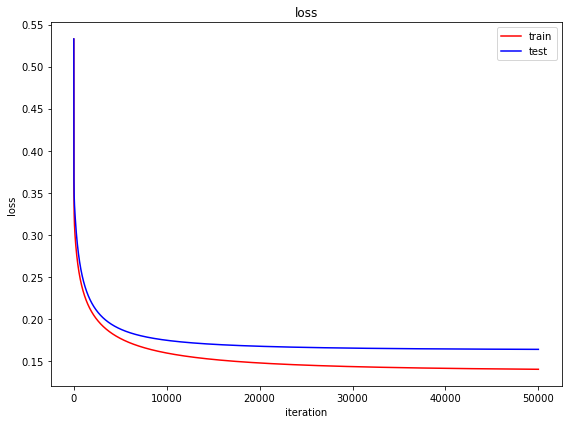

In [18]:
plot_loss_curve(loss1_iteration, loss2_iteration)

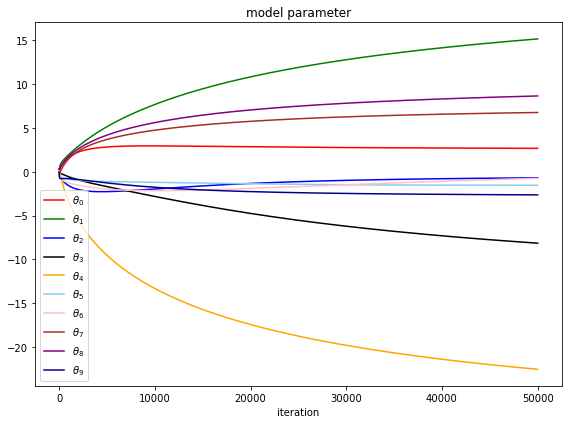

In [19]:
plot_model_parameter(theta_iteration)

In [20]:
def plot_classifier(data, theta):

    plt.figure(figsize=(8,8))
    
    num_data = data.shape[0]

    x = np.zeros(num_data)
    y = np.zeros(num_data)
    label   = np.zeros(num_data)
    
    for i in range(num_data):
        x[i]  = data[i,0]
        y[i]  = data[i,1]
        label[i]    = data[i,2]
    
    xx = []
    yy = []
    xxx = []
    yyy = []
    X = np.arange(x.min()-0.1, x.max()+0.1, 0.05)
    Y = np.arange(y.min()-0.1, y.max()+0.1, 0.05)
    gX, gY = np.meshgrid(X, Y)
    Z = regression_function(theta, feature_function(gX, gY))
    for i in range(0, num_data) :
        a = x[i]
        b = y[i]
        if label[i] == 0 :
            xx.append(a)
            yy.append(b)
        elif label[i] == 1 :
            xxx.append(a)
            yyy.append(b)
    plt.plot(xx, yy, 'o',color='blue', label='Class = 0', markersize = 3)
    plt.plot(xxx, yyy, 'o',color='red', label='Class = 1', markersize = 3)
    plt.contourf(gX, gY, Z, levels=100, cmap = 'bwr')
    plt.colorbar()
    plt.contour(gX,gY, Z, levels = [0], colors = 'black')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

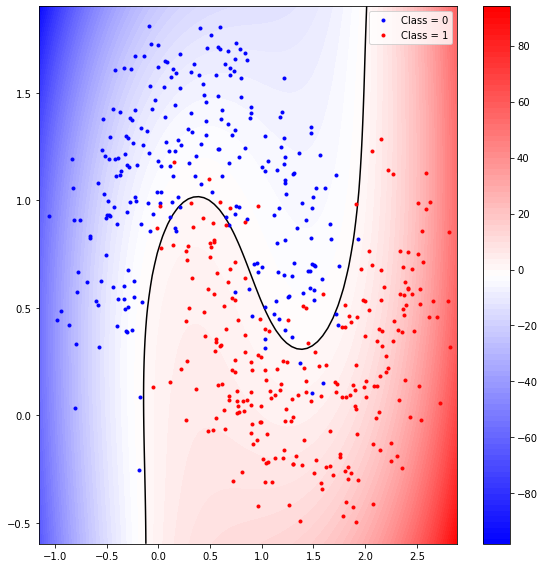

In [21]:
plot_classifier(data_train, theta_optimal)

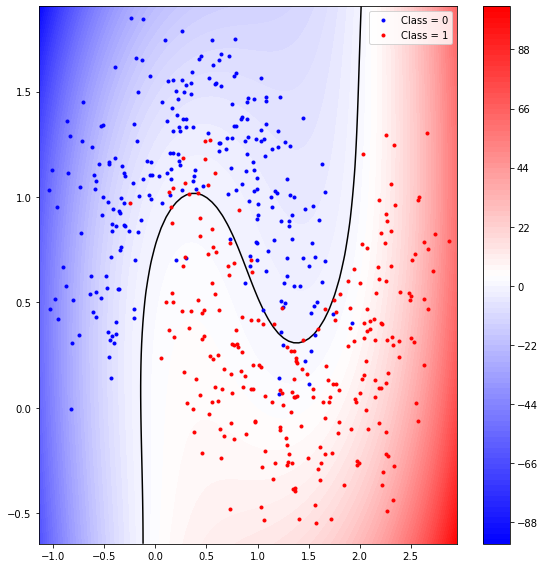

In [22]:
plot_classifier(data_test, theta_optimal)

***

# results

***

1. plot the input data (training on the left sub-figure and testing on the right sub-figure) in blue for class 0 and in red for class 1 from the file [assignment_10_data_train.csv] and [assignment_10_data_test.csv], respectively,

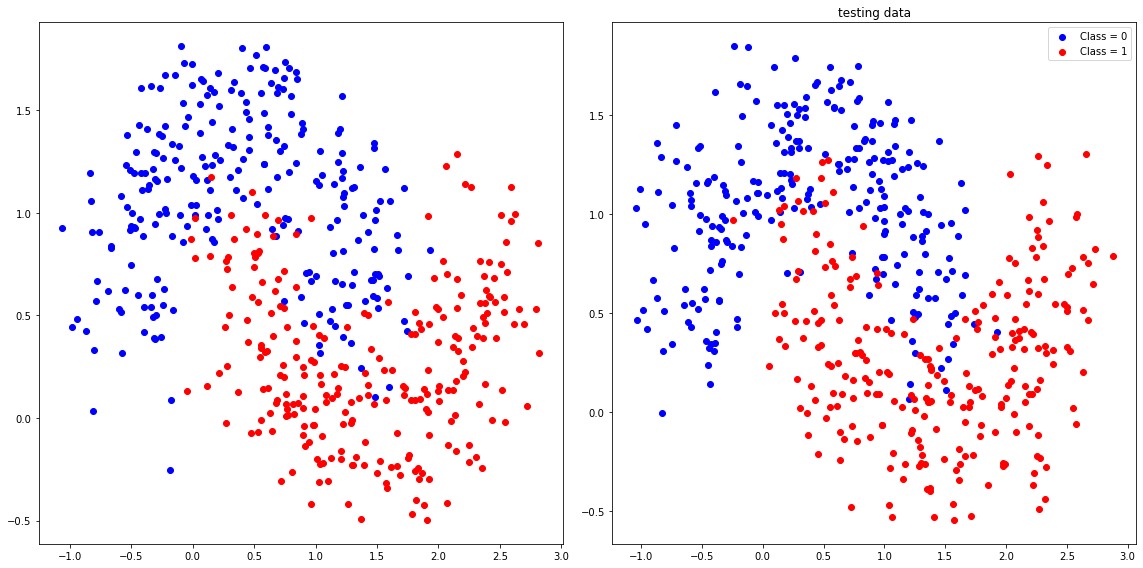

In [23]:
plot_data(data_train, data_test)

***

2. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors

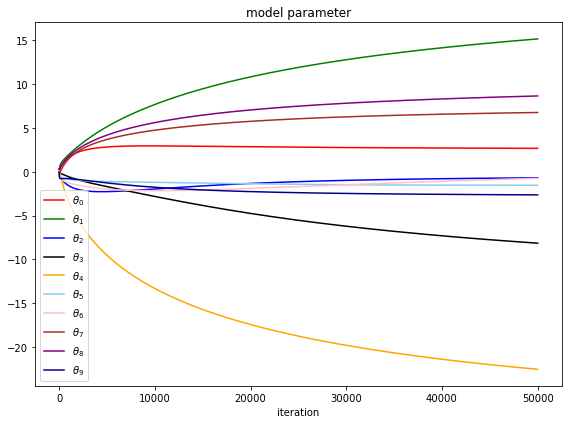

In [24]:
plot_model_parameter(theta_iteration)

***

3. plot the training loss in red curve and the testing loss in blue curve over the gradient descent iterations

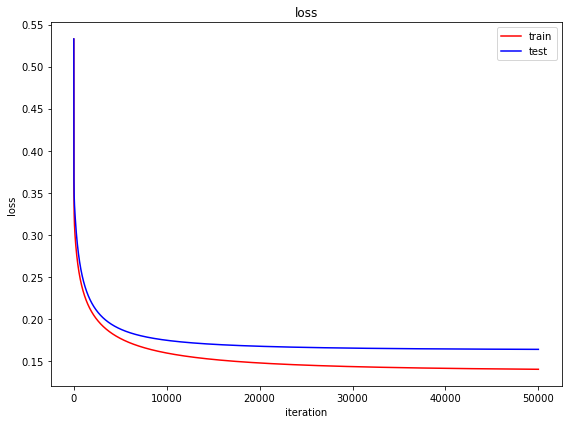

In [25]:
plot_loss_curve(loss1_iteration, loss2_iteration)

***

4. plot the training accuracy in red curve and the testing accuracy in blue curve over the gradient descent iterations

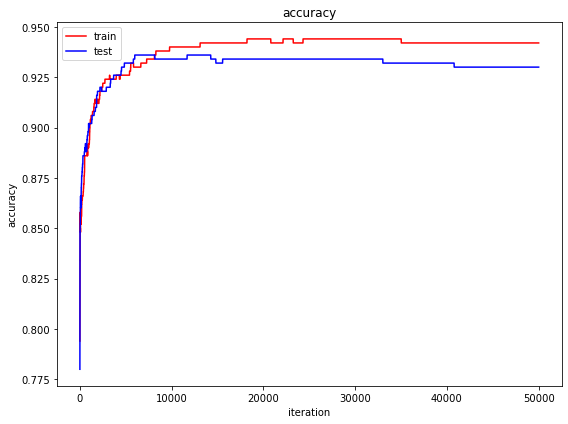

In [26]:
plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test)

***

5. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the training data

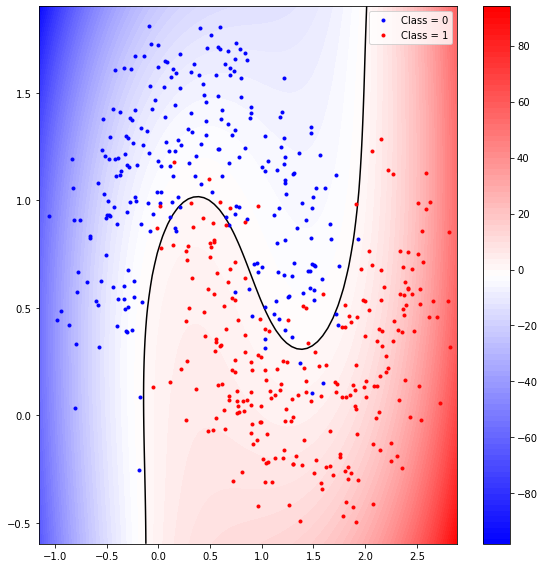

In [27]:
plot_classifier(data_train, theta_optimal)

***

6. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the testing data

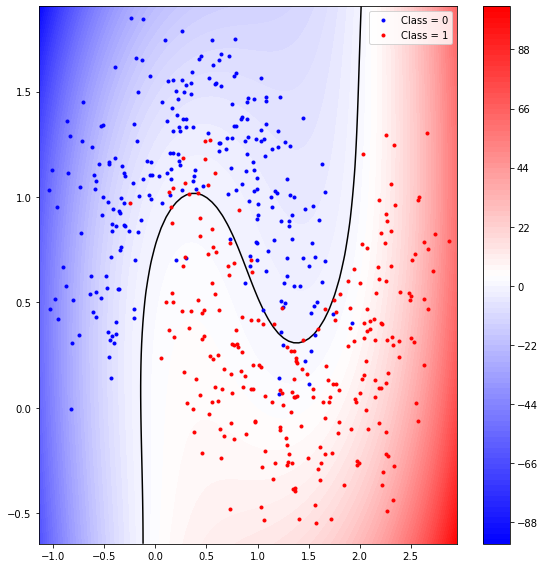

In [28]:
plot_classifier(data_test, theta_optimal)

***

7. print out the final training accuracy and the final testing accuracy in number with 5 decimal places (e.g. 0.98765)

In [29]:
print('accuract(train): %5.5f' % (accuracy_train))
print('accuracy(test) : %5.5f' % (accuracy_test))

accuract(train): 0.94200
accuracy(test) : 0.93000
